In [3]:
"""
R001_Fall_2023_AI_Reproducibility__
|
R001_Visualizations.ipynb
Created on Sun Nov 12 23:20:06 2023
@author: Rochana Obadage
"""

'\nR001_Fall_2023_AI_Reproducibility__\n|\nR001_Extract_Citing_Paper_Details_from_S2GA.ipynb\nCreated on Thu Sep 21 14:36:12 2023\n@author: Rochana Obadage\n'

In [1]:
# !pip list

!python --version

Python 3.9.13


# ``Creating related visualizations for R_001 - Drawing Graphs ...`` 

### `dependencies`
> <font face="consolas" color='#000080'><b>1. python:</b><br> 
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3.8.17&emsp;&emsp;|&emsp;&emsp;3.9.13<br><br>
<b>2. Jupyter Notebook:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;notebook server: 6.5.4<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Kernel Information: Python 3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]<br><br>
<b>3. conda installations:</b><br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;pandas==2.0.3<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Beatifulsoup4==4.11.1<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Selenium==4.11.2<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge selenium<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;webdriver-manager=4.0.0<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge webdriver-manager<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;bibtexparser-1.4.0<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge bibtexparser!<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;pdfminer.six-20221105<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;conda install -c conda-forge pdfminer.six<br>

</font>


In [3]:
from bs4 import BeautifulSoup, NavigableString, Tag

from selenium import webdriver 
from selenium.webdriver.common.by import By 
from selenium.webdriver.chrome.service import Service as ChromeService 
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.common.action_chains import ActionChains

import pandas as pd
import requests
import json
import urllib
import time
import string
import os
import shutil
import math
import json
import glob
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

import bibtexparser

from bibtexparser.bparser import BibTexParser
from bibtexparser.customization import convert_to_unicode

from pdfminer.high_level import extract_pages

## ``rs_score from parsed "results"``

In [94]:
#RS_SCORE distribution

df_excel = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
print(len(df_excel['rs_score']))

len(df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float))

# 


149


145

[0.43, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 0.6, 0.4, 1.0, 0.875, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.67, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.83, 1.0, 1.0, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.67, 0.75, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.59, 1.0, 1.0, 1.0, 1.0, 1.0, 0.85, 0.83, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.67, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]


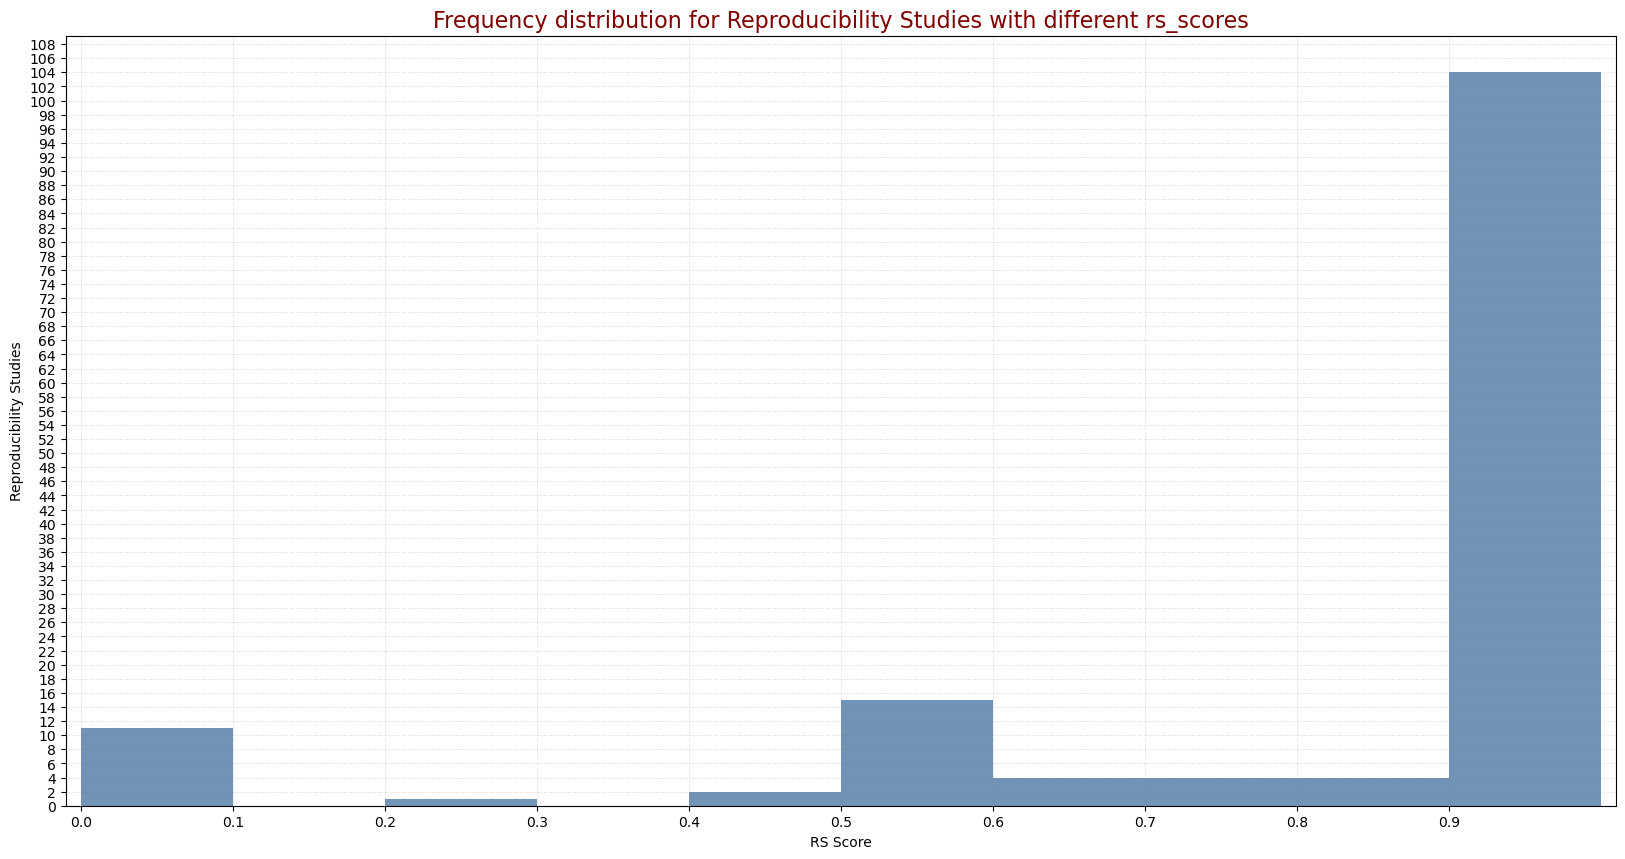

In [25]:
# keys_ = list(data.keys())
# counts = list(data.values())

# Figure 002 - Frequency distribution for number of countires with different survey counts
fig = plt.figure(figsize = (20, 10))
 
x = df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float)
print(list(x))
num_bins = 10

plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 120, step=2))

plt.xlabel("RS Score",fontsize=10)
plt.ylabel("Reproducibility Studies",fontsize=10)
plt.title("Frequency distribution for Reproducibility Studies with different rs_scores",fontsize=16, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

plt.hist(x, num_bins, density=False,color=(0.2, 0.4, 0.6, 0.7),width = 1/num_bins)
plt.savefig("plots/R_001_Figure_002_10_bins.png",pad_inches=1)
plt.show()

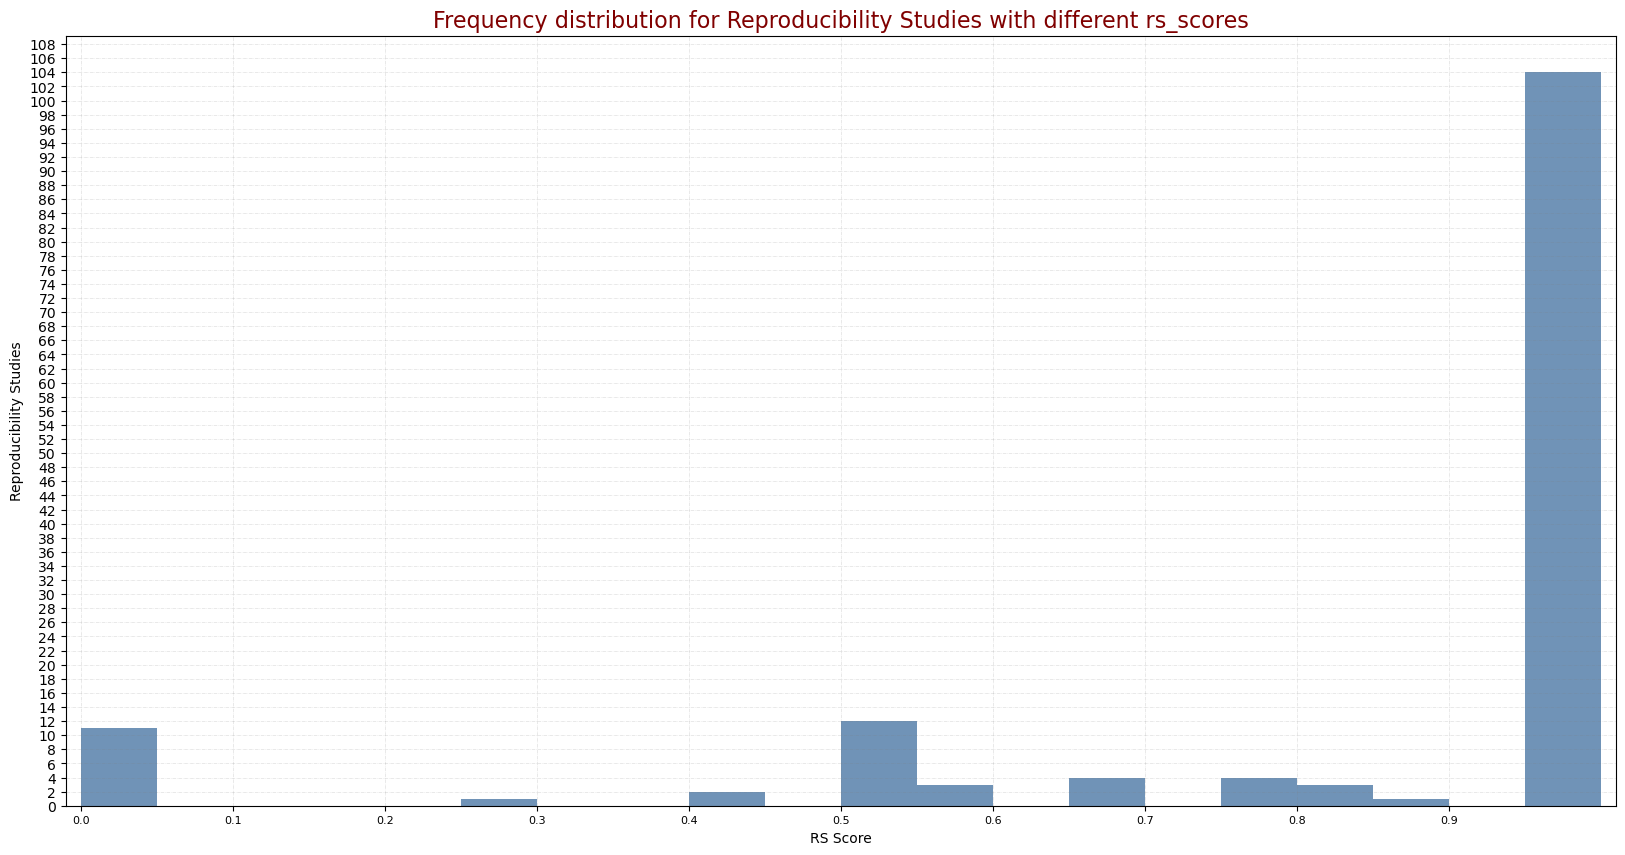

In [119]:
fig = plt.figure(figsize = (20, 10))
 
x = df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float)

num_bins = 20

plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 120, step=2))

plt.xlabel("RS Score",fontsize=10)
plt.ylabel("Reproducibility Studies",fontsize=10)
plt.title("Frequency distribution for Reproducibility Studies with different rs_scores",fontsize=16, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

plt.hist(x, num_bins, density=False,color=(0.2, 0.4, 0.6, 0.7),width = 1/num_bins)
plt.savefig("plots/R_001_Figure_002_20_bins.png",pad_inches=1)
plt.show()

## ``visualizations on citing paper counts obtained from S2GA``

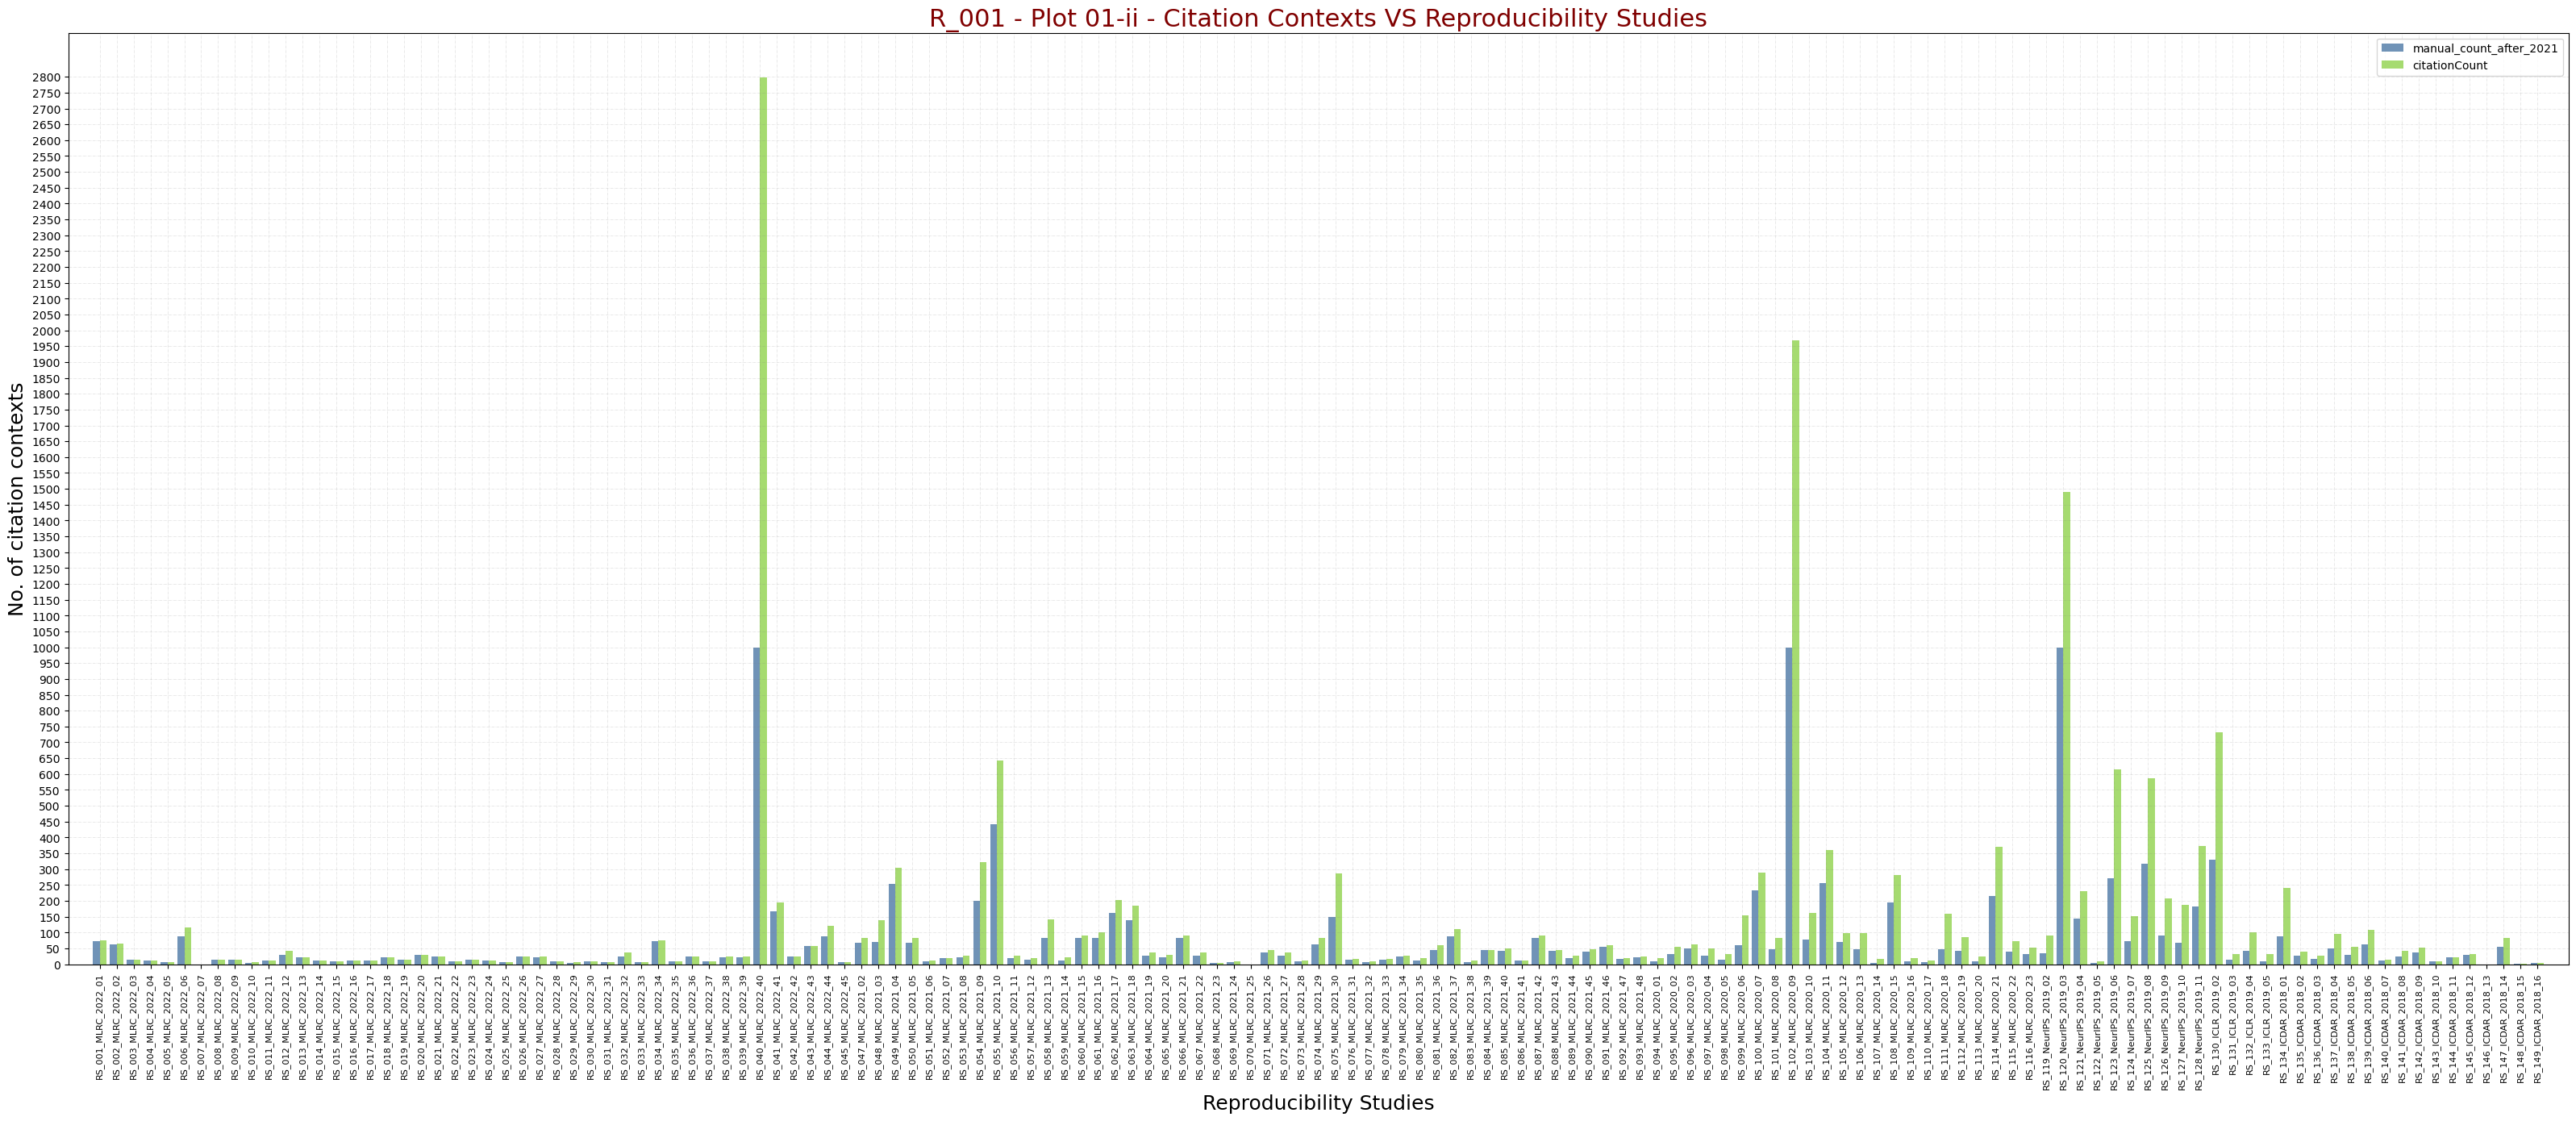

In [138]:
import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)

keys_ = list(data.keys())
values = list(data.values())

manual_count_after_2021 = list(map(lambda x: x['manual_count_after_2021'],data.values())) 
manual_count_all_retrieved = list(map(lambda x: x['manual_count_all_retrieved'],data.values())) 
citationCount = list(map(lambda x: x['citationCount'],data.values())) 

labels = ("manual_count_after_2021", "manual_count_all_retrieved", "citationCount")
counts = {
    'manual_count_after_2021': manual_count_after_2021,
    'manual_count_all_retrieved': manual_count_all_retrieved,
    'citationCount': citationCount,
}

X = keys_


fig = plt.figure(figsize = (40, 15))
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis - 0.2, manual_count_after_2021, color=(0.2, 0.4, 0.6, 0.7), label = 'manual_count_after_2021', width = 0.4) 
plt.bar(X_axis + 0.2, citationCount, label = 'citationCount', color=(0.5, 0.8, 0.2, 0.7), width = 0.4) 

 
# creating the bar plot
# plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# plt.rc('xtick', labelsize=8)

# plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 2850, step=50))

plt.xlabel("Reproducibility Studies",fontsize=18)
plt.ylabel("No. of citation contexts",fontsize=18)
plt.title("R_001 - Plot 01-ii - Citation Contexts VS Reproducibility Studies",fontsize=22,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

# plt.show()



  
plt.xticks(X_axis, X,rotation=90,fontsize=8) 
# plt.xlabel("Groups") 
# plt.ylabel("Number of Students") 
# plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 

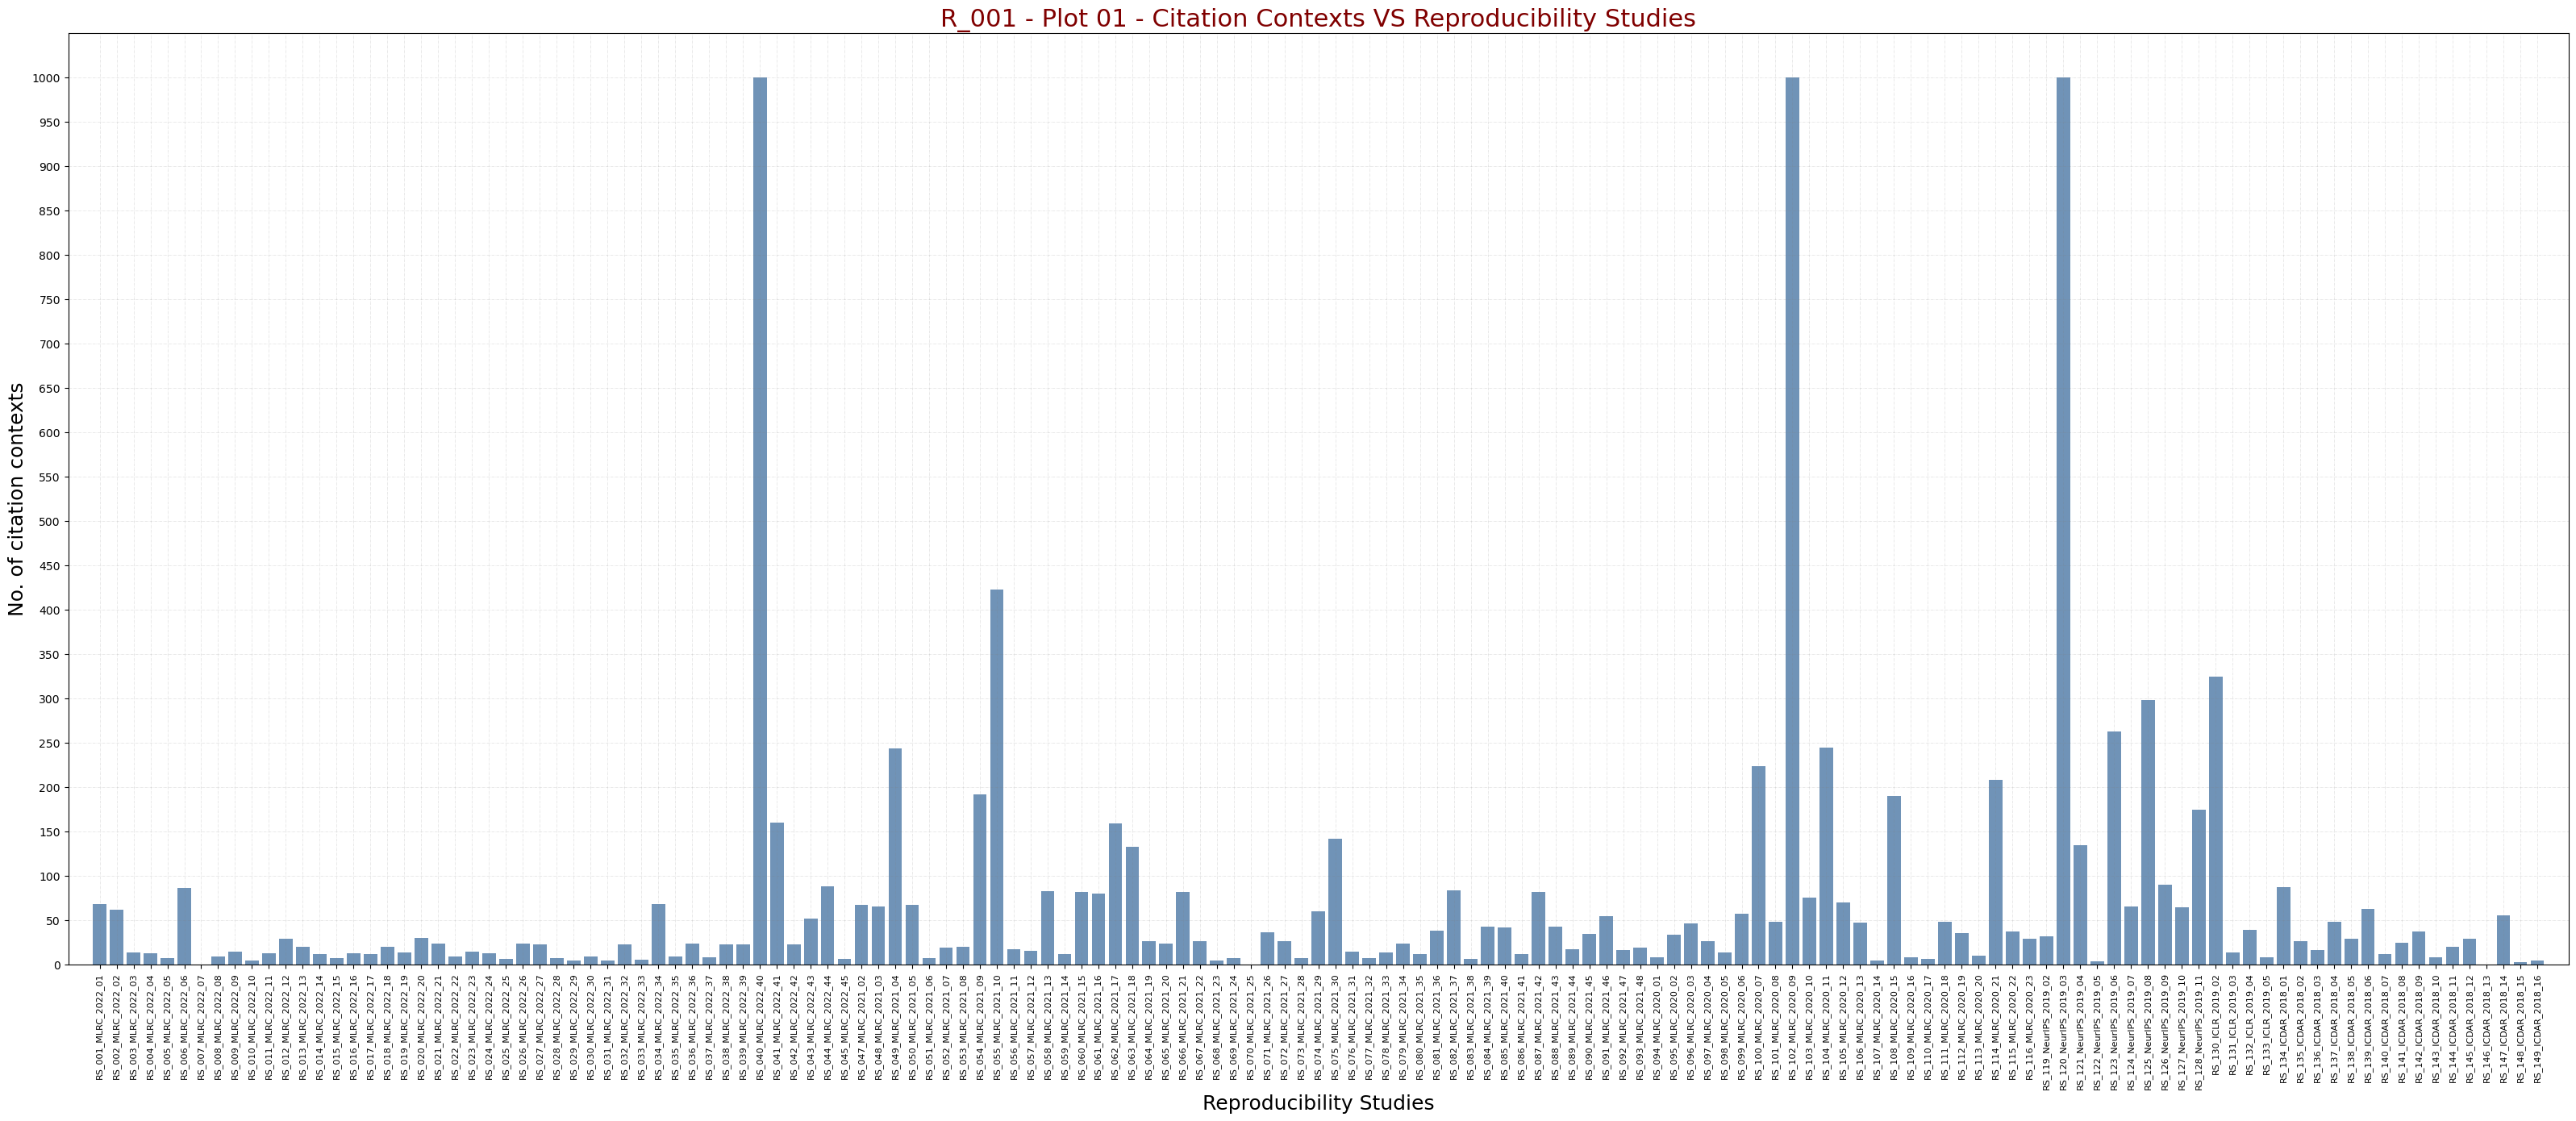

In [80]:
data = {}

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)

keys_ = list(data.keys())
counts = list(data.values())
  
fig = plt.figure(figsize = (40, 15))
 
# creating the bar plot
plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# plt.rc('xtick', labelsize=8)

plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 1001, step=50))

plt.xlabel("Reproducibility Studies",fontsize=18)
plt.ylabel("No. of citation contexts",fontsize=18)
plt.title("R_001 - Plot 01 - Citation Contexts VS Reproducibility Studies",fontsize=22,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

plt.show()

In [8]:
courses = list(data.keys())
values = list(data.values())


data_formatted = {'key': courses,
        'count': values} 


In [9]:
df__ = pd.DataFrame.from_dict(data_formatted)
df__

key  count
0     RS_001_MLRC_2022_01     68
1     RS_002_MLRC_2022_02     61
2     RS_003_MLRC_2022_03     13
3     RS_004_MLRC_2022_04     12
4     RS_005_MLRC_2022_05      7
..                    ...    ...
140  RS_145_ICDAR_2018_12     29
141  RS_146_ICDAR_2018_13      0
142  RS_147_ICDAR_2018_14     55
143  RS_148_ICDAR_2018_15      2
144  RS_149_ICDAR_2018_16      4

[145 rows x 2 columns]

<Axes: xlabel='key', ylabel='count'>

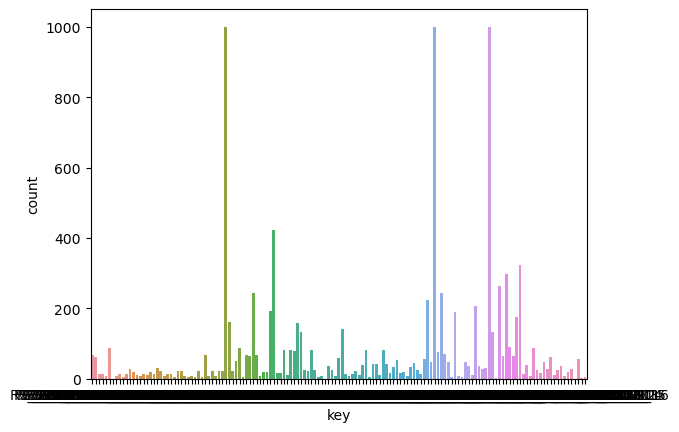

In [11]:
import seaborn as sns

sns.barplot(data=df__, x="key", y="count")

In [21]:


# data
pd.set_option('display.max_columns', None)

In [340]:
#Frequency distribution for citing papers

df_excel = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
print(len(df_excel['rs_score']))

len(df_excel[df_excel['rs_score']!='NOT_RELEVANT']['rs_score'].astype(float))

new_df = df_excel[df_excel['rs_score']!='NOT_RELEVANT']
new_df

149


key_for_all_RS                                           title_rs  \
0     RS_001_MLRC_2022_01  [Re] $\mathcal{G}$-Mixup: Graph Data Augmentat...   
1     RS_002_MLRC_2022_02  [Re] Exact Feature Distribution Matching for A...   
2     RS_003_MLRC_2022_03  [Re] End-to-end Algorithm Synthesis with Recur...   
3     RS_004_MLRC_2022_04  [Re] Label-Free Explainability for Unsupervise...   
4     RS_005_MLRC_2022_05  [Re] Exploring the Representation of Word Mean...   
..                    ...                                                ...   
144  RS_145_ICDAR_2018_12  LGPMA: Complicated Table Structure Recognition...   
145  RS_146_ICDAR_2018_13  Deep-learning and graph-based approach to tabl...   
146  RS_147_ICDAR_2018_14  Global Table Extractor (GTE): A Framework for ...   
147  RS_148_ICDAR_2018_15  TSR-DSAW: Table Structure Recognition via Deep...   
148  RS_149_ICDAR_2018_16  Rethinking Table Structure Recognition Using S...   

                                            authors_rs article_type  \
0                ['Ermin Omeragic', 'Vuk ÄuranoviÄ‡']  Replication   
1    ['Mert Erkol', 'Furkan KÄ±nlÄ±', 'BarÄ±ÅŸ Ã–zc...  Replication   
2          ['Sean Michael McLeish', 'Long Tran-Thanh']  Replication   
3    ['Eric Langezaal', 'Jesse Belleman', 'Joeri No...  Replication   
4                  ['Matteo Brivio', 'Cagri Coltekin']  Replication   
..                                                 ...          ...   
144  [Liang Qiao, Zaisheng Li, Zhanzhan Cheng, Peng...     original   
145              [Lee, E., Park, J., Koo, H.I. et al.]     original   
146  Zheng, Xinyi and Burdick, Douglas and Popa, Lu...     original   
147  [Arushi Jain and Shubham Paliwal and Monika Sh...     original   
148  [Yibo Li, Yilun Huang, Ziyi Zhu, Lemeng Pan, Y...     original   

                                              keywords  \
0    ['rescience c', 'machine learning', 'data augm...   
1    ['feature distribution matching', 'style trans...   
2    ['rescience c', 'Algorithmic Reasoning', 'Deep...   
3    ['Reproducibility', 'label-free', 'unsupervise...   
4    ['BERT', 'fastText', 'embeddings', 'language m...   
..                                                 ...   
144                                             [test]   
145                                             [test]   
146                                             [test]   
147                                             [test]   
148                                             [test]   

                                              abstract  \
0    Scope of Reproducibility\nThis paper presents ...   
1    Reproducibility Summary:\n\nIn this reproducib...   
2    Scope of Reproducibility:\nIn this report, we ...   
3    Scope of Reproducibility â€” This study is an ...   
4    This report summarizes our efforts to reproduc...   
..                                                 ...   
144                                                NaN   
145                                                NaN   
146                                                NaN   
147                                                NaN   
148                                                NaN   

                                            pdf_url_rs code_url_rs  \
0    /pdf/8c87cb1e84e1482826c40a3b0c43928eaef747f3.pdf         NaN   
1    /pdf/7bcb577c2a46db29c48234a5b72368053c7ebed3.pdf         NaN   
2    /pdf/07d5d68b5873d779bd1fd8c95b9767cb57fe0bc4.pdf         NaN   
3    /pdf/7fde4f12c675150699fc376cd097d5b9dad0b4d4.pdf         NaN   
4    /pdf/78430c5af33bc892d852b49a5a6e93abeb314c6f.pdf         NaN   
..                                                 ...         ...   
144                                                NaN         NaN   
145                                                NaN         NaN   
146                                                NaN         NaN   
147                                                NaN         NaN   
148                              

[141, 160, 34, 16, 10, 226, 0, 21, 11, 3, 16, 56, 37, 18, 13, 16, 8, 37, 19, 26, 55, 11, 21, 16, 5, 55, 50, 13, 3, 19, 24, 52, 9, 141, 14, 55, 13, 50, 50, 7748, 421, 63, 118, 319, 10, 177, 146, 505, 177, 13, 40, 51, 757, 1426, 68, 28, 328, 35, 113, 177, 269, 341, 73, 46, 113, 73, 2, 11, 0, 58, 73, 13, 140, 660, 26, 11, 44, 52, 21, 74, 270, 15, 255, 74, 46, 113, 61, 68, 131, 140, 63, 36, 58, 110, 95, 74, 59, 223, 962, 127, 5228, 350, 812, 151, 136, 34, 528, 58, 51, 302, 173, 49, 1134, 91, 51, 154, 4720, 510, 38, 1069, 341, 1712, 428, 322, 614, 1837, 110, 112, 43, 482, 55, 44, 137, 124, 222, 22, 68, 129, 16, 39, 90, 0, 173, 4, 4]


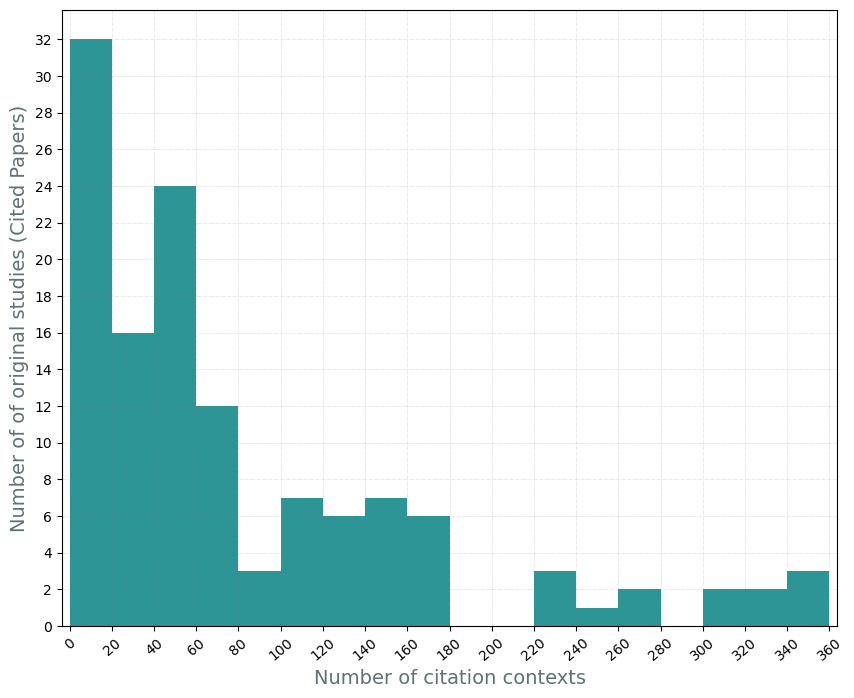

In [367]:
# Figure 002 - Frequency distribution for number of countires with different survey counts
fig = plt.figure(figsize = (10, 8))
 
x = list(new_df['total_context_count_for_labelling']) #.astype(int)
# x = list(new_df['citation_count_org']) #.astype(int)

print(x)

x = [i for i in x if i<400]

num_bins = 20

plt.xticks(np.arange(0, 400, step=20)) #60
plt.yticks(np.arange(0, 100, step=2))

plt.xticks(rotation=40)

plt.xlabel("Number of citation contexts",fontsize=14,color='#607274')
plt.ylabel("Number of of original studies (Cited Papers)",fontsize=14,color='#607274')


# plt.title("Citation Frequency distribution for cited papers",fontsize=16, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)



# plt.hist(x, num_bins, density=False,color=(0.2, 0.4, 0.6, 0.7),width = 1/num_bins)
plt.hist(x, bins=np.arange(min(x), max(x) + binwidth_2, binwidth_2),color='#2D9596',density=False)
plt.savefig("plots/R_001_Figure_003_Citation_Frequency_distribution_for_cited_papers.png",pad_inches=1)
plt.show()

Axes(0.36,0.4;0.45x0.4)
[141, 160, 34, 16, 10, 226, 0, 21, 11, 3, 16, 56, 37, 18, 13, 16, 8, 37, 19, 26, 55, 11, 21, 16, 5, 55, 50, 13, 3, 19, 24, 52, 9, 141, 14, 55, 13, 50, 50, 7748, 421, 63, 118, 319, 10, 177, 146, 505, 177, 13, 40, 51, 757, 1426, 68, 28, 328, 35, 113, 177, 269, 341, 73, 46, 113, 73, 2, 11, 0, 58, 73, 13, 140, 660, 26, 11, 44, 52, 21, 74, 270, 15, 255, 74, 46, 113, 61, 68, 131, 140, 63, 36, 58, 110, 95, 74, 59, 223, 962, 127, 5228, 350, 812, 151, 136, 34, 528, 58, 51, 302, 173, 49, 1134, 91, 51, 154, 4720, 510, 38, 1069, 341, 1712, 428, 322, 614, 1837, 110, 112, 43, 482, 55, 44, 137, 124, 222, 22, 68, 129, 16, 39, 90, 0, 173, 4, 4]


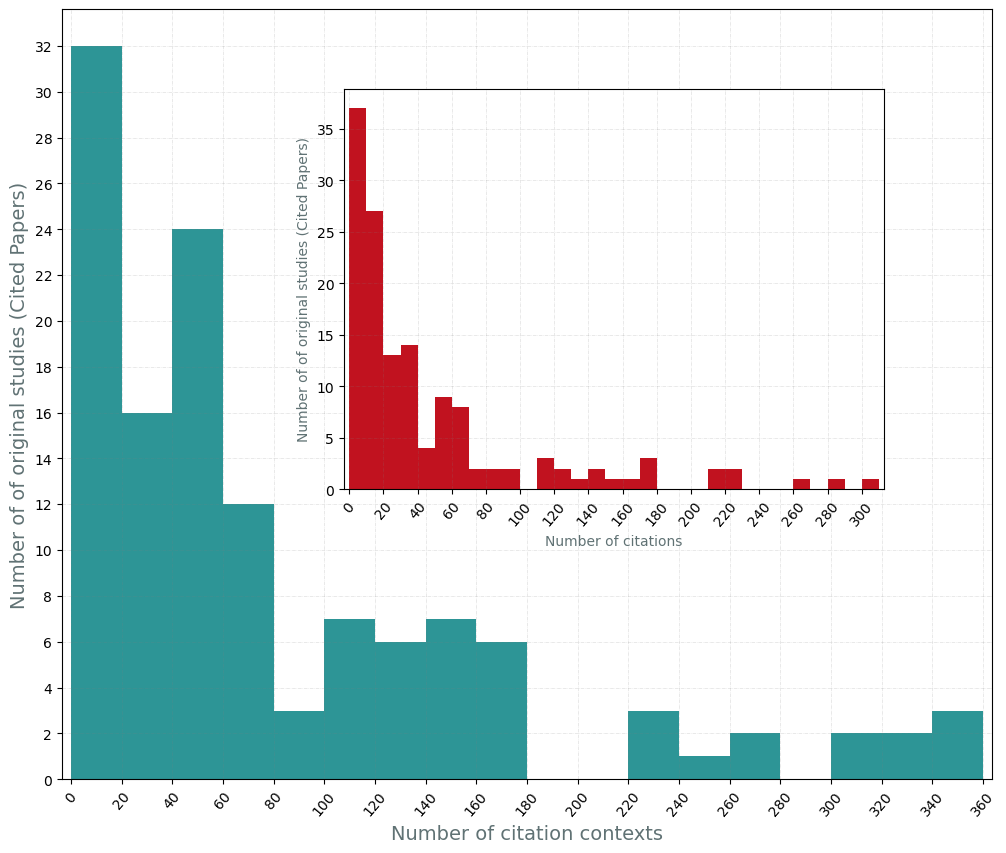

In [398]:
# Adding the inset

import matplotlib.pyplot as plt

fig, ax2 = plt.subplots(figsize = (12, 10))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.36, 0.4, 0.45, 0.4]
ax1 = fig.add_axes([left, bottom, width, height])

print(ax1)
 
# x = list(new_df['citation_count_org']) #.astype(int)
x = list(new_df['total_context_count_for_labelling']) #.astype(int)
x1 = list(new_df['citing_paper_count']) #.astype(int)
x1 = [i for i in x1 if i<400]
print(x)


# binwidth = 60
# ax1.set(xticks=np.arange(0, 400, step=binwidth)) #, xticklabels=labels)
# ax1.set(yticks=np.arange(0, 100, step=4))

# ax1.hist(x1, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)




binwidth = 10
ax1.set(xticks=np.arange(0, 400, step=binwidth*2)) #, xticklabels=labels)
ax1.set(yticks=np.arange(0, 95, step=5))
ax1.tick_params(axis='x', labelrotation=50)

ax1.set_xlabel("Number of citations",fontsize=10,color='#607274')
ax1.set_ylabel("Number of of original studies (Cited Papers)",fontsize=10,color='#607274')
# ax1.set_title("R_001_Figure_003 - Citation Frequency distribution for cited papers",fontsize=16, color='maroon')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)

# ax1.hist(x, num_bins_1,color=(0.2, 0.4, 0.6, 0.7),density=False)
# c1121f
ax1.hist(x1, bins=np.arange(min(x1), max(x1) + binwidth, binwidth),color='#c1121f',density=False)
# ax1.hist(x1, bins=np.arange(min(x1), max(x1) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)
# ax1.figure.savefig("plots/R_001_Figure_003_Citation_Frequency_distribution_for_cited_papers.png",pad_inches=1)



binwidth_2 = 20
x2 = [i for i in x if i<400]
ax2.set(xticks=np.arange(0, 400, step=binwidth_2)) #, xticklabels=labels)
ax2.set(yticks=np.arange(0, 100, step=2))

ax2.tick_params(axis='x', labelrotation=50)
ax2.set_xlabel("Number of citation contexts",fontsize=14,color='#607274')
ax2.set_ylabel("Number of of original studies (Cited Papers)",fontsize=14,color='#607274')
# ax2.set_title("Citation Frequency distribution for cited papers truncated x[:400]",fontsize=12, color='maroon')

ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

# ax2.hist(x2, num_bins_2,color=(0.2, 0.6, 0.6, 0.7),density=False)
ax2.hist(x2, bins=np.arange(min(x2), max(x2) + binwidth_2, binwidth_2),color='#2D9596',density=False)
# ax1.figure.savefig("plots/R_001_Figure_003_Citation_Frequency_distribution_for_cited_papers.png",pad_inches=1)
# ax2.plot(range(6)[::-1], color='green')

# plt.savefig("plots/R_001_Figure_003_Citation_Frequency_distribution_for_cited_papers.png",pad_inches=1)


plt.show()

In [49]:
df_excel_ = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_excel_

x = df_excel_["valid_citation_context_count"]
x

0      57
1      38
2      15
3       6
4       6
       ..
144    28
145     0
146    59
147     2
148     2
Name: valid_citation_context_count, Length: 149, dtype: int64

0      57
1      38
2      15
3       6
4       6
       ..
144    28
145     0
146    59
147     2
148     2
Name: valid_citation_context_count, Length: 149, dtype: int64


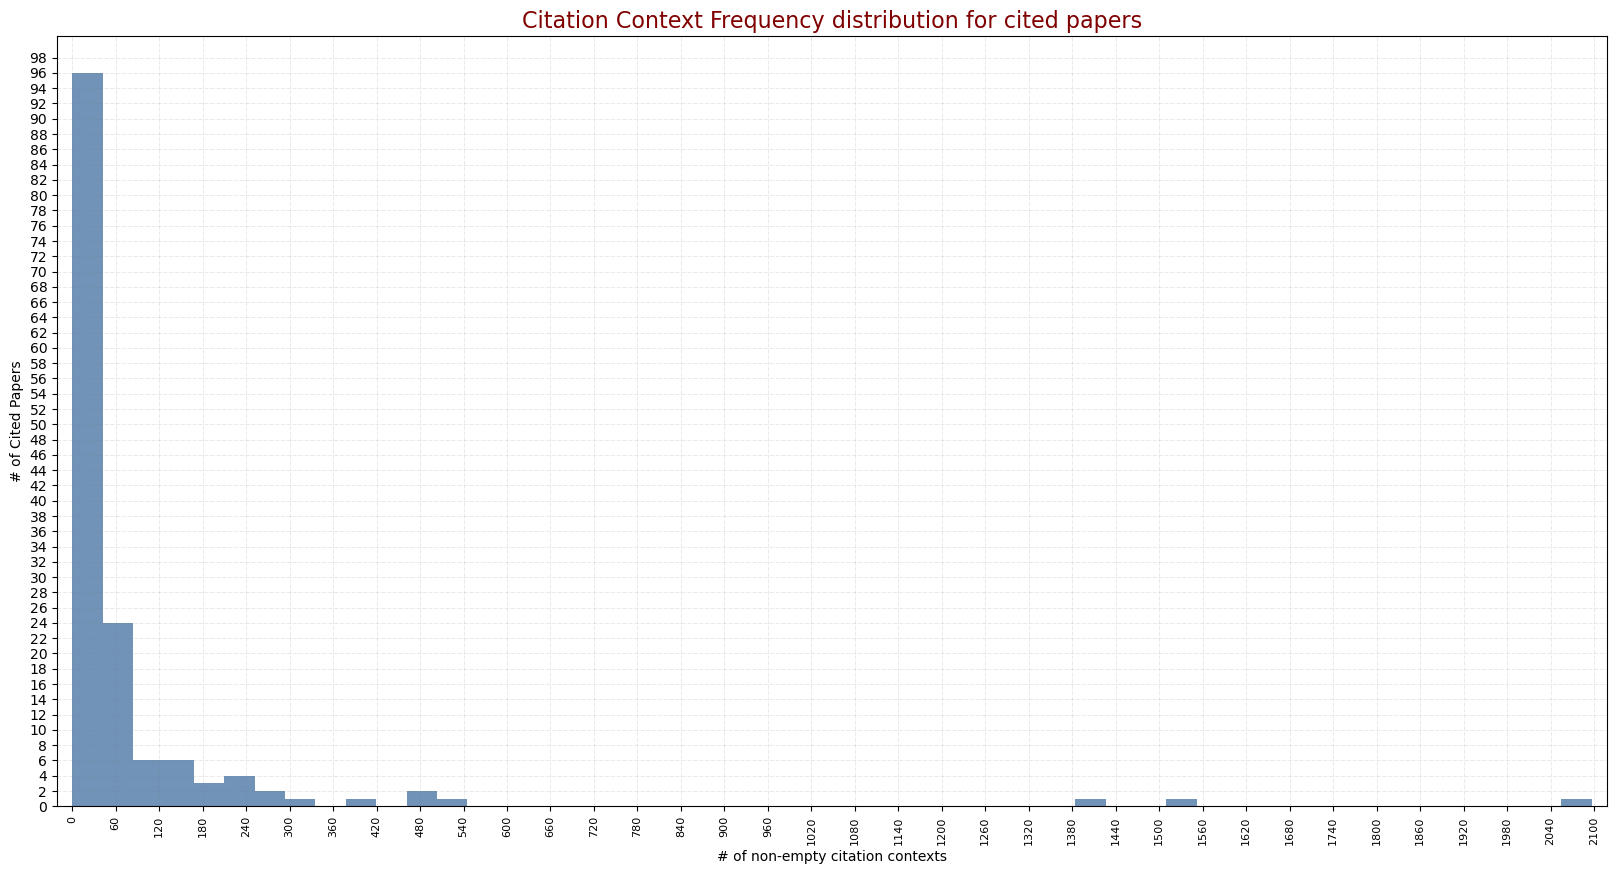

In [196]:
# Figure 002 - Frequency distribution for number of countires with different survey counts
fig = plt.figure(figsize = (20, 10))
 
x = df_excel_["valid_citation_context_count"]


print(x)

num_bins = 50

plt.xticks(np.arange(0, 3000, step=60))
plt.yticks(np.arange(0, 100, step=2))

plt.xticks(rotation=90)

plt.xlabel("# of non-empty citation contexts",fontsize=10)
plt.ylabel("# of Cited Papers",fontsize=10)
plt.title("Citation Context Frequency distribution for cited papers",fontsize=16, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

# plt.hist(x, num_bins, density=False,color=(0.2, 0.4, 0.6, 0.7),width = 1/num_bins)
plt.hist(x, num_bins,color=(0.2, 0.4, 0.6, 0.7),density=False)
plt.savefig("plots/R_001_Figure_004_Citation_Context_Frequency_distribution_for_cited_papers.png",pad_inches=1)
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)
0      57
1      38
2      15
3       6
4       6
       ..
144    28
145     0
146    59
147     2
148     2
Name: valid_citation_context_count, Length: 149, dtype: int64


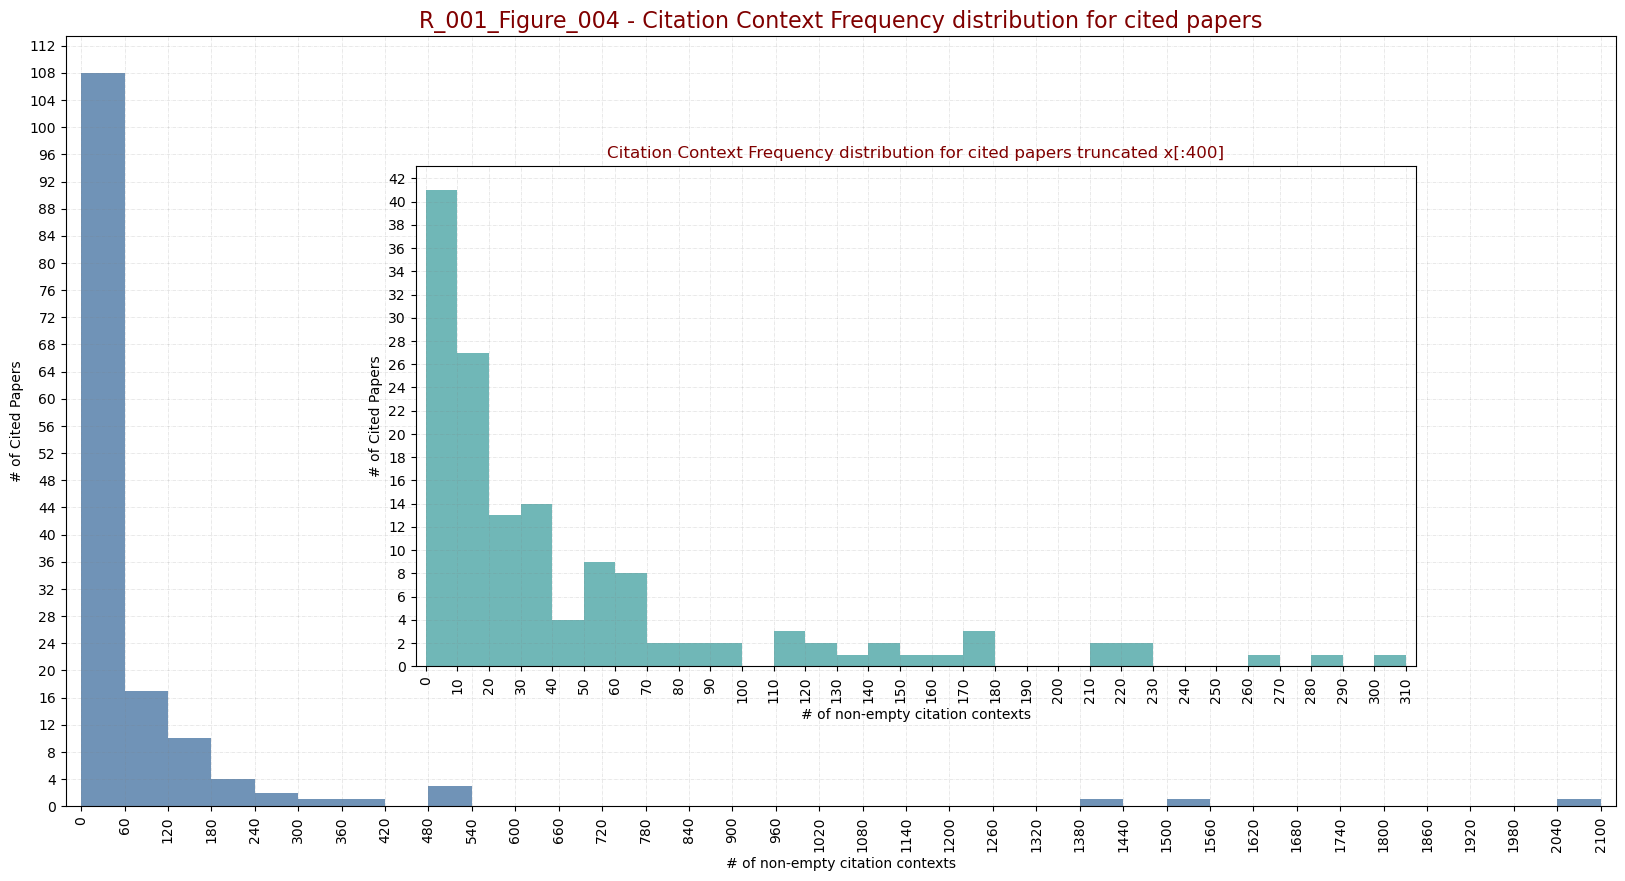

In [50]:
# Adding the inset -- Citation Context Frequency distribution for cited papers

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize = (20, 10))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.25, 0.5, 0.5]
ax2 = fig.add_axes([left, bottom, width, height])

print(ax1)
 
# x =  list(new_df['citation_count_org']) #.astype(int)

x = df_excel_["valid_citation_context_count"]

print(x)

# num_bins_1 = 49
binwidth = 60
ax1.set(xticks=np.arange(0, 3000, step=binwidth)) #, xticklabels=labels)
ax1.set(yticks=np.arange(0, 120, step=4))
ax1.tick_params(axis='x', labelrotation=90)

ax1.set_xlabel("# of non-empty citation contexts",fontsize=10)
ax1.set_ylabel("# of Cited Papers",fontsize=10)
ax1.set_title("R_001_Figure_004 - Citation Context Frequency distribution for cited papers",fontsize=16, color='maroon')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)

ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)



# num_bins_2 = 30
binwidth_2 = 10
x2 = [i for i in x if i<311]
ax2.set(xticks=np.arange(0, 311, step=binwidth_2)) #, xticklabels=labels)
ax2.set(yticks=np.arange(0, 100, step=2))

ax2.tick_params(axis='x', labelrotation=90)
ax2.set_xlabel("# of non-empty citation contexts",fontsize=10)
ax2.set_ylabel("# of Cited Papers",fontsize=10)
ax2.set_title("Citation Context Frequency distribution for cited papers truncated x[:400]",fontsize=12, color='maroon')

ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

# ax2.hist(x2, num_bins_2,color=(0.2, 0.6, 0.6, 0.7),density=False)
ax2.hist(x2, bins=np.arange(min(x2), max(x2) + binwidth_2, binwidth_2),color=(0.2, 0.6, 0.6, 0.7),density=False)

# ax1.figure.savefig("plots/R_001_Figure_003_Citation_Frequency_distribution_for_cited_papers.png",pad_inches=1)
# ax2.plot(range(6)[::-1], color='green')

plt.savefig("plots/R_001_Figure_004_Citation_Context_Frequency_distribution_for_cited_papers.png",pad_inches=1)


plt.show()

## ``visualizations on context labelling``

In [29]:
# already_labelled_list = [i.replace("Citing_Paper_contexts_lables\\","") for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_list

['Citing_Paper_contexts_lables\\RS_008_MLRC_2022_08.json',
 'Citing_Paper_contexts_lables\\RS_011_MLRC_2022_11.json',
 'Citing_Paper_contexts_lables\\RS_014_MLRC_2022_14.json',
 'Citing_Paper_contexts_lables\\RS_020_MLRC_2022_20.json',
 'Citing_Paper_contexts_lables\\RS_039_MLRC_2022_39.json',
 'Citing_Paper_contexts_lables\\RS_045_MLRC_2022_45.json',
 'Citing_Paper_contexts_lables\\RS_052_MLRC_2021_07.json',
 'Citing_Paper_contexts_lables\\RS_062_MLRC_2021_17.json',
 'Citing_Paper_contexts_lables\\RS_073_MLRC_2021_28.json',
 'Citing_Paper_contexts_lables\\RS_085_MLRC_2021_40.json',
 'Citing_Paper_contexts_lables\\RS_132_ICLR_2019_04.json',
 'Citing_Paper_contexts_lables\\RS_134_ICDAR_2018_01.json',
 'Citing_Paper_contexts_lables\\RS_135_ICDAR_2018_02.json',
 'Citing_Paper_contexts_lables\\RS_137_ICDAR_2018_04.json',
 'Citing_Paper_contexts_lables\\RS_138_ICDAR_2018_05.json',
 'Citing_Paper_contexts_lables\\RS_140_ICDAR_2018_07.json',
 'Citing_Paper_contexts_lables\\RS_141_ICDAR_2018_0

In [53]:

    

all_files = {} # filename:item, filename:item 

for file in already_labelled_list:
    file_key = file.replace("Citing_Paper_contexts_lables\\","").replace(".json","")
    with open(file,'r') as f1:
        data = json.load(f1)

        label_scores = {'-2':0,'-1':0,'0':0,'0.5':0,'1':0}

    #     print("paper title: \n",data['data'])

        for data_item in data['data']:
    #         print(data_item['context_scores'])

            for i in data_item['context_scores']:
                score = i.get("label_score")
    #             print(score)

                if score == 1:
                    label_scores['1'] += 1
    #                 label = "Strong"
                elif score == 0.5:
                    label_scores['0.5'] += 1
    #                 label = "Weak"
                elif score == 0:
                    label_scores['0'] += 1
    #                 label = "Neutral"
                elif score == -1:
                    label_scores['-1'] += 1
    #                 label = "P-NR"
                elif score == -2:
                    label_scores['-2'] += 1
    #                 label = "O-NR"   
    
        all_files.update({file_key:label_scores})

with open("citation_context_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files



{'RS_008_MLRC_2022_08': {'-2': 0, '-1': 0, '0': 17, '0.5': 4, '1': 0},
 'RS_011_MLRC_2022_11': {'-2': 0, '-1': 0, '0': 13, '0.5': 3, '1': 0},
 'RS_014_MLRC_2022_14': {'-2': 0, '-1': 0, '0': 12, '0.5': 6, '1': 0},
 'RS_020_MLRC_2022_20': {'-2': 0, '-1': 0, '0': 26, '0.5': 0, '1': 0},
 'RS_039_MLRC_2022_39': {'-2': 0, '-1': 0, '0': 48, '0.5': 2, '1': 0},
 'RS_045_MLRC_2022_45': {'-2': 0, '-1': 0, '0': 10, '0.5': 0, '1': 0},
 'RS_052_MLRC_2021_07': {'-2': 0, '-1': 0, '0': 36, '0.5': 4, '1': 0},
 'RS_062_MLRC_2021_17': {'-2': 0, '-1': 0, '0': 248, '0.5': 17, '1': 4},
 'RS_073_MLRC_2021_28': {'-2': 0, '-1': 0, '0': 11, '0.5': 2, '1': 0},
 'RS_085_MLRC_2021_40': {'-2': 0, '-1': 0, '0': 60, '0.5': 7, '1': 7},
 'RS_132_ICLR_2019_04': {'-2': 0, '-1': 1, '0': 105, '0.5': 4, '1': 2},
 'RS_134_ICDAR_2018_01': {'-2': 1, '-1': 4, '0': 447, '0.5': 25, '1': 5},
 'RS_135_ICDAR_2018_02': {'-2': 0, '-1': 0, '0': 54, '0.5': 1, '1': 0},
 'RS_137_ICDAR_2018_04': {'-2': 1, '-1': 1, '0': 126, '0.5': 9, '1': 0

In [54]:
# from collections import OrderedDict
from operator import getitem
# from pprint import pprint

# sorted_all_files = dict(sorted(all_files.items(), key=lambda x:x[1][0][1]))


# using OrderedDict() + sorted()
# Sort nested dictionary by key
# sorted_all_files = OrderedDict(sorted(all_files.items(), key = lambda x: getitem(x[1], '0')))
sorted_all_files = dict(sorted(all_files.items(), key = lambda x: getitem(x[1], '0')))

# converted_dict = dict(sorted_footballers_by_goals)
print(sorted_all_files)

{'RS_148_ICDAR_2018_15': {'-2': 1, '-1': 0, '0': 3, '0.5': 0, '1': 0}, 'RS_149_ICDAR_2018_16': {'-2': 1, '-1': 0, '0': 3, '0.5': 0, '1': 0}, 'RS_045_MLRC_2022_45': {'-2': 0, '-1': 0, '0': 10, '0.5': 0, '1': 0}, 'RS_073_MLRC_2021_28': {'-2': 0, '-1': 0, '0': 11, '0.5': 2, '1': 0}, 'RS_014_MLRC_2022_14': {'-2': 0, '-1': 0, '0': 12, '0.5': 6, '1': 0}, 'RS_011_MLRC_2022_11': {'-2': 0, '-1': 0, '0': 13, '0.5': 3, '1': 0}, 'RS_008_MLRC_2022_08': {'-2': 0, '-1': 0, '0': 17, '0.5': 4, '1': 0}, 'RS_140_ICDAR_2018_07': {'-2': 1, '-1': 0, '0': 20, '0.5': 1, '1': 0}, 'RS_020_MLRC_2022_20': {'-2': 0, '-1': 0, '0': 26, '0.5': 0, '1': 0}, 'RS_052_MLRC_2021_07': {'-2': 0, '-1': 0, '0': 36, '0.5': 4, '1': 0}, 'RS_039_MLRC_2022_39': {'-2': 0, '-1': 0, '0': 48, '0.5': 2, '1': 0}, 'RS_135_ICDAR_2018_02': {'-2': 0, '-1': 0, '0': 54, '0.5': 1, '1': 0}, 'RS_141_ICDAR_2018_08': {'-2': 1, '-1': 1, '0': 59, '0.5': 7, '1': 0}, 'RS_085_MLRC_2021_40': {'-2': 0, '-1': 0, '0': 60, '0.5': 7, '1': 7}, 'RS_145_ICDAR_20

In [5]:
# count for each category
sum(map(lambda x: x['0'],all_files.values()))


1756

In [14]:
# # a = 1 if b else 0
# Y_MAX = 80

# print(list(map(lambda x: x['0'],all_files.values())))
# list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, all_files.values())) 

[17, 13, 12, 26, 48, 10, 36, 11, 60, 105, 447, 54, 126, 110, 20, 59, 118, 75, 155, 3, 3]


[17,
 13,
 12,
 26,
 48,
 10,
 36,
 11,
 60,
 80,
 80,
 54,
 80,
 80,
 20,
 59,
 80,
 75,
 80,
 3,
 3]

In [15]:
# df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")

# pd.set_option('display.max_columns', None)
# df_rs_score.head()

# df_rs_score.loc[:,['key_for_all_RS','rs_score']]

# df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(list(all_files.keys()))].loc[:,['key_for_all_RS','rs_score']]

# # df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

# rs_score_dict = df_filtered.to_dict('records')
# rs_score_dict

[{'key_for_all_RS': 'RS_008_MLRC_2022_08', 'rs_score': 0.6},
 {'key_for_all_RS': 'RS_011_MLRC_2022_11', 'rs_score': 0.875},
 {'key_for_all_RS': 'RS_014_MLRC_2022_14', 'rs_score': 1},
 {'key_for_all_RS': 'RS_020_MLRC_2022_20', 'rs_score': 0.67},
 {'key_for_all_RS': 'RS_039_MLRC_2022_39', 'rs_score': 0.75},
 {'key_for_all_RS': 'RS_045_MLRC_2022_45', 'rs_score': 1},
 {'key_for_all_RS': 'RS_052_MLRC_2021_07', 'rs_score': 1},
 {'key_for_all_RS': 'RS_073_MLRC_2021_28', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_085_MLRC_2021_40', 'rs_score': 1},
 {'key_for_all_RS': 'RS_132_ICLR_2019_04', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_134_ICDAR_2018_01', 'rs_score': 0},
 {'key_for_all_RS': 'RS_135_ICDAR_2018_02', 'rs_score': 0},
 {'key_for_all_RS': 'RS_137_ICDAR_2018_04', 'rs_score': 0},
 {'key_for_all_RS': 'RS_138_ICDAR_2018_05', 'rs_score': 0},
 {'key_for_all_RS': 'RS_140_ICDAR_2018_07', 'rs_score': 0},
 {'key_for_all_RS': 'RS_141_ICDAR_2018_08', 'rs_score': 0},
 {'key_for_all_RS': 'RS_142_ICDAR_

In [57]:
# sorted_all_files
from pprint import pprint

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")

pd.set_option('display.max_columns', None)
df_rs_score.head()

df_rs_score.loc[:,['key_for_all_RS','rs_score']]

df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(list(sorted_all_files.keys()))].loc[:,['key_for_all_RS','rs_score']]

# df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

rs_score_dicts_list = df_filtered.to_dict('records')

# pprint(sorted(rs_score_dicts_list, key=lambda x:list(sorted_all_files.keys()).index(x['key_for_all_RS'])))

sorted_rs_score_dicts_list = sorted(rs_score_dicts_list, key=lambda x:list(sorted_all_files.keys()).index(x['key_for_all_RS']))
pprint(sorted_rs_score_dicts_list)


[{'key_for_all_RS': 'RS_148_ICDAR_2018_15', 'rs_score': 0},
 {'key_for_all_RS': 'RS_149_ICDAR_2018_16', 'rs_score': 0},
 {'key_for_all_RS': 'RS_045_MLRC_2022_45', 'rs_score': 1},
 {'key_for_all_RS': 'RS_073_MLRC_2021_28', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_014_MLRC_2022_14', 'rs_score': 1},
 {'key_for_all_RS': 'RS_011_MLRC_2022_11', 'rs_score': 0.875},
 {'key_for_all_RS': 'RS_008_MLRC_2022_08', 'rs_score': 0.6},
 {'key_for_all_RS': 'RS_140_ICDAR_2018_07', 'rs_score': 0},
 {'key_for_all_RS': 'RS_020_MLRC_2022_20', 'rs_score': 0.67},
 {'key_for_all_RS': 'RS_052_MLRC_2021_07', 'rs_score': 1},
 {'key_for_all_RS': 'RS_039_MLRC_2022_39', 'rs_score': 0.75},
 {'key_for_all_RS': 'RS_135_ICDAR_2018_02', 'rs_score': 0},
 {'key_for_all_RS': 'RS_141_ICDAR_2018_08', 'rs_score': 0},
 {'key_for_all_RS': 'RS_085_MLRC_2021_40', 'rs_score': 1},
 {'key_for_all_RS': 'RS_145_ICDAR_2018_12', 'rs_score': 0},
 {'key_for_all_RS': 'RS_132_ICLR_2019_04', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_138_ICDAR_

In [38]:
keys_new = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nrs_score: {x['rs_score']}",sorted_rs_score_dicts_list))

keys_new

['RS_148\nrs_score: 0',
 'RS_149\nrs_score: 0',
 'RS_045\nrs_score: 1',
 'RS_073\nrs_score: 0.5',
 'RS_014\nrs_score: 1',
 'RS_011\nrs_score: 0.875',
 'RS_008\nrs_score: 0.6',
 'RS_140\nrs_score: 0',
 'RS_020\nrs_score: 0.67',
 'RS_052\nrs_score: 1',
 'RS_039\nrs_score: 0.75',
 'RS_135\nrs_score: 0',
 'RS_141\nrs_score: 0',
 'RS_085\nrs_score: 1',
 'RS_145\nrs_score: 0',
 'RS_132\nrs_score: 0.5',
 'RS_138\nrs_score: 0',
 'RS_142\nrs_score: 0',
 'RS_137\nrs_score: 0',
 'RS_147\nrs_score: 0',
 'RS_134\nrs_score: 0']

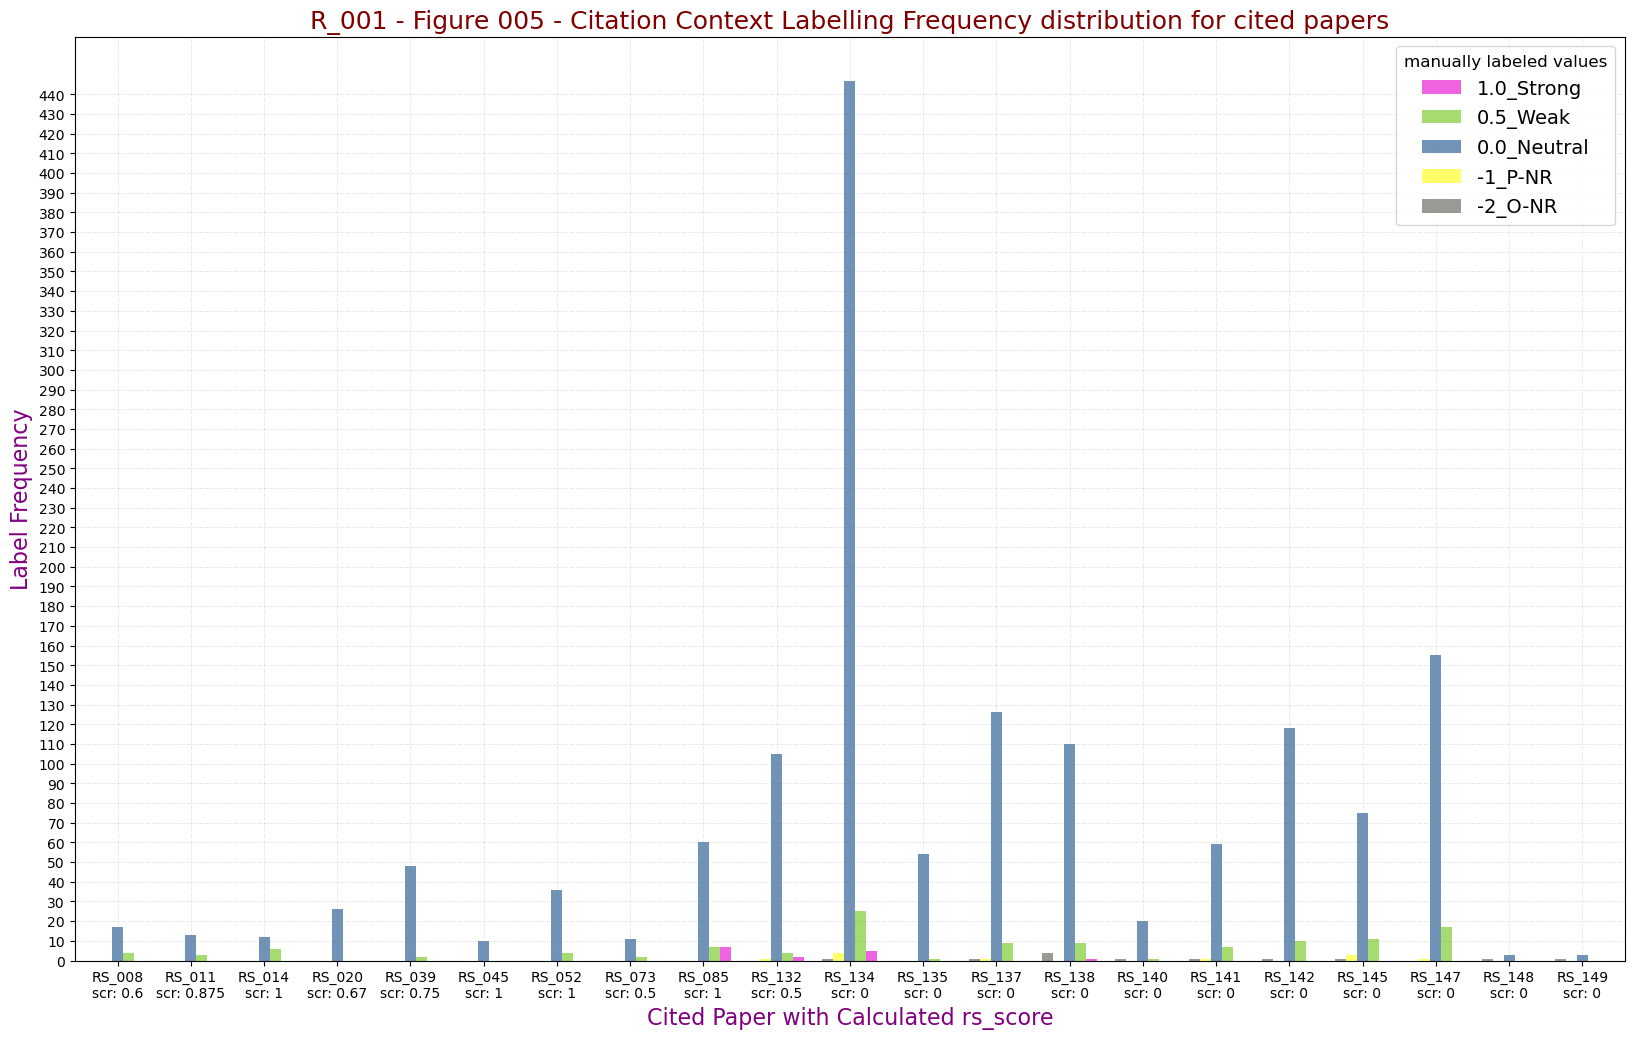

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np

# with open('citation_counts_for_cited_papers.json') as f:
#     data = json.load(f)
    
# Y_MAX = max(list(map(lambda x: x['0'],all_files.values())))

# # keys_ = list(map(lambda x: x[:6]+"\nTest",all_files.keys()))
# keys_ = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nscr: {x['rs_score']}",rs_score_dict))


# values = list(all_files.values())

# _strong = list(map(lambda x: x['1'],all_files.values())) 
# _weak = list(map(lambda x: x['0.5'],all_files.values()))
# _neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
# _p_nr = list(map(lambda x: x['-1'],all_files.values())) 
# _o_nr = list(map(lambda x: x['-2'],all_files.values())) 

# X = keys_

# fig = plt.figure(figsize = (20, 12))
  
# X_axis = np.arange(len(X)) 

# colors = {'green':(0.5, 0.8, 0.2, 0.7),
#           'blue':(0.2, 0.4, 0.6, 0.7),
#           'purple':(0.922, 0.129, 0.827, 0.7),
#           'yellow':(1, 1, 0.169, 0.7),
#           'gray':(0.431, 0.431, 0.412, 0.7),
#          }

# # https://rgbcolorpicker.com/0-1

# plt.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
# plt.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
# plt.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
# plt.yticks(np.arange(0, Y_MAX+1, step=10))

# plt.xlabel("Cited Paper with Calculated rs_score",fontsize=16,color='purple')
# plt.ylabel("Label Frequency",fontsize=16,color='purple')
# plt.title("R_001 - Figure 005 - Citation Context Labelling Frequency distribution for cited papers",fontsize=18,color='maroon')

# plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# # plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
# plt.legend(fontsize="14",title="manually labeled values",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_005_Citation_Context_Labelling_Frequency_distribution_for_cited_papers.png",pad_inches=2)


# plt.show() 

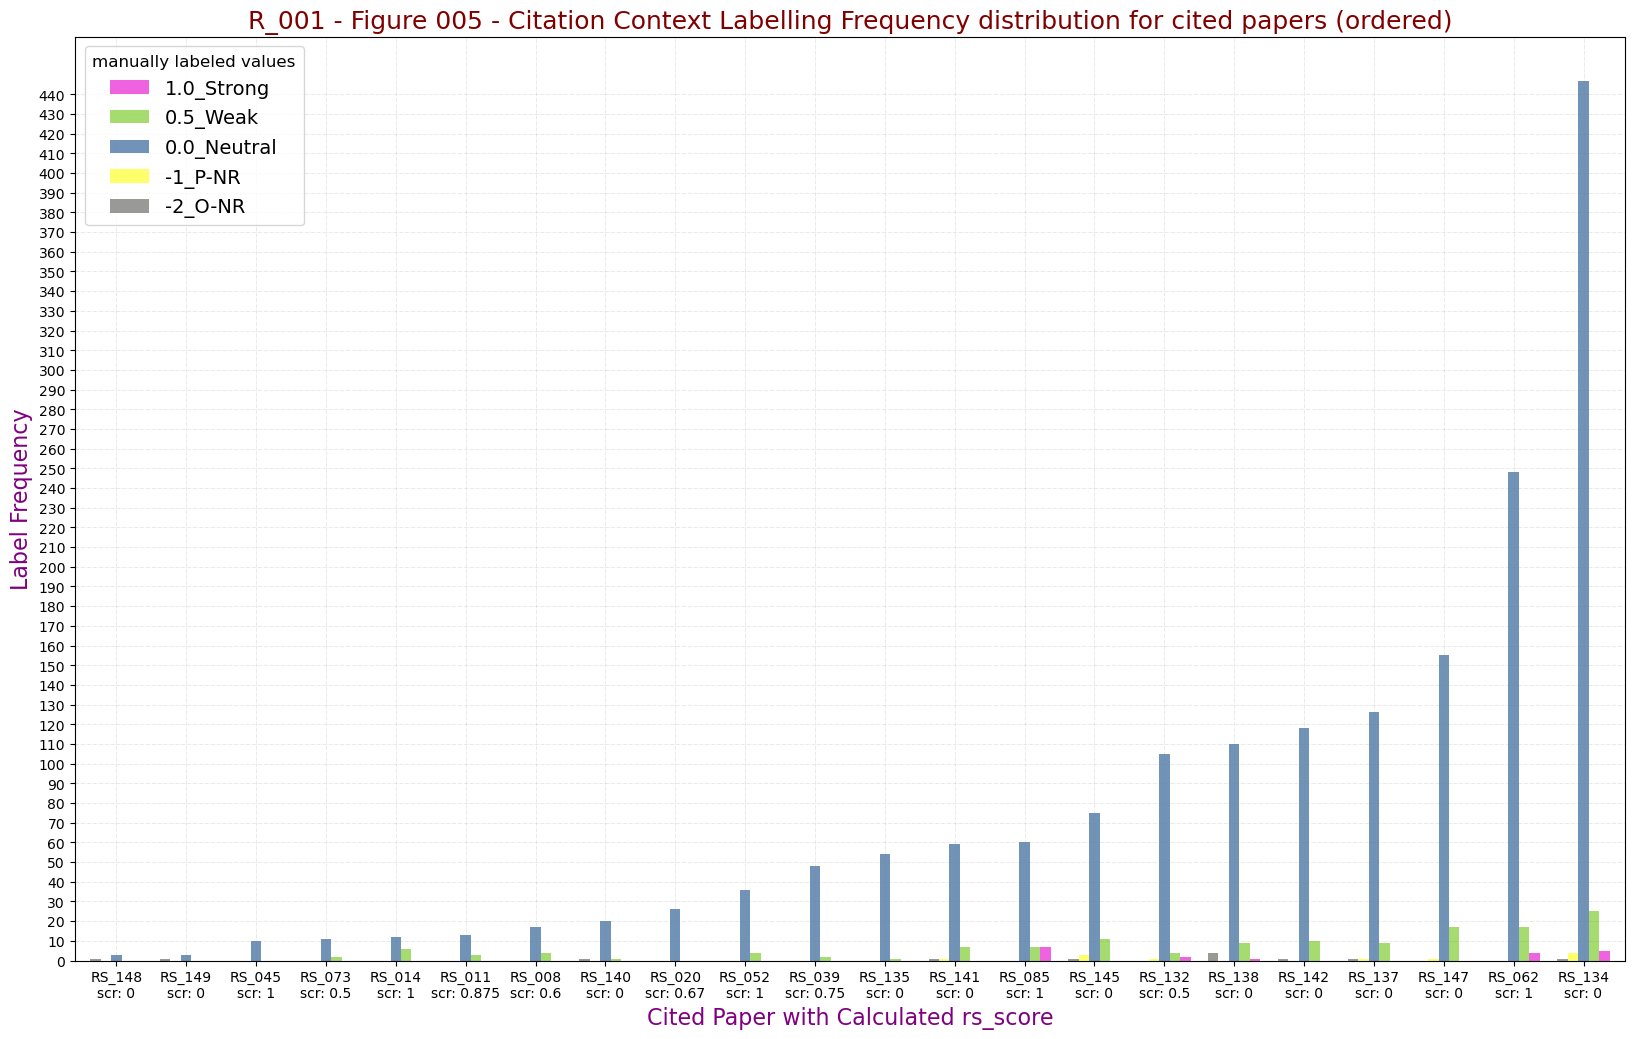

In [107]:
# sorted based on '0' labels 

import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)
    
Y_MAX = max(list(map(lambda x: x['0'],sorted_all_files.values())))

# keys_ = list(map(lambda x: x[:6]+"\nTest",all_files.keys()))
keys_ = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nscr: {x['rs_score']}",sorted_rs_score_dicts_list))


values = list(all_files.values())

_strong = list(map(lambda x: x['1'],sorted_all_files.values())) 
_weak = list(map(lambda x: x['0.5'],sorted_all_files.values()))
_neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, sorted_all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
_p_nr = list(map(lambda x: x['-1'],sorted_all_files.values())) 
_o_nr = list(map(lambda x: x['-2'],sorted_all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(len(X)) 

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# https://rgbcolorpicker.com/0-1

plt.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
plt.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
plt.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 

plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# creating the bar plot
# plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# plt.rc('xtick', labelsize=8)

# plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, Y_MAX+1, step=10))

plt.xlabel("Cited Paper with Calculated rs_score",fontsize=16,color='purple')
plt.ylabel("Label Frequency",fontsize=16,color='purple')
plt.title("R_001 - Figure 005 - Citation Context Labelling Frequency distribution for cited papers (ordered)",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

# plt.show()



  
# plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# plt.xlabel("Groups") 
# plt.ylabel("Number of Students") 
# plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="manually labeled values",title_fontsize="large",fancybox=True) 

# title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_005_Citation_Context_Labelling_Frequency_distribution_for_cited_papers_ordered.png",pad_inches=2)


plt.show() 

#### FIgure 05 with inset

AxesSubplot(0.125,0.11;0.775x0.77)


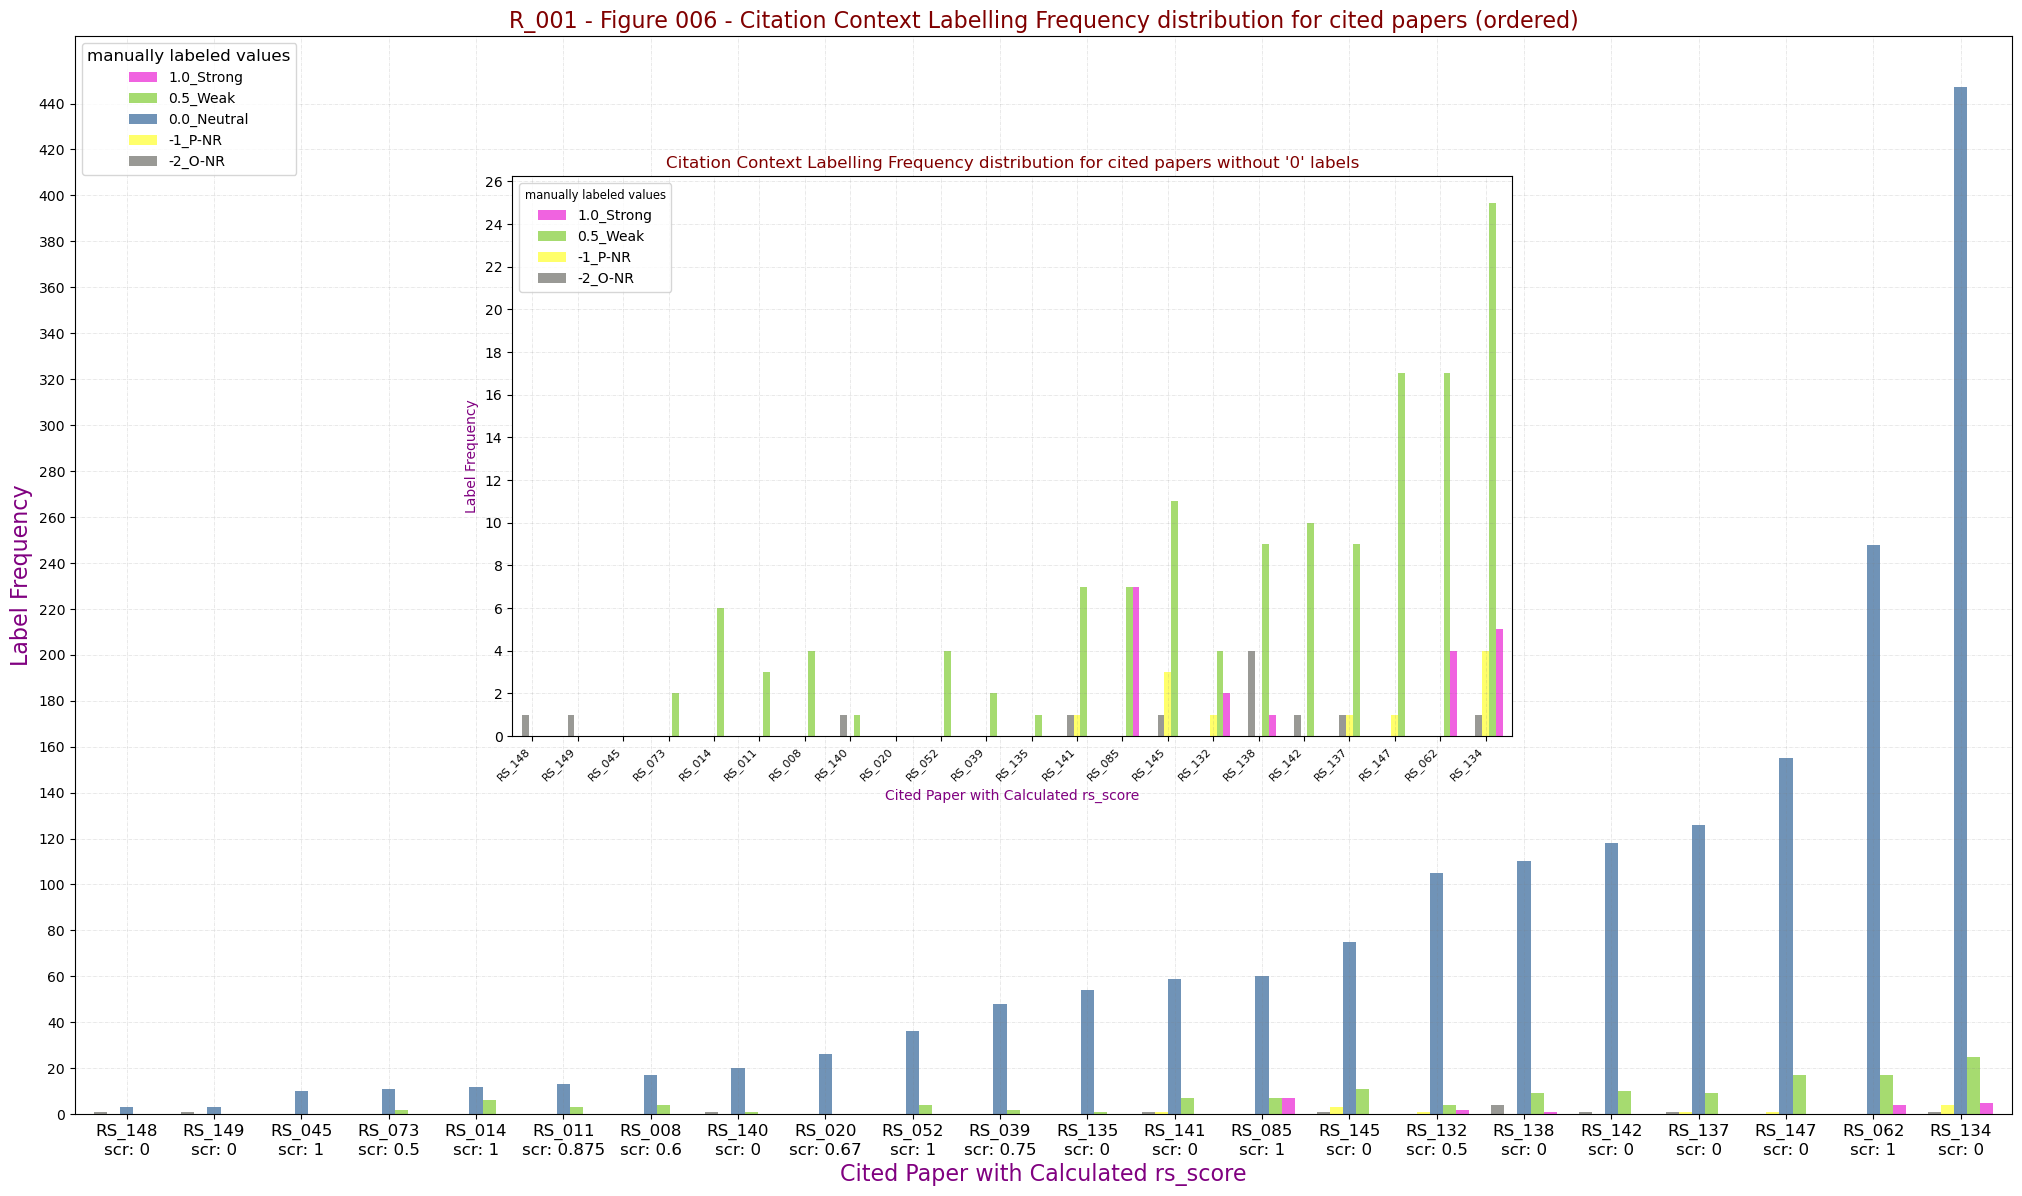

In [113]:
# #### FIgure 05 with inset + sorted based on '0' labels 

import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)
    
Y_MAX = max(list(map(lambda x: x['0'],sorted_all_files.values())))

# keys_ = list(map(lambda x: x[:6]+"\nTest",all_files.keys()))
keys_ = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nscr: {x['rs_score']}",sorted_rs_score_dicts_list))


values = list(all_files.values())

_strong = list(map(lambda x: x['1'],sorted_all_files.values())) 
_weak = list(map(lambda x: x['0.5'],sorted_all_files.values()))
_neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, sorted_all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
_p_nr = list(map(lambda x: x['-1'],sorted_all_files.values())) 
_o_nr = list(map(lambda x: x['-2'],sorted_all_files.values())) 

X = keys_



fig, ax1 = plt.subplots(figsize = (25, 14))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.38, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

print(ax1)
 
# x =  list(new_df['citation_count_org']) #.astype(int)
# x = df_excel_["valid_citation_context_count"]
# print(x)

X_axis = np.arange(len(X)) 

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# num_bins_1 = 49
# binwidth = 60
ax1.set(xticks=X_axis,xticklabels=X) #, xticklabels=labels)
ax1.tick_params(axis='x', labelsize=12)

# ax1.set(xticks=X_axis,xticklabels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
# ax1.set(xticks=X_axis, labels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
ax1.set(yticks=np.arange(0, Y_MAX+1, step=20))

# ax1.set_xticklabels(X)
# ax1.tick_params(axis='x', labelrotation=90)

ax1.set_xlabel("Cited Paper with Calculated rs_score",fontsize=16,color='purple')
ax1.set_ylabel("Label Frequency",fontsize=16,color='purple')
ax1.set_title("R_001 - Figure 006 - Citation Context Labelling Frequency distribution for cited papers (ordered)",fontsize=16, color='maroon')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)

# ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)

ax1.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
ax1.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
ax1.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 

ax1.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax1.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 


ax1.legend(fontsize="10",title="manually labeled values",title_fontsize="large",fancybox=True) 







Y_MAX_INSET = max(list(map(lambda x: x['0.5'],sorted_all_files.values())))
inset_keys_ = list(map(lambda x: x['key_for_all_RS'][:6],sorted_rs_score_dicts_list))


ax2.set(xticks=X_axis,xticklabels=inset_keys_) #, xticklabels=labels)
# ax1.set(xticks=X_axis,xticklabels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
# ax1.set(xticks=X_axis, labels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
ax2.set(yticks=np.arange(0, Y_MAX_INSET+2, step=2))

# ax2.set_xticklabels(X)
ax2.tick_params(axis='x', labelrotation=45, labelsize=8)
ax2.set_xticklabels(inset_keys_,ha='right')
# ax.set_xticklabels(xlabels, rotation=40, ha='right')
# ax.tick_params(axis='both', which='minor', labelsize=8)

ax2.set_xlabel("Cited Paper with Calculated rs_score",fontsize=10,color='purple')
ax2.set_ylabel("Label Frequency",fontsize=10,color='purple')
ax2.set_title("Citation Context Labelling Frequency distribution for cited papers without '0' labels",fontsize=12, color='maroon')

ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

# ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)

ax2.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
ax2.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
# ax2.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.2) 

ax2.bar(X_axis, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax2.bar(X_axis - 0.15, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

ax2.legend(fontsize="10",title="manually labeled values",title_fontsize="small",fancybox=True) 

plt.savefig("plots/R_001_Figure_006_Citation_Context_Labelling_Frequency_distribution_for_cited_papers_ordered_inset.png")
# plt.savefig("plots/R_001_Figure_006_Citation_Context_Labelling_Frequency_distribution_for_cited_papers_ordered_inset.png",pad_inches=1)


plt.show()



Axes(0.125,0.11;0.775x0.77)


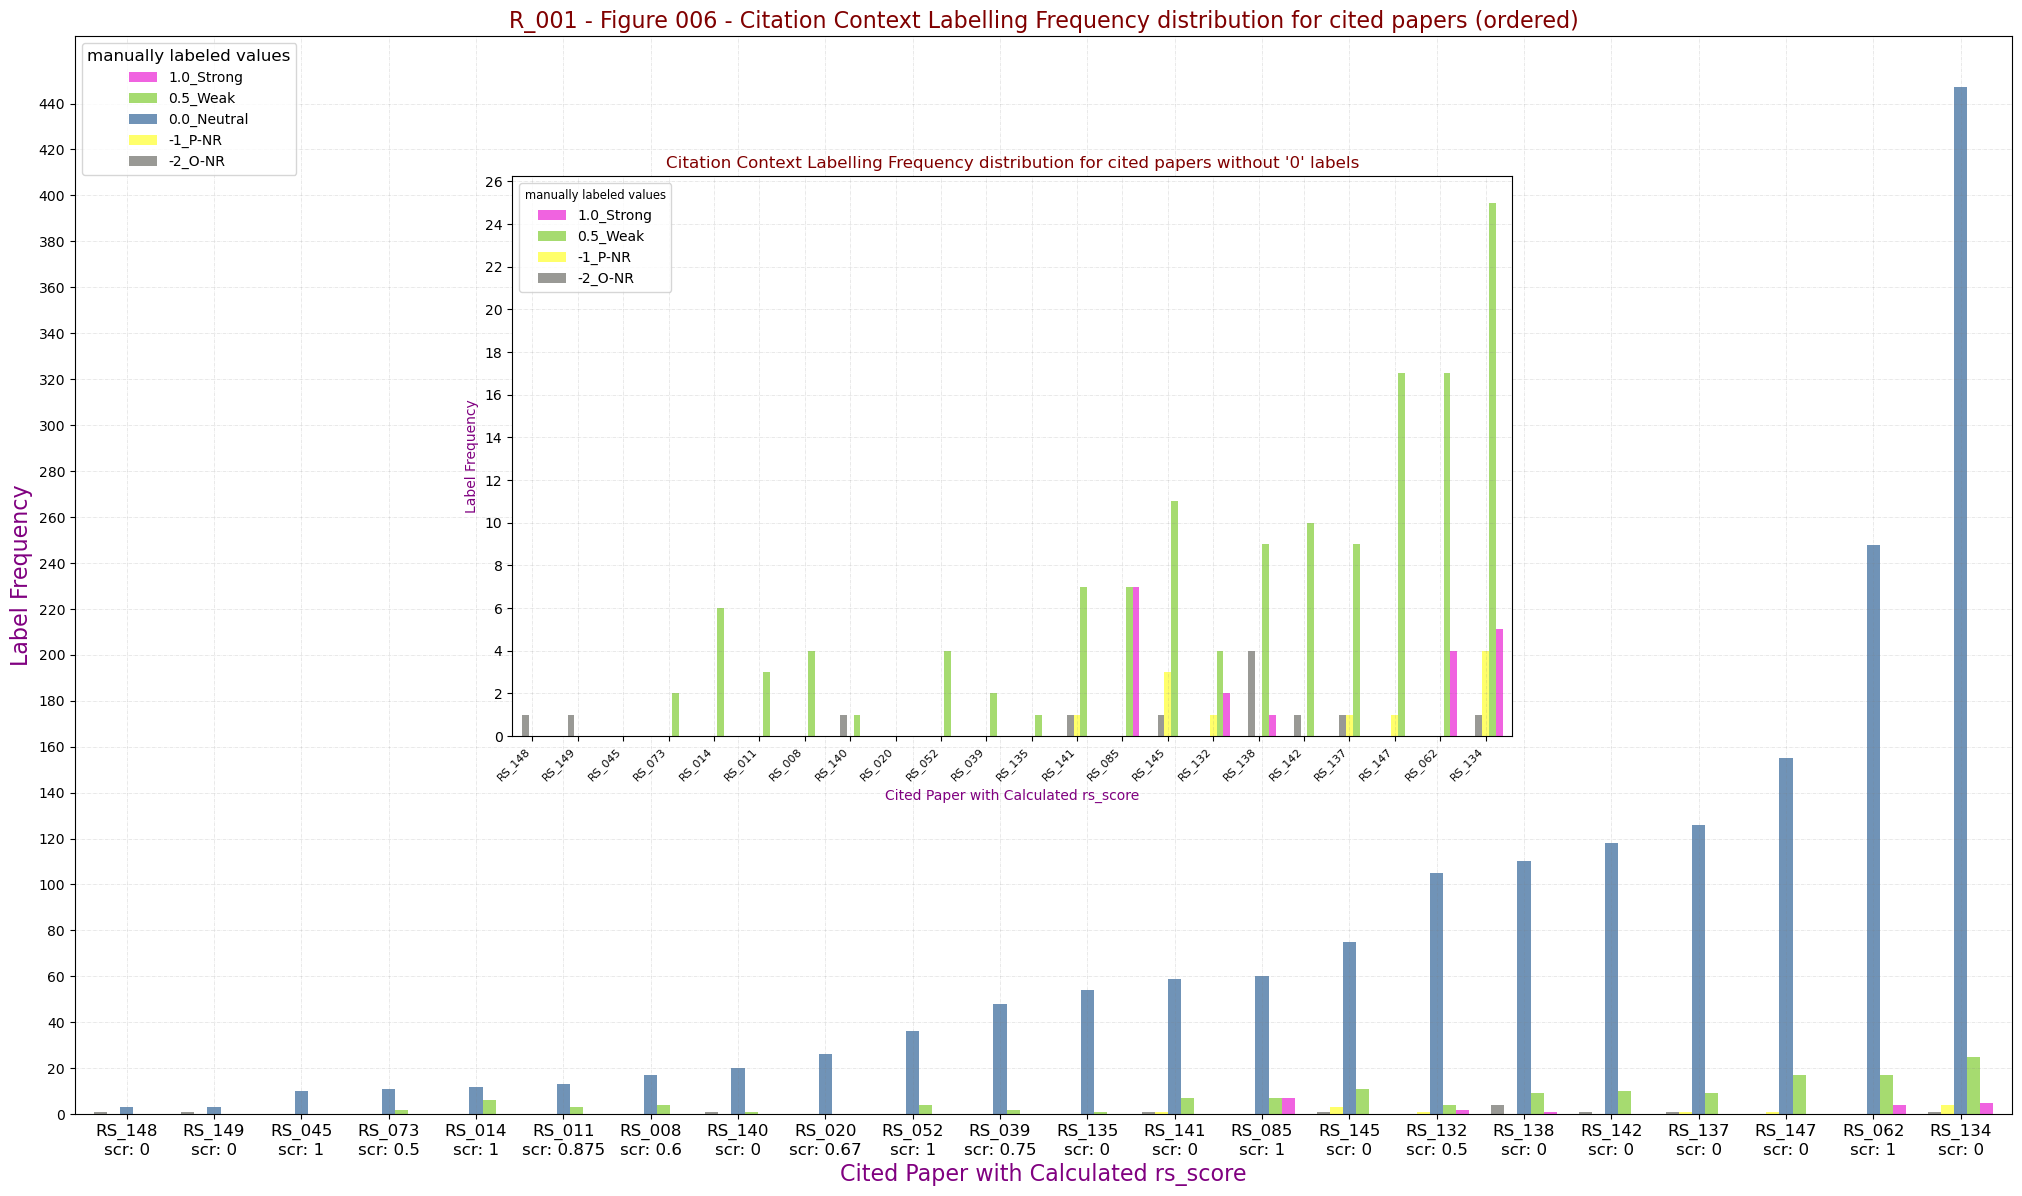

In [59]:
# #### FIgure 05 with inset + sorted based on '0' labels 

import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)
    
Y_MAX = max(list(map(lambda x: x['0'],sorted_all_files.values())))

# keys_ = list(map(lambda x: x[:6]+"\nTest",all_files.keys()))
keys_ = list(map(lambda x: x['key_for_all_RS'][:6]+f"\nscr: {x['rs_score']}",sorted_rs_score_dicts_list))


values = list(all_files.values())

_strong = list(map(lambda x: x['1'],sorted_all_files.values())) 
_weak = list(map(lambda x: x['0.5'],sorted_all_files.values()))
_neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, sorted_all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
_p_nr = list(map(lambda x: x['-1'],sorted_all_files.values())) 
_o_nr = list(map(lambda x: x['-2'],sorted_all_files.values())) 

X = keys_



fig, ax1 = plt.subplots(figsize = (25, 14))

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.3, 0.38, 0.4, 0.4]
ax2 = fig.add_axes([left, bottom, width, height])

print(ax1)
 
# x =  list(new_df['citation_count_org']) #.astype(int)
# x = df_excel_["valid_citation_context_count"]
# print(x)

X_axis = np.arange(len(X)) 

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# num_bins_1 = 49
# binwidth = 60
ax1.set(xticks=X_axis,xticklabels=X) #, xticklabels=labels)
ax1.tick_params(axis='x', labelsize=12)

# ax1.set(xticks=X_axis,xticklabels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
# ax1.set(xticks=X_axis, labels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
ax1.set(yticks=np.arange(0, Y_MAX+1, step=20))

# ax1.set_xticklabels(X)
# ax1.tick_params(axis='x', labelrotation=90)

ax1.set_xlabel("Cited Paper with Calculated rs_score",fontsize=16,color='purple')
ax1.set_ylabel("Label Frequency",fontsize=16,color='purple')
ax1.set_title("R_001 - Figure 006 - Citation Context Labelling Frequency distribution for cited papers (ordered)",fontsize=16, color='maroon')

ax1.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax1.margins(x=0.01, tight=True)

# ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)

ax1.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
ax1.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
ax1.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 

ax1.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax1.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 


ax1.legend(fontsize="10",title="manually labeled values",title_fontsize="large",fancybox=True) 







Y_MAX_INSET = max(list(map(lambda x: x['0.5'],sorted_all_files.values())))
inset_keys_ = list(map(lambda x: x['key_for_all_RS'][:6],sorted_rs_score_dicts_list))


ax2.set(xticks=X_axis,xticklabels=inset_keys_) #, xticklabels=labels)
# ax1.set(xticks=X_axis,xticklabels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
# ax1.set(xticks=X_axis, labels=X,fontsize=10, ha="center",rotation_mode="anchor") #, xticklabels=labels)
ax2.set(yticks=np.arange(0, Y_MAX_INSET+2, step=2))

# ax2.set_xticklabels(X)
ax2.tick_params(axis='x', labelrotation=45, labelsize=8)
ax2.set_xticklabels(inset_keys_,ha='right')
# ax.set_xticklabels(xlabels, rotation=40, ha='right')
# ax.tick_params(axis='both', which='minor', labelsize=8)

ax2.set_xlabel("Cited Paper with Calculated rs_score",fontsize=10,color='purple')
ax2.set_ylabel("Label Frequency",fontsize=10,color='purple')
ax2.set_title("Citation Context Labelling Frequency distribution for cited papers without '0' labels",fontsize=12, color='maroon')

ax2.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
ax2.margins(x=0.01, tight=True)

# ax1.hist(x, bins=np.arange(min(x), max(x) + binwidth, binwidth),color=(0.2, 0.4, 0.6, 0.7),density=False)

ax2.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
ax2.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
# ax2.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.2) 

ax2.bar(X_axis, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
ax2.bar(X_axis - 0.15, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

ax2.legend(fontsize="10",title="manually labeled values",title_fontsize="small",fancybox=True) 

plt.savefig("plots/R_001_Figure_006_III.png")
# plt.savefig("plots/R_001_Figure_006_Citation_Context_Labelling_Frequency_distribution_for_cited_papers_ordered_inset.png",pad_inches=1)


plt.show()



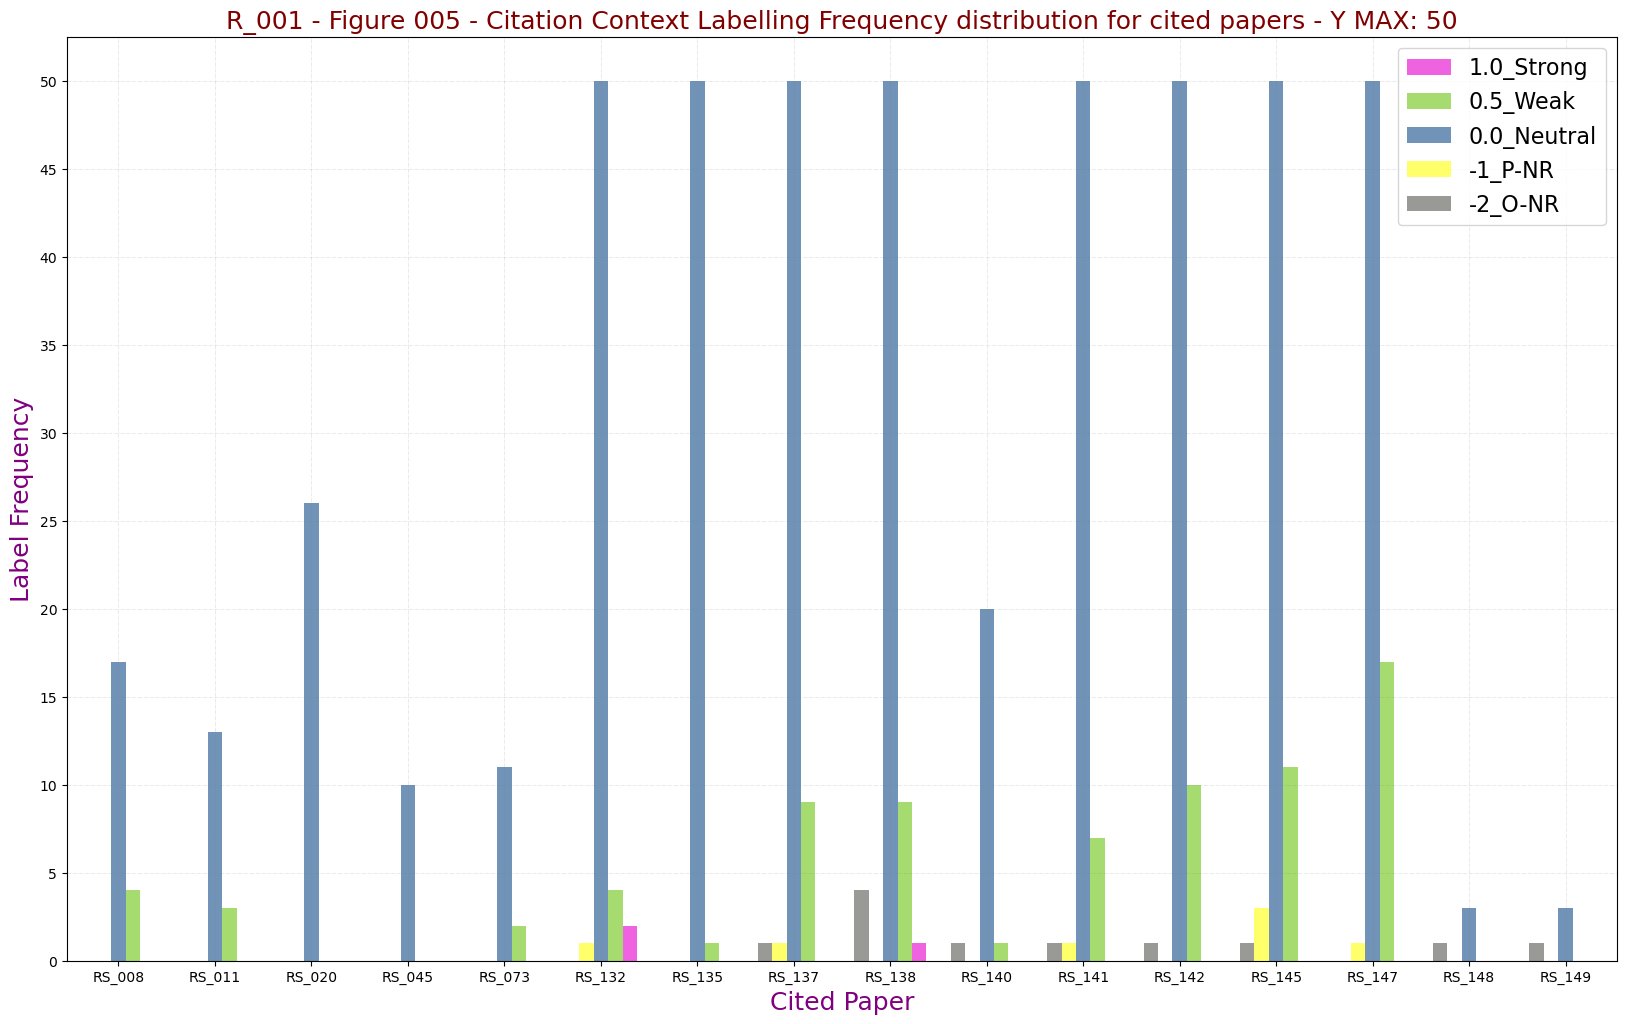

In [24]:
# import matplotlib.pyplot as plt
# import numpy as np

# with open('citation_counts_for_cited_papers.json') as f:
#     data = json.load(f)
    
# Y_MAX = 50

# keys_ = list(map(lambda x: x[:6],all_files.keys()))
# values = list(all_files.values())

# _strong = list(map(lambda x: x['1'],all_files.values())) 
# _weak = list(map(lambda x: x['0.5'],all_files.values()))
# _neutral = list(map(lambda x: x['0'] if x['0']<Y_MAX else Y_MAX, all_files.values())) # defining a upper bound for the ease of visualization -- max Y value is set to 80 
# _p_nr = list(map(lambda x: x['-1'],all_files.values())) 
# _o_nr = list(map(lambda x: x['-2'],all_files.values())) 

# X = keys_

# fig = plt.figure(figsize = (20, 12))
  
# X_axis = np.arange(len(X)) 

# colors = {'green':(0.5, 0.8, 0.2, 0.7),
#           'blue':(0.2, 0.4, 0.6, 0.7),
#           'purple':(0.922, 0.129, 0.827, 0.7),
#           'yellow':(1, 1, 0.169, 0.7),
#           'gray':(0.431, 0.431, 0.412, 0.7),
#          }

# # https://rgbcolorpicker.com/0-1

# plt.bar(X_axis + 0.3, _strong, label = '1.0_Strong', color=colors['purple'], width = 0.15) 
    
# plt.bar(X_axis + 0.15, _weak, color=colors['green'], label = '0.5_Weak', width = 0.15) 
# plt.bar(X_axis , _neutral, label = '0.0_Neutral', color=colors['blue'], width = 0.15) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
# plt.yticks(np.arange(0, Y_MAX+1, step=5))

# plt.xlabel("Cited Paper",fontsize=18,color='purple')
# plt.ylabel("Label Frequency",fontsize=18,color='purple')
# plt.title(f"R_001 - Figure 005 - Citation Context Labelling Frequency distribution for cited papers - Y MAX: {Y_MAX}",fontsize=18,color='maroon')

# plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# # plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
# plt.legend(fontsize="16") 

# plt.savefig(f"plots/R_001_Figure_005_Citation_Context_Labelling_Frequency_distribution_for_cited_papers_y_max_{Y_MAX}.png",pad_inches=2)


# plt.show() 

{'-2': 12, '-1': 11, '0': 1756, '0.5': 139, '1': 19}


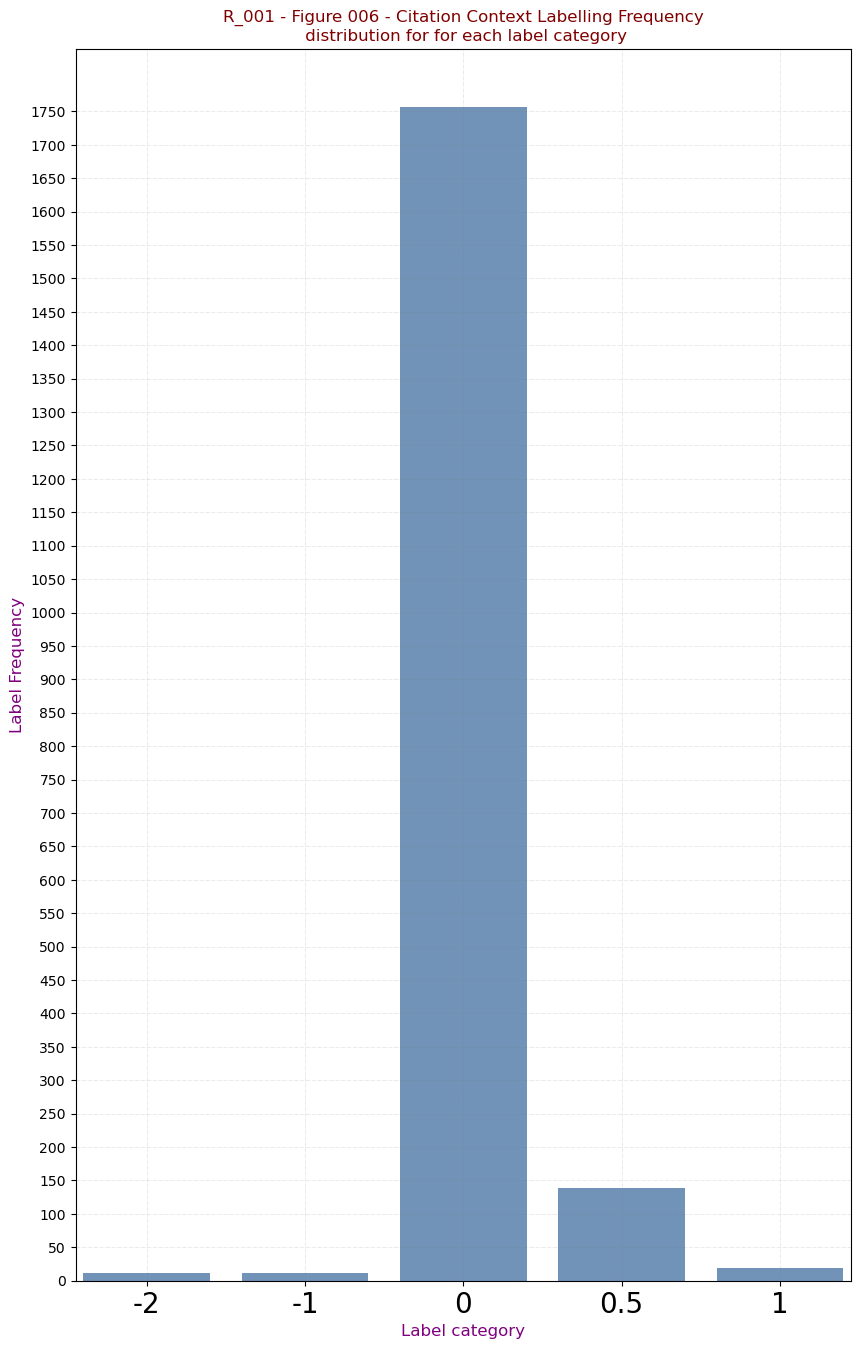

In [115]:
import matplotlib.pyplot as plt
import numpy as np

    

keys_dict =  {'-2': 0, '-1': 0, '0': 17, '0.5': 4, '1': 0}

all_counts_by_category_dict = {}

for key in keys_dict.keys():
    all_counts_by_category_dict.update({key:sum(map(lambda x: x[key],all_files.values()))})

# all_counts_by_category_dict

# values = list(all_files.values())

print(all_counts_by_category_dict)

X = all_counts_by_category_dict.keys()

fig = plt.figure(figsize = (10,16))
  
X_axis = np.arange(len(X)) 
Y_MAX = max(all_counts_by_category_dict.values())

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.bar(X_axis , all_counts_by_category_dict.values(), color=colors['blue'], width = 0.8) 

 
# plt.rc('xtick', labelsize=20)
# plt.xticks(fontsize=40)
# plt.yticks(fontsize=20)
plt.yticks(np.arange(0, Y_MAX+1, step=50))

plt.xlabel("Label category",fontsize=12,color='purple')
plt.ylabel("Label Frequency",fontsize=12,color='purple')
plt.title("R_001 - Figure 006 - Citation Context Labelling Frequency\n distribution for for each label category",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.margins(x=0.01, tight=True)

# # plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
plt.xticks(X_axis, X,fontsize=20, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
# plt.legend(fontsize="14",title="manually labeled values",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_007_Citation_Context_Labelling_Frequency_distribution_for_each_label_category.png",pad_inches=1)


plt.show() 

## ``visualizations on correlation``

In [55]:
# R_001_Figure_008_normalized_citation_context_count_vs_reproducibility_score_ground_truth

# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np

already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
already_labelled_keys_list

with open('citation_context_counts_for_cited_papers.json') as f:
    data = json.load(f)

# X = keys_
# rs_key = 'RS_001_MLRC_2022_01'
# print(data[rs_key]['total_context_count_for_labelling'])
# data


# MAX_CITATION_CONTEXT_COUNT = max(list(map(lambda x: x['total_context_count_for_labelling'],data.values()))) 
MAX_CITATION_CONTEXT_COUNT = max([x['total_context_count_for_labelling'] for key,x in data.items() if key in already_labelled_keys_list])


# print(list(filter(lambda key: key in already_labelled_keys_list, data)))
# map(lambda x:x.value)



def normalize_(val):
    global MAX_CITATION_CONTEXT_COUNT
        
    return float(val/MAX_CITATION_CONTEXT_COUNT)

# normalize_(data[rs_key]['total_context_count_for_labelling'])

# R_001_Figure_008_normalized_citation_context_count_vs_reproducibility_score_ground_truth

# x axis = reproducibility_score [0,1]

from pprint import pprint

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered
# df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

rs_score_dicts_list = df_filtered.to_dict('records')

## pprint(sorted(rs_score_dicts_list, key=lambda x:list(sorted_all_files.keys()).index(x['key_for_all_RS'])))
# pprint(rs_score_dicts_list)
sorted_rs_score_dicts_list = sorted(rs_score_dicts_list, key=lambda x:already_labelled_keys_list.index(x['key_for_all_RS']))
pprint(sorted_rs_score_dicts_list)

list_with_both_XY =[]
# [list_with_both_XY.append(x) for x in sorted_rs_score_dicts_list]
list_with_both_XY

for item in sorted_rs_score_dicts_list:
    context_count = normalize_(data[item['key_for_all_RS']]['total_context_count_for_labelling'])
#     print(context_count)
    item.update({"context_count":context_count})
    list_with_both_XY.append(item)
pprint(list_with_both_XY)

[{'key_for_all_RS': 'RS_008_MLRC_2022_08', 'rs_score': 0.6},
 {'key_for_all_RS': 'RS_011_MLRC_2022_11', 'rs_score': 0.875},
 {'key_for_all_RS': 'RS_014_MLRC_2022_14', 'rs_score': 1},
 {'key_for_all_RS': 'RS_020_MLRC_2022_20', 'rs_score': 0.67},
 {'key_for_all_RS': 'RS_039_MLRC_2022_39', 'rs_score': 0.75},
 {'key_for_all_RS': 'RS_045_MLRC_2022_45', 'rs_score': 1},
 {'key_for_all_RS': 'RS_052_MLRC_2021_07', 'rs_score': 1},
 {'key_for_all_RS': 'RS_062_MLRC_2021_17', 'rs_score': 1},
 {'key_for_all_RS': 'RS_073_MLRC_2021_28', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_085_MLRC_2021_40', 'rs_score': 1},
 {'key_for_all_RS': 'RS_132_ICLR_2019_04', 'rs_score': 0.5},
 {'key_for_all_RS': 'RS_134_ICDAR_2018_01', 'rs_score': 0},
 {'key_for_all_RS': 'RS_135_ICDAR_2018_02', 'rs_score': 0},
 {'key_for_all_RS': 'RS_137_ICDAR_2018_04', 'rs_score': 0},
 {'key_for_all_RS': 'RS_138_ICDAR_2018_05', 'rs_score': 0},
 {'key_for_all_RS': 'RS_140_ICDAR_2018_07', 'rs_score': 0},
 {'key_for_all_RS': 'RS_141_ICDAR_2

[0.043568464730290454, 0.03319502074688797, 0.03734439834024896, 0.05394190871369295, 0.1037344398340249, 0.02074688796680498, 0.08298755186721991, 0.558091286307054, 0.026970954356846474, 0.15352697095435686, 0.23236514522821577, 1.0, 0.11410788381742738, 0.2842323651452282, 0.2572614107883817, 0.04564315352697095, 0.14107883817427386, 0.2676348547717842, 0.18672199170124482, 0.35892116182572614, 0.008298755186721992, 0.008298755186721992]
[0.6, 0.875, 1, 0.67, 0.75, 1, 1, 1, 0.5, 1, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


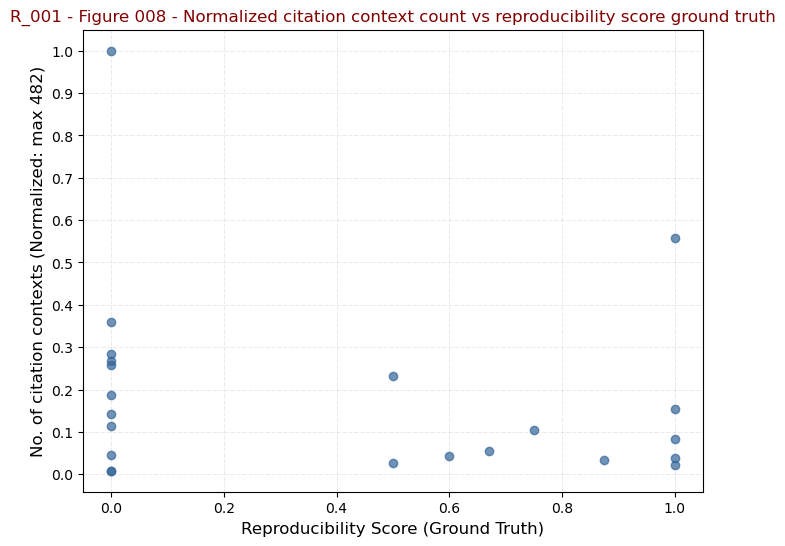

In [71]:
import matplotlib.pyplot as plt
import numpy as np

with open('citation_counts_for_cited_papers.json') as f:
    data = json.load(f)

# keys_ = list(data.keys())
# values = list(data.values())

context_count = list(map(lambda x: x['context_count'],list_with_both_XY)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY)) 
# citationCount = list(map(lambda x: x['citationCount'],data.values())) 
print(context_count)
print(rs_score)

# labels = ("manual_count_after_2021", "manual_count_all_retrieved", "citationCount")
# counts = {
#     'manual_count_after_2021': manual_count_after_2021,
#     'manual_count_all_retrieved': manual_count_all_retrieved,
#     'citationCount': citationCount,
# }

X = keys_


fig = plt.figure(figsize = (8, 6))
  
X_axis = np.arange(0,1.1,0.1) 

# colors_list = [ 'red' if x> else 'green' colors = ['red','red','red','blue','red','blue']]
#   (0.5, 0.8, 0.2, 0.7)
# plt.bar(X_axis - 0.2, manual_count_after_2021, color=(0.2, 0.4, 0.6, 0.7), label = 'manual_count_after_2021', width = 0.4) 
plt.scatter(rs_score, context_count,color=(0.2, 0.4, 0.6, 0.7)) 

 
# creating the bar plot
# plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# plt.rc('xtick', labelsize=8)

# plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"No. of citation contexts (Normalized: max {MAX_CITATION_CONTEXT_COUNT})",fontsize=12)
plt.title("R_001 - Figure 008 - Normalized citation context count vs reproducibility score ground truth",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# plt.xticks(X_axis, X,rotation=90,fontsize=8) 


# plt.xlabel("Groups") 
# plt.ylabel("Number of Students") 
# plt.title("Number of Students in each group") 
# plt.legend() 

plt.savefig("plots/R_001_Figure_008_normalized_citation_context_count_vs_reproducibility_score_ground_truth.png",pad_inches=1)
plt.show()

#### ALL DATA

In [119]:
# R_001_Figure_008_normalized_citation_context_count_vs_reproducibility_score_ground_truth

# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np

with open('citation_context_counts_for_cited_papers.json') as f:
    data = json.load(f)


def normalize_all(val):
    global MAX_CITATION_CONTEXT_COUNT_
        
    return float(val/MAX_CITATION_CONTEXT_COUNT_)

# normalize_(data[rs_key]['total_context_count_for_labelling'])

# R_001_Figure_008_normalized_citation_context_count_vs_reproducibility_score_ground_truth

# x axis = reproducibility_score [0,1]


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
# df_rs_score_ = df_rs_score.loc[:,['key_for_all_RS','rs_score']]
print(df_rs_score_)
df_filtered = df_rs_score[(df_rs_score['rs_score']!='NOT_RELEVANT') & (df_rs_score['total_context_count_for_labelling']<1000)].loc[:,['key_for_all_RS','rs_score','total_context_count_for_labelling']]
# df_filtered
print(df_filtered)
# # df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

# MAX_CITATION_CONTEXT_COUNT_ = max(list(map(lambda x: x['total_context_count_for_labelling'],data.values())))
MAX_CITATION_CONTEXT_COUNT_ = max(df_filtered['total_context_count_for_labelling'])


rs_score_dicts_list = df_filtered.to_dict('records')

# list_with_both_XY =[]
# # [list_with_both_XY.append(x) for x in sorted_rs_score_dicts_list]
list_with_both_XY_all = []

for item in rs_score_dicts_list:
    context_count = normalize_all(data[item.get('key_for_all_RS')]['total_context_count_for_labelling'])
#     print(context_count)
    item.update({"context_count":context_count})
    list_with_both_XY_all.append(item)
pprint(list_with_both_XY_all)

           key_for_all_RS rs_score
0     RS_001_MLRC_2022_01     0.43
1     RS_002_MLRC_2022_02        1
2     RS_003_MLRC_2022_03        1
3     RS_004_MLRC_2022_04        1
4     RS_005_MLRC_2022_05     0.75
..                    ...      ...
144  RS_145_ICDAR_2018_12        0
145  RS_146_ICDAR_2018_13        1
146  RS_147_ICDAR_2018_14        0
147  RS_148_ICDAR_2018_15        0
148  RS_149_ICDAR_2018_16        0

[149 rows x 2 columns]
           key_for_all_RS rs_score  total_context_count_for_labelling
0     RS_001_MLRC_2022_01     0.43                                141
1     RS_002_MLRC_2022_02        1                                160
2     RS_003_MLRC_2022_03        1                                 34
3     RS_004_MLRC_2022_04        1                                 16
4     RS_005_MLRC_2022_05     0.75                                 10
..                    ...      ...                                ...
144  RS_145_ICDAR_2018_12        0                                

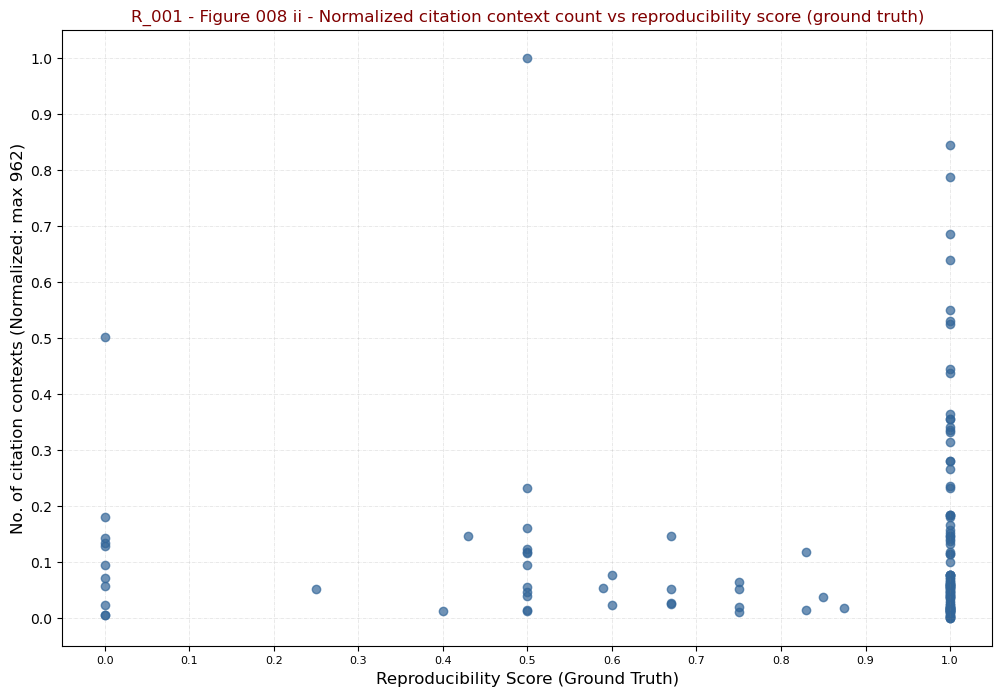

In [120]:
import matplotlib.pyplot as plt
import numpy as np

context_count = list(map(lambda x: x['context_count'],list_with_both_XY_all)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_all)) 

fig = plt.figure(figsize = (12, 8))
  
X_axis = np.arange(0,1.1,0.1) 

plt.scatter(rs_score, context_count,color=(0.2, 0.4, 0.6, 0.7)) 

plt.xticks(X_axis,fontsize=8)
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"No. of citation contexts (Normalized: max {MAX_CITATION_CONTEXT_COUNT_})",fontsize=12)
plt.title("R_001 - Figure 008 ii - Normalized citation context count vs reproducibility score (ground truth)",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)

plt.savefig("plots/R_001_Figure_008_ii_normalized_citation_context_count_vs_reproducibility_score_ground_truth.png",pad_inches=1)
plt.show()

#### citation context score () vs rs_score ( ground truth )

In [27]:
# R_001_Figure_009_citation_context_score_labelled_vs_reproducibility_score_ground_truth

# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def calculate_overall_label_score(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    _minus_2 = -2 * dict_item['-2']
    _minus_1 = -1 * dict_item['-1']
    _point_5 = 0.5 * dict_item['0.5']
    _one = 1 * dict_item['1']
    
    if total_labels_count == 0:
#         ret = 0
        ret = 0 - (-2) / (1-(-2))
        ret_agg = 0
    else:
        ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        ret_agg = (_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)

    # returning the normalized value
    return ret, ret_agg

def get_majority_vote(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    dict_item_ = {key: dict_item[key] for key in dict_item if key != '0'}
    key_max = max(zip(dict_item_.values(), dict_item_.keys()))[1]
    
#     print(Keymax)
    
    _minus_2 = -2 * dict_item['-2']
    _minus_1 = -1 * dict_item['-1']
    _point_5 = 0.5 * dict_item['0.5']
    _one = 1 * dict_item['1']
    
    if total_labels_count == 0:
        ret = 0 - (-2) / (1-(-2))
    else:
        ret =(float(key_max) - (-2) ) / (1-(-2))
#         ret = float(key_max)

    # returning the normalized value
    return ret

already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
already_labelled_keys_list


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered
# df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

with open('citation_context_label_summary.json') as f:
    data_labels = json.load(f)
    
with open('citation_context_counts_for_cited_papers.json') as f1:
    data_total = json.load(f1)
    
data_labels
df_filtered
                               
                               
# calculate_overrall_label_score({'-2': 4, '-1': 0, '0': 110, '0.5': 9, '1': 1})                               
                               
                               
rs_score_dicts_list = df_filtered.to_dict('records')

# ## pprint(sorted(rs_score_dicts_list, key=lambda x:list(sorted_all_files.keys()).index(x['key_for_all_RS'])))
# # pprint(rs_score_dicts_list)
# sorted_rs_score_dicts_list = sorted(rs_score_dicts_list, key=lambda x:already_labelled_keys_list.index(x['key_for_all_RS']))
# pprint(sorted_rs_score_dicts_list)

list_with_both_XY_009 =[]
# list_with_both_XY_major_vote =[]
# [list_with_both_XY.append(x) for x in sorted_rs_score_dicts_list]
# list_with_both_XY

for item in rs_score_dicts_list:
    context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
    context_score_major_vote = get_majority_vote(data_labels[item['key_for_all_RS']])
    
#     print(context_count)
    item.update({"context_score_agg":context_score})
    item.update({"cntxt_scr_agg_norm":context_score_norm})
    
    
#     item.update({"labels":data_labels[item['key_for_all_RS']]})
    item.update({"-2":data_labels[item['key_for_all_RS']]['-2']})
    item.update({"-1":data_labels[item['key_for_all_RS']]['-1']})
    item.update({"0":data_labels[item['key_for_all_RS']]['0']})
    item.update({"0.5":data_labels[item['key_for_all_RS']]['0.5']})
    item.update({"1":data_labels[item['key_for_all_RS']]['1']})
    
    item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})
    
#     item.update({"context_score_major":context_score_major_vote})
    list_with_both_XY_009.append(item)
#     list_with_both_XY_major.append(item)

# Key, label_scores, aggregated value, aggregated value

    
# pprint(list_with_both_XY_009)

df_dp22 = pd.DataFrame(list_with_both_XY_009)
# df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
df_dp22 = df_dp22.sort_values(by=['key_for_all_RS'])
df_dp22.to_csv('22_data_points.csv',index=False)
df_dp22


key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  -2  \
0    RS_008_MLRC_2022_08     0.600           0.500000            0.833333   0   
1    RS_011_MLRC_2022_11     0.875           0.500000            0.833333   0   
2    RS_014_MLRC_2022_14     1.000           0.500000            0.833333   0   
3    RS_020_MLRC_2022_20     0.670           0.000000            0.666667   0   
4    RS_039_MLRC_2022_39     0.750           0.500000            0.833333   0   
5    RS_045_MLRC_2022_45     1.000           0.000000            0.666667   0   
6    RS_052_MLRC_2021_07     1.000           0.500000            0.833333   0   
7    RS_062_MLRC_2021_17     1.000           0.595238            0.865079   0   
8    RS_073_MLRC_2021_28     0.500           0.500000            0.833333   0   
9    RS_085_MLRC_2021_40     1.000           0.750000            0.916667   0   
10   RS_132_ICLR_2019_04     0.500           0.428571            0.809524   0   
11  RS_134_ICDAR_2018_01     0.000           0.328571            0.776190   1   
12  RS_135_ICDAR_2018_02     0.000           0.500000            0.833333   0   
13  RS_137_ICDAR_2018_04     0.000           0.136364            0.712121   1   
14  RS_138_ICDAR_2018_05     0.000          -0.178571            0.607143   4   
15  RS_140_ICDAR_2018_07     0.000          -0.750000            0.416667   1   
16  RS_141_ICDAR_2018_08     0.000           0.055556            0.685185   1   
17  RS_142_ICDAR_2018_09     0.000           0.272727            0.757576   1   
18  RS_145_ICDAR_2018_12     0.000           0.033333            0.677778   1   
19  RS_147_ICDAR_2018_14     0.000           0.416667            0.805556   0   
20  RS_148_ICDAR_2018_15     0.000          -2.000000            0.000000   1   
21  RS_149_ICDAR_2018_16     0.000          -2.000000            0.000000   1   

    -1    0  0.5  1  total_labels  
0    0   17    4  0            21  
1    0   13    3  0            16  
2    0   12    6  0            18  
3    0   26    0  0            26  
4    0   48    2  0            50  
5    0   10    0  0            10  
6    0   36    4  0            40  
7    0  248   17  4           269  
8    0   11    2  0            13  
9    0   60    7  7            74  
10   1  105    4  2           112  
11   4  447   25  5           482  
12   0   54    1  0            55  
13   1  126    9  0           137  
14   0  110    9  1           124  
15   0   20    1  0            22  
16   1   59    7  0            68  
17   0  118   10  0           129  
18   3   75   11  0            90  
19   1  155   17  0           173  
20   0    3    0  0             4  
21   0    3    0  0             4

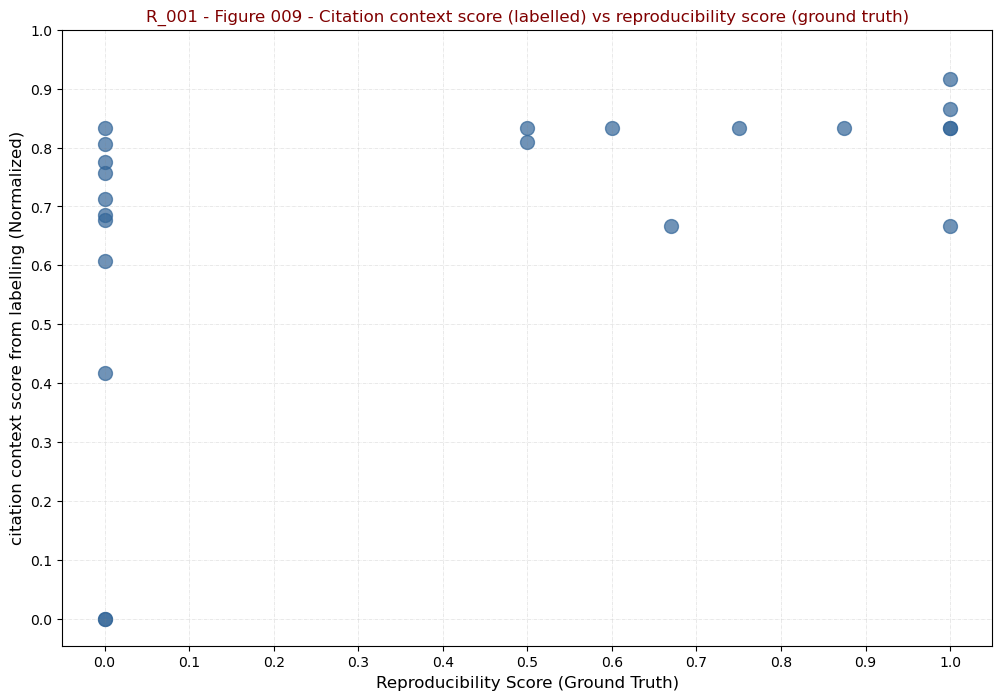

In [25]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['context_score_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# X = keys_

fig = plt.figure(figsize = (12, 8))
  
# X_axis = np.arange(0,1.1,0.1) 
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 
# p2 = plt.scatter(rs_score, context_score_major,color=(0.2, 0.9, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 009 - Citation context score (labelled) vs reproducibility score (ground truth)",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}') for (i, j,k) in zip(rs_score, context_score,data_points,font)]

# plt.margins(x=0.01, tight=True)
# plt.legend((p1,p2),('Low Outlier', 'LoLo'),loc="lower right", title="Classes")
# plt.legend((p1,p2),('min-max normalization', 'majority voting'), title="Aggregation Method")
# plt.plot(np.unique(rs_score), np.poly1d(np.polyfit(rs_score, context_score, 1))(np.unique(rs_score)))
# sns.regplot(x=rs_score, y=context_score,color='green')



plt.savefig("plots/R_001_Figure_009_citation_context_score_labelled_vs_reproducibility_score_ground_truth.png",pad_inches=1)
plt.show()

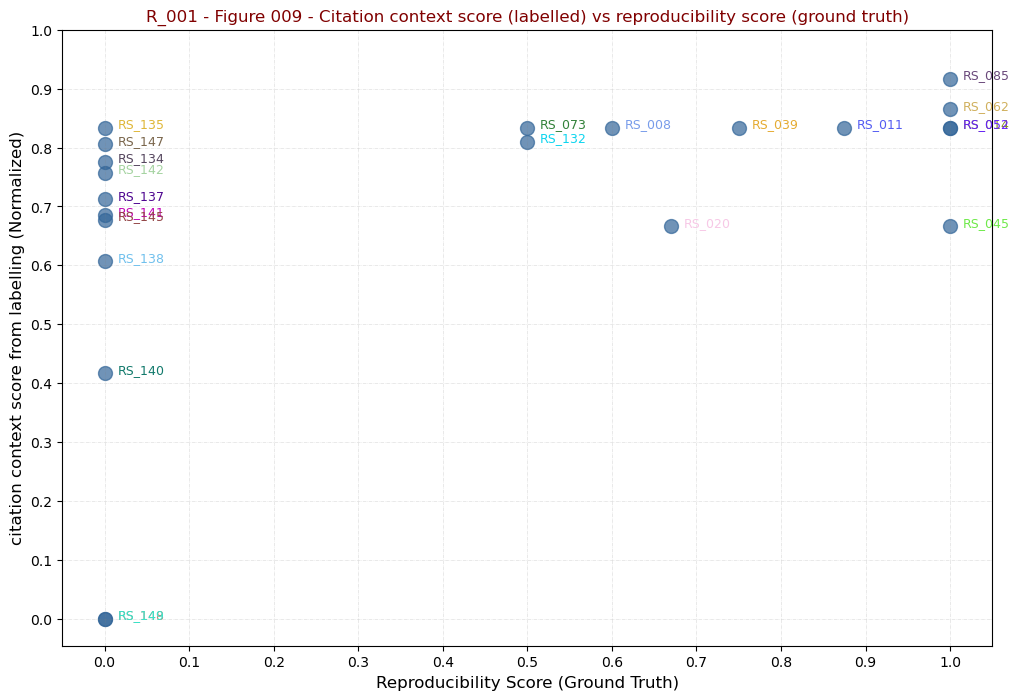

In [43]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['context_score_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# X = keys_

fig = plt.figure(figsize = (12, 8))
  
# X_axis = np.arange(0,1.1,0.1) 
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 
# p2 = plt.scatter(rs_score, context_score_major,color=(0.2, 0.9, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 009 - Citation context score (labelled) vs reproducibility score (ground truth)",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

[plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score, context_score,data_points)]

# plt.margins(x=0.01, tight=True)
# plt.legend((p1,p2),('Low Outlier', 'LoLo'),loc="lower right", title="Classes")
# plt.legend((p1,p2),('min-max normalization', 'majority voting'), title="Aggregation Method")
# plt.plot(np.unique(rs_score), np.poly1d(np.polyfit(rs_score, context_score, 1))(np.unique(rs_score)))
# sns.regplot(x=rs_score, y=context_score,color='green')



plt.savefig("plots/R_001_Figure_009_iii_citation_context_score_labelled_vs_reproducibility_score_ground_truth.png",pad_inches=1)
plt.show()

#### citation context score () vs rs_score ( ground truth ) -- different weighs for different labels

```
-2 ---> 0.4
-1 ---> 0.3
0 
0.5 --> 0.1
1   --> 0.2
```

In [73]:
# R_001_Figure_009_citation_context_score_labelled_vs_reproducibility_score_ground_truth

# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def calculate_overall_label_score_diff_weights(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    weights = {'-2':0.6,'-1':0.4,'0.5':0.2,'1':0.7 }
    
    _minus_2 = -2 * dict_item['-2'] * weights['-2']
    _minus_1 = -1 * dict_item['-1'] * weights['-1']
    _point_5 = 0.5 * dict_item['0.5'] * weights['0.5']
    _one = 1 * dict_item['1'] * weights['1']
    
    if total_labels_count == 0:
#         ret = 0
        ret = 0 - (-2) / (1-(-2))
        ret_agg = 0
    else:
        ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        ret_agg = (_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)

    # returning the normalized value
    return ret, ret_agg


already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
already_labelled_keys_list


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered
# df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

with open('citation_context_label_summary.json') as f:
    data_labels = json.load(f)
    
with open('citation_context_counts_for_cited_papers.json') as f1:
    data_total = json.load(f1)
                               
                               
rs_score_dicts_list = df_filtered.to_dict('records')


list_with_both_XY_009 =[]


for item in rs_score_dicts_list:
    context_score_norm, context_score  = calculate_overall_label_score_diff_weights(data_labels[item['key_for_all_RS']])
    
    item.update({"context_score_agg":context_score})
    item.update({"cntxt_scr_agg_norm":context_score_norm})
    
#     item.update({"labels":data_labels[item['key_for_all_RS']]})
    item.update({"-2":data_labels[item['key_for_all_RS']]['-2']})
    item.update({"-1":data_labels[item['key_for_all_RS']]['-1']})
    item.update({"0":data_labels[item['key_for_all_RS']]['0']})
    item.update({"0.5":data_labels[item['key_for_all_RS']]['0.5']})
    item.update({"1":data_labels[item['key_for_all_RS']]['1']})
    
    item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})
    
    list_with_both_XY_009.append(item)


df_dp22_diff = pd.DataFrame(list_with_both_XY_009)
# df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
df_dp22_diff = df_dp22_diff.sort_values(by=['key_for_all_RS'])
df_dp22_diff.to_csv('22_diff_data_points.csv',index=False)
df_dp22_diff


key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  -2  \
0    RS_008_MLRC_2022_08     0.600           0.100000            0.700000   0   
1    RS_011_MLRC_2022_11     0.875           0.100000            0.700000   0   
2    RS_014_MLRC_2022_14     1.000           0.100000            0.700000   0   
3    RS_020_MLRC_2022_20     0.670           0.000000            0.666667   0   
4    RS_039_MLRC_2022_39     0.750           0.100000            0.700000   0   
5    RS_045_MLRC_2022_45     1.000           0.000000            0.666667   0   
6    RS_052_MLRC_2021_07     1.000           0.100000            0.700000   0   
7    RS_062_MLRC_2021_17     1.000           0.214286            0.738095   0   
8    RS_073_MLRC_2021_28     0.500           0.100000            0.700000   0   
9    RS_085_MLRC_2021_40     1.000           0.400000            0.800000   0   
10   RS_132_ICLR_2019_04     0.500           0.200000            0.733333   0   
11  RS_134_ICDAR_2018_01     0.000           0.091429            0.697143   1   
12  RS_135_ICDAR_2018_02     0.000           0.100000            0.700000   0   
13  RS_137_ICDAR_2018_04     0.000          -0.063636            0.645455   1   
14  RS_138_ICDAR_2018_05     0.000          -0.228571            0.590476   4   
15  RS_140_ICDAR_2018_07     0.000          -0.550000            0.483333   1   
16  RS_141_ICDAR_2018_08     0.000          -0.100000            0.633333   1   
17  RS_142_ICDAR_2018_09     0.000          -0.018182            0.660606   1   
18  RS_145_ICDAR_2018_12     0.000          -0.086667            0.637778   1   
19  RS_147_ICDAR_2018_14     0.000           0.072222            0.690741   0   
20  RS_148_ICDAR_2018_15     0.000          -1.200000            0.266667   1   
21  RS_149_ICDAR_2018_16     0.000          -1.200000            0.266667   1   

    -1    0  0.5  1  total_labels  
0    0   17    4  0            21  
1    0   13    3  0            16  
2    0   12    6  0            18  
3    0   26    0  0            26  
4    0   48    2  0            50  
5    0   10    0  0            10  
6    0   36    4  0            40  
7    0  248   17  4           269  
8    0   11    2  0            13  
9    0   60    7  7            74  
10   1  105    4  2           112  
11   4  447   25  5           482  
12   0   54    1  0            55  
13   1  126    9  0           137  
14   0  110    9  1           124  
15   0   20    1  0            22  
16   1   59    7  0            68  
17   0  118   10  0           129  
18   3   75   11  0            90  
19   1  155   17  0           173  
20   0    3    0  0             4  
21   0    3    0  0             4

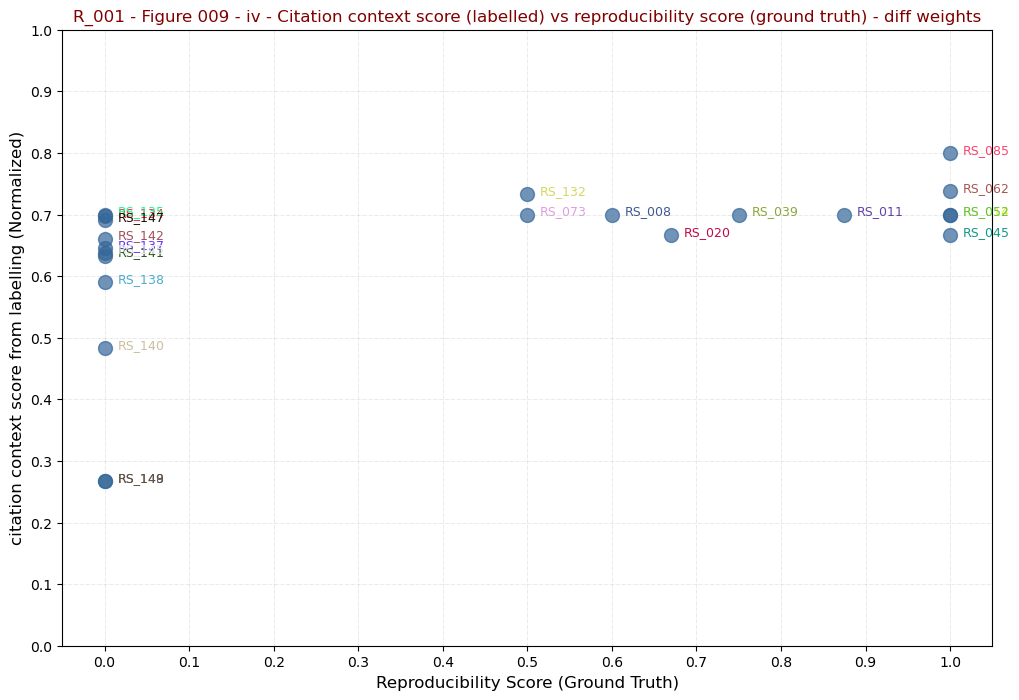

In [76]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# X = keys_

fig = plt.figure(figsize = (12, 8))
  
# X_axis = np.arange(0,1.1,0.1) 
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 
# p2 = plt.scatter(rs_score, context_score_major,color=(0.2, 0.9, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 009 - iv - Citation context score (labelled) vs reproducibility score (ground truth) - diff weights",fontsize=12,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

[plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]

# plt.margins(x=0.01, tight=True)
# plt.legend((p1,p2),('Low Outlier', 'LoLo'),loc="lower right", title="Classes")
# plt.legend((p1,p2),('min-max normalization', 'majority voting'), title="Aggregation Method")
# plt.plot(np.unique(rs_score), np.poly1d(np.polyfit(rs_score, context_score, 1))(np.unique(rs_score)))
# sns.regplot(x=rs_score, y=context_score,color='green')



plt.savefig("plots/R_001_Figure_009_iv_citation_context_score_labelled_vs_reproducibility_score_ground_truth.png",pad_inches=1)
plt.show()

#### citation context score (aggregated label score) vs rs_score ( ground truth ) -- different weighs for different labels

### removing noisy points

```
Criteria
If data and code are not publicly available --> that data point is removed
(RS_134, RS_135, RS_140, RS_147, RS_148)

If RS has only neutral citation contexts --> remove 
(RS_020 and RS_045)

```

In [5]:
# R_001_Figure_010_context_score_vs_rs_score_noise_removed


# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def calculate_overall_label_score(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    _minus_2 = -2 * dict_item['-2']
    _minus_1 = -1 * dict_item['-1']
    _point_5 = 0.5 * dict_item['0.5']
    _one = 1 * dict_item['1']
    
    if total_labels_count == 0:
#         ret = 0
        ret = 0 - (-2) / (1-(-2))
        ret_agg = 0
    else:
        ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        ret_agg = (_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)

    # returning the normalized value
    return ret, ret_agg

already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
already_labelled_keys_list


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open('citation_context_label_summary.json') as f:
    data_labels = json.load(f)
    
with open('citation_context_counts_for_cited_papers.json') as f1:
    data_total = json.load(f1)
    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15']

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])

        item.update({"context_score_agg":context_score})
        item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"-2":data_labels[item['key_for_all_RS']]['-2']})
        item.update({"-1":data_labels[item['key_for_all_RS']]['-1']})
        item.update({"0":data_labels[item['key_for_all_RS']]['0']})
        item.update({"0.5":data_labels[item['key_for_all_RS']]['0.5']})
        item.update({"1":data_labels[item['key_for_all_RS']]['1']})

        item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# pprint(list_with_both_XY_009)

df_dp17 = pd.DataFrame(list_with_both_XY_009)
# df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_dp17.to_csv('17_data_points.csv',index=False)
df_dp17


key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  -2  \
0    RS_008_MLRC_2022_08     0.600           0.500000            0.833333   0   
1    RS_011_MLRC_2022_11     0.875           0.500000            0.833333   0   
2    RS_014_MLRC_2022_14     1.000           0.500000            0.833333   0   
3    RS_039_MLRC_2022_39     0.750           0.500000            0.833333   0   
4    RS_052_MLRC_2021_07     1.000           0.500000            0.833333   0   
5    RS_062_MLRC_2021_17     1.000           0.595238            0.865079   0   
6    RS_073_MLRC_2021_28     0.500           0.500000            0.833333   0   
7    RS_085_MLRC_2021_40     1.000           0.750000            0.916667   0   
8    RS_132_ICLR_2019_04     0.500           0.428571            0.809524   0   
9   RS_137_ICDAR_2018_04     0.000           0.136364            0.712121   1   
10  RS_138_ICDAR_2018_05     0.000          -0.178571            0.607143   4   
11  RS_141_ICDAR_2018_08     0.000           0.055556            0.685185   1   
12  RS_142_ICDAR_2018_09     0.000           0.272727            0.757576   1   
13  RS_145_ICDAR_2018_12     0.000           0.033333            0.677778   1   

    -1    0  0.5  1  total_labels  
0    0   17    4  0            21  
1    0   13    3  0            16  
2    0   12    6  0            18  
3    0   48    2  0            50  
4    0   36    4  0            40  
5    0  248   17  4           269  
6    0   11    2  0            13  
7    0   60    7  7            74  
8    1  105    4  2           112  
9    1  126    9  0           137  
10   0  110    9  1           124  
11   1   59    7  0            68  
12   0  118   10  0           129  
13   3   75   11  0            90

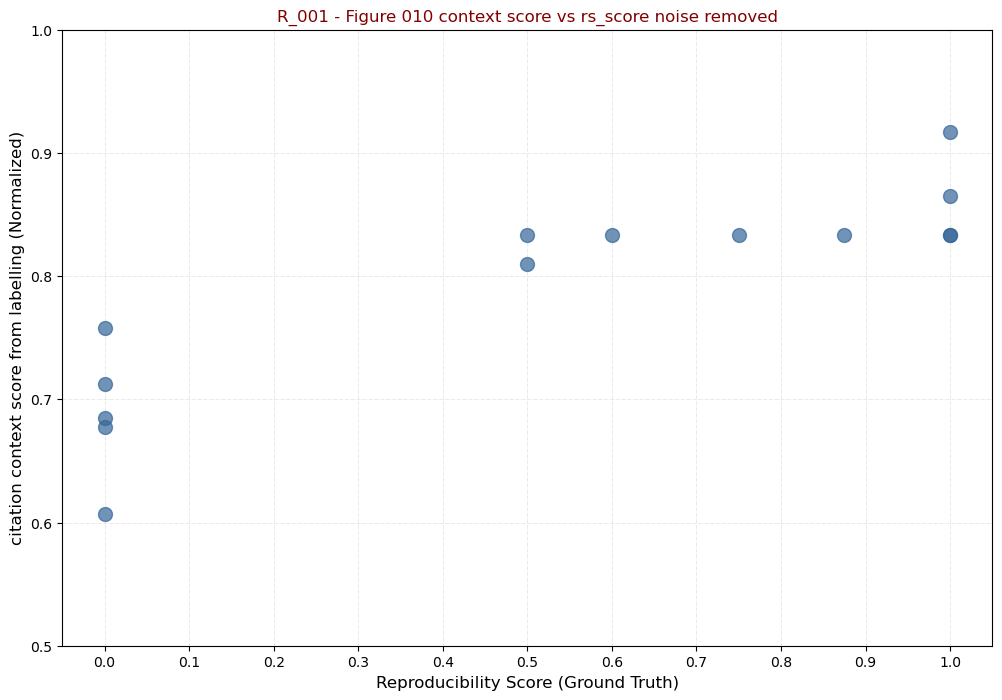

In [6]:
import matplotlib.pyplot as plt
import numpy as np

context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score_14, context_score_14,color=(0.2, 0.4, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
# plt.yticks(np.arange(0.1, 1.01, step=0.1))
plt.yticks(np.arange(0.5, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 010 context score vs rs_score noise removed", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}') for (i, j,k) in zip(rs_score, context_score,data_points,font)]

plt.savefig("plots/R_001_Figure_010_context_score_vs_rs_score_noise_removed.png",pad_inches=1)
plt.show()

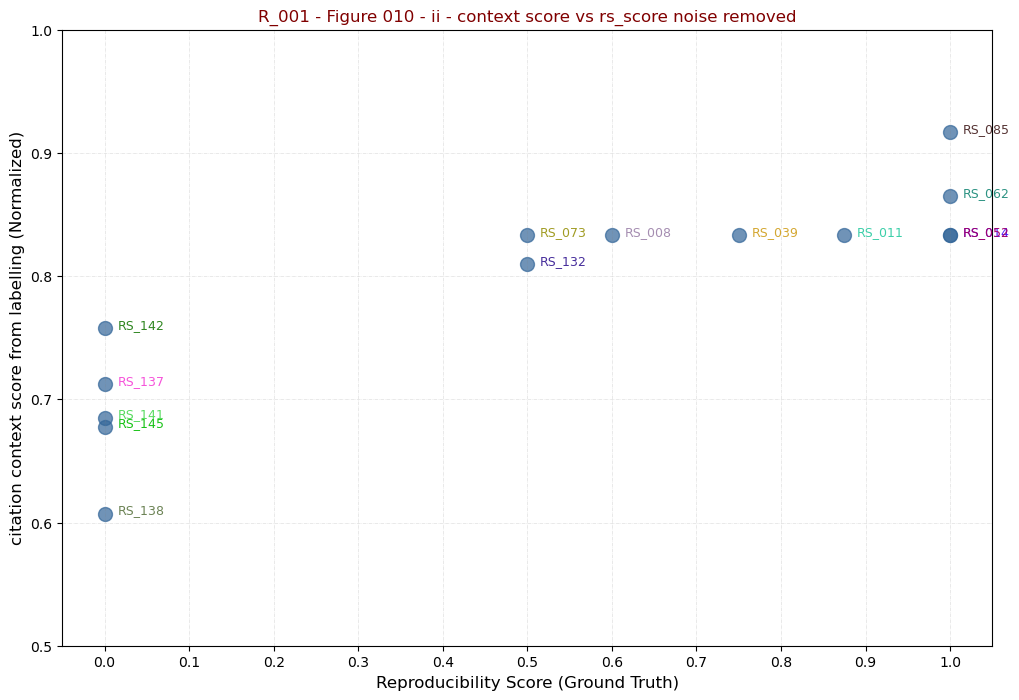

In [38]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
# plt.yticks(np.arange(0.1, 1.01, step=0.1))
plt.yticks(np.arange(0.5, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 010 - ii - context score vs rs_score noise removed", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

[plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]

plt.savefig("plots/R_001_Figure_10_ii__context_score_vs_rs_score_noise_removed.png",pad_inches=1)
plt.show()


#### citation context score (aggregated label score) vs rs_score ( ground truth ) -- different weighs for different labels

### removing noisy points 
## weighted

```
Criteria
If data and code are not publicly available --> that data point is removed
(RS_134, RS_135, RS_140, RS_147, RS_148)

If RS has only neutral citation contexts --> remove 
(RS_020 and RS_045)

```

In [3]:
# R_001_Figure_010_context_score_vs_rs_score_noise_removed


# R_001_Figure_009_citation_context_score_labelled_vs_reproducibility_score_ground_truth

# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def calculate_overall_label_score_diff_weights(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    weights = {'-2':0.6,'-1':0.4,'0.5':0.2,'1':0.7 }
    
    _minus_2 = -2 * dict_item['-2'] * weights['-2']
    _minus_1 = -1 * dict_item['-1'] * weights['-1']
    _point_5 = 0.5 * dict_item['0.5'] * weights['0.5']
    _one = 1 * dict_item['1'] * weights['1']
    
    if total_labels_count == 0:
#         ret = 0
        ret = 0 - (-2) / (1-(-2))
        ret_agg = 0
    else:
        ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        ret_agg = (_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)

    # returning the normalized value
    return ret, ret_agg


already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
already_labelled_keys_list


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered
# df_filtered.loc[df_filtered['key_for_all_RS'] == 'RS_008_MLRC_2022_08']['rs_score']

with open('citation_context_label_summary.json') as f:
    data_labels = json.load(f)
    
with open('citation_context_counts_for_cited_papers.json') as f1:
    data_total = json.load(f1)
                               
                               
rs_score_dicts_list = df_filtered.to_dict('records')


list_with_both_XY_009 =[]
# removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15']


for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        context_score_norm, context_score  = calculate_overall_label_score_diff_weights(data_labels[item['key_for_all_RS']])

        item.update({"context_score_agg":context_score})
        item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"-2":data_labels[item['key_for_all_RS']]['-2']})
        item.update({"-1":data_labels[item['key_for_all_RS']]['-1']})
        item.update({"0":data_labels[item['key_for_all_RS']]['0']})
        item.update({"0.5":data_labels[item['key_for_all_RS']]['0.5']})
        item.update({"1":data_labels[item['key_for_all_RS']]['1']})

        item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)


df_dp22_diff = pd.DataFrame(list_with_both_XY_009)
# df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
df_dp22_diff = df_dp22_diff.sort_values(by=['key_for_all_RS'])
df_dp22_diff.to_csv('22_diff_data_points.csv',index=False)
df_dp22_diff


key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  -2  \
0    RS_008_MLRC_2022_08     0.600           0.100000            0.700000   0   
1    RS_011_MLRC_2022_11     0.875           0.100000            0.700000   0   
2    RS_014_MLRC_2022_14     1.000           0.100000            0.700000   0   
3    RS_039_MLRC_2022_39     0.750           0.100000            0.700000   0   
4    RS_052_MLRC_2021_07     1.000           0.100000            0.700000   0   
5    RS_062_MLRC_2021_17     1.000           0.214286            0.738095   0   
6    RS_073_MLRC_2021_28     0.500           0.100000            0.700000   0   
7    RS_085_MLRC_2021_40     1.000           0.400000            0.800000   0   
8    RS_132_ICLR_2019_04     0.500           0.200000            0.733333   0   
9   RS_137_ICDAR_2018_04     0.000          -0.063636            0.645455   1   
10  RS_138_ICDAR_2018_05     0.000          -0.228571            0.590476   4   
11  RS_141_ICDAR_2018_08     0.000          -0.100000            0.633333   1   
12  RS_142_ICDAR_2018_09     0.000          -0.018182            0.660606   1   
13  RS_145_ICDAR_2018_12     0.000          -0.086667            0.637778   1   
14  RS_149_ICDAR_2018_16     0.000          -1.200000            0.266667   1   

    -1    0  0.5  1  total_labels  
0    0   17    4  0            21  
1    0   13    3  0            16  
2    0   12    6  0            18  
3    0   48    2  0            50  
4    0   36    4  0            40  
5    0  248   17  4           269  
6    0   11    2  0            13  
7    0   60    7  7            74  
8    1  105    4  2           112  
9    1  126    9  0           137  
10   0  110    9  1           124  
11   1   59    7  0            68  
12   0  118   10  0           129  
13   3   75   11  0            90  
14   0    3    0  0             4

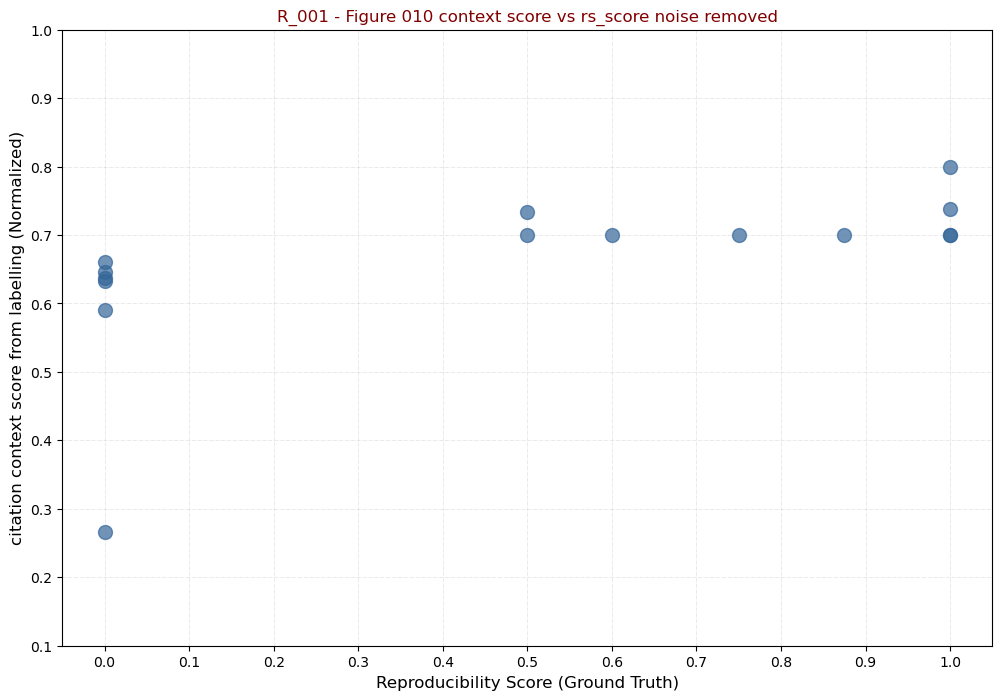

In [33]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0.1, 1.01, step=0.1))
# plt.yticks(np.arange(0.5, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 010 context score vs rs_score noise removed", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}') for (i, j,k) in zip(rs_score, context_score,data_points,font)]

plt.savefig("plots/R_001_Figure_010_context_score_vs_rs_score_noise_removed.png",pad_inches=1)
plt.show()

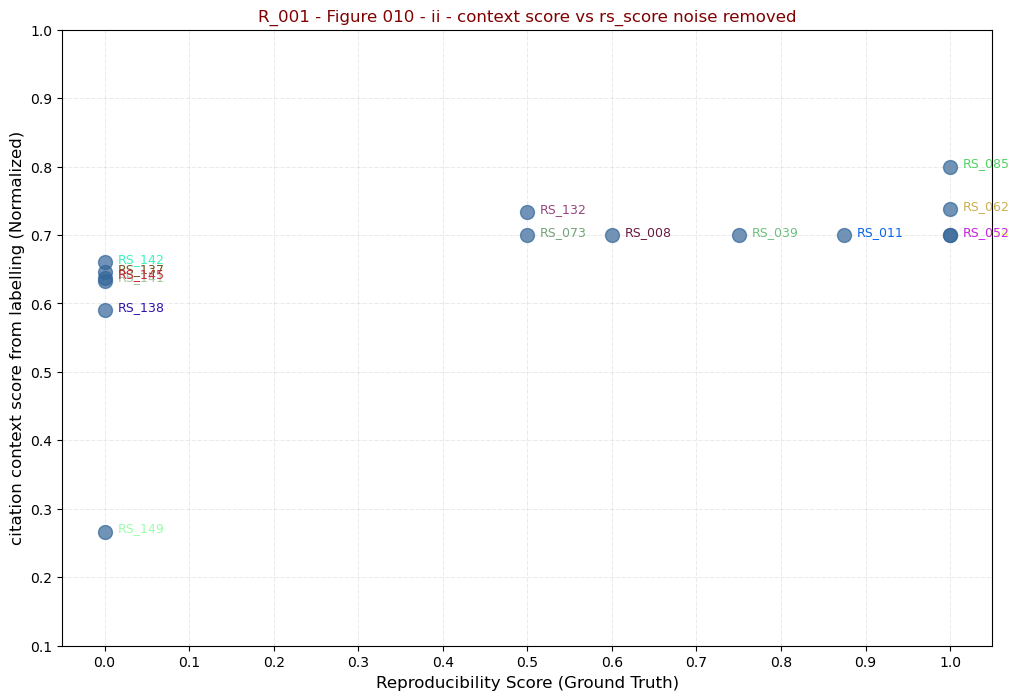

In [34]:
import matplotlib.pyplot as plt
import numpy as np

context_score_ = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points_ = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score_ = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=100) 

plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0.1, 1.01, step=0.1))
# plt.yticks(np.arange(0.5, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 010 - ii - context score vs rs_score noise removed", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

[plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]

plt.savefig("plots/R_001_Figure_10_ii__context_score_vs_rs_score_noise_removed.png",pad_inches=1)
plt.show()


### correlation analysis

```
{'pearson', 'kendall', 'spearman'}
```

In [4]:
df_dp22_diff

key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  -2  \
0    RS_008_MLRC_2022_08     0.600           0.100000            0.700000   0   
1    RS_011_MLRC_2022_11     0.875           0.100000            0.700000   0   
2    RS_014_MLRC_2022_14     1.000           0.100000            0.700000   0   
3    RS_039_MLRC_2022_39     0.750           0.100000            0.700000   0   
4    RS_052_MLRC_2021_07     1.000           0.100000            0.700000   0   
5    RS_062_MLRC_2021_17     1.000           0.214286            0.738095   0   
6    RS_073_MLRC_2021_28     0.500           0.100000            0.700000   0   
7    RS_085_MLRC_2021_40     1.000           0.400000            0.800000   0   
8    RS_132_ICLR_2019_04     0.500           0.200000            0.733333   0   
9   RS_137_ICDAR_2018_04     0.000          -0.063636            0.645455   1   
10  RS_138_ICDAR_2018_05     0.000          -0.228571            0.590476   4   
11  RS_141_ICDAR_2018_08     0.000          -0.100000            0.633333   1   
12  RS_142_ICDAR_2018_09     0.000          -0.018182            0.660606   1   
13  RS_145_ICDAR_2018_12     0.000          -0.086667            0.637778   1   
14  RS_149_ICDAR_2018_16     0.000          -1.200000            0.266667   1   

    -1    0  0.5  1  total_labels  
0    0   17    4  0            21  
1    0   13    3  0            16  
2    0   12    6  0            18  
3    0   48    2  0            50  
4    0   36    4  0            40  
5    0  248   17  4           269  
6    0   11    2  0            13  
7    0   60    7  7            74  
8    1  105    4  2           112  
9    1  126    9  0           137  
10   0  110    9  1           124  
11   1   59    7  0            68  
12   0  118   10  0           129  
13   3   75   11  0            90  
14   0    3    0  0             4

In [24]:
# Find the pearson correlations matrix
corr_pearson = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'pearson')
corr_kendall = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'kendall')
corr_spearman = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'spearman')
corr

rs_score  cntxt_scr_agg_norm
rs_score            1.000000            0.596787
cntxt_scr_agg_norm  0.596787            1.000000

In [9]:
# c = np.corrcoef(df_dp22_diff['rs_score'],df_dp22_diff['cntxt_scr_agg_norm'])
# print('Correlations between age and sex\n',c)

Correlations between age and sex
 [[1.         0.59678684]
 [0.59678684 1.        ]]


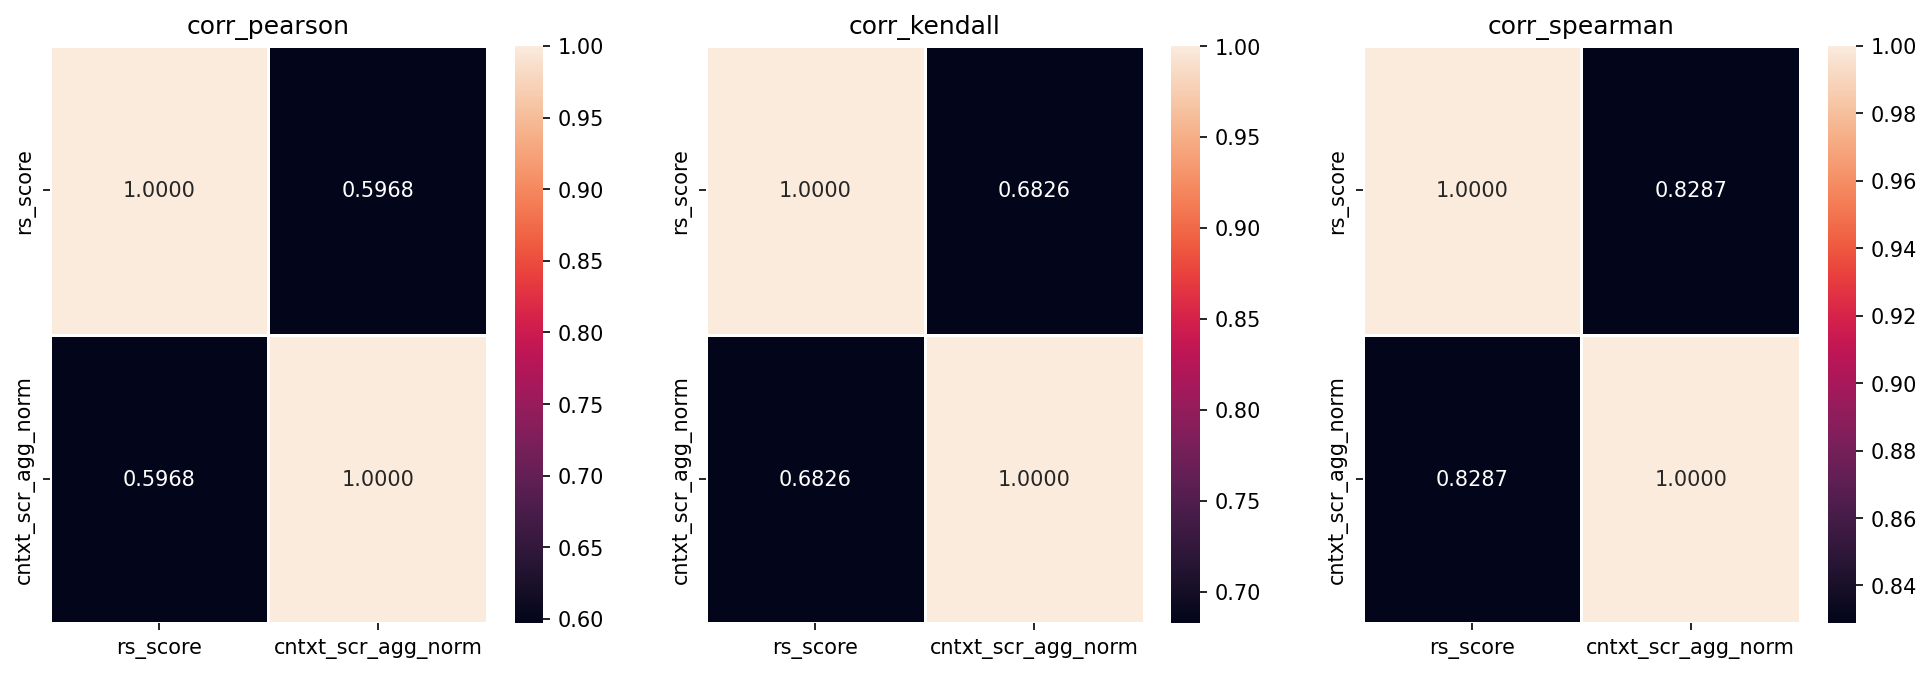

In [26]:
# Find the pearson correlations matrix -- 14 data points
corr_pearson = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'pearson')
corr_kendall = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'kendall')
corr_spearman = df_dp22_diff[['rs_score','cntxt_scr_agg_norm']].corr(method = 'spearman')


plt.figure(figsize=(16,5), dpi =150)
plt.subplot(1,3,1)
plt.title('corr_pearson')
sns.heatmap(corr_pearson,annot=True,fmt=".4f", linewidth=.5)

plt.subplot(1,3,2)
plt.title('corr_kendall')
sns.heatmap(corr_kendall,annot=True,fmt=".4f", linewidth=.5)

plt.subplot(1,3,3)
plt.title('corr_spearman')
sns.heatmap(corr_spearman,annot=True,fmt=".4f", linewidth=.5)


plt.show()

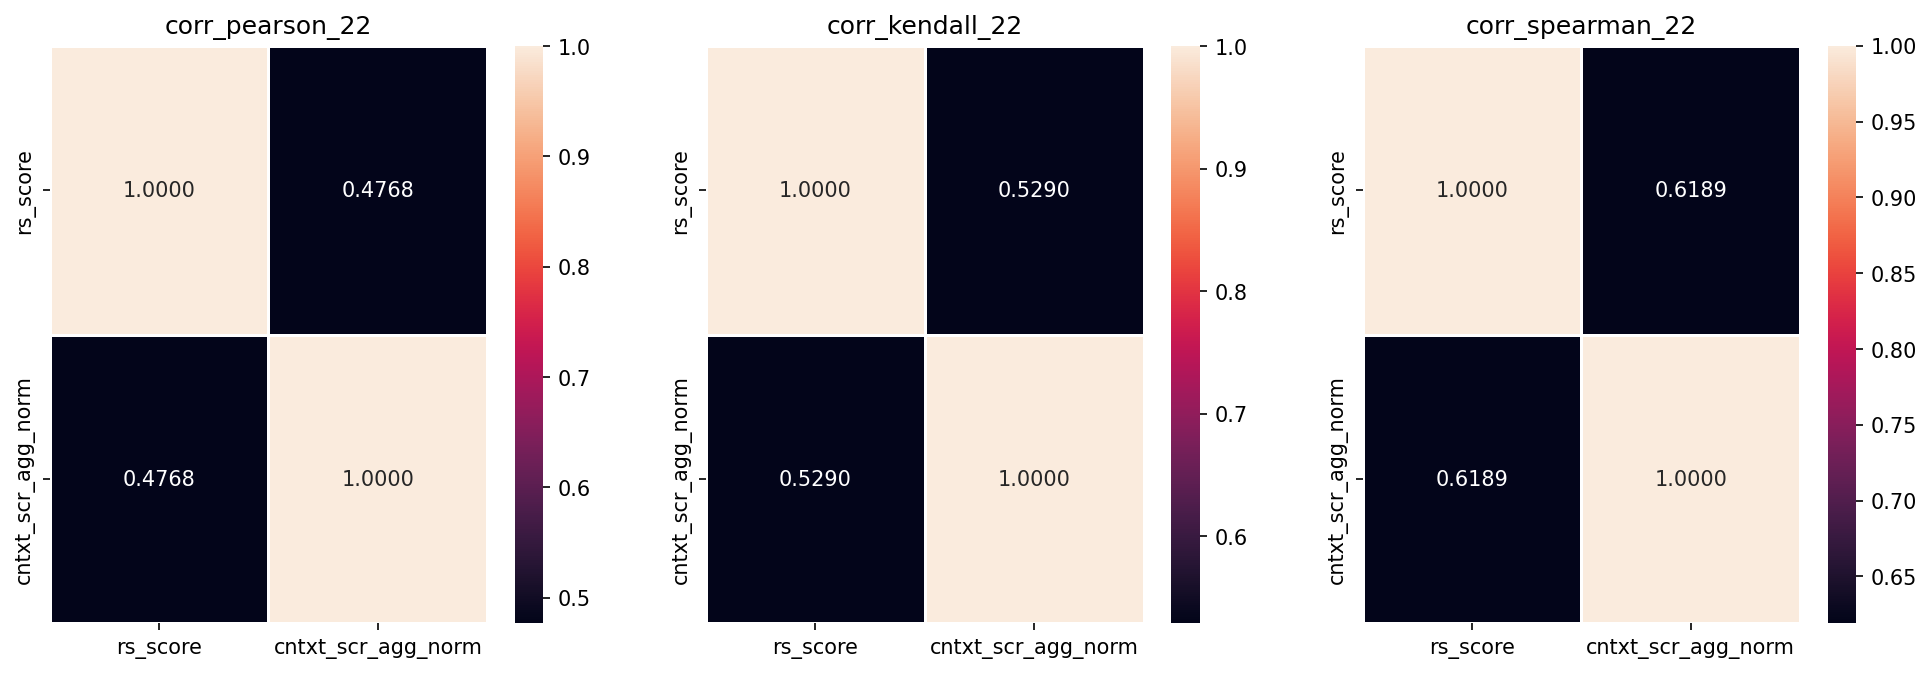

In [28]:
# df_dp22

# Find the pearson correlations matrix -- 22 data points
corr_pearson_22 = df_dp22[['rs_score','cntxt_scr_agg_norm']].corr(method = 'pearson')
corr_kendall_22 = df_dp22[['rs_score','cntxt_scr_agg_norm']].corr(method = 'kendall')
corr_spearman_22 = df_dp22[['rs_score','cntxt_scr_agg_norm']].corr(method = 'spearman')


plt.figure(figsize=(16,5), dpi =150)
plt.subplot(1,3,1)
plt.title('corr_pearson_22')
sns.heatmap(corr_pearson_22,annot=True,fmt=".4f", linewidth=.5)

plt.subplot(1,3,2)
plt.title('corr_kendall_22')
sns.heatmap(corr_kendall_22,annot=True,fmt=".4f", linewidth=.5)

plt.subplot(1,3,3)
plt.title('corr_spearman_22')
sns.heatmap(corr_spearman_22,annot=True,fmt=".4f", linewidth=.5)


plt.show()

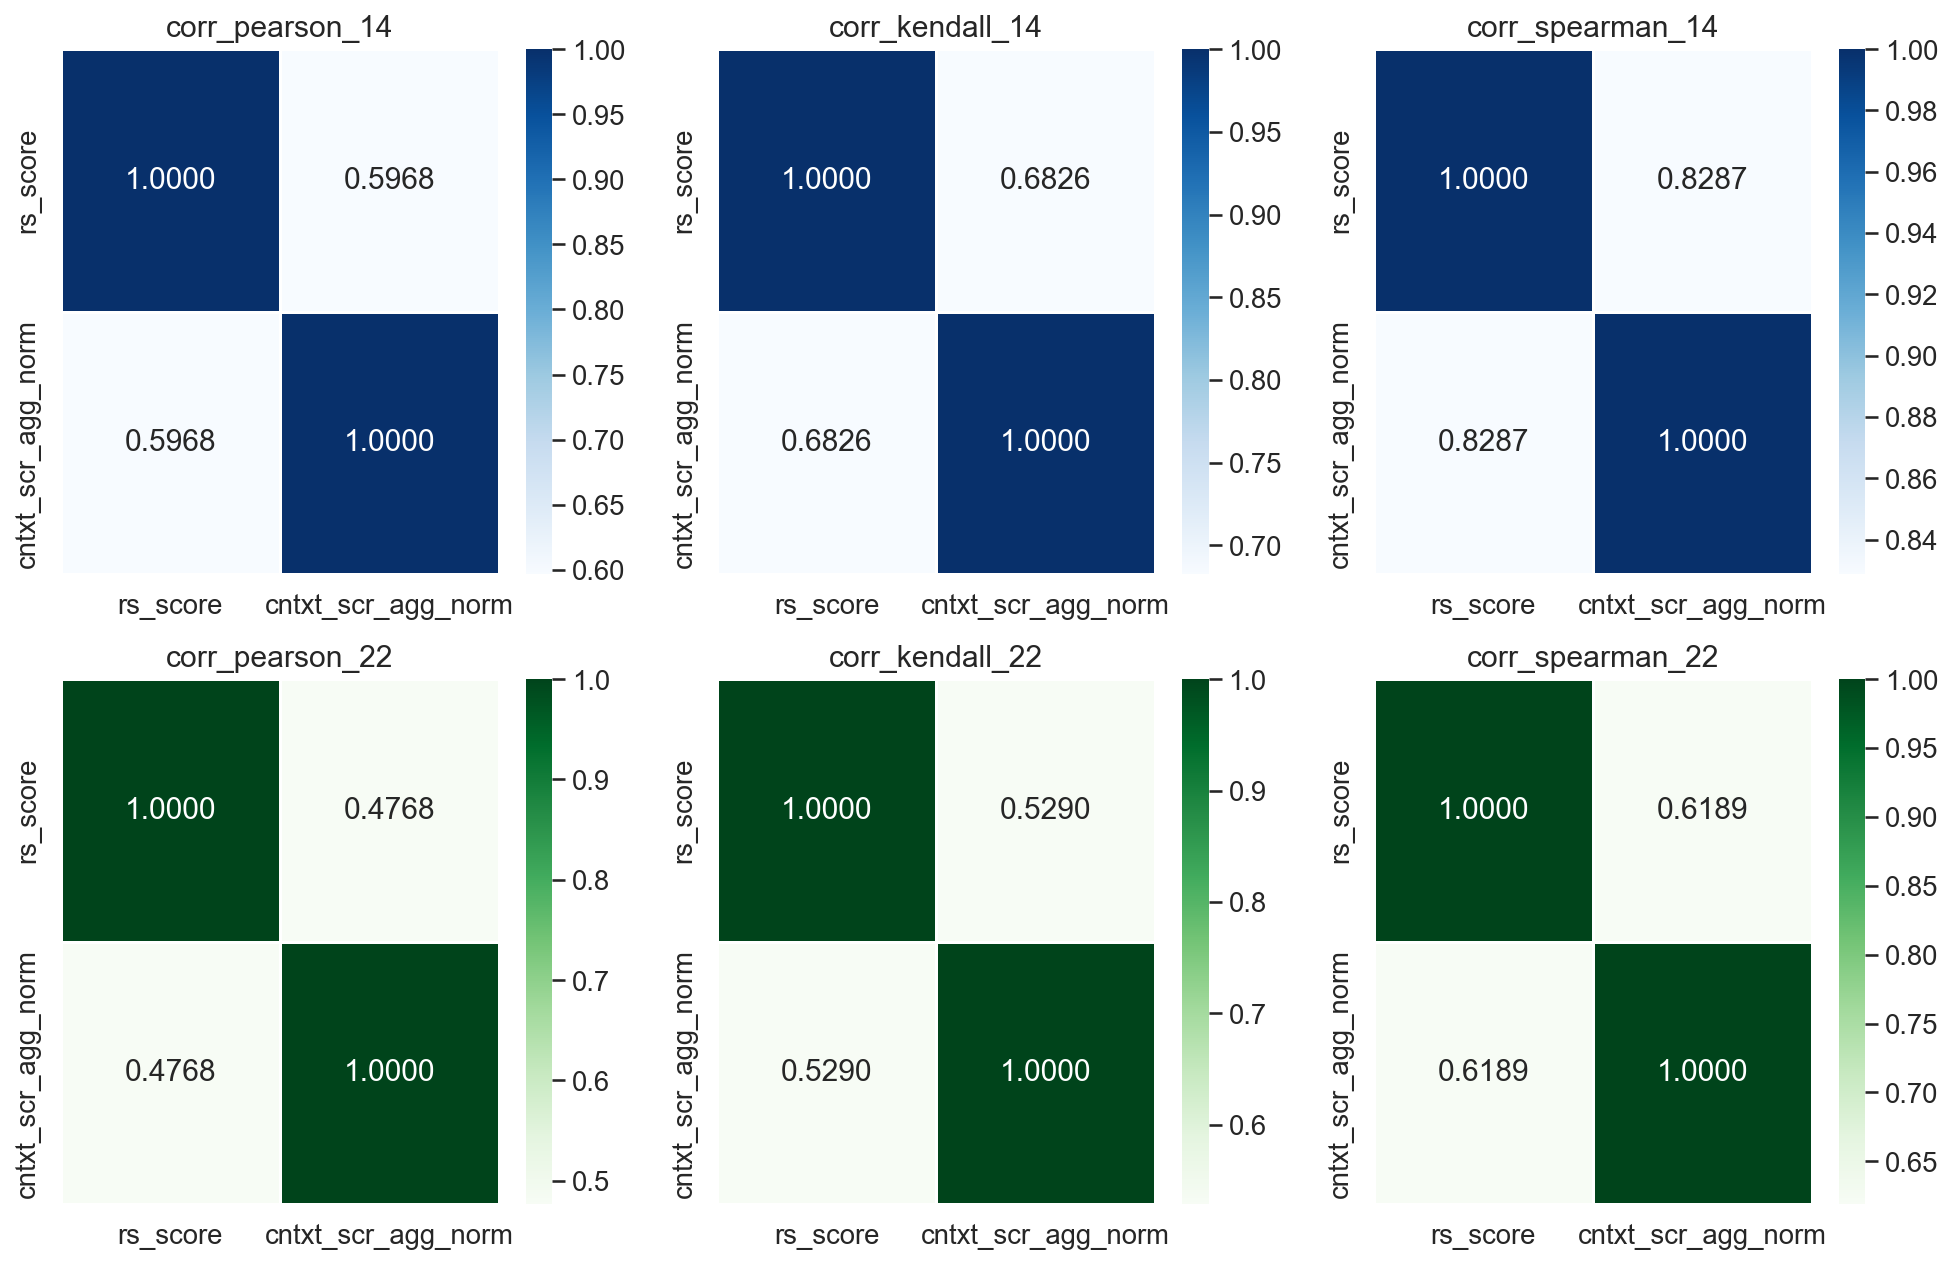

In [35]:
plt.figure(figsize=(16,10), dpi =150)

sns.set(font_scale=1.2)

plt.subplot(2,3,1)
plt.title('corr_pearson_14')
sns.heatmap(corr_pearson,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")

plt.subplot(2,3,2)
plt.title('corr_kendall_14')
sns.heatmap(corr_kendall,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")

plt.subplot(2,3,3)
plt.title('corr_spearman_14')
sns.heatmap(corr_spearman,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")
           
           

plt.subplot(2,3,4)
plt.title('corr_pearson_22')
sns.heatmap(corr_pearson_22,annot=True,fmt=".4f", linewidth=.5,cmap="Greens")

plt.subplot(2,3,5)
plt.title('corr_kendall_22')
sns.heatmap(corr_kendall_22,annot=True,fmt=".4f", linewidth=.5,cmap="Greens")

plt.subplot(2,3,6)
plt.title('corr_spearman_22')
sns.heatmap(corr_spearman_22,annot=True,fmt=".4f", linewidth=.5,cmap="Greens")


plt.show()

In [41]:
from sklearn.metrics import r2_score

r2__22 = r2_score(df_dp22['rs_score'], df_dp22['cntxt_scr_agg_norm'])
r2__14 = r2_score(df_dp22_diff['rs_score'], df_dp22_diff['cntxt_scr_agg_norm'])
print("r2 for 22 data points {:.4f}".format(r2__22))
print("r2 for 14 data points {:.4f}".format(r2__14))


r2 for 22 data points -0.2275
r2 for 14 data points 0.0743


In [49]:
import numpy as np
from scipy.stats import ttest_ind

res_22 = ttest_ind(df_dp22['rs_score'], df_dp22['cntxt_scr_agg_norm'])
res_14 = ttest_ind(df_dp22_diff['rs_score'], df_dp22_diff['cntxt_scr_agg_norm'])

print("22 data points")
print("T static: ",res_22.statistic)
print("p value : ",res_22.pvalue)

print("\n14 data points")
print("T static: ",res_14.statistic)
print("p value : ",res_14.pvalue)

22 data points
T static:  -2.663681733692345
p value :  0.010913866943216543

14 data points
T static:  -1.5182666178479283
p value :  0.14015862845592436


# AUTOMATED labelling

In [14]:
all_files = {} # filename:item, filename:item 

label_file_list = [i for i in glob.glob("Citing_Paper_contexts_lables/labelled_using_LLM/labelled/*.csv")]

label_file_list

for file in label_file_list:
#     file_key = file.replace("Citing_Paper_contexts_lables/labelled_using_LLM/labelled\","").replace(".csv","")
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_scores = {'-2':0,'-1':0,'0':0,'0.5':0,'1':0}
    
    df = pd.read_csv(file)
    
    print(file_key)
#     print(len(df))
    
    df_dataset_o_nr = df[df['label'] =='O-NR']
    df_dataset_p_nr = df[df['label'] =='P-NR']

    df_dataset_neutral = df[df['label'] =='Neutral']
    df_dataset_weak = df[df['label'] =='Weak']
    df_dataset_Strong = df[df['label'] =='Strong']

    label_scores['1'] = len(df_dataset_Strong)
#                 label = "Strong"
    label_scores['0.5'] = len(df_dataset_weak)
#                 label = "Weak"
    label_scores['0'] = len(df_dataset_neutral)
#                 label = "Neutral"
    label_scores['-1'] = len(df_dataset_Strong)
#                 label = "P-NR"
    label_scores['-2'] = len(df_dataset_Strong)
#                 label = "O-NR"  
    
    all_files.update({file_key:label_scores})
    
    print("\n")

with open("citation_context_label_summary_automated.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
RS_001_MLRC_2022_01


RS_002_MLRC_2022_02
RS_002_MLRC_2022_02


RS_003_MLRC_2022_03
RS_003_MLRC_2022_03


RS_004_MLRC_2022_04
RS_004_MLRC_2022_04


RS_005_MLRC_2022_05
RS_005_MLRC_2022_05


RS_006_MLRC_2022_06
RS_006_MLRC_2022_06


RS_008_MLRC_2022_08
RS_008_MLRC_2022_08


RS_009_MLRC_2022_09
RS_009_MLRC_2022_09


RS_010_MLRC_2022_10
RS_010_MLRC_2022_10


RS_011_MLRC_2022_11
RS_011_MLRC_2022_11


RS_012_MLRC_2022_12
RS_012_MLRC_2022_12


RS_013_MLRC_2022_13
RS_013_MLRC_2022_13


RS_014_MLRC_2022_14
RS_014_MLRC_2022_14


RS_015_MLRC_2022_15
RS_015_MLRC_2022_15


RS_016_MLRC_2022_16
RS_016_MLRC_2022_16


RS_017_MLRC_2022_17
RS_017_MLRC_2022_17


RS_018_MLRC_2022_18
RS_018_MLRC_2022_18


RS_019_MLRC_2022_19
RS_019_MLRC_2022_19


RS_020_MLRC_2022_20
RS_020_MLRC_2022_20


RS_021_MLRC_2022_21
RS_021_MLRC_2022_21


RS_022_MLRC_2022_22
RS_022_MLRC_2022_22


RS_023_MLRC_2022_23
RS_023_MLRC_2022_23


RS_024_MLRC_2022_24
RS_024_MLRC_2022_24


RS_025_MLRC_2022_25
RS_025_MLRC_20

{'RS_001_MLRC_2022_01': {'-2': 2, '-1': 2, '0': 60, '0.5': 69, '1': 2},
 'RS_002_MLRC_2022_02': {'-2': 6, '-1': 6, '0': 63, '0.5': 87, '1': 6},
 'RS_003_MLRC_2022_03': {'-2': 1, '-1': 1, '0': 23, '0.5': 10, '1': 1},
 'RS_004_MLRC_2022_04': {'-2': 0, '-1': 0, '0': 7, '0.5': 9, '1': 0},
 'RS_005_MLRC_2022_05': {'-2': 1, '-1': 1, '0': 4, '0.5': 5, '1': 1},
 'RS_006_MLRC_2022_06': {'-2': 0, '-1': 0, '0': 153, '0.5': 71, '1': 0},
 'RS_008_MLRC_2022_08': {'-2': 2, '-1': 2, '0': 13, '0.5': 6, '1': 2},
 'RS_009_MLRC_2022_09': {'-2': 0, '-1': 0, '0': 7, '0.5': 4, '1': 0},
 'RS_010_MLRC_2022_10': {'-2': 1, '-1': 1, '0': 2, '0.5': 0, '1': 1},
 'RS_011_MLRC_2022_11': {'-2': 0, '-1': 0, '0': 7, '0.5': 9, '1': 0},
 'RS_012_MLRC_2022_12': {'-2': 2, '-1': 2, '0': 34, '0.5': 19, '1': 2},
 'RS_013_MLRC_2022_13': {'-2': 1, '-1': 1, '0': 26, '0.5': 9, '1': 1},
 'RS_014_MLRC_2022_14': {'-2': 0, '-1': 0, '0': 5, '0.5': 13, '1': 0},
 'RS_015_MLRC_2022_15': {'-2': 0, '-1': 0, '0': 10, '0.5': 3, '1': 0},
 'RS_

In [3]:
%pwd

'C:\\Users\\cs_oruma001\\Lemos_OneDrive_ODU_Windows\\OneDrive - Old Dominion University\\Lemos_OneDrive_odu_windows\\Research_ODU\\R001_Fall_2023_AI_Reproducibility'

In [8]:
# R_001_Figure_011_context_score_vs_rs_score_automated_labelling


# y axis = normalized number of citation contexts [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def calculate_overall_label_score(dict_item):
    # ignoring 0 values
    total_labels_count = dict_item['-2'] + dict_item['-1'] + dict_item['0.5'] + dict_item['1'] 
    
    _minus_2 = -2 * dict_item['-2']
    _minus_1 = -1 * dict_item['-1']
    _point_5 = 0.5 * dict_item['0.5']
    _one = 1 * dict_item['1']
    
    if total_labels_count == 0:
#         ret = 0
        ret = 0 - (-2) / (1-(-2))
        ret_agg = 0
    else:
        ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        ret_agg = (_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)

    # returning the normalized value
    return ret, ret_agg

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))

already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("Citing_Paper_contexts_lables/labelled_using_LLM/labelled/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
len(already_labelled_keys_list)


df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open('citation_context_label_summary_automated.json') as f:
    data_labels = json.load(f)
    
with open('citation_context_counts_for_cited_papers.json') as f1:
    data_total = json.load(f1)
    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
        context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])

        item.update({"context_score_agg":context_score})
        item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"-2":data_labels[item['key_for_all_RS']]['-2']})
        item.update({"-1":data_labels[item['key_for_all_RS']]['-1']})
        item.update({"0":data_labels[item['key_for_all_RS']]['0']})
        item.update({"0.5":data_labels[item['key_for_all_RS']]['0.5']})
        item.update({"1":data_labels[item['key_for_all_RS']]['1']})

        item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# pprint(list_with_both_XY_009)

df_dp17 = pd.DataFrame(list_with_both_XY_009)
# df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_dp17.to_csv('automated_labelling_all_data_points.csv',index=False)
df_dp17


key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  \
0     RS_001_MLRC_2022_01      0.43           0.406667            0.802222   
1     RS_002_MLRC_2022_02      1.00           0.300000            0.766667   
2     RS_003_MLRC_2022_03      1.00           0.230769            0.743590   
3     RS_004_MLRC_2022_04      1.00           0.500000            0.833333   
4     RS_005_MLRC_2022_05      0.75           0.062500            0.687500   
..                    ...       ...                ...                 ...   
137  RS_144_ICDAR_2018_11      1.00           0.111111            0.703704   
138  RS_145_ICDAR_2018_12      0.00           0.500000            0.833333   
139  RS_147_ICDAR_2018_14      0.00           0.111111            0.703704   
140  RS_148_ICDAR_2018_15      0.00           0.000000            0.666667   
141  RS_149_ICDAR_2018_16      0.00           0.000000            0.666667   

     -2  -1    0  0.5  1  total_labels  
0     2   2   60   69  2           141  
1     6   6   63   87  6           160  
2     1   1   23   10  1            34  
3     0   0    7    9  0            16  
4     1   1    4    5  1            10  
..   ..  ..  ...  ... ..           ...  
137   2   2   25   12  2            39  
138   0   0   55   23  0            90  
139   7   7  115   42  7           173  
140   0   0    3    0  0             4  
141   0   0    2    0  0             4  

[142 rows x 10 columns]

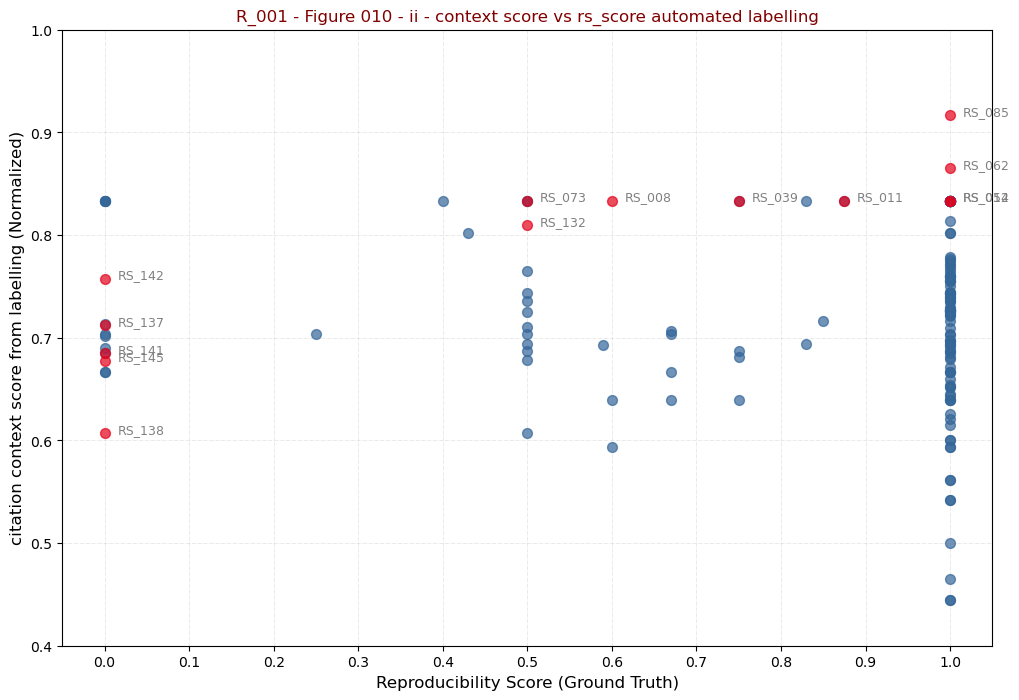

In [9]:
import matplotlib.pyplot as plt
import numpy as np

context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, context_score,color=(0.2, 0.4, 0.6, 0.7), s=50) 
p2 = plt.scatter(rs_score_14, context_score_14,color=(0.9, 0.0, 0.1, 0.7), s=50) 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
# plt.yticks(np.arange(0.1, 1.01, step=0.1))
plt.yticks(np.arange(0.4, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context score from labelling (Normalized)",fontsize=12)
plt.title("R_001 - Figure 010 - ii - context score vs rs_score automated labelling", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
[plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.savefig("plots/R_001_Figure_11_context_score_vs_rs_score_automated_labelling.png",pad_inches=1)
plt.show()

### correlation analysis for LLM based labelling all data points (142) 3/145 don't have citation contexts

```
{'pearson', 'kendall', 'spearman'}
```

In [10]:
df_dp17

key_for_all_RS  rs_score  context_score_agg  cntxt_scr_agg_norm  \
0     RS_001_MLRC_2022_01      0.43           0.406667            0.802222   
1     RS_002_MLRC_2022_02      1.00           0.300000            0.766667   
2     RS_003_MLRC_2022_03      1.00           0.230769            0.743590   
3     RS_004_MLRC_2022_04      1.00           0.500000            0.833333   
4     RS_005_MLRC_2022_05      0.75           0.062500            0.687500   
..                    ...       ...                ...                 ...   
137  RS_144_ICDAR_2018_11      1.00           0.111111            0.703704   
138  RS_145_ICDAR_2018_12      0.00           0.500000            0.833333   
139  RS_147_ICDAR_2018_14      0.00           0.111111            0.703704   
140  RS_148_ICDAR_2018_15      0.00           0.000000            0.666667   
141  RS_149_ICDAR_2018_16      0.00           0.000000            0.666667   

     -2  -1    0  0.5  1  total_labels  
0     2   2   60   69  2           141  
1     6   6   63   87  6           160  
2     1   1   23   10  1            34  
3     0   0    7    9  0            16  
4     1   1    4    5  1            10  
..   ..  ..  ...  ... ..           ...  
137   2   2   25   12  2            39  
138   0   0   55   23  0            90  
139   7   7  115   42  7           173  
140   0   0    3    0  0             4  
141   0   0    2    0  0             4  

[142 rows x 10 columns]

In [31]:
# Find the pearson correlations matrix
corr_pearson = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'pearson')
corr_kendall = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'kendall')
corr_spearman = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'spearman')
corr_pearson

rs_score  cntxt_scr_agg_norm
rs_score            1.000000           -0.088743
cntxt_scr_agg_norm -0.088743            1.000000

In [133]:
# c = np.corrcoef(df_dp22_diff['rs_score'],df_dp22_diff['cntxt_scr_agg_norm'])


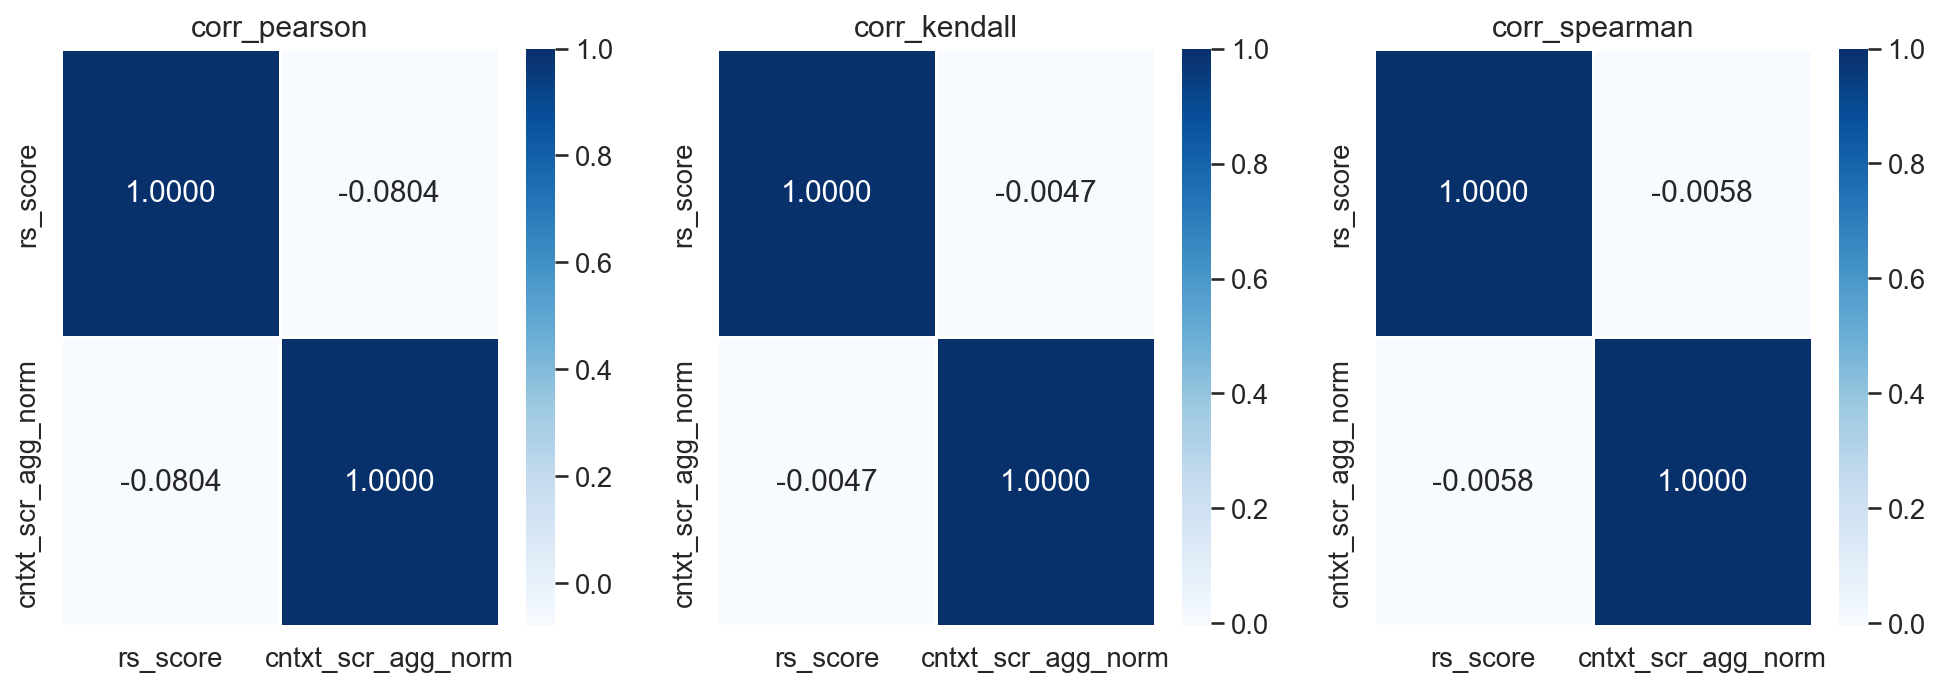

In [137]:
# Find the pearson correlations matrix -- 14 data points
corr_pearson = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'pearson')
corr_kendall = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'kendall')
corr_spearman = df_dp17[['rs_score','cntxt_scr_agg_norm']].corr(method = 'spearman')


plt.figure(figsize=(16,5), dpi =150)
plt.subplot(1,3,1)
plt.title('corr_pearson')
sns.heatmap(corr_pearson,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")

plt.subplot(1,3,2)
plt.title('corr_kendall')
sns.heatmap(corr_kendall,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")

plt.subplot(1,3,3)
plt.title('corr_spearman')
sns.heatmap(corr_spearman,annot=True,fmt=".4f", linewidth=.5,cmap="Blues")


plt.show()

In [13]:
from sklearn.metrics import r2_score

r2__142 = r2_score(df_dp17['rs_score'], df_dp17['cntxt_scr_agg_norm'])
print("r2 for 142 data points {:.4f}".format(r2__142))


r2 for 142 data points -0.2850


In [11]:
import numpy as np
from scipy.stats import ttest_ind

res_142 = ttest_ind(df_dp17['rs_score'], df_dp17['cntxt_scr_agg_norm'])

print("142 data points")
print("T static: ",res_142.statistic)
print("p value : ",res_142.pvalue)


142 data points
T static:  4.543343613723707
p value :  8.218448967370397e-06


# Sentiment Analysis - Citation 
```
model for pipeline
j-hartmann/sentiment-roberta-large-english-3-classes

@article{hartmann2021,
  title={The Power of Brand Selfies},
  author={Hartmann, Jochen and Heitmann, Mark and Schamp, Christina and Netzer, Oded},
  journal={Journal of Marketing Research}
  year={2021}
}

https://journals.sagepub.com/doi/full/10.1177/00222437211037258
https://huggingface.co/j-hartmann/sentiment-roberta-large-english-3-classes

```

In [15]:
all_files = {} # filename:item, filename:item 


label_file_list = [i for i in glob.glob("sentiment_analysis/inferences/simple_j_hartmann/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['label'] =='neutral']
    df_dataset_positive = df[df['label'] =='positive']
    df_dataset_negative = df[df['label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
# with open("sentiment_analysis/sentiment_analysis_label_summary.json", "w") as outfile: 
#     json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:0 -- n:3 -- neutral:138

RS_002_MLRC_2022_02
p:0 -- n:2 -- neutral:158

RS_003_MLRC_2022_03
p:0 -- n:0 -- neutral:34

RS_004_MLRC_2022_04
p:0 -- n:0 -- neutral:16

RS_005_MLRC_2022_05
p:0 -- n:0 -- neutral:10

RS_006_MLRC_2022_06
p:0 -- n:18 -- neutral:208

RS_008_MLRC_2022_08
p:1 -- n:2 -- neutral:18

RS_009_MLRC_2022_09
p:0 -- n:0 -- neutral:11

RS_010_MLRC_2022_10
p:0 -- n:0 -- neutral:3

RS_011_MLRC_2022_11
p:0 -- n:0 -- neutral:16

RS_012_MLRC_2022_12
p:0 -- n:0 -- neutral:56

RS_013_MLRC_2022_13
p:0 -- n:5 -- neutral:32

RS_014_MLRC_2022_14
p:0 -- n:0 -- neutral:18

RS_015_MLRC_2022_15
p:0 -- n:0 -- neutral:13

RS_016_MLRC_2022_16
p:0 -- n:0 -- neutral:16

RS_017_MLRC_2022_17
p:0 -- n:0 -- neutral:8

RS_018_MLRC_2022_18
p:0 -- n:5 -- neutral:32

RS_019_MLRC_2022_19
p:0 -- n:0 -- neutral:19

RS_020_MLRC_2022_20
p:0 -- n:0 -- neutral:26

RS_021_MLRC_2022_21
p:0 -- n:2 -- neutral:53

RS_022_MLRC_2022_22
p:0 -- n:1 -- neutral:10

RS_023_MLRC_2022_23
p:0 -- n:0 -

{'RS_001_MLRC_2022_01': {'positive': 0, 'negative': 3, 'neutral': 138},
 'RS_002_MLRC_2022_02': {'positive': 0, 'negative': 2, 'neutral': 158},
 'RS_003_MLRC_2022_03': {'positive': 0, 'negative': 0, 'neutral': 34},
 'RS_004_MLRC_2022_04': {'positive': 0, 'negative': 0, 'neutral': 16},
 'RS_005_MLRC_2022_05': {'positive': 0, 'negative': 0, 'neutral': 10},
 'RS_006_MLRC_2022_06': {'positive': 0, 'negative': 18, 'neutral': 208},
 'RS_008_MLRC_2022_08': {'positive': 1, 'negative': 2, 'neutral': 18},
 'RS_009_MLRC_2022_09': {'positive': 0, 'negative': 0, 'neutral': 11},
 'RS_010_MLRC_2022_10': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_011_MLRC_2022_11': {'positive': 0, 'negative': 0, 'neutral': 16},
 'RS_012_MLRC_2022_12': {'positive': 0, 'negative': 0, 'neutral': 56},
 'RS_013_MLRC_2022_13': {'positive': 0, 'negative': 5, 'neutral': 32},
 'RS_014_MLRC_2022_14': {'positive': 0, 'negative': 0, 'neutral': 18},
 'RS_015_MLRC_2022_15': {'positive': 0, 'negative': 0, 'neutral': 13},
 'R

In [16]:
# R_001_Figure_012_context_score_vs_sentiment_automated_labelling

# merging with rs_score

# y axis = normalized positive count [0,1]

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
[i for i in glob.glob("sentiment_analysis/inferences/simple_j_hartmann/*.csv")]

already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences/simple_j_hartmann/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
# already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/sentiment_analysis_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment = pd.DataFrame(list_with_both_XY_009)
df_sentiment
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
# df_sentiment.to_csv('sentiment_analysis/sentiment_analysis_all_data_points.csv',index=False)
# # # df_dp17


142


key_for_all_RS  rs_score  positive  negative  neutral  p_norm  \
0     RS_001_MLRC_2022_01      0.43         0         3      138     0.0   
1     RS_002_MLRC_2022_02      1.00         0         2      158     0.0   
2     RS_003_MLRC_2022_03      1.00         0         0       34     0.0   
3     RS_004_MLRC_2022_04      1.00         0         0       16     0.0   
4     RS_005_MLRC_2022_05      0.75         0         0       10     0.0   
..                    ...       ...       ...       ...      ...     ...   
137  RS_144_ICDAR_2018_11      1.00         0         0       39     0.0   
138  RS_145_ICDAR_2018_12      0.00         0         3       87     0.0   
139  RS_147_ICDAR_2018_14      0.00         0         4      169     0.0   
140  RS_148_ICDAR_2018_15      0.00         0         1        3     0.0   
141  RS_149_ICDAR_2018_16      0.00         0         1        3     0.0   

       n_norm  ntr_norm  total_contexts_count  
0    0.021277  0.978723                   141  
1    0.012500  0.987500                   160  
2    0.000000  1.000000                    34  
3    0.000000  1.000000                    16  
4    0.000000  1.000000                    10  
..        ...       ...                   ...  
137  0.000000  1.000000                    39  
138  0.033333  0.966667                    90  
139  0.023121  0.976879                   173  
140  0.250000  0.750000                     4  
141  0.250000  0.750000                     4  

[142 rows x 9 columns]

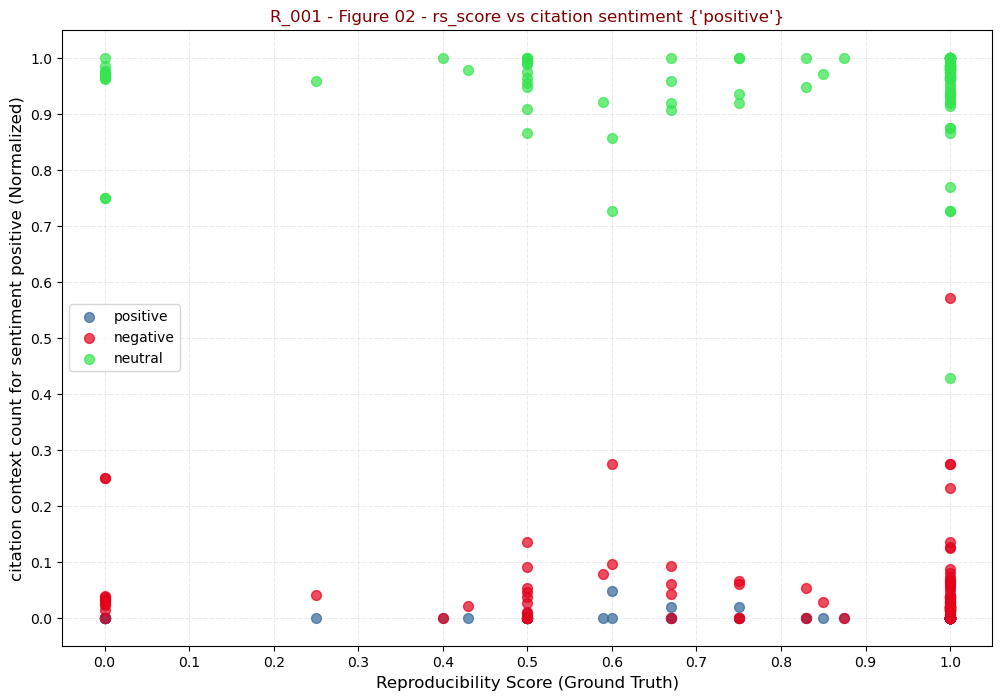

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment {'positive'} (Normalized)",fontsize=12)
plt.title("R_001 - Figure 02 - rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_12_rs_score_vs_citation_sentiment.png",pad_inches=1)
plt.show()

In [14]:
df_sentiment

NameError: name 'df_sentiment' is not defined

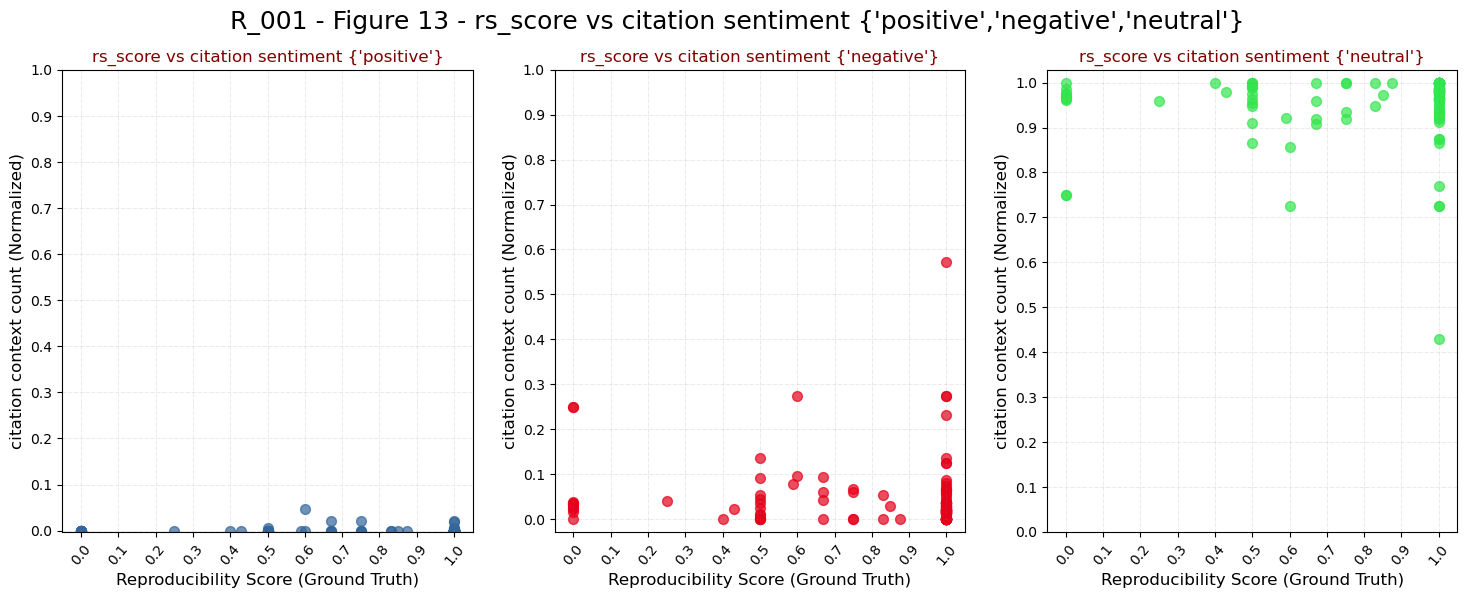

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 13 - rs_score vs citation sentiment {'positive','negative','neutral'}",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.savefig("plots/R_001_Figure_13_rs_score_vs_citation_sentiment.png",pad_inches=1)
plt.show()

# enitre citation context behaviour over different rs_scores 

In [264]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_all_data_points.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
    item.update({"rs_score":i})



#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

# with open("sentiment_analysis/sentiment_analysis_count_summary.json", "w") as outfile: 
#     json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral  p_norm  \
127  RS_134_ICDAR_2018_01       0.0         0        12      470     0.0   
128  RS_135_ICDAR_2018_02       0.0         0         2       53     0.0   
130  RS_137_ICDAR_2018_04       0.0         0         2      135     0.0   
131  RS_138_ICDAR_2018_05       0.0         0         4      120     0.0   
133  RS_140_ICDAR_2018_07       0.0         0         0       22     0.0   
134  RS_141_ICDAR_2018_08       0.0         0         2       66     0.0   
135  RS_142_ICDAR_2018_09       0.0         0         5      124     0.0   
138  RS_145_ICDAR_2018_12       0.0         0         3       87     0.0   
139  RS_147_ICDAR_2018_14       0.0         0         4      169     0.0   
140  RS_148_ICDAR_2018_15       0.0         0         1        3     0.0   
141  RS_149_ICDAR_2018_16       0.0         0         1        3     0.0   

       n_norm  ntr_norm  total_contexts_count  
127  0.024896  0.975104                

{'df_sentiment_00': {'number_of_cited_papers': 11,
  'total_positives': 0,
  'total_negatives': 36,
  'total_neutrals': 1252,
  'rs_score': 0},
 'df_sentiment_01': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'total_neutrals': 0,
  'rs_score': 1},
 'df_sentiment_02': {'number_of_cited_papers': 1,
  'total_positives': 0,
  'total_negatives': 2,
  'total_neutrals': 47,
  'rs_score': 2},
 'df_sentiment_03': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'total_neutrals': 0,
  'rs_score': 3},
 'df_sentiment_04': {'number_of_cited_papers': 2,
  'total_positives': 0,
  'total_negatives': 3,
  'total_neutrals': 149,
  'rs_score': 4},
 'df_sentiment_05': {'number_of_cited_papers': 13,
  'total_positives': 1,
  'total_negatives': 59,
  'total_neutrals': 1920,
  'rs_score': 5},
 'df_sentiment_06': {'number_of_cited_papers': 6,
  'total_positives': 2,
  'total_negatives': 39,
  'total_neutrals': 293,
  'rs_score': 6},
 'df_sentim

In [268]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

20

In [269]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

1029

In [270]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

41042

In [271]:
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

df_citation_context_behaviour
# print(df_citation_context_behaviour)

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11                0               36   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1                0                2   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2                0                3   
5   df_sentiment_05                      13                1               59   
6   df_sentiment_06                       6                2               39   
7   df_sentiment_07                       4                1                7   
8   df_sentiment_08                       4                0                7   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                     101               16              876   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0             1252         0             0.000000             3.610918   
1                0         1             0.000000             0.000000   
2               47         2             0.000000             1.098612   
3                0         3             0.000000             0.000000   
4              149         4             0.000000             1.386294   
5             1920         5             0.693147             4.094345   
6              293         6             1.098612             3.688879   
7              132         7             0.693147             2.079442   
8              170         8             0.000000             2.079442   
9                0         9             0.000000             0.000000   
10           37079        10             2.833213             6.776507   

    total_neutrals_log  
0             7.133296  
1             0.000000  
2             3.871201  
3             0.000000  
4             5.010635  
5             7.560601  
6             5.683580  
7             4.890349  
8             5.141664  
9             0.000000  
10           10.520833

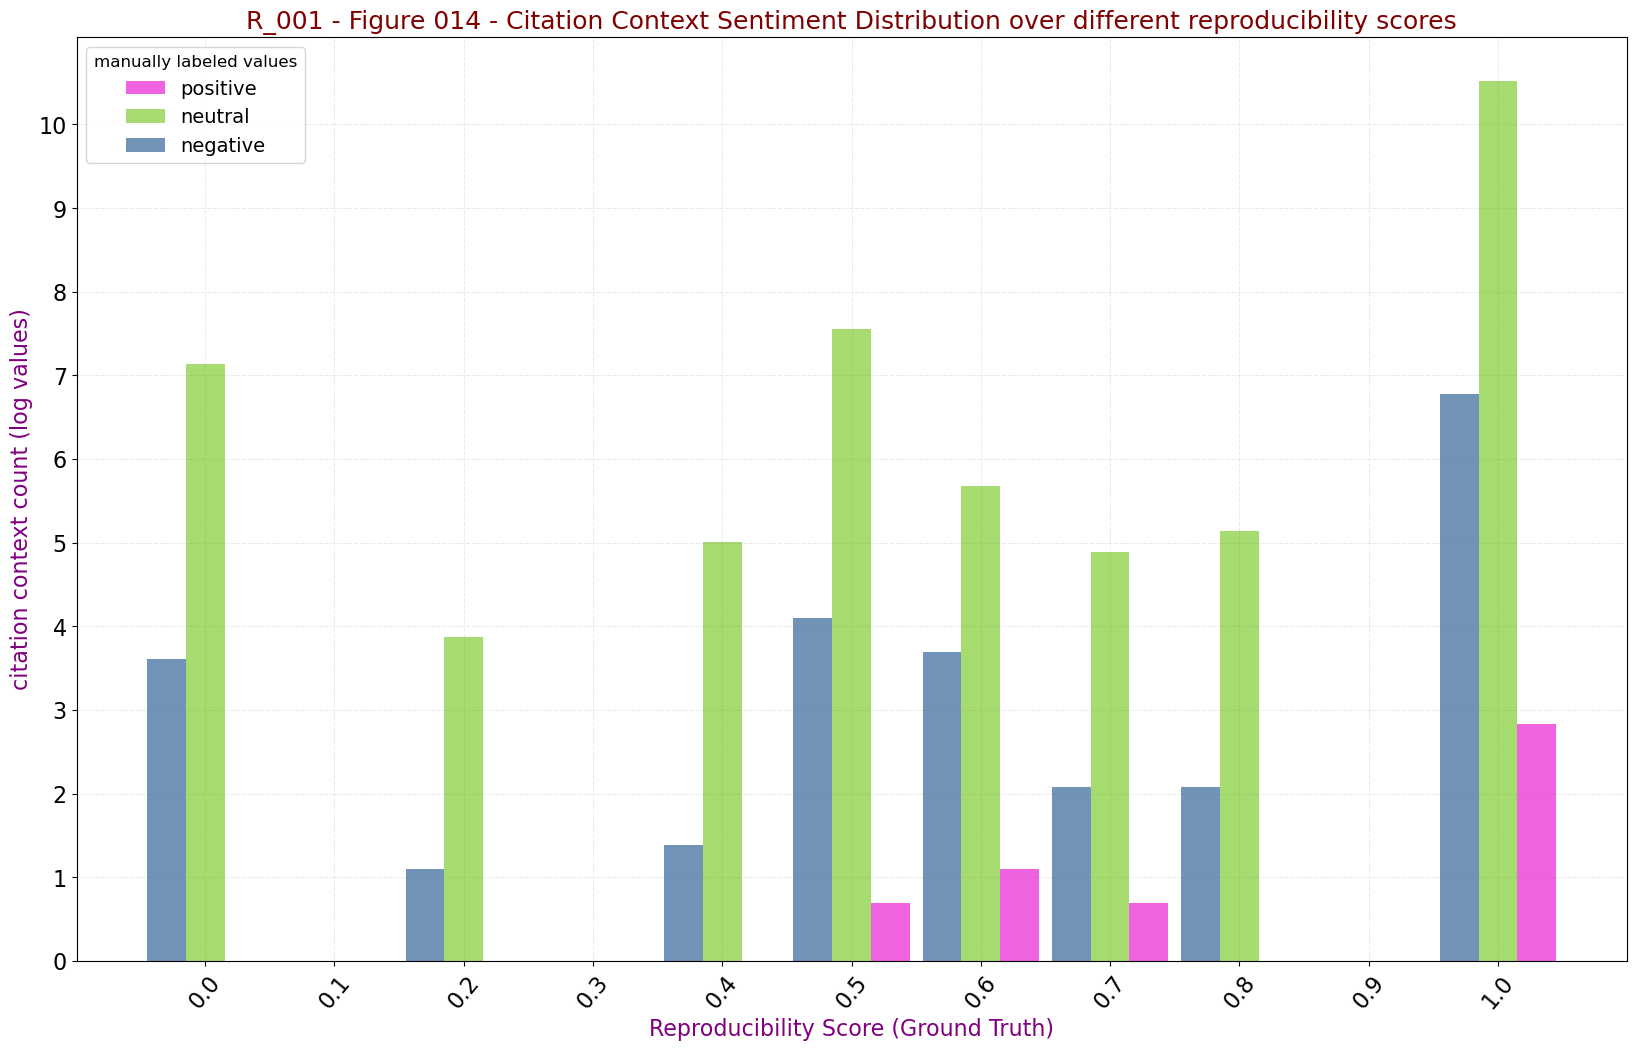

In [273]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour['total_positives_log']
negatives = df_citation_context_behaviour['total_negatives_log']
neutrals = df_citation_context_behaviour['total_neutrals_log']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)

plt.bar(X_axis + 0.03, positives, label = 'positive', color=colors['purple'], width = 0.03) 
    
plt.bar(X_axis, neutrals, color=colors['green'], label = 'neutral', width = 0.03) 
plt.bar(X_axis - 0.03 , negatives, label = 'negative', color=colors['blue'], width = 0.03) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 11, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
plt.ylabel(f"citation context count (log values)",fontsize=16,color='purple')

plt.title("R_001 - Figure 014 - Citation Context Sentiment Distribution over different reproducibility scores",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="manually labeled values",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_014_Citation_Context_Sentiment_Distribution_different_rs_scores.png",pad_inches=2)


plt.show() 

# using 5 models - citation context sentitment analysis

In [168]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['majority_vote'] =='neutral']
    df_dataset_positive = df[df['majority_vote'] =='positive']
    df_dataset_negative = df[df['majority_vote'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
with open("sentiment_analysis/5_models_majority_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:0 -- n:0 -- neutral:33

RS_002_MLRC_2022_02
p:8 -- n:0 -- neutral:69

RS_003_MLRC_2022_03
p:0 -- n:0 -- neutral:5

RS_004_MLRC_2022_04
p:0 -- n:0 -- neutral:6

RS_005_MLRC_2022_05
p:0 -- n:0 -- neutral:3

RS_006_MLRC_2022_06
p:4 -- n:1 -- neutral:47

RS_008_MLRC_2022_08
p:0 -- n:0 -- neutral:4

RS_009_MLRC_2022_09
p:0 -- n:0 -- neutral:1

RS_011_MLRC_2022_11
p:0 -- n:0 -- neutral:6

RS_012_MLRC_2022_12
p:0 -- n:0 -- neutral:10

RS_013_MLRC_2022_13
p:0 -- n:0 -- neutral:9

RS_014_MLRC_2022_14
p:0 -- n:0 -- neutral:15

RS_016_MLRC_2022_16
p:0 -- n:0 -- neutral:6

RS_017_MLRC_2022_17
p:0 -- n:1 -- neutral:2

RS_018_MLRC_2022_18
p:0 -- n:0 -- neutral:9

RS_019_MLRC_2022_19
p:1 -- n:0 -- neutral:3

RS_020_MLRC_2022_20
p:0 -- n:0 -- neutral:1

RS_021_MLRC_2022_21
p:0 -- n:0 -- neutral:8

RS_022_MLRC_2022_22
p:0 -- n:0 -- neutral:2

RS_023_MLRC_2022_23
p:1 -- n:0 -- neutral:4

RS_024_MLRC_2022_24
p:0 -- n:0 -- neutral:6

RS_025_MLRC_2022_25
p:0 -- n:0 -- neutral:1

RS_02

{'RS_001_MLRC_2022_01': {'positive': 0, 'negative': 0, 'neutral': 33},
 'RS_002_MLRC_2022_02': {'positive': 8, 'negative': 0, 'neutral': 69},
 'RS_003_MLRC_2022_03': {'positive': 0, 'negative': 0, 'neutral': 5},
 'RS_004_MLRC_2022_04': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_005_MLRC_2022_05': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_006_MLRC_2022_06': {'positive': 4, 'negative': 1, 'neutral': 47},
 'RS_008_MLRC_2022_08': {'positive': 0, 'negative': 0, 'neutral': 4},
 'RS_009_MLRC_2022_09': {'positive': 0, 'negative': 0, 'neutral': 1},
 'RS_011_MLRC_2022_11': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_012_MLRC_2022_12': {'positive': 0, 'negative': 0, 'neutral': 10},
 'RS_013_MLRC_2022_13': {'positive': 0, 'negative': 0, 'neutral': 9},
 'RS_014_MLRC_2022_14': {'positive': 0, 'negative': 0, 'neutral': 15},
 'RS_016_MLRC_2022_16': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_017_MLRC_2022_17': {'positive': 0, 'negative': 1, 'neutral': 2},
 'RS_018_MLRC_2

In [170]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/5_models_majority_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_5_m = pd.DataFrame(list_with_both_XY_009)
df_sentiment_5_m
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_5_m.to_csv('sentiment_analysis/sentiment_analysis_from_5_modles_adp.csv',index=False)
# # # df_dp17
df_sentiment_5_m

134


key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
0     RS_001_MLRC_2022_01      0.43         0         0       33  0.000000   
1     RS_002_MLRC_2022_02      1.00         8         0       69  0.103896   
2     RS_003_MLRC_2022_03      1.00         0         0        5  0.000000   
3     RS_004_MLRC_2022_04      1.00         0         0        6  0.000000   
4     RS_005_MLRC_2022_05      0.75         0         0        3  0.000000   
..                    ...       ...       ...       ...      ...       ...   
129  RS_144_ICDAR_2018_11      1.00         0         0        9  0.000000   
130  RS_145_ICDAR_2018_12      0.00         2         2       16  0.100000   
131  RS_147_ICDAR_2018_14      0.00         4         1       43  0.083333   
132  RS_148_ICDAR_2018_15      0.00         0         1        0  0.000000   
133  RS_149_ICDAR_2018_16      0.00         0         1        0  0.000000   

       n_norm  ntr_norm  total_contexts_count  
0    0.000000  1.000000                    33  
1    0.000000  0.896104                    77  
2    0.000000  1.000000                     5  
3    0.000000  1.000000                     6  
4    0.000000  1.000000                     3  
..        ...       ...                   ...  
129  0.000000  1.000000                     9  
130  0.100000  0.800000                    20  
131  0.020833  0.895833                    48  
132  1.000000  0.000000                     1  
133  1.000000  0.000000                     1  

[134 rows x 9 columns]

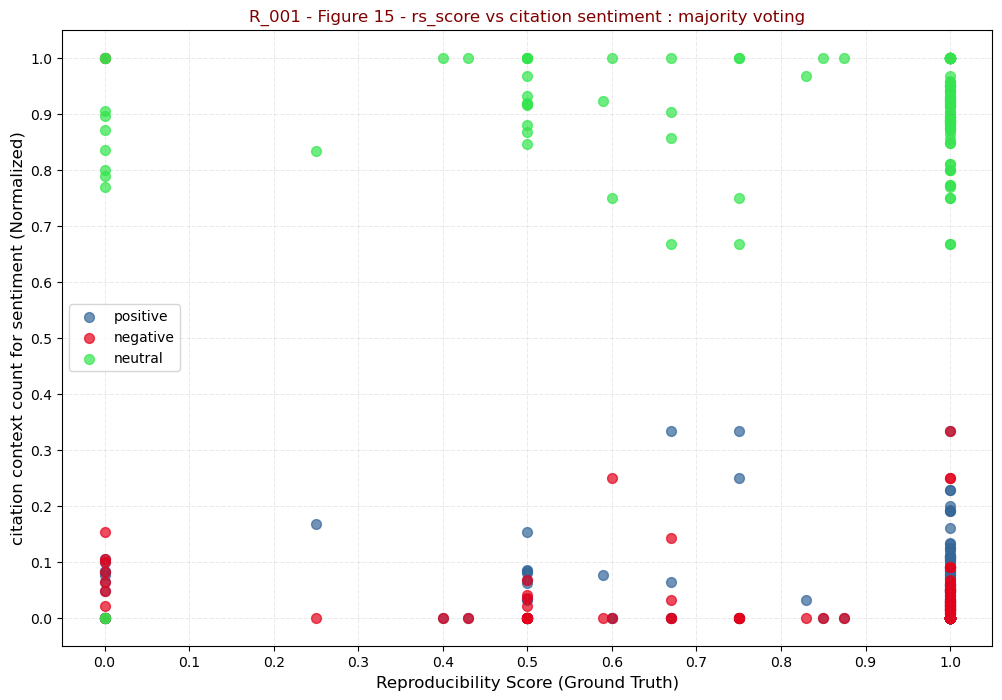

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 15 - rs_score vs citation sentiment : majority voting", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_15_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

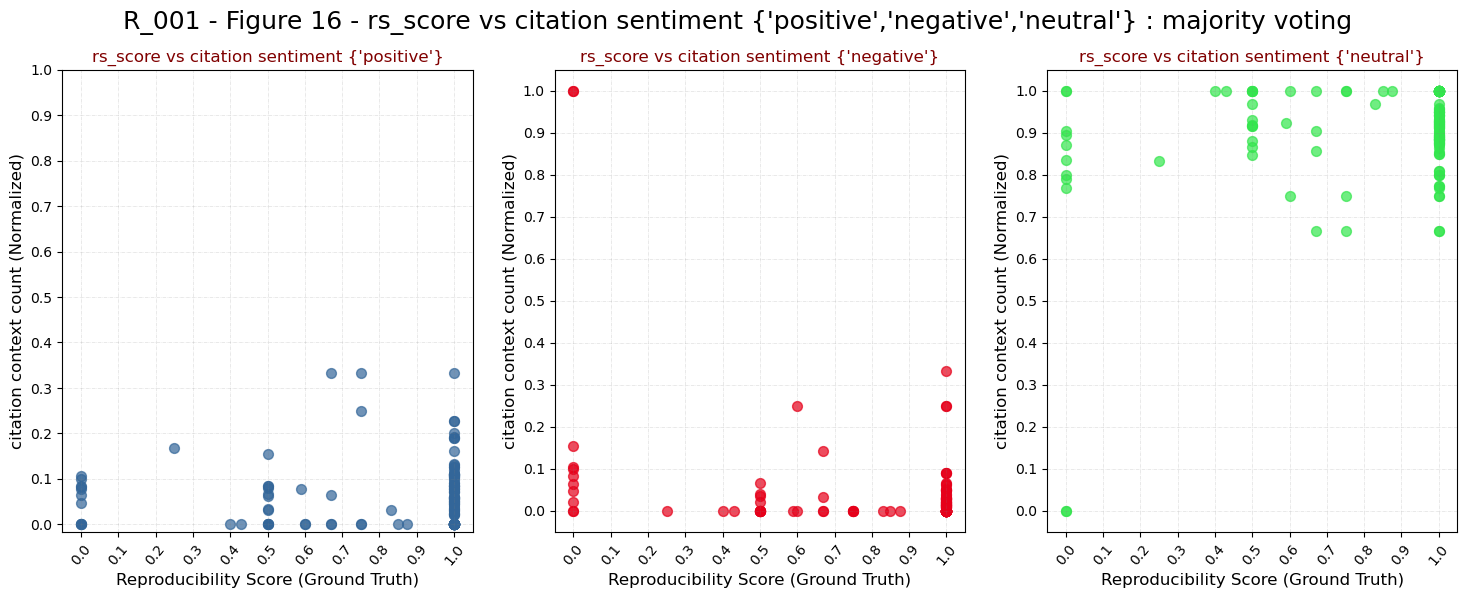

In [174]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.savefig("plots/R_001_Figure_16_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

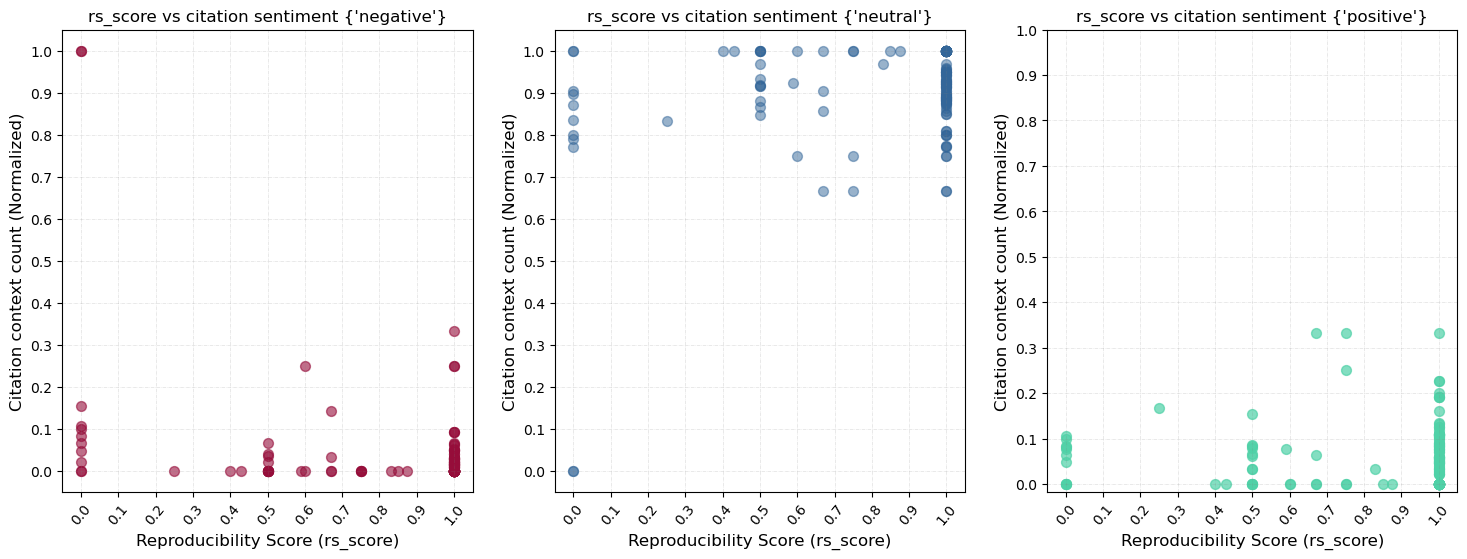

In [222]:

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(133)
p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(131)
p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p3 = plt.scatter(rs_score, neutral_norm,color=colors['blue'], s=50) 
# p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50) 
# p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.show()

# enitre citation context behaviour over different rs_scores 

In [175]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_5_modles_adp.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
    item.update({"rs_score":i})



#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_5_models_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
119  RS_134_ICDAR_2018_01       0.0         6         6       61  0.082192   
120  RS_135_ICDAR_2018_02       0.0         0         0        4  0.000000   
122  RS_137_ICDAR_2018_04       0.0         1         1       19  0.047619   
123  RS_138_ICDAR_2018_05       0.0         4         4       30  0.105263   
125  RS_140_ICDAR_2018_07       0.0         0         0        3  0.000000   
126  RS_141_ICDAR_2018_08       0.0         1         2       10  0.076923   
127  RS_142_ICDAR_2018_09       0.0         2         2       27  0.064516   
130  RS_145_ICDAR_2018_12       0.0         2         2       16  0.100000   
131  RS_147_ICDAR_2018_14       0.0         4         1       43  0.083333   
132  RS_148_ICDAR_2018_15       0.0         0         1        0  0.000000   
133  RS_149_ICDAR_2018_16       0.0         0         1        0  0.000000   

       n_norm  ntr_norm  total_contexts_count  
119  0.082192  

In [176]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

991

In [177]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

244

In [178]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

11207

In [179]:
# 5 models
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

df_citation_context_behaviour

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11               20               20   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1                1                0   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2                0                0   
5   df_sentiment_05                      13               27               15   
6   df_sentiment_06                       6                3                5   
7   df_sentiment_07                       4                2                0   
8   df_sentiment_08                       3                1                0   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                      94              937              204   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0              213         0             3.044522             3.044522   
1                0         1             0.000000             0.000000   
2                5         2             0.693147             0.000000   
3                0         3             0.000000             0.000000   
4               34         4             0.000000             0.000000   
5              543         5             3.332205             2.772589   
6               50         6             1.386294             1.791759   
7               26         7             1.098612             0.000000   
8               40         8             0.693147             0.000000   
9                0         9             0.000000             0.000000   
10           10296        10             6.843750             5.323010   

    total_neutrals_log  
0             5.365976  
1             0.000000  
2             1.791759  
3             0.000000  
4             3.555348  
5             6.298949  
6             3.931826  
7             3.295837  
8             3.713572  
9             0.000000  
10            9.239608

In [181]:
# df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
# df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
# df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

# df_citation_context_behaviour
# # print(df_citation_context_behaviour)

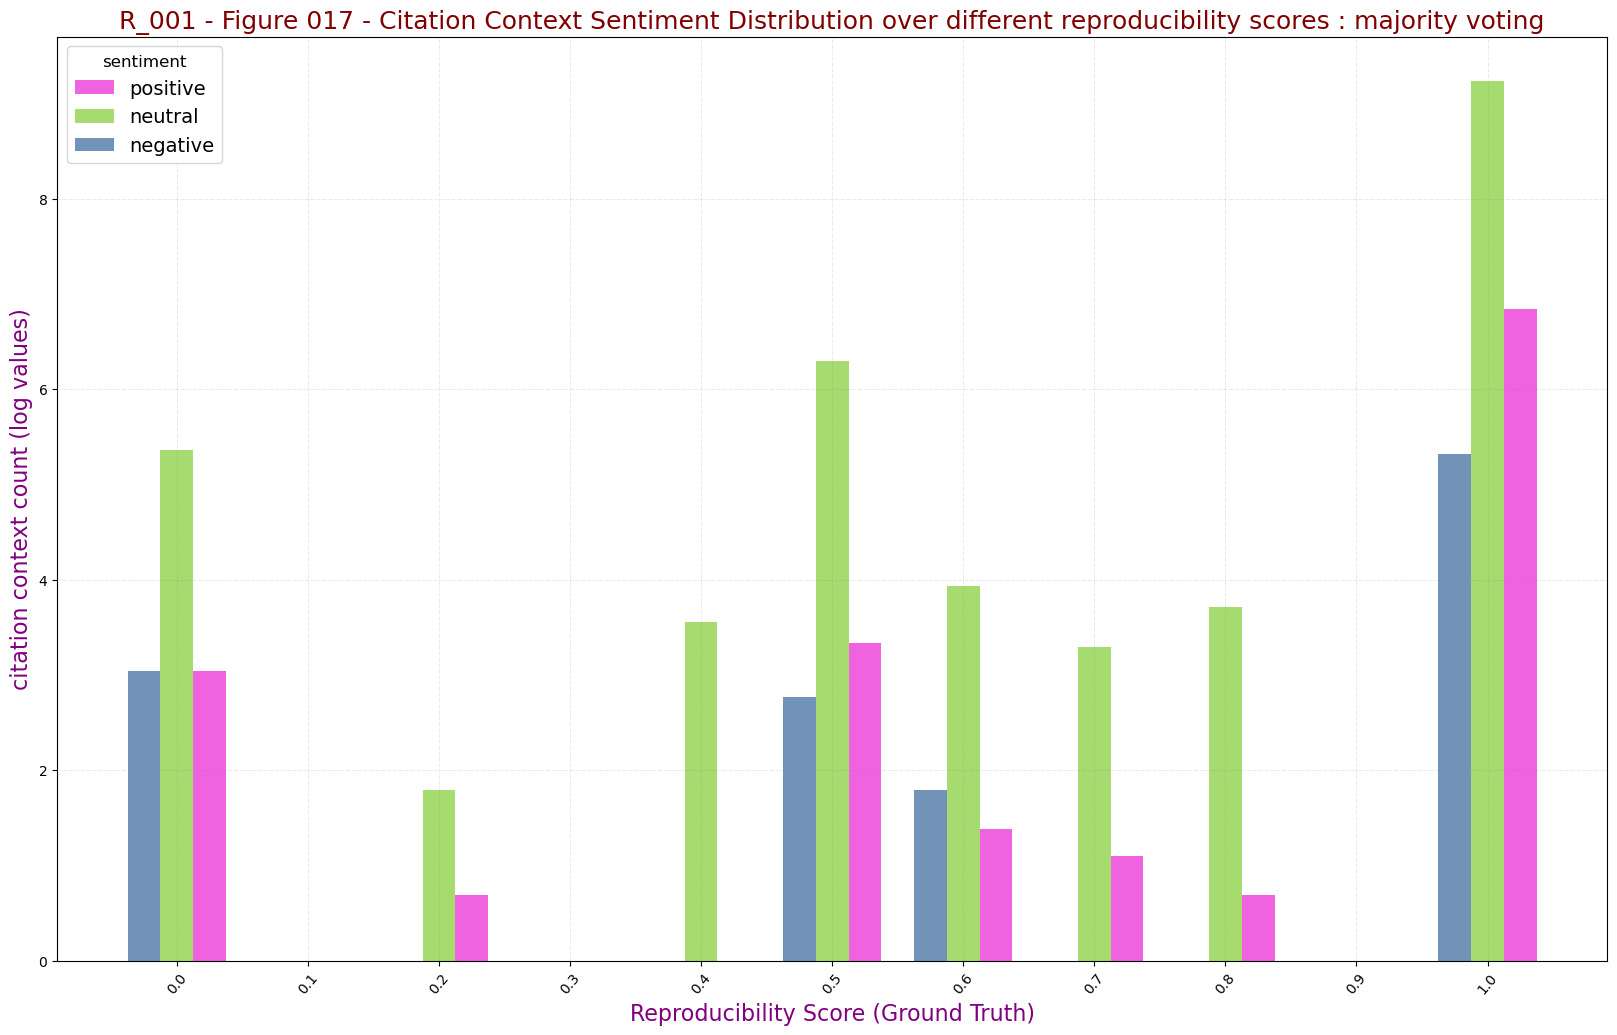

In [187]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour['total_positives_log']
negatives = df_citation_context_behaviour['total_negatives_log']
neutrals = df_citation_context_behaviour['total_neutrals_log']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)

plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025) 
    
plt.bar(X_axis, neutrals, color=colors['green'], label = 'neutral', width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color=colors['blue'], width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
# plt.yticks(np.arange(0, Y_MAX+1, step=10))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
plt.ylabel(f"citation context count (log values)",fontsize=16,color='purple')

plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="sentiment",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

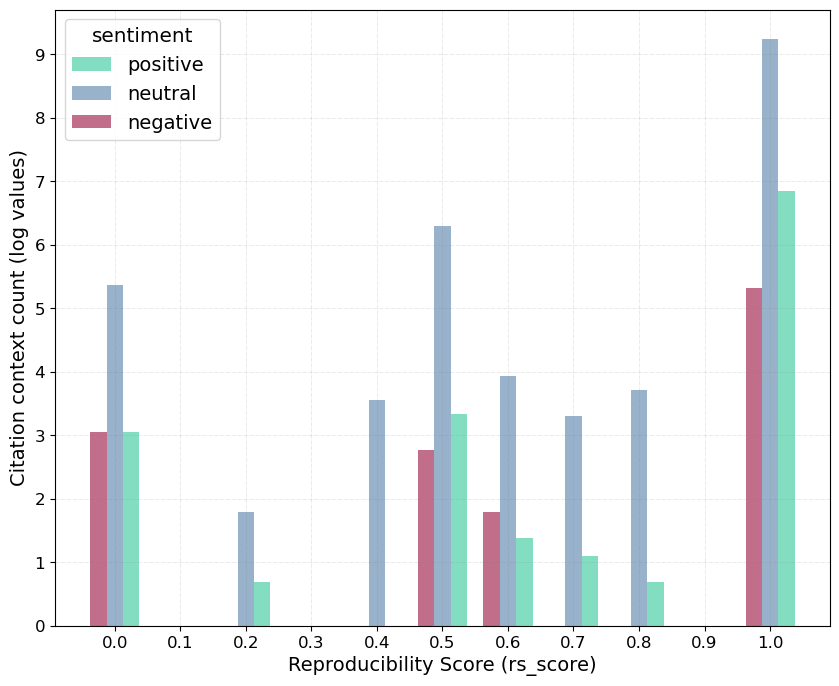

In [226]:
# figure 17 for paper


keys_ = df_citation_context_behaviour['rs_score']
keys_

positives = df_citation_context_behaviour['total_positives_log']
negatives = df_citation_context_behaviour['total_negatives_log']
neutrals = df_citation_context_behaviour['total_neutrals_log']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)

# plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025)     
plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['green'], width = 0.025)     
plt.bar(X_axis, neutrals, color=colors['blue'], label = 'neutral', width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color=colors['red'], width = 0.025) 

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 10, step=1),fontsize=12)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
plt.xlabel("Reproducibility Score (rs_score)",fontsize=14)
plt.ylabel(f"Citation context count (log values)",fontsize=14)

# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

# using single model j-hartmann - citation context sentitment analysis - for only the reproducibility related citation contexts (12442)

In [247]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['m1_label'] =='neutral']
    df_dataset_positive = df[df['m1_label'] =='positive']
    df_dataset_negative = df[df['m1_label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
with open("sentiment_analysis/single_model_rep_related_only_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:0 -- n:0 -- neutral:33

RS_002_MLRC_2022_02
p:0 -- n:0 -- neutral:77

RS_003_MLRC_2022_03
p:0 -- n:0 -- neutral:5

RS_004_MLRC_2022_04
p:0 -- n:0 -- neutral:6

RS_005_MLRC_2022_05
p:0 -- n:0 -- neutral:3

RS_006_MLRC_2022_06
p:0 -- n:1 -- neutral:51

RS_008_MLRC_2022_08
p:0 -- n:0 -- neutral:4

RS_009_MLRC_2022_09
p:0 -- n:0 -- neutral:1

RS_011_MLRC_2022_11
p:0 -- n:0 -- neutral:6

RS_012_MLRC_2022_12
p:0 -- n:0 -- neutral:10

RS_013_MLRC_2022_13
p:0 -- n:0 -- neutral:9

RS_014_MLRC_2022_14
p:0 -- n:0 -- neutral:15

RS_016_MLRC_2022_16
p:0 -- n:0 -- neutral:6

RS_017_MLRC_2022_17
p:0 -- n:0 -- neutral:3

RS_018_MLRC_2022_18
p:0 -- n:0 -- neutral:9

RS_019_MLRC_2022_19
p:0 -- n:0 -- neutral:4

RS_020_MLRC_2022_20
p:0 -- n:0 -- neutral:1

RS_021_MLRC_2022_21
p:0 -- n:0 -- neutral:8

RS_022_MLRC_2022_22
p:0 -- n:0 -- neutral:2

RS_023_MLRC_2022_23
p:0 -- n:0 -- neutral:5

RS_024_MLRC_2022_24
p:0 -- n:0 -- neutral:6

RS_025_MLRC_2022_25
p:0 -- n:0 -- neutral:1

RS_02

{'RS_001_MLRC_2022_01': {'positive': 0, 'negative': 0, 'neutral': 33},
 'RS_002_MLRC_2022_02': {'positive': 0, 'negative': 0, 'neutral': 77},
 'RS_003_MLRC_2022_03': {'positive': 0, 'negative': 0, 'neutral': 5},
 'RS_004_MLRC_2022_04': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_005_MLRC_2022_05': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_006_MLRC_2022_06': {'positive': 0, 'negative': 1, 'neutral': 51},
 'RS_008_MLRC_2022_08': {'positive': 0, 'negative': 0, 'neutral': 4},
 'RS_009_MLRC_2022_09': {'positive': 0, 'negative': 0, 'neutral': 1},
 'RS_011_MLRC_2022_11': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_012_MLRC_2022_12': {'positive': 0, 'negative': 0, 'neutral': 10},
 'RS_013_MLRC_2022_13': {'positive': 0, 'negative': 0, 'neutral': 9},
 'RS_014_MLRC_2022_14': {'positive': 0, 'negative': 0, 'neutral': 15},
 'RS_016_MLRC_2022_16': {'positive': 0, 'negative': 0, 'neutral': 6},
 'RS_017_MLRC_2022_17': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_018_MLRC_2

In [249]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/single_model_rep_related_only_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_single_model_related_only.csv',index=False)
# # # df_dp17
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral']))


# model_1 --> there are no positives at all for all 134 datapoints
# positive : 0
# negative : 148
# neutral : 12294

# model_2 --> for all 134 cited papers
# positive : 1942
# negative : 184
# neutral : 10316

# model_3 --> for all 134 cited papers
# positive : 1487
# negative : 210
# neutral : 10745

# model_4 --> for all 134 cited papers
# positive : 1305
# negative : 369
# neutral : 10768

# model_5 --> for all 134 cited papers
# positive : 1402
# negative : 2484
# neutral : 8556

134
positive : 0
negative : 148
neutral : 12294


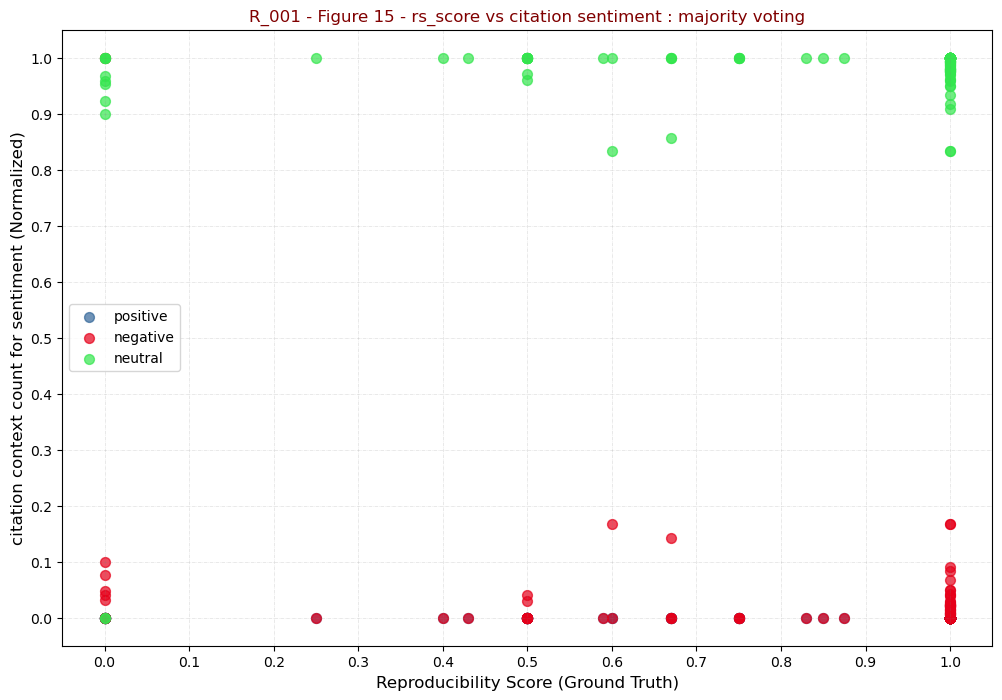

In [250]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 15 - rs_score vs citation sentiment : majority voting", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
# plt.savefig("plots/R_001_Figure_15_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

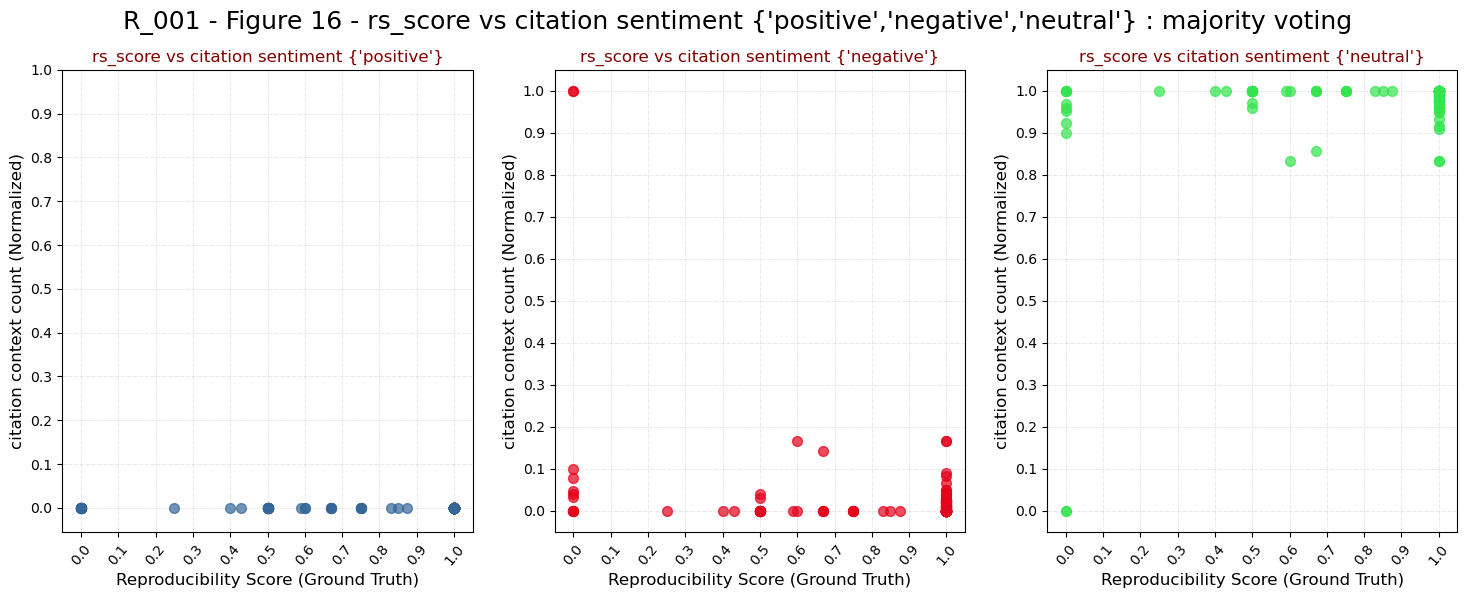

In [251]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

# plt.savefig("plots/R_001_Figure_16_rs_score_vs_citation_sentiment_majority_voting.png",pad_inches=1)
plt.show()

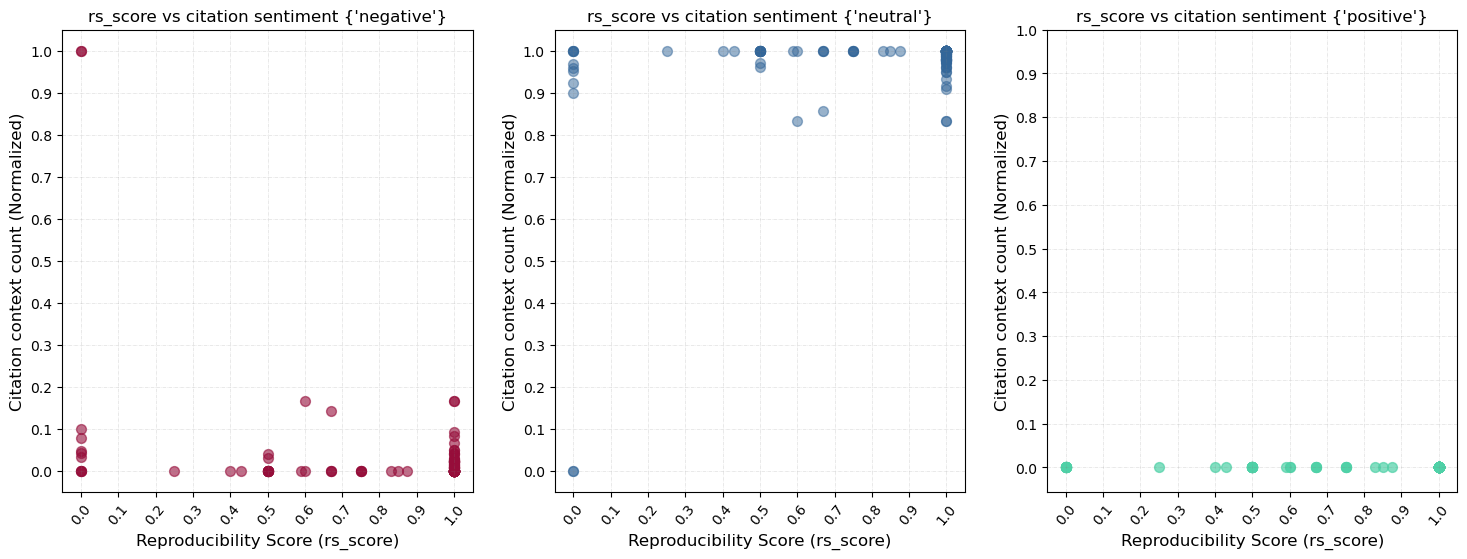

In [252]:

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(133)
p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(131)
p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p3 = plt.scatter(rs_score, neutral_norm,color=colors['blue'], s=50) 
# p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50) 
# p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.show()

# enitre citation context behaviour over different rs_scores 

In [253]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_single_model_related_only.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
    item.update({"rs_score":i})



#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_single_model_related_only_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral  p_norm  \
119  RS_134_ICDAR_2018_01       0.0         0         3       70     0.0   
120  RS_135_ICDAR_2018_02       0.0         0         0        4     0.0   
122  RS_137_ICDAR_2018_04       0.0         0         1       20     0.0   
123  RS_138_ICDAR_2018_05       0.0         0         0       38     0.0   
125  RS_140_ICDAR_2018_07       0.0         0         0        3     0.0   
126  RS_141_ICDAR_2018_08       0.0         0         1       12     0.0   
127  RS_142_ICDAR_2018_09       0.0         0         1       30     0.0   
130  RS_145_ICDAR_2018_12       0.0         0         2       18     0.0   
131  RS_147_ICDAR_2018_14       0.0         0         0       48     0.0   
132  RS_148_ICDAR_2018_15       0.0         0         1        0     0.0   
133  RS_149_ICDAR_2018_16       0.0         0         1        0     0.0   

       n_norm  ntr_norm  total_contexts_count  
119  0.041096  0.958904                

In [254]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

0

In [256]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

148

In [257]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

12294

In [258]:
# 5 models
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

df_citation_context_behaviour

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11                0               10   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1                0                0   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2                0                0   
5   df_sentiment_05                      13                0               11   
6   df_sentiment_06                       6                0                3   
7   df_sentiment_07                       4                0                0   
8   df_sentiment_08                       3                0                0   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                      94                0              124   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0              243         0                  0.0             2.397895   
1                0         1                  0.0             0.000000   
2                6         2                  0.0             0.000000   
3                0         3                  0.0             0.000000   
4               34         4                  0.0             0.000000   
5              574         5                  0.0             2.484907   
6               55         6                  0.0             1.386294   
7               28         7                  0.0             0.000000   
8               41         8                  0.0             0.000000   
9                0         9                  0.0             0.000000   
10           11313        10                  0.0             4.828314   

    total_neutrals_log  
0             5.497168  
1             0.000000  
2             1.945910  
3             0.000000  
4             3.555348  
5             6.354370  
6             4.025352  
7             3.367296  
8             3.737670  
9             0.000000  
10            9.333796

In [181]:
# df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
# df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
# df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

# df_citation_context_behaviour
# # print(df_citation_context_behaviour)

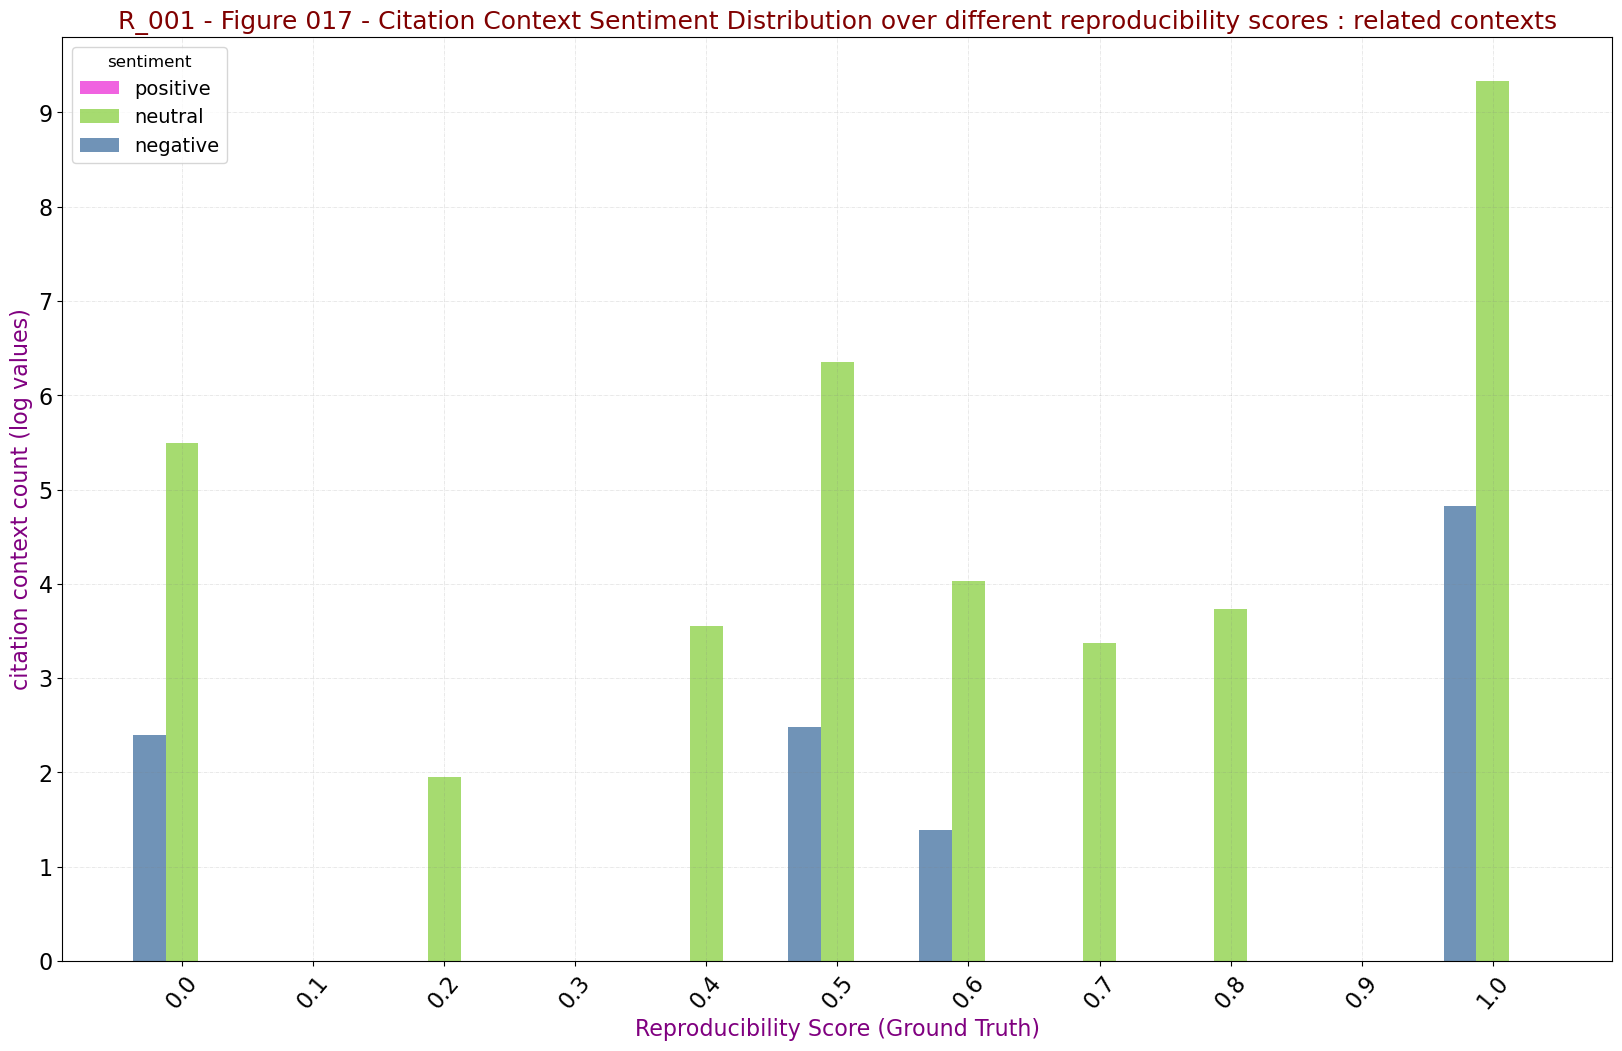

In [263]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour['total_positives_log']
negatives = df_citation_context_behaviour['total_negatives_log']
neutrals = df_citation_context_behaviour['total_neutrals_log']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)

plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025) 
    
plt.bar(X_axis, neutrals, color=colors['green'], label = 'neutral', width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color=colors['blue'], width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 10, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
plt.ylabel(f"citation context count (log values)",fontsize=16,color='purple')

plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="sentiment",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

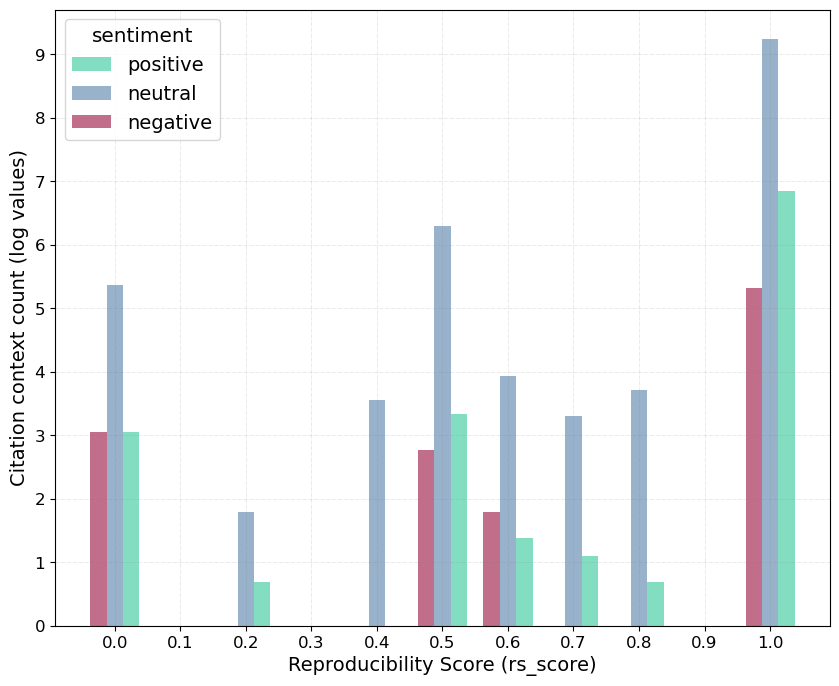

In [226]:
# figure 17 for paper


keys_ = df_citation_context_behaviour['rs_score']
keys_

positives = df_citation_context_behaviour['total_positives_log']
negatives = df_citation_context_behaviour['total_negatives_log']
neutrals = df_citation_context_behaviour['total_neutrals_log']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)

# plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025)     
plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['green'], width = 0.025)     
plt.bar(X_axis, neutrals, color=colors['blue'], label = 'neutral', width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color=colors['red'], width = 0.025) 

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 10, step=1),fontsize=12)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
plt.xlabel("Reproducibility Score (rs_score)",fontsize=14)
plt.ylabel(f"Citation context count (log values)",fontsize=14)

# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

# using single model - model 0 - our fine tuned model for citation context sentitment analysis - for only the reproducibility related citation contexts (12442)

In [10]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/model_0_predictions/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['target_predict_model_0_label'] =='neutral']
    df_dataset_positive = df[df['target_predict_model_0_label'] =='positive']
    df_dataset_negative = df[df['target_predict_model_0_label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
with open("sentiment_analysis/model_0_rep_related_only_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:18 -- n:1 -- neutral:14

RS_002_MLRC_2022_02
p:60 -- n:4 -- neutral:13

RS_003_MLRC_2022_03
p:3 -- n:1 -- neutral:1

RS_004_MLRC_2022_04
p:3 -- n:0 -- neutral:3

RS_005_MLRC_2022_05
p:3 -- n:0 -- neutral:0

RS_006_MLRC_2022_06
p:30 -- n:0 -- neutral:22

RS_008_MLRC_2022_08
p:3 -- n:1 -- neutral:0

RS_009_MLRC_2022_09
p:1 -- n:0 -- neutral:0

RS_011_MLRC_2022_11
p:3 -- n:0 -- neutral:3

RS_012_MLRC_2022_12
p:3 -- n:2 -- neutral:5

RS_013_MLRC_2022_13
p:7 -- n:0 -- neutral:2

RS_014_MLRC_2022_14
p:12 -- n:3 -- neutral:0

RS_016_MLRC_2022_16
p:3 -- n:0 -- neutral:3

RS_017_MLRC_2022_17
p:0 -- n:0 -- neutral:3

RS_018_MLRC_2022_18
p:7 -- n:0 -- neutral:2

RS_019_MLRC_2022_19
p:2 -- n:0 -- neutral:2

RS_020_MLRC_2022_20
p:0 -- n:1 -- neutral:0

RS_021_MLRC_2022_21
p:4 -- n:0 -- neutral:4

RS_022_MLRC_2022_22
p:0 -- n:0 -- neutral:2

RS_023_MLRC_2022_23
p:4 -- n:1 -- neutral:0

RS_024_MLRC_2022_24
p:3 -- n:0 -- neutral:3

RS_025_MLRC_2022_25
p:0 -- n:0 -- neutral:1

RS_

{'RS_001_MLRC_2022_01': {'positive': 18, 'negative': 1, 'neutral': 14},
 'RS_002_MLRC_2022_02': {'positive': 60, 'negative': 4, 'neutral': 13},
 'RS_003_MLRC_2022_03': {'positive': 3, 'negative': 1, 'neutral': 1},
 'RS_004_MLRC_2022_04': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_005_MLRC_2022_05': {'positive': 3, 'negative': 0, 'neutral': 0},
 'RS_006_MLRC_2022_06': {'positive': 30, 'negative': 0, 'neutral': 22},
 'RS_008_MLRC_2022_08': {'positive': 3, 'negative': 1, 'neutral': 0},
 'RS_009_MLRC_2022_09': {'positive': 1, 'negative': 0, 'neutral': 0},
 'RS_011_MLRC_2022_11': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_012_MLRC_2022_12': {'positive': 3, 'negative': 2, 'neutral': 5},
 'RS_013_MLRC_2022_13': {'positive': 7, 'negative': 0, 'neutral': 2},
 'RS_014_MLRC_2022_14': {'positive': 12, 'negative': 3, 'neutral': 0},
 'RS_016_MLRC_2022_16': {'positive': 3, 'negative': 0, 'neutral': 3},
 'RS_017_MLRC_2022_17': {'positive': 0, 'negative': 0, 'neutral': 3},
 'RS_018_MLRC

In [11]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_0_rep_related_only_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_related_only.csv',index=False)
# # # df_dp17
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral']))


# model_1 --> there are no positives at all for all 134 datapoints
# positive : 0
# negative : 148
# neutral : 12294

# model_2 --> for all 134 cited papers
# positive : 1942
# negative : 184
# neutral : 10316

# model_3 --> for all 134 cited papers
# positive : 1487
# negative : 210
# neutral : 10745

# model_4 --> for all 134 cited papers
# positive : 1305
# negative : 369
# neutral : 10768

# model_5 --> for all 134 cited papers
# positive : 1402
# negative : 2484
# neutral : 8556

134
positive : 8385
negative : 937
neutral : 3120


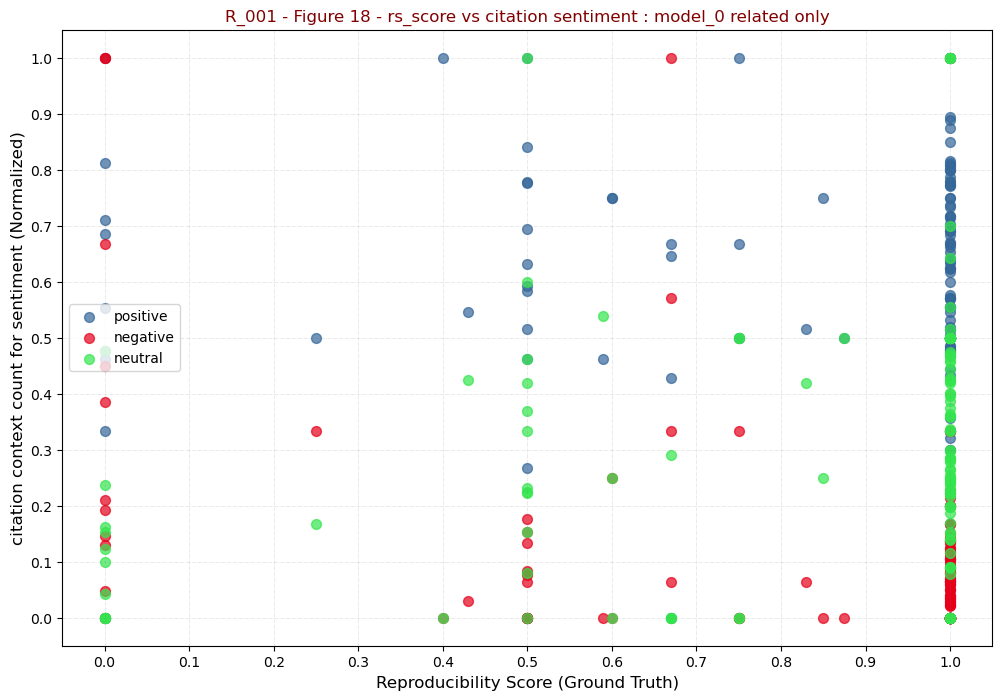

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 18 - rs_score vs citation sentiment : model_0 related only", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_18_rs_score_vs_citation_sentiment_model_0_related.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

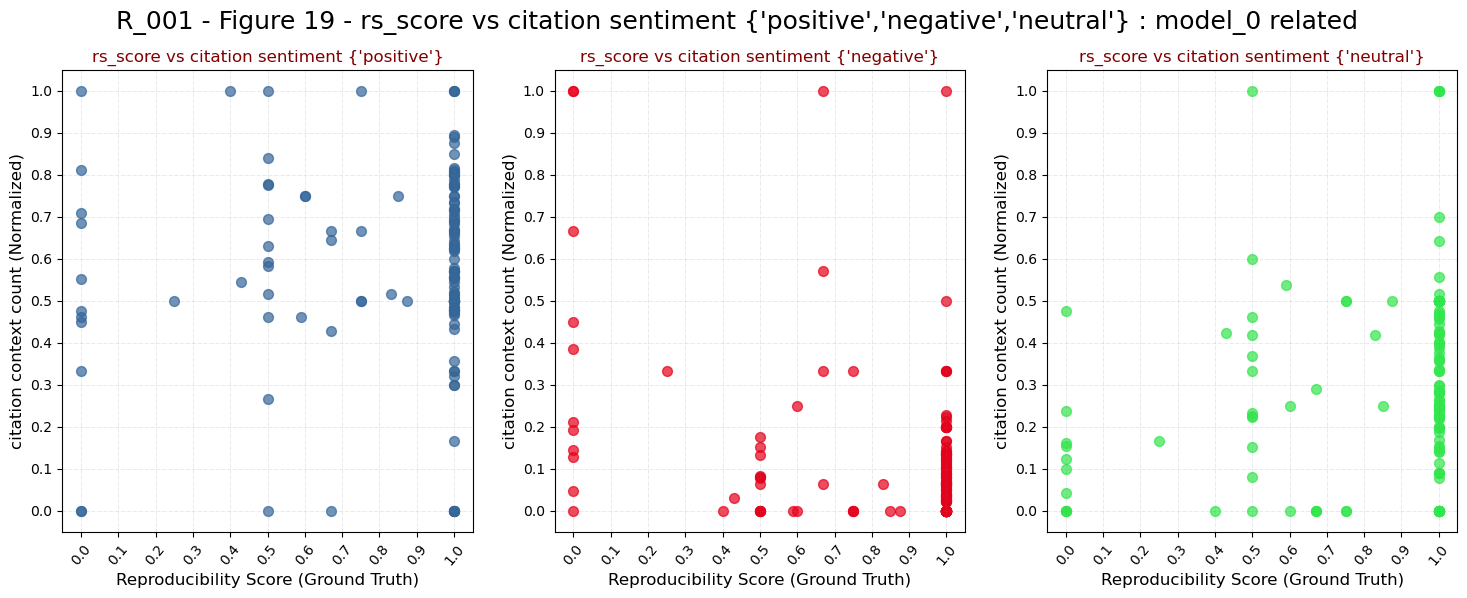

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 19 - rs_score vs citation sentiment {'positive','negative','neutral'} : model_0 related",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.savefig("plots/R_001_Figure_19_rs_score_vs_citation_sentiment_model_0_related.png",pad_inches=1)
plt.show()

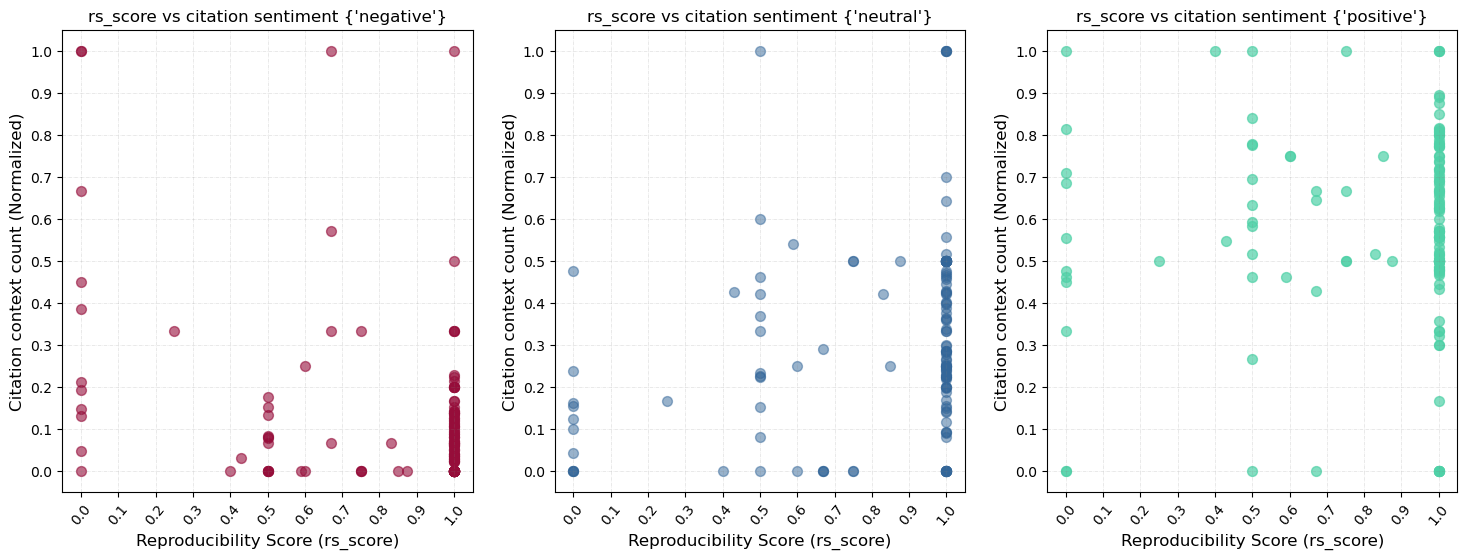

In [14]:

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(133)
p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(131)
p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p3 = plt.scatter(rs_score, neutral_norm,color=colors['blue'], s=50) 
# p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50) 
# p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.show()

# enitre citation context behaviour over different rs_scores 

In [251]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_0_related_only.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
    item.update({"rs_score":i})



#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_model_0_related_only_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
119  RS_134_ICDAR_2018_01       0.0        50        14        9  0.684932   
120  RS_135_ICDAR_2018_02       0.0         4         0        0  1.000000   
122  RS_137_ICDAR_2018_04       0.0        10         1       10  0.476190   
123  RS_138_ICDAR_2018_05       0.0        21         8        9  0.552632   
125  RS_140_ICDAR_2018_07       0.0         1         2        0  0.333333   
126  RS_141_ICDAR_2018_08       0.0         6         5        2  0.461538   
127  RS_142_ICDAR_2018_09       0.0        22         4        5  0.709677   
130  RS_145_ICDAR_2018_12       0.0         9         9        2  0.450000   
131  RS_147_ICDAR_2018_14       0.0        39         7        2  0.812500   
132  RS_148_ICDAR_2018_15       0.0         0         1        0  0.000000   
133  RS_149_ICDAR_2018_16       0.0         0         1        0  0.000000   

       n_norm  ntr_norm  total_contexts_count  
119  0.191781  

In [252]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

8385

In [186]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

937

In [187]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

3120

In [254]:
# 5 models
df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

df_citation_context_behaviour["total_contexts"] = (df_citation_context_behaviour["total_positives"]\
                                                   +df_citation_context_behaviour["total_negatives"]\
                                                   +df_citation_context_behaviour["total_neutrals"])
df_citation_context_behaviour["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour["total_positives"]\
                                                             +df_citation_context_behaviour["total_negatives"]\
                                                             +df_citation_context_behaviour["total_neutrals"])/(df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_per_paper"] = (df_citation_context_behaviour["total_positives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_negatives_per_paper"] = (df_citation_context_behaviour["total_negatives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_neutrals_per_paper"] = (df_citation_context_behaviour["total_neutrals"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_norm"] = (df_citation_context_behaviour["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_negatives_norm"] = (df_citation_context_behaviour["total_negatives_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_neutrals_norm"] = (df_citation_context_behaviour["total_neutrals_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)


df_citation_context_behaviour.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_related_only_rs_11_bins.csv',index=False)

# def normalize_counts(dict_item):
#     # ignoring 0 values
#     total_citation_context_count = dict_item['total_positives'] + dict_item['total_negatives'] + dict_item['total_neutrals'] 
    
#     positive = dict_item['positive']
#     negative = dict_item['negative']
#     neutral = dict_item['neutral']
    
#     if total_citation_context_count == 0:
#         positive_norm = 0
#         negative_norm = 0
#         neutral_norm = 0
#     else:
# #         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
#         positive_norm = (positive)/(total_citation_context_count)
#         negative_norm = (negative)/(total_citation_context_count)
#         neutral_norm = (neutral)/(total_citation_context_count)

#     # returning the normalized value
#     return positive_norm, negative_norm, neutral_norm, total_citation_context_count

df_citation_context_behaviour

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              162               52   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1                3                2   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2               19                1   
5   df_sentiment_05                      13              359               76   
6   df_sentiment_06                       6               37                9   
7   df_sentiment_07                       4               16                1   
8   df_sentiment_08                       3               22                2   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                      94             7767              794   

    total_neutrals  rs_score  total_contexts  avg_total_contexts_per_paper  \
0               39         0             253                     23.000000   
1                0         1               0                      0.000000   
2                1         2               6                      6.000000   
3                0         3               0                      0.000000   
4               14         4              34                     17.000000   
5              150         5             585                     45.000000   
6               12         6              58                      9.666667   
7               11         7              28                      7.000000   
8               17         8              41                     13.666667   
9                0         9               0                      0.000000   
10            2876        10           11437                    121.670213   

    total_positives_per_paper  total_negatives_per_paper  \
0                   14.727273                   4.727273   
1                    0.000000                   0.000000   
2                    3.000000                   2.000000   
3                    0.000000                   0.000000   
4                    9.500000                   0.500000   
5                   27.615385                   5.846154   
6                    6.166667                   1.500000   
7                    4.000000                   0.250000   
8                    7.333333                   0.666667   
9                    0.000000                   0.000000   
10                  82.627660                   8.446809   

    total_neutrals_per_paper  total_positives_norm  total_negatives_norm  \
0                   3.545455              0.640316              0.205534   
1                   0.000000              0.000000              0.000000   
2                   1.000000              0.500000              0.333333   
3                   0.000000              0.000000              0.000000   
4                   7.000000              0.558824              0.029412   
5                  11.538462              0.613675              0.129915   
6                   2.000000              0.637931              0.155172   
7                   2.750000              0.571429              0.035714   
8                   5.666667              0.536585              0.048780   
9                   0.000000              0.000000              0.000000   
10                 30.595745              0.679112              0.069424   

    total_neutrals_norm  
0              0.154150  
1              0.000000  
2              0.166667  
3              0.000000  
4              0.411765  
5              0.256410  
6              0.206897  
7              0.392857  
8              0.414634  
9              0.000000  
10             0.251465

<!-- Could you normalize the two model_0 histograms by 
dividing the citation context count by the number of papers of a certain RS score?  This will show the number of citation context for one paper on average of each sentiment at a certain RS score.  -->


In addition to this, could you also plot the fraction of predicted negative citation context of one paper on average at a certain RS score? 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


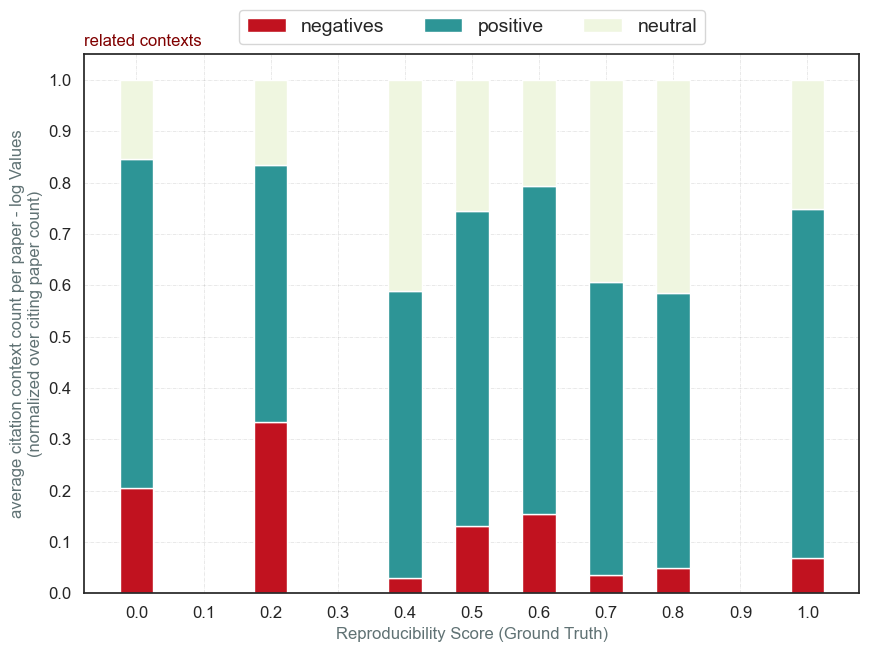

In [255]:

width = 0.05

# fig,ax = plt.figure(figsize = (10,8)

# keys_ = df_citation_context_behaviour['rs_score']
# X_axis = keys_
X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']
other_two = df_citation_context_behaviour['total_neutrals_norm'] + df_citation_context_behaviour['total_positives_norm']

fig, ax = plt.subplots(figsize = (10, 7))
bottom = np.zeros(len(positives))


plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)
plt.yticks(np.arange(0, 1.1, step=0.1),fontsize=12)


plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=12,color='#607274')

plt.title("related contexts",fontsize=12,color='maroon', loc='left')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)

p = ax.bar(X_axis, negatives, width, label='negatives', bottom=bottom,color='#c1121f')   #e76f51
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
bottom += positives
p3 = ax.bar(X_axis, neutrals, width, label='neutral', bottom=bottom,color='#eff6e0')


# ax.set_title("Number of penguins with above average body mass")
# ax.legend(fontsize="14",title="",title_fontsize="large",fancybox=True,loc="upper left")
ax.legend(fontsize="14",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)


plt.show()

In [181]:
# df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
# df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
# df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

# df_citation_context_behaviour
# # print(df_citation_context_behaviour)

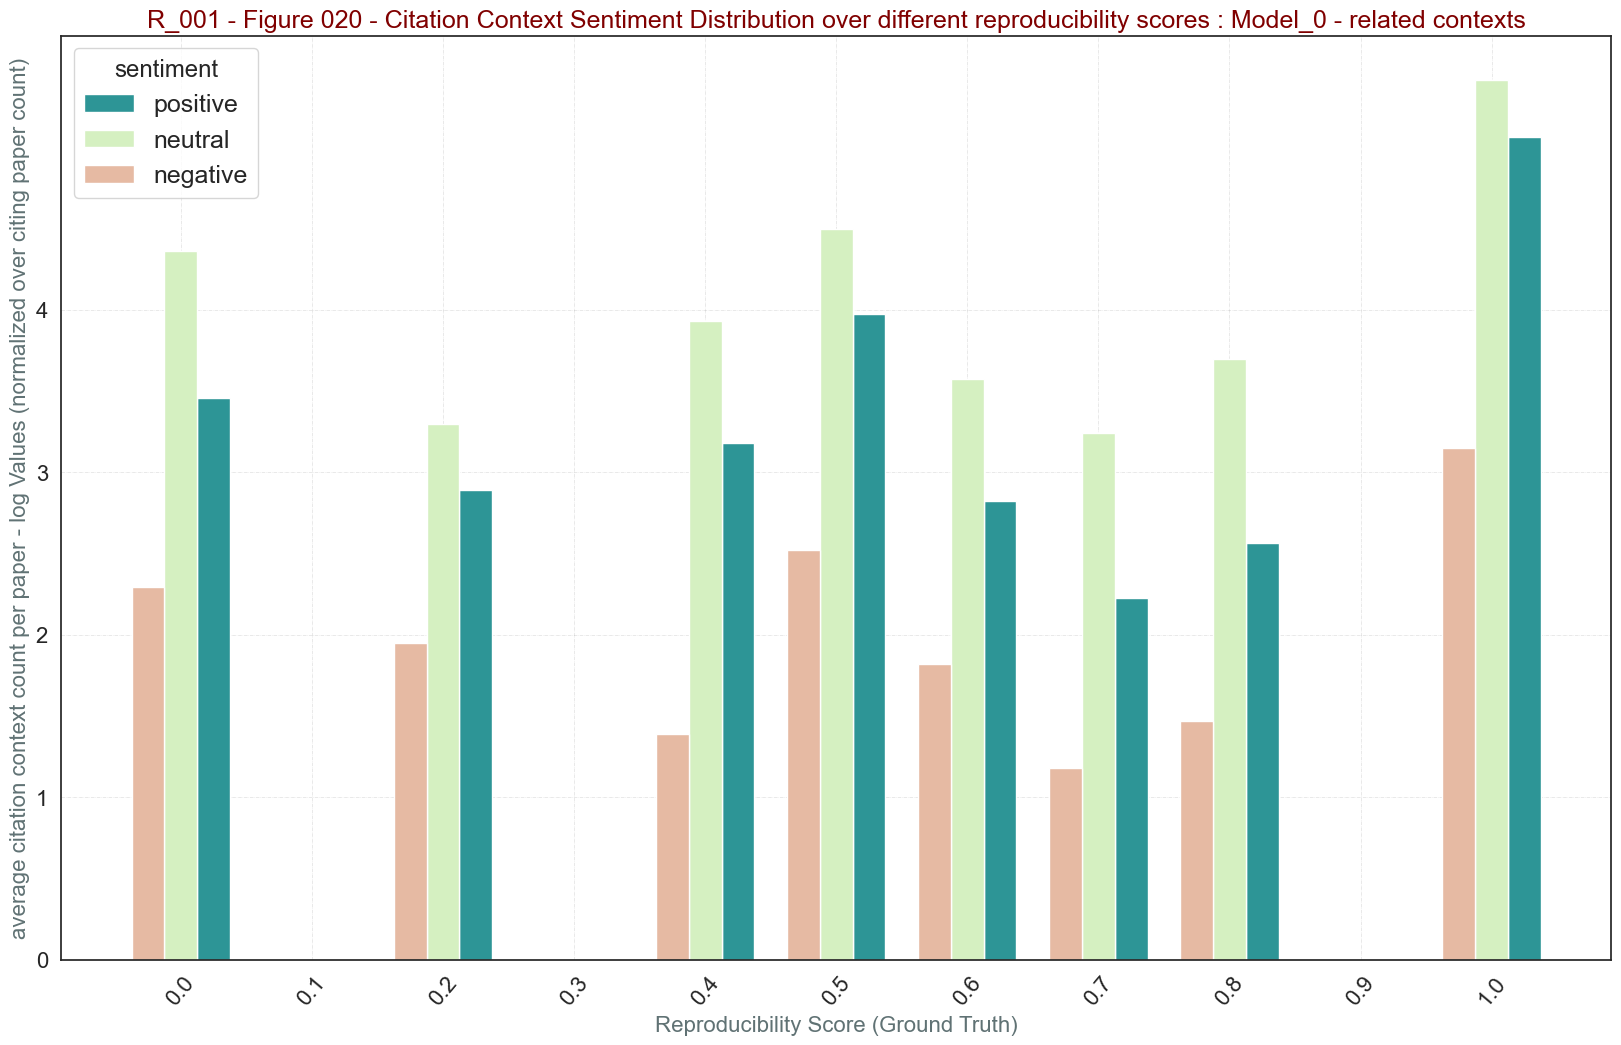

In [100]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)


# plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
# plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 


plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values (normalized over citing paper count)",fontsize=16,color='#607274')

plt.title("R_001 - Figure 020 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()

# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)


plt.show() 

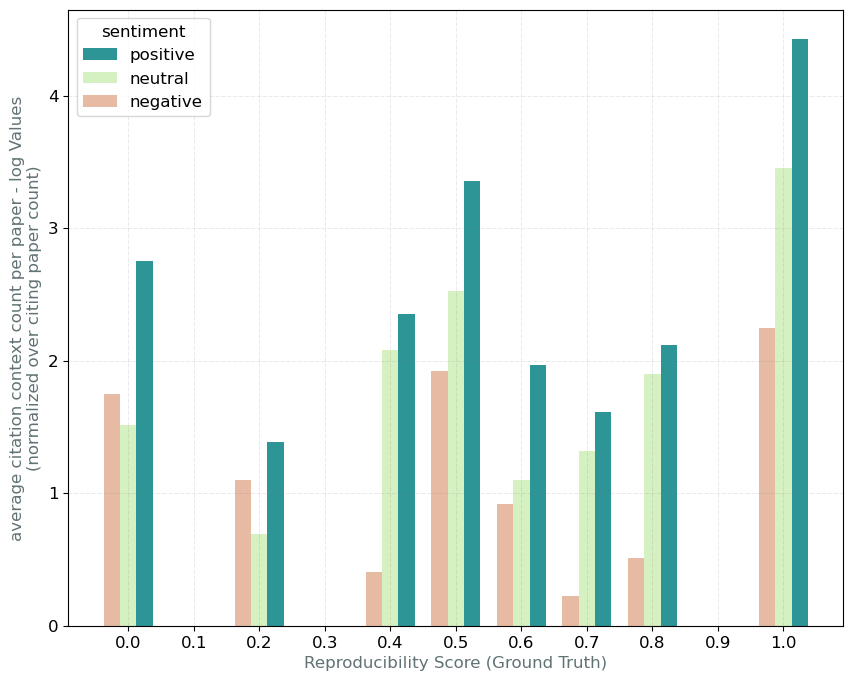

In [83]:
# figure 17 for paper


keys_ = df_citation_context_behaviour['rs_score']
keys_

# positives = df_citation_context_behaviour['total_positives_log']
# negatives = df_citation_context_behaviour['total_negatives_log']
# neutrals = df_citation_context_behaviour['total_neutrals_log']

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)

# plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025)     
plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=12)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
# plt.xlabel("Reproducibility Score (rs_score)",fontsize=12,color="#747264")
# plt.ylabel(f"Citation context count (log values)",fontsize=12,color="#747264")
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=12,color='#607274')


# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="12",title="sentiment",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

In [ ]:
#negative fraction

keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)


# plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
# plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 


plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values (normalized over citing paper count)",fontsize=16,color='#607274')

plt.title("R_001 - Figure 020 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()

# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)


plt.show() 

# using single model - model 0 - our fine tuned model for citation context sentitment analysis - for all citation contexts (42091)

In [42]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/model_0_predictions_for_all_42000/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    label_counts = {'positive':0,'negative':0,'neutral':0}
    
    df = pd.read_csv(file)

    df_dataset_neutral = df[df['target_predict_model_0_label'] =='neutral']
    df_dataset_positive = df[df['target_predict_model_0_label'] =='positive']
    df_dataset_negative = df[df['target_predict_model_0_label'] =='negative']

    label_counts['neutral'] = len(df_dataset_neutral)
    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']} -- neutral:{label_counts['neutral']}")
    print()
    
    
with open("sentiment_analysis/model_0_all_42000_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
p:42 -- n:6 -- neutral:93

RS_002_MLRC_2022_02
p:92 -- n:9 -- neutral:59

RS_003_MLRC_2022_03
p:9 -- n:3 -- neutral:22

RS_004_MLRC_2022_04
p:5 -- n:2 -- neutral:9

RS_005_MLRC_2022_05
p:8 -- n:1 -- neutral:1

RS_006_MLRC_2022_06
p:49 -- n:5 -- neutral:172

RS_008_MLRC_2022_08
p:5 -- n:1 -- neutral:15

RS_009_MLRC_2022_09
p:4 -- n:0 -- neutral:7

RS_010_MLRC_2022_10
p:0 -- n:1 -- neutral:2

RS_011_MLRC_2022_11
p:5 -- n:2 -- neutral:9

RS_012_MLRC_2022_12
p:7 -- n:2 -- neutral:47

RS_013_MLRC_2022_13
p:14 -- n:4 -- neutral:19

RS_014_MLRC_2022_14
p:14 -- n:3 -- neutral:1

RS_015_MLRC_2022_15
p:0 -- n:1 -- neutral:12

RS_016_MLRC_2022_16
p:5 -- n:2 -- neutral:9

RS_017_MLRC_2022_17
p:1 -- n:0 -- neutral:7

RS_018_MLRC_2022_18
p:14 -- n:4 -- neutral:19

RS_019_MLRC_2022_19
p:5 -- n:0 -- neutral:14

RS_020_MLRC_2022_20
p:4 -- n:8 -- neutral:14

RS_021_MLRC_2022_21
p:9 -- n:6 -- neutral:40

RS_022_MLRC_2022_22
p:4 -- n:0 -- neutral:7

RS_023_MLRC_2022_23
p:11 -- n:4 -- n

{'RS_001_MLRC_2022_01': {'positive': 42, 'negative': 6, 'neutral': 93},
 'RS_002_MLRC_2022_02': {'positive': 92, 'negative': 9, 'neutral': 59},
 'RS_003_MLRC_2022_03': {'positive': 9, 'negative': 3, 'neutral': 22},
 'RS_004_MLRC_2022_04': {'positive': 5, 'negative': 2, 'neutral': 9},
 'RS_005_MLRC_2022_05': {'positive': 8, 'negative': 1, 'neutral': 1},
 'RS_006_MLRC_2022_06': {'positive': 49, 'negative': 5, 'neutral': 172},
 'RS_008_MLRC_2022_08': {'positive': 5, 'negative': 1, 'neutral': 15},
 'RS_009_MLRC_2022_09': {'positive': 4, 'negative': 0, 'neutral': 7},
 'RS_010_MLRC_2022_10': {'positive': 0, 'negative': 1, 'neutral': 2},
 'RS_011_MLRC_2022_11': {'positive': 5, 'negative': 2, 'neutral': 9},
 'RS_012_MLRC_2022_12': {'positive': 7, 'negative': 2, 'neutral': 47},
 'RS_013_MLRC_2022_13': {'positive': 14, 'negative': 4, 'neutral': 19},
 'RS_014_MLRC_2022_14': {'positive': 14, 'negative': 3, 'neutral': 1},
 'RS_015_MLRC_2022_15': {'positive': 0, 'negative': 1, 'neutral': 12},
 'RS_0

In [44]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/inferences_5_models/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_0_all_42000_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_all_42000.csv',index=False)
# # # df_dp17
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral']))


# model_1 --> there are no positives at all for all 134 datapoints
# positive : 0
# negative : 148
# neutral : 12294

# model_2 --> for all 134 cited papers
# positive : 1942
# negative : 184
# neutral : 10316

# model_3 --> for all 134 cited papers
# positive : 1487
# negative : 210
# neutral : 10745

# model_4 --> for all 134 cited papers
# positive : 1305
# negative : 369
# neutral : 10768

# model_5 --> for all 134 cited papers
# positive : 1402
# negative : 2484
# neutral : 8556

# # model_0 related --> for all 134 cited papers
# positive : 8385
# negative : 937
# neutral : 3120

134
positive : 15997
negative : 2411
neutral : 23613


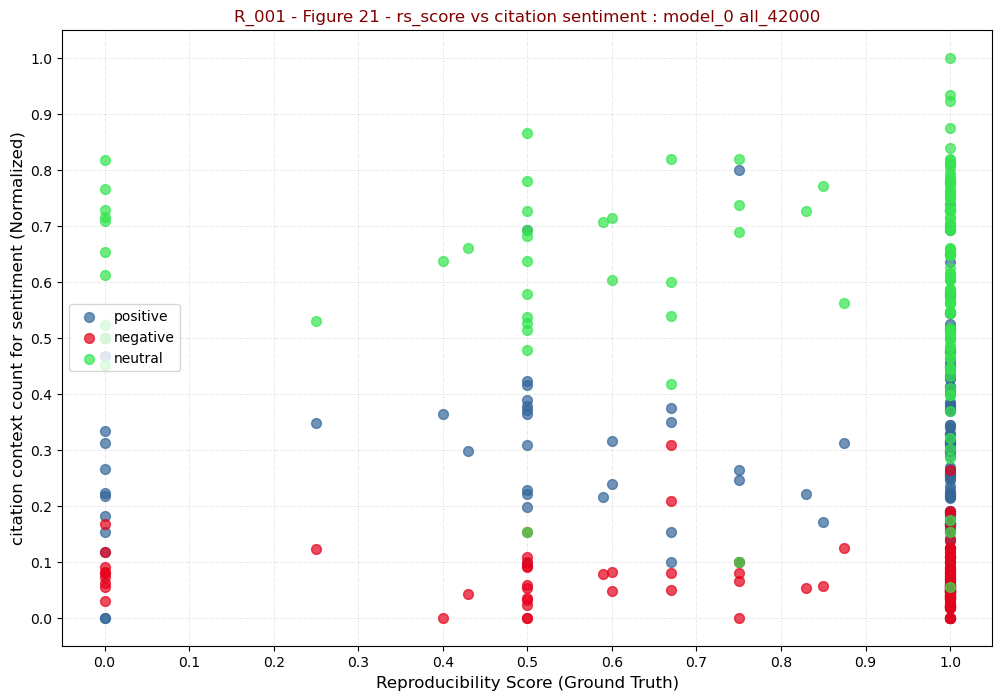

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50,label="neutral") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 21 - rs_score vs citation sentiment : model_0 all_42000", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
plt.savefig("plots/R_001_Figure_21_rs_score_vs_citation_sentiment_model_0_all_42000.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

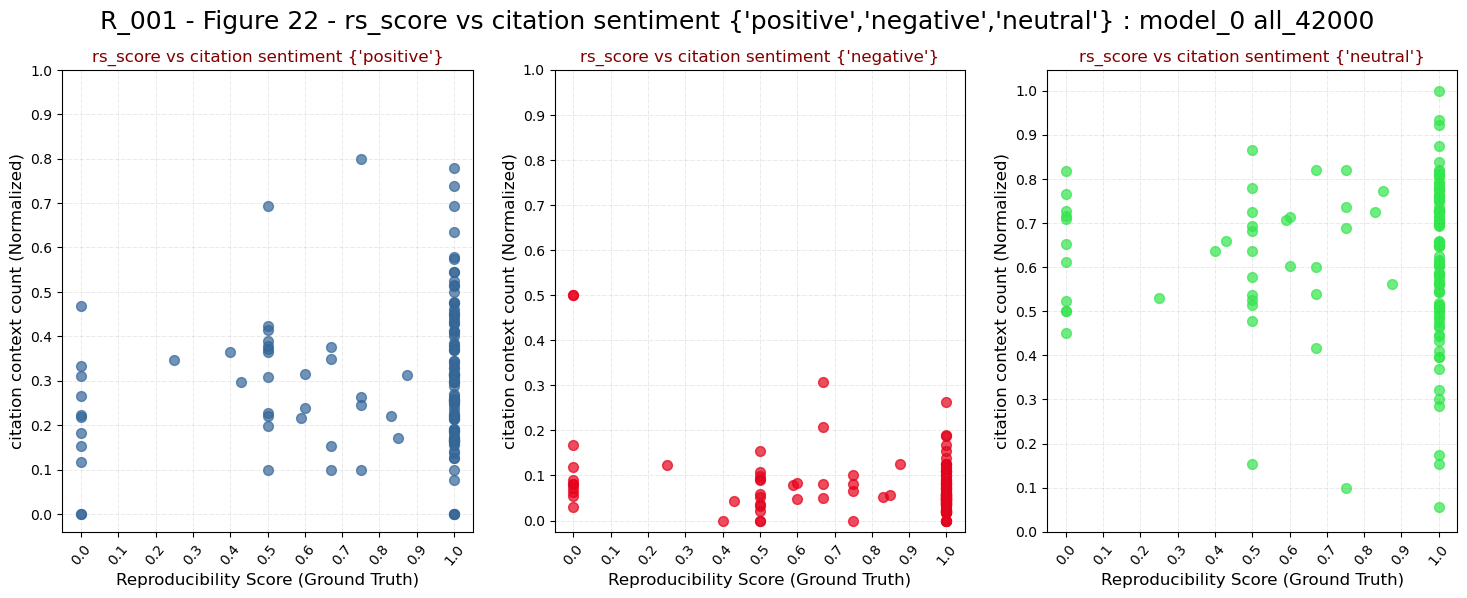

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 22 - rs_score vs citation sentiment {'positive','negative','neutral'} : model_0 all_42000",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(133)
p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.savefig("plots/R_001_Figure_22_rs_score_vs_citation_sentiment_model_0_all_42000.png",pad_inches=1)
plt.show()

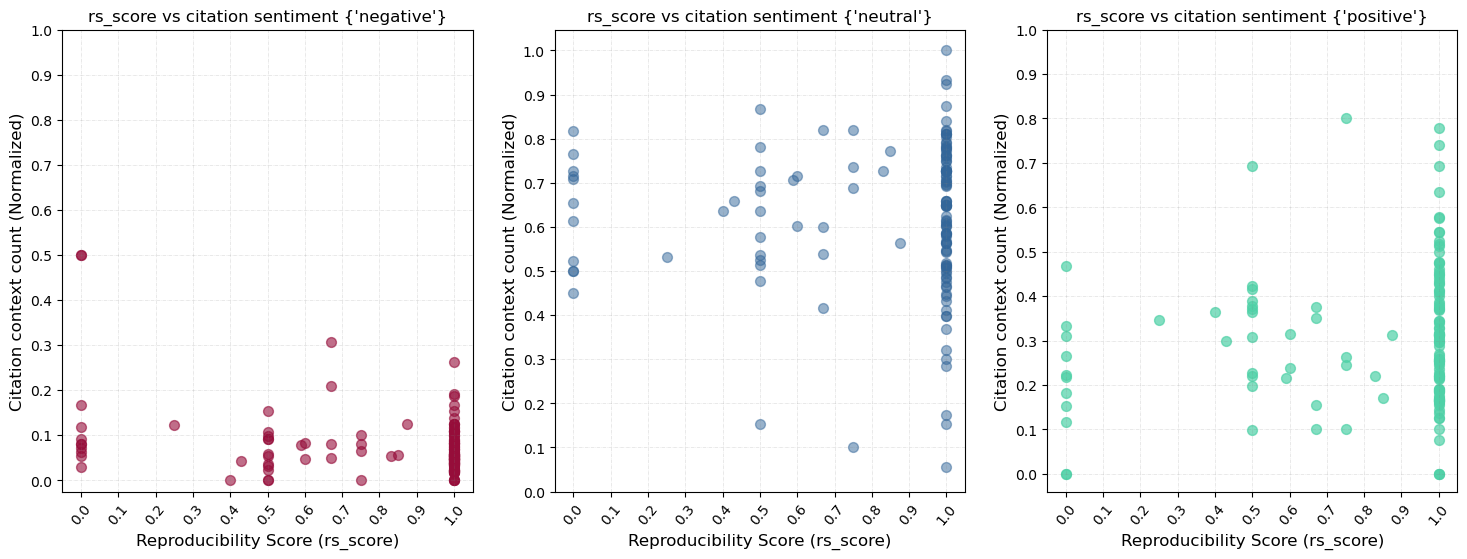

In [48]:

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 
neutral_norm = list(map(lambda x: x['ntr_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(133)
p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(131)
p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p3 = plt.scatter(rs_score, neutral_norm,color=colors['blue'], s=50) 
# p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50) 
# p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 
plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.show()

# enitre citation context behaviour over different rs_scores for all 42091

In [561]:
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_0_all_42000.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})
#     item.update({"rs_score":i})

    item.update({"rs_score":float(i*0.1)})



#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   

with open("sentiment_analysis/sentiment_analysis_model_0_all_42000_count_summary.json", "w") as outfile: 
    json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral    p_norm  \
119  RS_134_ICDAR_2018_01       0.0       107        30      345  0.221992   
120  RS_135_ICDAR_2018_02       0.0        12         4       39  0.218182   
122  RS_137_ICDAR_2018_04       0.0        21         4      112  0.153285   
123  RS_138_ICDAR_2018_05       0.0        33        10       81  0.266129   
125  RS_140_ICDAR_2018_07       0.0         4         2       16  0.181818   
126  RS_141_ICDAR_2018_08       0.0         8         8       52  0.117647   
127  RS_142_ICDAR_2018_09       0.0        43         7       79  0.333333   
130  RS_145_ICDAR_2018_12       0.0        28        15       47  0.311111   
131  RS_147_ICDAR_2018_14       0.0        81        14       78  0.468208   
132  RS_148_ICDAR_2018_15       0.0         0         2        2  0.000000   
133  RS_149_ICDAR_2018_16       0.0         0         2        2  0.000000   

       n_norm  ntr_norm  total_contexts_count  
119  0.062241  

In [562]:
sum_p = 0
for item in citation_context_behaviour.values():
    sum_p+=item['total_positives'] 
sum_p

15997

In [563]:
sum_n = 0
for item in citation_context_behaviour.values():
    sum_n+=item['total_negatives'] 
sum_n

2411

In [564]:
sum_tr = 0
for item in citation_context_behaviour.values():
    sum_tr+=item['total_neutrals'] 
sum_tr

23613

In [275]:
# 5 models
df_citation_context_behaviour_all_42000 = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour_all_42000 = df_citation_context_behaviour_all_42000.reset_index()
df_citation_context_behaviour_all_42000

df_citation_context_behaviour_all_42000["total_positives_log"] = np.log(df_citation_context_behaviour_all_42000["total_positives"]+1)
df_citation_context_behaviour_all_42000["total_negatives_log"] = np.log(df_citation_context_behaviour_all_42000["total_negatives"]+1)
df_citation_context_behaviour_all_42000["total_neutrals_log"] = np.log(df_citation_context_behaviour_all_42000["total_neutrals"]+1)

# df_citation_context_behaviour["total_contexts"] = df_citation_context_behaviour["total_positives"]+df_citation_context_behaviour["total_negatives"]+df_citation_context_behaviour["total_neutrals"]

# df_citation_context_behaviour["total_positives_norm"] = np.log((df_citation_context_behaviour["total_positives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)+1)
# df_citation_context_behaviour["total_negatives_norm"] = np.log((df_citation_context_behaviour["total_negatives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)+1)
# df_citation_context_behaviour["total_neutrals_norm"] = np.log((df_citation_context_behaviour["total_neutrals"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)+1)


df_citation_context_behaviour_all_42000["total_contexts"] = (df_citation_context_behaviour_all_42000["total_positives"]\
                                                   +df_citation_context_behaviour_all_42000["total_negatives"]\
                                                   +df_citation_context_behaviour_all_42000["total_neutrals"])
df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour_all_42000["total_positives"]\
                                                             +df_citation_context_behaviour_all_42000["total_negatives"]\
                                                             +df_citation_context_behaviour_all_42000["total_neutrals"])/(df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000["total_positives_per_paper"] = (df_citation_context_behaviour_all_42000["total_positives"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000["total_negatives_per_paper"] = (df_citation_context_behaviour_all_42000["total_negatives"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000["total_neutrals_per_paper"] = (df_citation_context_behaviour_all_42000["total_neutrals"]/ (df_citation_context_behaviour_all_42000["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000["total_positives_norm"] = (df_citation_context_behaviour_all_42000["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000["total_negatives_norm"] = (df_citation_context_behaviour_all_42000["total_negatives_per_paper"]/ (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000["total_neutrals_norm"] = (df_citation_context_behaviour_all_42000["total_neutrals_per_paper"]/ (df_citation_context_behaviour_all_42000["avg_total_contexts_per_paper"])).fillna(0)


df_citation_context_behaviour_all_42000["pos_neg_ratio_norm"] = (df_citation_context_behaviour_all_42000["total_positives_norm"]/ (df_citation_context_behaviour_all_42000["total_negatives_norm"])).fillna(0)



df_citation_context_behaviour_all_42000.to_csv('sentiment_analysis/sentiment_analysis_from_model_0_all_42000_rs_11_bins.csv',index=False)

df_citation_context_behaviour_all_42000

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              337               98   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1               17                6   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2               46                6   
5   df_sentiment_05                      13              678              149   
6   df_sentiment_06                       6               95               31   
7   df_sentiment_07                       4               33                9   
8   df_sentiment_08                       3               36               10   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                      94            14755             2102   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0              853       0.0             5.823046             4.595120   
1                0       0.1             0.000000             0.000000   
2               26       0.2             2.890372             1.945910   
3                0       0.3             0.000000             0.000000   
4              100       0.4             3.850148             1.945910   
5             1153       0.5             6.520621             5.010635   
6              208       0.6             4.564348             3.465736   
7               98       0.7             3.526361             2.302585   
8              118       0.8             3.610918             2.397895   
9                0       0.9             0.000000             0.000000   
10           21057       1.0             9.599405             7.651120   

    total_neutrals_log  total_contexts  avg_total_contexts_per_paper  \
0             6.749931            1288                    117.090909   
1             0.000000               0                      0.000000   
2             3.295837              49                     49.000000   
3             0.000000               0                      0.000000   
4             4.615121             152                     76.000000   
5             7.050989            1980                    152.307692   
6             5.342334             334                     55.666667   
7             4.595120             140                     35.000000   
8             4.779123             164                     54.666667   
9             0.000000               0                      0.000000   
10            9.955036           37914                    403.340426   

    total_positives_per_paper  total_negatives_per_paper  \
0                   30.636364                   8.909091   
1                    0.000000                   0.000000   
2                   17.000000                   6.000000   
3                    0.000000                   0.000000   
4                   23.000000                   3.000000   
5                   52.153846                  11.461538   
6                   15.833333                   5.166667   
7                    8.250000                   2.250000   
8                   12.000000                   3.333333   
9                    0.000000                   0.000000   
10                 156.968085                  22.361702   

    total_neutrals_per_paper  total_positives_norm  total_negatives_norm  \
0                  77.545455              0.261646              0.076087   
1                   0.000000              0.000000              0.000000   
2                  26.000000              0.346939              0.122449   
3                   0.000000              0.000000              0.000000   
4                  50.000000              0.302632              0.039474   
5                  88.692308              0.342424              0.075253   
6                  34.666667      

In [300]:
df_ccb_removed_data_all_42000 =  df_citation_context_behaviour_all_42000[df_citation_context_behaviour_all_42000['number_of_cited_papers']>10]
df_ccb_removed_data_all_42000

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              337               98   
5   df_sentiment_05                      13              678              149   
10  df_sentiment_10                      94            14755             2102   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0              853       0.0             5.823046             4.595120   
5             1153       0.5             6.520621             5.010635   
10           21057       1.0             9.599405             7.651120   

    total_neutrals_log  total_contexts  avg_total_contexts_per_paper  \
0             6.749931            1288                    117.090909   
5             7.050989            1980                    152.307692   
10            9.955036           37914                    403.340426   

    total_positives_per_paper  total_negatives_per_paper  \
0                   30.636364                   8.909091   
5                   52.153846                  11.461538   
10                 156.968085                  22.361702   

    total_neutrals_per_paper  total_positives_norm  total_negatives_norm  \
0                  77.545455              0.261646              0.076087   
5                  88.692308              0.342424              0.075253   
10                224.010638              0.389170              0.055441   

    total_neutrals_norm  pos_neg_ratio_norm  
0              0.662267            3.438776  
5              0.582323            4.550336  
10             0.555389            7.019505

In [565]:
# df_citation_context_behaviour_all_42000_binary

df_citation_context_behaviour_all_42000_binary = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')


df_citation_context_behaviour_all_42000_binary["total_contexts"] = (df_citation_context_behaviour_all_42000_binary["total_positives"]\
                                                   +df_citation_context_behaviour_all_42000_binary["total_negatives"])
df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour_all_42000_binary["total_positives"]\
                                                             +df_citation_context_behaviour_all_42000_binary["total_negatives"])/(df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000_binary["total_positives_per_paper"] = (df_citation_context_behaviour_all_42000_binary["total_positives"]/ (df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour_all_42000_binary["total_negatives_per_paper"] = (df_citation_context_behaviour_all_42000_binary["total_negatives"]/ (df_citation_context_behaviour_all_42000_binary["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour_all_42000_binary["total_positives_norm"] = (df_citation_context_behaviour_all_42000_binary["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour_all_42000_binary["total_negatives_norm"] = (df_citation_context_behaviour_all_42000_binary["total_negatives_per_paper"]/ (df_citation_context_behaviour_all_42000_binary["avg_total_contexts_per_paper"])).fillna(0)

df_citation_context_behaviour_all_42000_binary["pos_neg_ratio_norm"] = (df_citation_context_behaviour_all_42000_binary["total_positives_norm"]/ (df_citation_context_behaviour_all_42000_binary["total_negatives_norm"])).fillna(0)
df_citation_context_behaviour_all_42000_binary

number_of_cited_papers  total_positives  total_negatives  \
df_sentiment_00                      11              337               98   
df_sentiment_01                       0                0                0   
df_sentiment_02                       1               17                6   
df_sentiment_03                       0                0                0   
df_sentiment_04                       2               46                6   
df_sentiment_05                      13              678              149   
df_sentiment_06                       6               95               31   
df_sentiment_07                       4               33                9   
df_sentiment_08                       3               36               10   
df_sentiment_09                       0                0                0   
df_sentiment_10                      94            14755             2102   

                 total_neutrals  rs_score  total_contexts  \
df_sentiment_00             853       0.0             435   
df_sentiment_01               0       0.1               0   
df_sentiment_02              26       0.2              23   
df_sentiment_03               0       0.3               0   
df_sentiment_04             100       0.4              52   
df_sentiment_05            1153       0.5             827   
df_sentiment_06             208       0.6             126   
df_sentiment_07              98       0.7              42   
df_sentiment_08             118       0.8              46   
df_sentiment_09               0       0.9               0   
df_sentiment_10           21057       1.0           16857   

                 avg_total_contexts_per_paper  total_positives_per_paper  \
df_sentiment_00                     39.545455                  30.636364   
df_sentiment_01                      0.000000                   0.000000   
df_sentiment_02                     23.000000                  17.000000   
df_sentiment_03                      0.000000                   0.000000   
df_sentiment_04                     26.000000                  23.000000   
df_sentiment_05                     63.615385                  52.153846   
df_sentiment_06                     21.000000                  15.833333   
df_sentiment_07                     10.500000                   8.250000   
df_sentiment_08                     15.333333                  12.000000   
df_sentiment_09                      0.000000                   0.000000   
df_sentiment_10                    179.329787                 156.968085   

                 total_negatives_per_paper  total_positives_norm  \
df_sentiment_00                   8.909091              0.774713   
df_sentiment_01                   0.000000              0.000000   
df_sentiment_02                   6.000000              0.739130   
df_sentiment_03                   0.000000              0.000000   
df_sentiment_04                   3.000000              0.884615   
df_sentiment_05                  11.461538              0.819831   
df_sentiment_06                   5.166667              0.753968   
df_sentiment_07                   2.250000              0.785714   
df_sentiment_08                   3.333333              0.782609   
df_sentiment_09                   0.000000              0.000000   
df_sentiment_10                  22.361702              0.875304   

                 total_negatives_norm  pos_neg_ratio_norm  
df_sentiment_00              0.225287            3.438776  
df_sentiment_01              0.000000            0.000000  
df_sentiment_02              0.260870            2.833333  
df_sentiment_03              0.000000            0.000000  
df_sentiment_04              0.115385            7.666667  
df_sentiment_05              0.180169            4.550336  
df_sentiment_06              0.246032            3.064516  
df_sentiment_07              0.214286            3.666667  
df_sentiment_08              0.217391            3.600000  
df_sentiment_09              

In [566]:
df_ccb_removed_data_all_42000_binary =  df_citation_context_behaviour_all_42000_binary[df_citation_context_behaviour_all_42000_binary['number_of_cited_papers']>10]
df_ccb_removed_data_all_42000_binary

number_of_cited_papers  total_positives  total_negatives  \
df_sentiment_00                      11              337               98   
df_sentiment_05                      13              678              149   
df_sentiment_10                      94            14755             2102   

                 total_neutrals  rs_score  total_contexts  \
df_sentiment_00             853       0.0             435   
df_sentiment_05            1153       0.5             827   
df_sentiment_10           21057       1.0           16857   

                 avg_total_contexts_per_paper  total_positives_per_paper  \
df_sentiment_00                     39.545455                  30.636364   
df_sentiment_05                     63.615385                  52.153846   
df_sentiment_10                    179.329787                 156.968085   

                 total_negatives_per_paper  total_positives_norm  \
df_sentiment_00                   8.909091              0.774713   
df_sentiment_05                  11.461538              0.819831   
df_sentiment_10                  22.361702              0.875304   

                 total_negatives_norm  pos_neg_ratio_norm  
df_sentiment_00              0.225287            3.438776  
df_sentiment_05              0.180169            4.550336  
df_sentiment_10              0.124696            7.019505

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


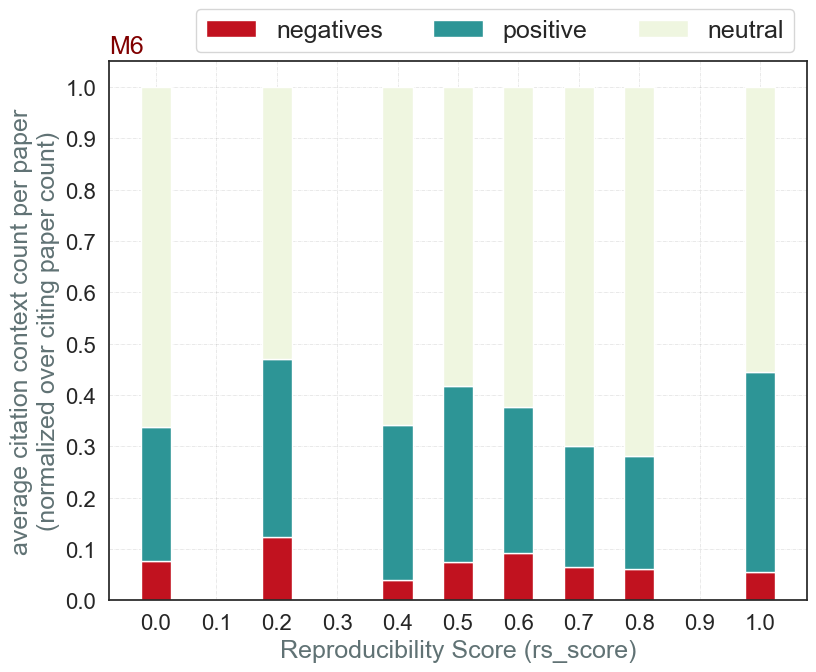

In [301]:

width = 0.05

# fig,ax = plt.figure(figsize = (10,8)

# keys_ = df_citation_context_behaviour['rs_score']
# X_axis = keys_
X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour_all_42000['total_positives_norm']
negatives = df_citation_context_behaviour_all_42000['total_negatives_norm']
neutrals = df_citation_context_behaviour_all_42000['total_neutrals_norm']
other_two = df_citation_context_behaviour_all_42000['total_neutrals_norm'] + df_citation_context_behaviour_all_42000['total_positives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))


plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=16)
plt.yticks(np.arange(0, 1.2, step=0.1),fontsize=16)


plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')

plt.title("M6",fontsize=18,color='maroon',loc='left')


plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)

p = ax.bar(X_axis, negatives, width, label='negatives', bottom=bottom,color='#c1121f')
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
bottom += positives
p3 = ax.bar(X_axis, neutrals, width, label='neutral', bottom=bottom,color='#eff6e0')


# ax.set_title("Number of penguins with above average body mass")
ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper right", bbox_to_anchor=(1, 1.12), ncol=3)
# ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper right", bbox_to_anchor=(0.5, 1.12), ncol=3)
# plt.legend(, loc='upper left')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


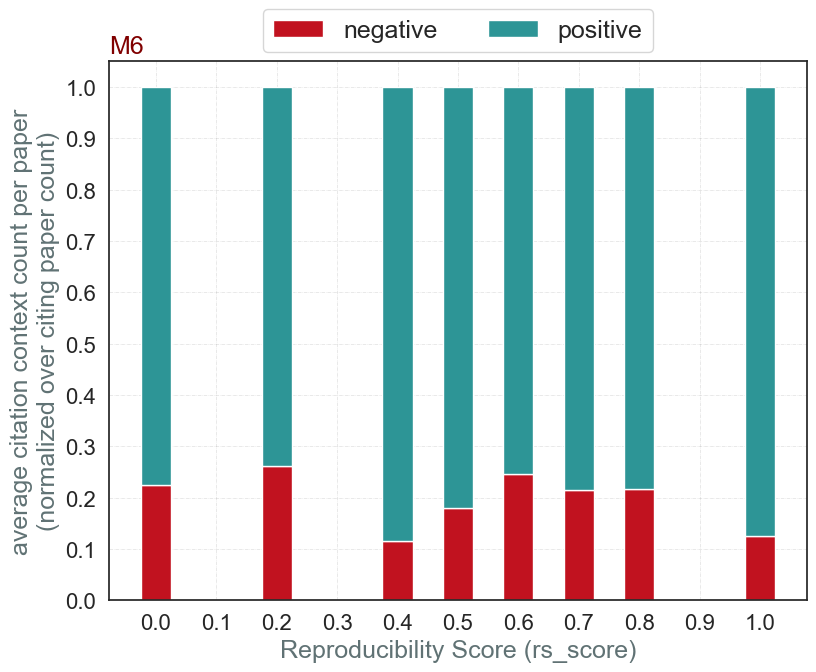

In [316]:

width = 0.05

# fig,ax = plt.figure(figsize = (10,8)

# keys_ = df_citation_context_behaviour['rs_score']
# X_axis = keys_
X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour_all_42000_binary['total_positives_norm']
negatives = df_citation_context_behaviour_all_42000_binary['total_negatives_norm']
# neutrals = df_citation_context_behaviour_all_42000['total_neutrals_norm']
# other_two = df_citation_context_behaviour_all_42000['total_neutrals_norm'] + df_citation_context_behaviour_all_42000['total_positives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))


plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=16)
plt.yticks(np.arange(0, 1.2, step=0.1),fontsize=16)


plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')

plt.title("M6",fontsize=18,color='maroon',loc='left')


plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)

p = ax.bar(X_axis, negatives, width, label='negative', bottom=bottom,color='#c1121f')
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')
# bottom += positives
# p3 = ax.bar(X_axis, neutrals, width, label='neutral', bottom=bottom,color='#eff6e0')


# ax.set_title("Number of penguins with above average body mass")
# ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper right", bbox_to_anchor=(1, 1.12), ncol=3)
ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)

# ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper right", bbox_to_anchor=(0.5, 1.12), ncol=3)
# plt.legend(, loc='upper left')

plt.show()

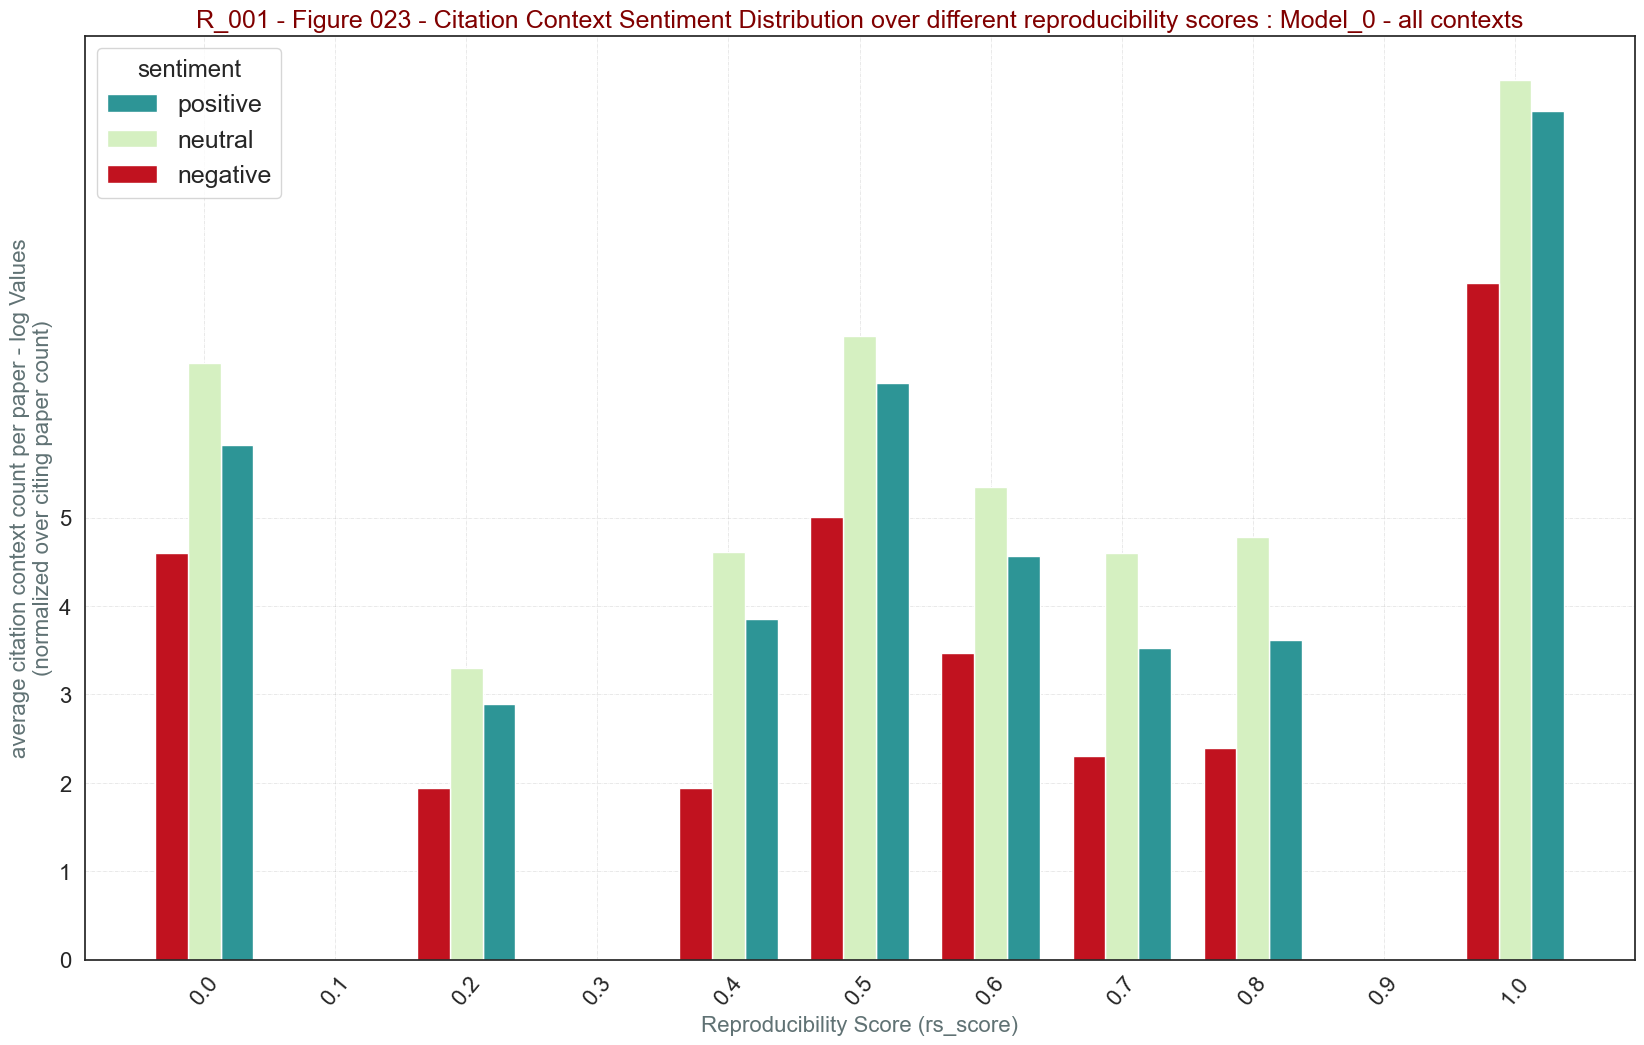

In [287]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour_all_42000['total_positives_log']
negatives = df_citation_context_behaviour_all_42000['total_negatives_log']
neutrals = df_citation_context_behaviour_all_42000['total_neutrals_log']

# positives = df_citation_context_behaviour['total_positives_norm']
# negatives = df_citation_context_behaviour['total_negatives_norm']
# neutrals = df_citation_context_behaviour['total_neutrals_norm']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)


# plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
# plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 


plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#c1121f", width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 6, step=1),fontsize=16)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
# plt.ylabel(f"citation context count (log values)",fontsize=16,color='#607274')


plt.xlabel("Reproducibility Score (rs_score)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=16,color='#607274')


plt.title("R_001 - Figure 023 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - all contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()

# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/R_001_Figure_023_Citation_Context_Sentiment_Distribution_Model_0_all_42000.png",pad_inches=2)


plt.show() 

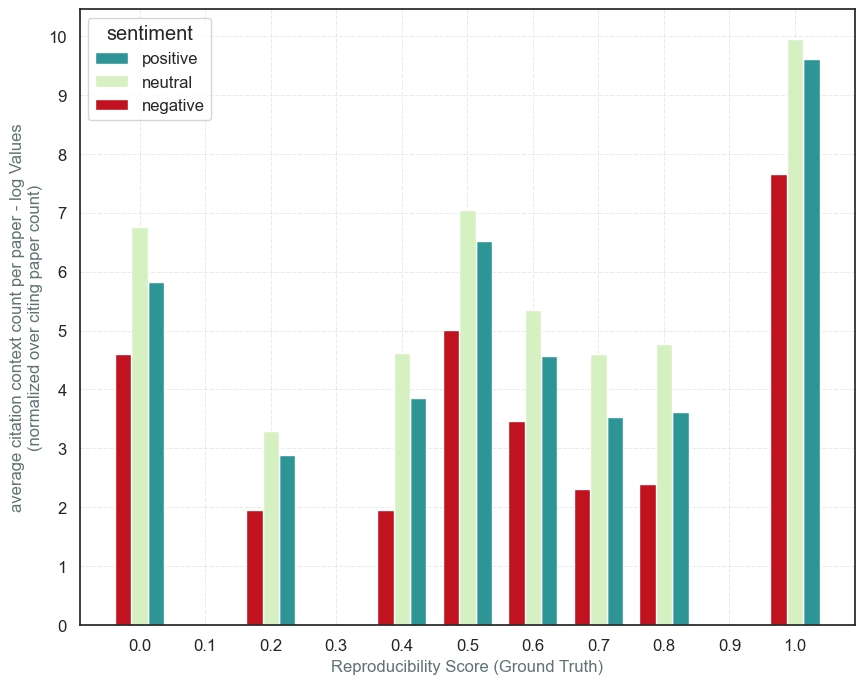

In [247]:
# figure 17 for paper


keys_ = df_citation_context_behaviour_all_42000['rs_score']
keys_

# positives = df_citation_context_behaviour['total_positives_norm']
# negatives = df_citation_context_behaviour['total_negatives_norm']
# neutrals = df_citation_context_behaviour['total_neutrals_norm']

positives = df_citation_context_behaviour_all_42000['total_positives_log']
negatives = df_citation_context_behaviour_all_42000['total_negatives_log']
neutrals = df_citation_context_behaviour_all_42000['total_neutrals_log']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)

# plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025)     
plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#c1121f", width = 0.025) 

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 11, step=1),fontsize=12)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
# plt.xlabel("Reproducibility Score (rs_score)",fontsize=12,color="#747264")
# plt.ylabel(f"Citation context count (log values)",fontsize=12,color="#747264")

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=12,color='#607274')


# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="12",title="sentiment",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

In [497]:

with open(r'citation_context_counts_for_cited_papers.json') as f:
    total_citation_context = json.load(f)
    
total_citation_context

{'RS_001_MLRC_2022_01': {'context_non_zero_citing_paper_count': 57,
  'citationCount': 76,
  'total_context_count_for_labelling': 141,
  'contexts_per_citing_paper': {'2': 3,
   '3': 5,
   '5': 7,
   '6': 1,
   '7': 4,
   '8': 1,
   '9': 1,
   '10': 7,
   '13': 1,
   '14': 3,
   '15': 1,
   '16': 2,
   '18': 1,
   '19': 1,
   '20': 1,
   '22': 9,
   '23': 4,
   '24': 1,
   '25': 3,
   '26': 1,
   '27': 1,
   '31': 1,
   '32': 1,
   '33': 1,
   '34': 1,
   '35': 1,
   '36': 2,
   '37': 2,
   '38': 7,
   '39': 3,
   '40': 2,
   '41': 1,
   '42': 1,
   '43': 3,
   '44': 2,
   '45': 1,
   '46': 2,
   '47': 2,
   '48': 1,
   '50': 5,
   '51': 8,
   '52': 1,
   '53': 1,
   '55': 1,
   '56': 10,
   '57': 1,
   '58': 1,
   '59': 5,
   '62': 2,
   '63': 1,
   '64': 4,
   '65': 1,
   '66': 2,
   '67': 1,
   '68': 2,
   '69': 1,
   '72': 2}},
 'RS_002_MLRC_2022_02': {'context_non_zero_citing_paper_count': 38,
  'citationCount': 65,
  'total_context_count_for_labelling': 160,
  'contexts_per_citin

# using single model - model 6 - our binary fine tuned model for citation context sentitment analysis - for only the reproducibility related citation contexts (12442)

In [501]:
all_files = {} # filename:item, filename:item 

# \R001_Fall_2023_AI_Reproducibility\sentiment_analysis\inferences_5_models

label_file_list = [i for i in glob.glob(r"sentiment_analysis/model_6_pred/*.csv")]

label_file_list

for file in label_file_list:
    file_key = os.path.basename(file).replace(".csv","")
                            
    print(file_key)
    
    total_citation_context_count =  total_citation_context[file_key]['total_context_count_for_labelling']
    print(total_citation_context_count)
    
    label_counts = {'positive':0,'negative':0,'neutral_unrelated':0}
    
    df = pd.read_csv(file)

    df_dataset_positive = df[df['target_predict_model_6_label'] =='positive']
    df_dataset_negative = df[df['target_predict_model_6_label'] =='negative']
    neutral_unrelated = total_citation_context_count - (len(df_dataset_positive)+len(df_dataset_negative))

    label_counts['positive'] = len(df_dataset_positive)
    label_counts['negative'] = len(df_dataset_negative)
    label_counts['neutral_unrelated'] = neutral_unrelated
    
    
    all_files.update({file_key:label_counts})
    
    print(f"p:{label_counts['positive']} -- n:{label_counts['negative']}-- n:{label_counts['neutral_unrelated']}")
    print()
    
    
with open("sentiment_analysis/model_6_rep_related_only_label_summary.json", "w") as outfile: 
    json.dump(all_files, outfile)
    
all_files

RS_001_MLRC_2022_01
141
p:31 -- n:2-- n:108

RS_002_MLRC_2022_02
160
p:71 -- n:6-- n:83

RS_003_MLRC_2022_03
34
p:3 -- n:2-- n:29

RS_004_MLRC_2022_04
16
p:4 -- n:2-- n:10

RS_005_MLRC_2022_05
10
p:3 -- n:0-- n:7

RS_006_MLRC_2022_06
226
p:50 -- n:2-- n:174

RS_008_MLRC_2022_08
21
p:3 -- n:1-- n:17

RS_009_MLRC_2022_09
11
p:1 -- n:0-- n:10

RS_011_MLRC_2022_11
16
p:4 -- n:2-- n:10

RS_012_MLRC_2022_12
56
p:9 -- n:1-- n:46

RS_013_MLRC_2022_13
37
p:8 -- n:1-- n:28

RS_014_MLRC_2022_14
18
p:10 -- n:5-- n:3

RS_016_MLRC_2022_16
16
p:4 -- n:2-- n:10

RS_017_MLRC_2022_17
8
p:3 -- n:0-- n:5

RS_018_MLRC_2022_18
37
p:8 -- n:1-- n:28

RS_019_MLRC_2022_19
19
p:4 -- n:0-- n:15

RS_020_MLRC_2022_20
26
p:0 -- n:1-- n:25

RS_021_MLRC_2022_21
55
p:7 -- n:1-- n:47

RS_022_MLRC_2022_22
11
p:2 -- n:0-- n:9

RS_023_MLRC_2022_23
21
p:3 -- n:2-- n:16

RS_024_MLRC_2022_24
16
p:4 -- n:2-- n:10

RS_025_MLRC_2022_25
5
p:1 -- n:0-- n:4

RS_026_MLRC_2022_26
55
p:7 -- n:1-- n:47

RS_027_MLRC_2022_27
50
p:2 -- n:

{'RS_001_MLRC_2022_01': {'positive': 31,
  'negative': 2,
  'neutral_unrelated': 108},
 'RS_002_MLRC_2022_02': {'positive': 71,
  'negative': 6,
  'neutral_unrelated': 83},
 'RS_003_MLRC_2022_03': {'positive': 3,
  'negative': 2,
  'neutral_unrelated': 29},
 'RS_004_MLRC_2022_04': {'positive': 4,
  'negative': 2,
  'neutral_unrelated': 10},
 'RS_005_MLRC_2022_05': {'positive': 3, 'negative': 0, 'neutral_unrelated': 7},
 'RS_006_MLRC_2022_06': {'positive': 50,
  'negative': 2,
  'neutral_unrelated': 174},
 'RS_008_MLRC_2022_08': {'positive': 3,
  'negative': 1,
  'neutral_unrelated': 17},
 'RS_009_MLRC_2022_09': {'positive': 1,
  'negative': 0,
  'neutral_unrelated': 10},
 'RS_011_MLRC_2022_11': {'positive': 4,
  'negative': 2,
  'neutral_unrelated': 10},
 'RS_012_MLRC_2022_12': {'positive': 9,
  'negative': 1,
  'neutral_unrelated': 46},
 'RS_013_MLRC_2022_13': {'positive': 8,
  'negative': 1,
  'neutral_unrelated': 28},
 'RS_014_MLRC_2022_14': {'positive': 10,
  'negative': 5,
  'neut

In [502]:
# R_001_Figure_015_context_score_vs_sentiment_automated_labelling

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/model_6_pred/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_6_rep_related_only_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
         
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"total_contexts_count":total_contexts})

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sentiment_analysis_from_model_6_related_only.csv',index=False)
# # # df_dp17
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))





134
positive : 10457
negative : 1985


In [ ]:
# unrelated included as neutrals


def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral = dict_item['neutral']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_norm = (neutral)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_norm, total_citation_context_count



with open(r'sentiment_analysis/model_0_all_42000_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral":data_labels[item['key_for_all_RS']]['neutral']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})


len(df_dataset_negative)

In [504]:
# unrelated included as neutrals - for model 7.2

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint


def normalize_counts(dict_item):
    # ignoring 0 values
    total_citation_context_count = dict_item['positive'] + dict_item['negative'] + dict_item['neutral_unrelated'] 
    
    positive = dict_item['positive']
    negative = dict_item['negative']
    neutral_unrelated = dict_item['neutral_unrelated']
    
    if total_citation_context_count == 0:
        positive_norm = 0
        negative_norm = 0
        neutral_unrelated_norm = 0
    else:
#         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
        positive_norm = (positive)/(total_citation_context_count)
        negative_norm = (negative)/(total_citation_context_count)
        neutral_unrelated_norm = (neutral_unrelated)/(total_citation_context_count)

    # returning the normalized value
    return positive_norm, negative_norm, neutral_unrelated_norm, total_citation_context_count

# already_labelled_list = [i for i in glob.glob("Citing_Paper_contexts_lables/*.json") if "temp_labelling" not in i]
# already_labelled_keys_list = list(map(lambda x:x.replace("Citing_Paper_contexts_lables\\","").replace(".json",""),already_labelled_list))
# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]


# label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]
already_labelled_keys_list = [os.path.basename(i).replace(".csv","") for i in glob.glob("sentiment_analysis/model_6_pred/*.csv")]

# file_key = os.path.basename(file).replace(".csv","")
print(len(already_labelled_keys_list))
already_labelled_keys_list

df_rs_score = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_rs_score.loc[:,['key_for_all_RS','rs_score']]
df_filtered = df_rs_score[df_rs_score['key_for_all_RS'].isin(already_labelled_keys_list)].loc[:,['key_for_all_RS','rs_score']]
df_filtered

with open(r'sentiment_analysis/model_6_rep_related_only_label_summary.json') as f:
    data_labels = json.load(f)
    
# with open('citation_context_counts_for_cited_papers.json') as f1:
#     data_total = json.load(f1)
data_labels    
                              
rs_score_dicts_list = df_filtered.to_dict('records')

list_with_both_XY_009 = []

# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45','RS_134_ICDAR_2018_01','RS_135_ICDAR_2018_02','RS_140_ICDAR_2018_07','RS_147_ICDAR_2018_14','RS_148_ICDAR_2018_15','RS_149_ICDAR_2018_16']
# # removal_keys_list = ['RS_020_MLRC_2022_20','RS_045_MLRC_2022_45']
removal_keys_list = []

for item in rs_score_dicts_list:
    if item['key_for_all_RS'] not in removal_keys_list:
        
#         context_score_norm, context_score  = calculate_overall_label_score(data_labels[item['key_for_all_RS']])
#         p_norm, n_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])
        p_norm, n_norm, ntr_norm, total_contexts = normalize_counts(data_labels[item['key_for_all_RS']])

#         item.update({"context_score_agg":context_score})
#         item.update({"cntxt_scr_agg_norm":context_score_norm})

#         item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
#         item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
         
#         item.update({"p_norm":p_norm})
#         item.update({"n_norm":n_norm})
#         item.update({"total_contexts_count":total_contexts})
        
        
        
        item.update({"positive":data_labels[item['key_for_all_RS']]['positive']})
        item.update({"negative":data_labels[item['key_for_all_RS']]['negative']})
        item.update({"neutral_unrelated":data_labels[item['key_for_all_RS']]['neutral_unrelated']})
        
        
        item.update({"p_norm":p_norm})
        item.update({"n_norm":n_norm})
        item.update({"ntr_norm":ntr_norm})
        item.update({"total_contexts_count":total_contexts})        

#         item.update({"total_labels":data_total[item['key_for_all_RS']]['total_context_count_for_labelling']})

        list_with_both_XY_009.append(item)

# # # pprint(list_with_both_XY_009)

df_sentiment_single_m_realted = pd.DataFrame(list_with_both_XY_009)
df_sentiment_single_m_realted
# # # # df_dp22 = df_dp22.rename(columns={"rs_score": "rs_score_ground_truth"})
# # # df_dp17 = df_dp17.sort_values(by=['key_for_all_RS'])
df_sentiment_single_m_realted.to_csv('sentiment_analysis/sa_from_model_6_related_only_with_neutrals.csv',index=False)
# # # df_dp17
df_sentiment_single_m_realted

print('positive :', sum(df_sentiment_single_m_realted['positive']))
print('negative :', sum(df_sentiment_single_m_realted['negative']))
print('neutral :', sum(df_sentiment_single_m_realted['neutral_unrelated']))





134
positive : 10457
negative : 1985
neutral : 29579


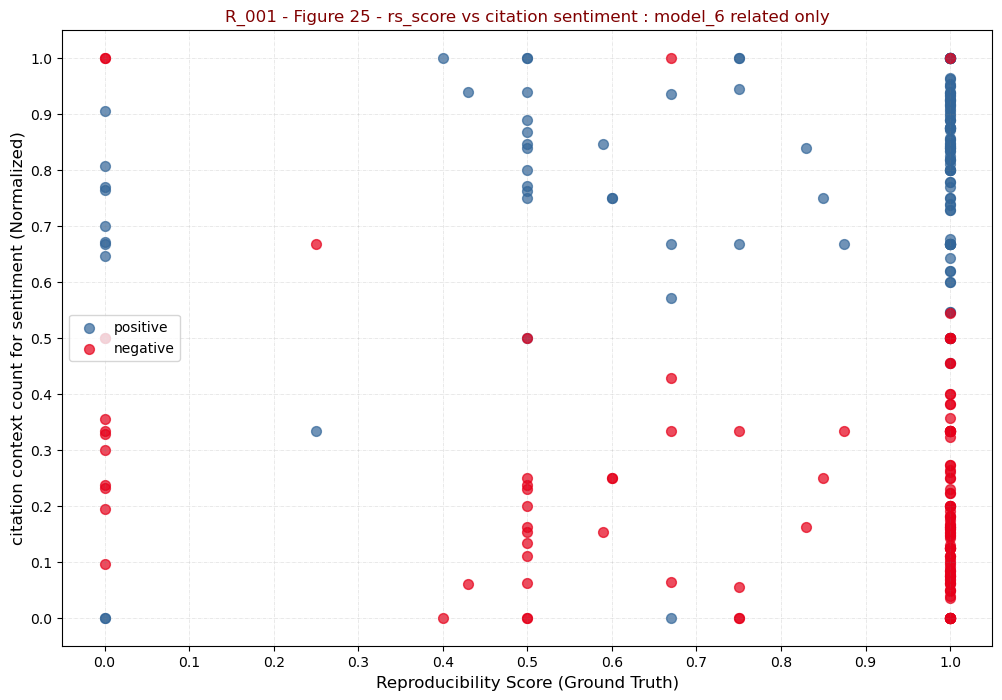

In [296]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 
# print(context_score)
# print(rs_score)

# context_score_14 = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 
# data_points_14 = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
# # context_score_major = list(map(lambda x: x['context_score_major'],list_with_both_XY_009)) 
# rs_score_14 = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (12, 8))
  
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50,label="positive") 
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50,label="negative") 


plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.01, step=0.1))

plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count for sentiment (Normalized)",fontsize=12)
plt.title("R_001 - Figure 25 - rs_score vs citation sentiment : model_6 related only", fontsize=12, color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]
plt.legend(loc="center left")
# plt.savefig("plots/R_001_Figure_18_rs_score_vs_citation_sentiment_model_0_related.png",pad_inches=1)
plt.show()

In [173]:
# df_sentiment

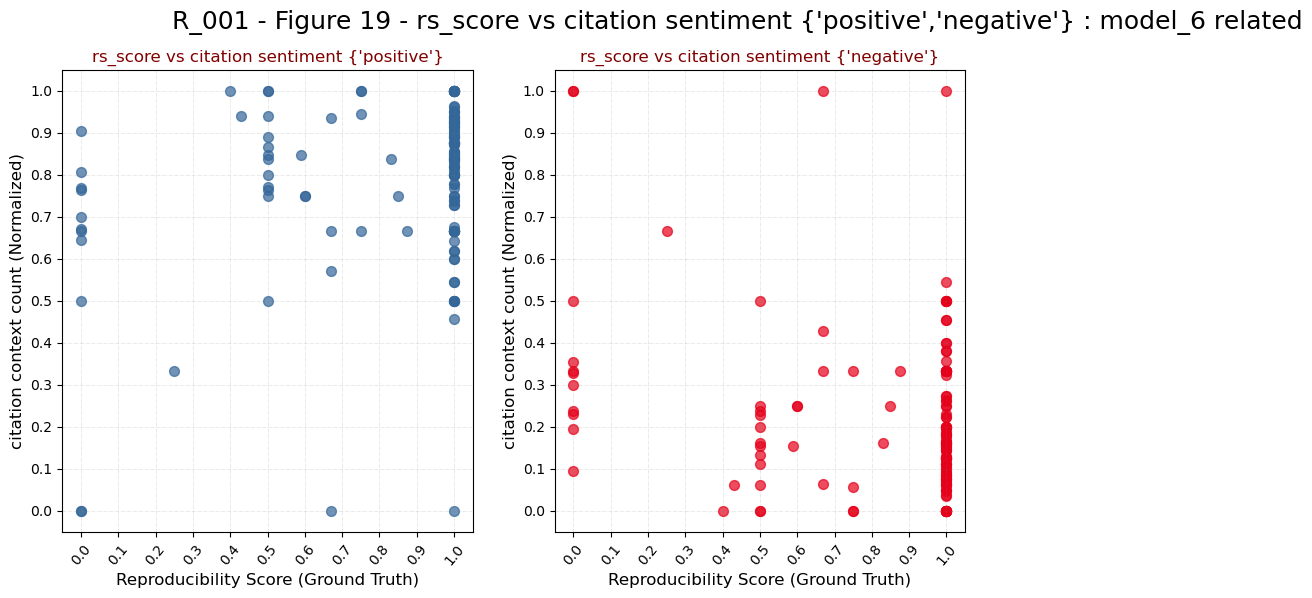

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009))  


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(131)
p1 = plt.scatter(rs_score, positive_norm,color=(0.2, 0.4, 0.6, 0.7), s=50) 

plt.suptitle("R_001 - Figure 19 - rs_score vs citation sentiment {'positive','negative'} : model_6 related",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(132)
p2 = plt.scatter(rs_score, negative_norm,color=(0.9, 0.0, 0.1, 0.7), s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
plt.ylabel(f"citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='maroon')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



# plt.subplot(133)
# p3 = plt.scatter(rs_score, neutral_norm,color=(0.2, 0.9, 0.3, 0.7), s=50) 

# plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
# plt.yticks(np.arange(0.0, 1.01, step=0.1))
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12)
# plt.ylabel(f"citation context count (Normalized)",fontsize=12)
# plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='maroon')
# plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

# plt.savefig("plots/R_001_Figure_19_rs_score_vs_citation_sentiment_model_0_related.png",pad_inches=1)
plt.show()

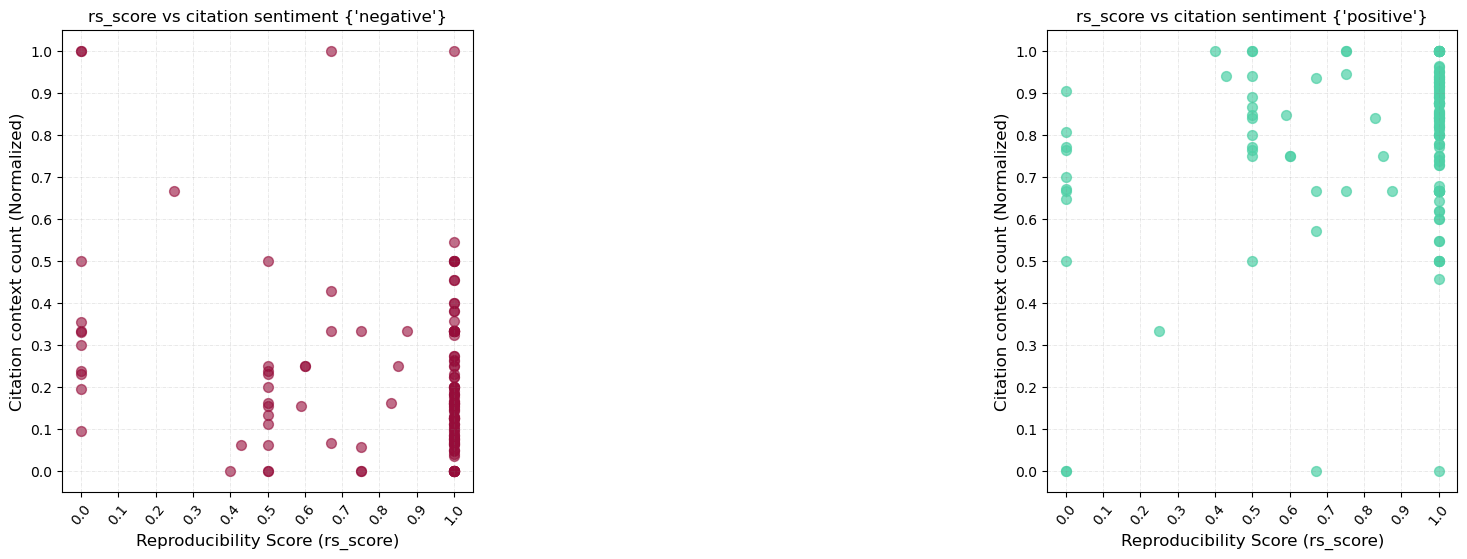

In [298]:

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

import matplotlib.pyplot as plt
import numpy as np

# context_score = list(map(lambda x: x['cntxt_scr_agg_norm'],list_with_both_XY_009)) 

positive_norm = list(map(lambda x: x['p_norm'],list_with_both_XY_009)) 
negative_norm = list(map(lambda x: x['n_norm'],list_with_both_XY_009)) 


data_points = list(map(lambda x: x['key_for_all_RS'][:6],list_with_both_XY_009)) 
rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


fig = plt.figure(figsize = (18, 6))


plt.subplot(133)
p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



plt.subplot(131)
p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50)  

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)



# plt.subplot(132)
# p3 = plt.scatter(rs_score, neutral_norm,color=colors['blue'], s=50) 
# # p2 = plt.scatter(rs_score, negative_norm,color=colors['red'], s=50) 
# # p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 
# plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
# plt.yticks(np.arange(0.0, 1.01, step=0.1))
# plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
# plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
# plt.title("rs_score vs citation sentiment {'neutral'}", fontsize=12, color='black')
# plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)




# [plt.text(i+0.015, j, f'{k}',fontsize=9, color=np.random.rand(3,)) for (i, j,k) in zip(rs_score, context_score,data_points)]
# [plt.text(i+0.015, j, f'{k}',fontsize=9, color='gray') for (i, j,k) in zip(rs_score_14, context_score_14,data_points_14)]

plt.show()

# enitre citation context behaviour over different rs_scores 

In [553]:
# df_sentiment = pd.read_csv(r'sentiment_analysis/sa_from_model_6_related_only_with_neutrals.csv')
df_sentiment = pd.read_csv(r'sentiment_analysis/sentiment_analysis_from_model_6_related_only.csv')

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

# citation_context_behaviour_m72_with_unrelated = {}
citation_context_behaviour = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
#     item.update({"total_neutrals":sum(df_['neutral_unrelated'])})
    item.update({"rs_score":float(i*0.1)})

# df_citation_context_behaviour["pos_neg_ratio_norm"] = (df_citation_context_behaviour["total_positives_norm"]/ (df_citation_context_behaviour["total_negatives_norm"])).fillna(0)


#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour.update({df_name:item})
    
    
citation_context_behaviour   


# df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')

# with open("sentiment_analysis/sentiment_analysis_model_6_related_only_count_summary.json", "w") as outfile: 
#     json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative    p_norm    n_norm  \
119  RS_134_ICDAR_2018_01       0.0        49        24  0.671233  0.328767   
120  RS_135_ICDAR_2018_02       0.0         2         2  0.500000  0.500000   
122  RS_137_ICDAR_2018_04       0.0        19         2  0.904762  0.095238   
123  RS_138_ICDAR_2018_05       0.0        29         9  0.763158  0.236842   
125  RS_140_ICDAR_2018_07       0.0         2         1  0.666667  0.333333   
126  RS_141_ICDAR_2018_08       0.0        10         3  0.769231  0.230769   
127  RS_142_ICDAR_2018_09       0.0        25         6  0.806452  0.193548   
130  RS_145_ICDAR_2018_12       0.0        14         6  0.700000  0.300000   
131  RS_147_ICDAR_2018_14       0.0        31        17  0.645833  0.354167   
132  RS_148_ICDAR_2018_15       0.0         0         1  0.000000  1.000000   
133  RS_149_ICDAR_2018_16       0.0         0         1  0.000000  1.000000   

     total_contexts_count  
119                    

{'df_sentiment_00': {'number_of_cited_papers': 11,
  'total_positives': 181,
  'total_negatives': 72,
  'rs_score': 0.0},
 'df_sentiment_01': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'rs_score': 0.1},
 'df_sentiment_02': {'number_of_cited_papers': 1,
  'total_positives': 2,
  'total_negatives': 4,
  'rs_score': 0.2},
 'df_sentiment_03': {'number_of_cited_papers': 0,
  'total_positives': 0,
  'total_negatives': 0,
  'rs_score': 0.30000000000000004},
 'df_sentiment_04': {'number_of_cited_papers': 2,
  'total_positives': 32,
  'total_negatives': 2,
  'rs_score': 0.4},
 'df_sentiment_05': {'number_of_cited_papers': 13,
  'total_positives': 470,
  'total_negatives': 115,
  'rs_score': 0.5},
 'df_sentiment_06': {'number_of_cited_papers': 6,
  'total_positives': 47,
  'total_negatives': 11,
  'rs_score': 0.6000000000000001},
 'df_sentiment_07': {'number_of_cited_papers': 4,
  'total_positives': 26,
  'total_negatives': 2,
  'rs_score': 0.7000000000000001

In [554]:
sum_p = 0
for item in citation_context_behaviour.values():
# for item in citation_context_behaviour_m72_with_unrelated.values():
    sum_p+=item['total_positives'] 
sum_p

10457

In [555]:
sum_n = 0
for item in citation_context_behaviour.values():
# for item in citation_context_behaviour_m72_with_unrelated.values():
    sum_n+=item['total_negatives'] 
sum_n

1985

In [299]:
sum_n = 0
for item in citation_context_behaviour.values():
# for item in citation_context_behaviour_m72_with_unrelated.values():
    sum_n+=item['total_neutrals'] 
sum_n

KeyError: 'total_neutrals'

In [556]:

df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

df_citation_context_behaviour["total_contexts"] = (df_citation_context_behaviour["total_positives"]\
                                                   +df_citation_context_behaviour["total_negatives"])
df_citation_context_behaviour["avg_total_contexts_per_paper"] = ((df_citation_context_behaviour["total_positives"]\
                                                             +df_citation_context_behaviour["total_negatives"])/(df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_per_paper"] = (df_citation_context_behaviour["total_positives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)
df_citation_context_behaviour["total_negatives_per_paper"] = (df_citation_context_behaviour["total_negatives"]/ (df_citation_context_behaviour["number_of_cited_papers"])).fillna(0)


df_citation_context_behaviour["total_positives_norm"] = (df_citation_context_behaviour["total_positives_per_paper"]\
                                                         / (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)
df_citation_context_behaviour["total_negatives_norm"] = (df_citation_context_behaviour["total_negatives_per_paper"]/ (df_citation_context_behaviour["avg_total_contexts_per_paper"])).fillna(0)

df_citation_context_behaviour["pos_neg_ratio_norm"] = (df_citation_context_behaviour["total_positives_norm"]/ (df_citation_context_behaviour["total_negatives_norm"])).fillna(0)

df_citation_context_behaviour.to_csv('sentiment_analysis/sentiment_analysis_from_model_6_related_only_rs_11_bins.csv',index=False)

# def normalize_counts(dict_item):
#     # ignoring 0 values
#     total_citation_context_count = dict_item['total_positives'] + dict_item['total_negatives'] + dict_item['total_neutrals'] 
    
#     positive = dict_item['positive']
#     negative = dict_item['negative']
#     neutral = dict_item['neutral']
    
#     if total_citation_context_count == 0:
#         positive_norm = 0
#         negative_norm = 0
#         neutral_norm = 0
#     else:
# #         ret =(((_minus_2 + _minus_1 + _point_5 + _one)/(total_labels_count)) - (-2) ) / (1-(-2))
#         positive_norm = (positive)/(total_citation_context_count)
#         negative_norm = (negative)/(total_citation_context_count)
#         neutral_norm = (neutral)/(total_citation_context_count)

#     # returning the normalized value
#     return positive_norm, negative_norm, neutral_norm, total_citation_context_count

df_citation_context_behaviour

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              181               72   
1   df_sentiment_01                       0                0                0   
2   df_sentiment_02                       1                2                4   
3   df_sentiment_03                       0                0                0   
4   df_sentiment_04                       2               32                2   
5   df_sentiment_05                      13              470              115   
6   df_sentiment_06                       6               47               11   
7   df_sentiment_07                       4               26                2   
8   df_sentiment_08                       3               33                8   
9   df_sentiment_09                       0                0                0   
10  df_sentiment_10                      94             9666             1771   

    rs_score  total_contexts  avg_total_contexts_per_paper  \
0        0.0             253                     23.000000   
1        0.1               0                      0.000000   
2        0.2               6                      6.000000   
3        0.3               0                      0.000000   
4        0.4              34                     17.000000   
5        0.5             585                     45.000000   
6        0.6              58                      9.666667   
7        0.7              28                      7.000000   
8        0.8              41                     13.666667   
9        0.9               0                      0.000000   
10       1.0           11437                    121.670213   

    total_positives_per_paper  total_negatives_per_paper  \
0                   16.454545                   6.545455   
1                    0.000000                   0.000000   
2                    2.000000                   4.000000   
3                    0.000000                   0.000000   
4                   16.000000                   1.000000   
5                   36.153846                   8.846154   
6                    7.833333                   1.833333   
7                    6.500000                   0.500000   
8                   11.000000                   2.666667   
9                    0.000000                   0.000000   
10                 102.829787                  18.840426   

    total_positives_norm  total_negatives_norm  pos_neg_ratio_norm  
0               0.715415              0.284585            2.513889  
1               0.000000              0.000000            0.000000  
2               0.333333              0.666667            0.500000  
3               0.000000              0.000000            0.000000  
4               0.941176              0.058824           16.000000  
5               0.803419              0.196581            4.086957  
6               0.810345              0.189655            4.272727  
7               0.928571              0.071429           13.000000  
8               0.804878              0.195122            4.125000  
9               0.000000              0.000000            0.000000  
10              0.845152              0.154848            5.457933

In [557]:
df_ccb_removed_data =  df_citation_context_behaviour[df_citation_context_behaviour['number_of_cited_papers']>10]
df_ccb_removed_data


index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              181               72   
5   df_sentiment_05                      13              470              115   
10  df_sentiment_10                      94             9666             1771   

    rs_score  total_contexts  avg_total_contexts_per_paper  \
0        0.0             253                     23.000000   
5        0.5             585                     45.000000   
10       1.0           11437                    121.670213   

    total_positives_per_paper  total_negatives_per_paper  \
0                   16.454545                   6.545455   
5                   36.153846                   8.846154   
10                 102.829787                  18.840426   

    total_positives_norm  total_negatives_norm  pos_neg_ratio_norm  
0               0.715415              0.284585            2.513889  
5               0.803419              0.196581            4.086957  
10              0.845152              0.154848            5.457933

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


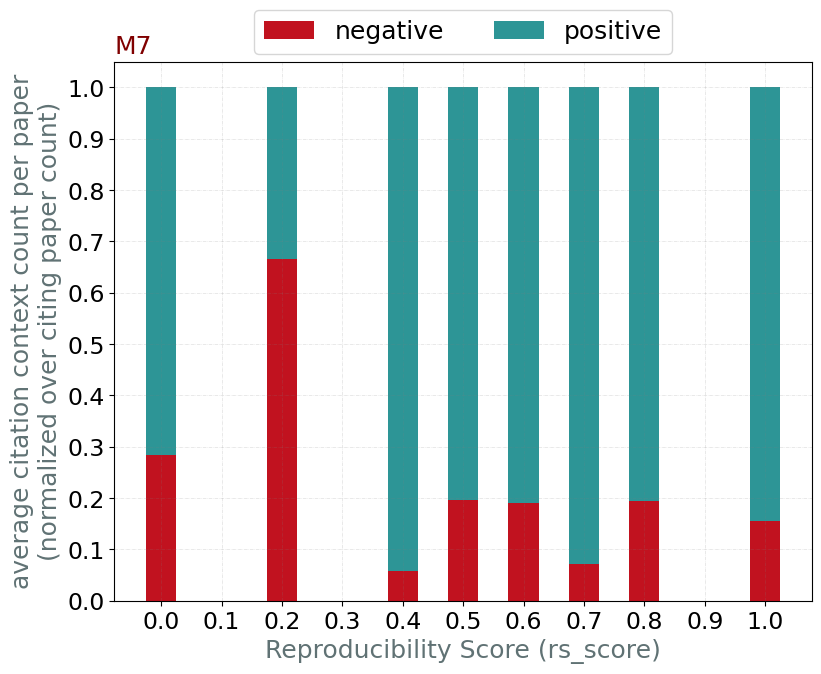

In [558]:
width = 0.05

# fig,ax = plt.figure(figsize = (10,8)

# keys_ = df_citation_context_behaviour['rs_score']
# X_axis = keys_
X_axis = np.arange(0.0, 1.1, step=0.1)

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
# other_two = df_citation_context_behaviour['total_neutrals_norm'] + df_citation_context_behaviour['total_positives_norm']

fig, ax = plt.subplots(figsize = (9, 7))
bottom = np.zeros(len(positives))


plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=17)
plt.yticks(np.arange(0, 1.1, step=0.1),fontsize=17)


plt.xlabel("Reproducibility Score (rs_score)",fontsize=18,color='#607274')
plt.ylabel(f"average citation context count per paper\n(normalized over citing paper count)",fontsize=18,color='#607274')

plt.title("M7",fontsize=18,color='maroon', loc='left')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
plt.legend(fontsize="14",title="sentiment",title_fontsize="x-large",fancybox=True) 

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)

p = ax.bar(X_axis, negatives, width, label='negative', bottom=bottom,color='#c1121f')   #e76f51
bottom += negatives
p2 = ax.bar(X_axis, positives, width, label='positive', bottom=bottom,color='#2D9596')



# ax.set_title("Number of penguins with above average body mass")
# ax.legend(fontsize="14",title="",title_fontsize="large",fancybox=True,loc="upper left")
ax.legend(fontsize="18",title="",title_fontsize="large",fancybox=True,loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=2)


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


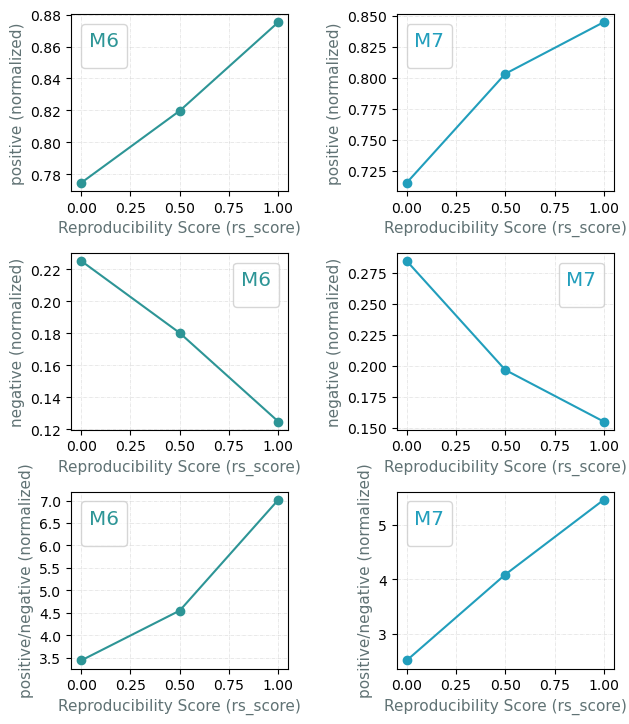

In [587]:
# Dr Wu's graphs

import matplotlib.pyplot as plt
import numpy as np

# positives = df_citation_context_behaviour['total_positives_norm']
# negatives = df_citation_context_behaviour['total_negatives_norm']

df_ccb_removed_data_all_42000

# newly added line
# df_ccb_removed_data = df_ccb_removed_data_m72 


# fig,ax = plt.figure(figsize = (10,8)

keys_ = df_citation_context_behaviour['rs_score']
X_axis = keys_
# rs_score = list(map(lambda x: x['rs_score'],list_with_both_XY_009)) 


# fig = 
plt.figure(figsize = (7, 8.5))
plt.tight_layout()
plt.subplots_adjust(hspace=0.35,wspace=0.5)


# plt.subplot(133)
# p1 = plt.scatter(rs_score, positive_norm,color=colors['green'], s=50) 

# # plt.suptitle("R_001 - Figure 16 - rs_score vs citation sentiment {'positive','negative','neutral'} : majority voting",fontsize=18)

# plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50)
# plt.yticks(np.arange(0.0, 1.01, step=0.1))
# plt.xlabel("Reproducibility Score (rs_score)",fontsize=12)
# plt.ylabel(f"Citation context count (Normalized)",fontsize=12)
# plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
# plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)

# p1 = plt.plot(df_ccb_removed_data_all_42000['rs_score'], df_ccb_removed_data_all_42000['total_positives_norm'], linestyle='-', marker='o',color='maroon')


plt.subplot(322)
p1 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['total_positives_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.6, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#219ebc')

plt.subplot(324)
p2 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['total_negatives_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 0.5, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper right")
plt.setp(legend.get_title(), color='#219ebc')


plt.subplot(326)
p2 = plt.plot(df_ccb_removed_data['rs_score'], df_ccb_removed_data['pos_neg_ratio_norm'], linestyle='-', marker='o',color='#219ebc')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 1.01, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive/negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive/negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M7",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#219ebc')


# ---------------- all 42000 below

plt.subplot(321)
p1 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['total_positives_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.1, 0.4, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#2D9596')

plt.subplot(323)
p2 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['total_negatives_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
# plt.yticks(np.arange(0.0, 0.5, step=0.1))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper right")
plt.setp(legend.get_title(), color='#2D9596')


plt.subplot(325)
p2 = plt.plot(df_ccb_removed_data_all_42000_binary['rs_score'], df_ccb_removed_data_all_42000_binary['pos_neg_ratio_norm'], linestyle='-', marker='o',color='#2D9596')
# plt.xticks(keys_,rotation=50)
plt.yticks(np.arange(3.5, 7.01, step=0.5))
plt.xlabel("Reproducibility Score (rs_score)",fontsize=11,color='#607274')
plt.ylabel(f"positive/negative (normalized)",fontsize=11,color='#607274')
# plt.title("rs_score vs citation sentiment {'positive/negative'}", fontsize=12, color='black')
plt.grid(color='gray', linestyle='-.', linewidth=0.4, alpha=0.3)
# plt.legend()
legend =plt.legend(fontsize="14",title="M6",title_fontsize="x-large",fancybox=True,loc="upper left")
plt.setp(legend.get_title(), color='#2D9596')


plt.show()

In [406]:
df_ccb_removed_data_all_42000

index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              337               98   
5   df_sentiment_05                      13              678              149   
10  df_sentiment_10                      94            14755             2102   

    total_neutrals  rs_score  total_positives_log  total_negatives_log  \
0              853         0             5.823046             4.595120   
5             1153         5             6.520621             5.010635   
10           21057        10             9.599405             7.651120   

    total_neutrals_log  total_contexts  avg_total_contexts_per_paper  \
0             6.749931            1288                    117.090909   
5             7.050989            1980                    152.307692   
10            9.955036           37914                    403.340426   

    total_positives_per_paper  total_negatives_per_paper  \
0                   30.636364                   8.909091   
5                   52.153846                  11.461538   
10                 156.968085                  22.361702   

    total_neutrals_per_paper  total_positives_norm  total_negatives_norm  \
0                  77.545455              0.261646              0.076087   
5                  88.692308              0.342424              0.075253   
10                224.010638              0.389170              0.055441   

    total_neutrals_norm  
0              0.662267  
5              0.582323  
10             0.555389

In [181]:
# df_citation_context_behaviour = pd.DataFrame.from_dict(citation_context_behaviour, orient='index')
# df_citation_context_behaviour = df_citation_context_behaviour.reset_index()
# df_citation_context_behaviour

# df_citation_context_behaviour["total_positives_log"] = np.log(df_citation_context_behaviour["total_positives"]+1)
# df_citation_context_behaviour["total_negatives_log"] = np.log(df_citation_context_behaviour["total_negatives"]+1)
# df_citation_context_behaviour["total_neutrals_log"] = np.log(df_citation_context_behaviour["total_neutrals"]+1)

# df_citation_context_behaviour
# # print(df_citation_context_behaviour)

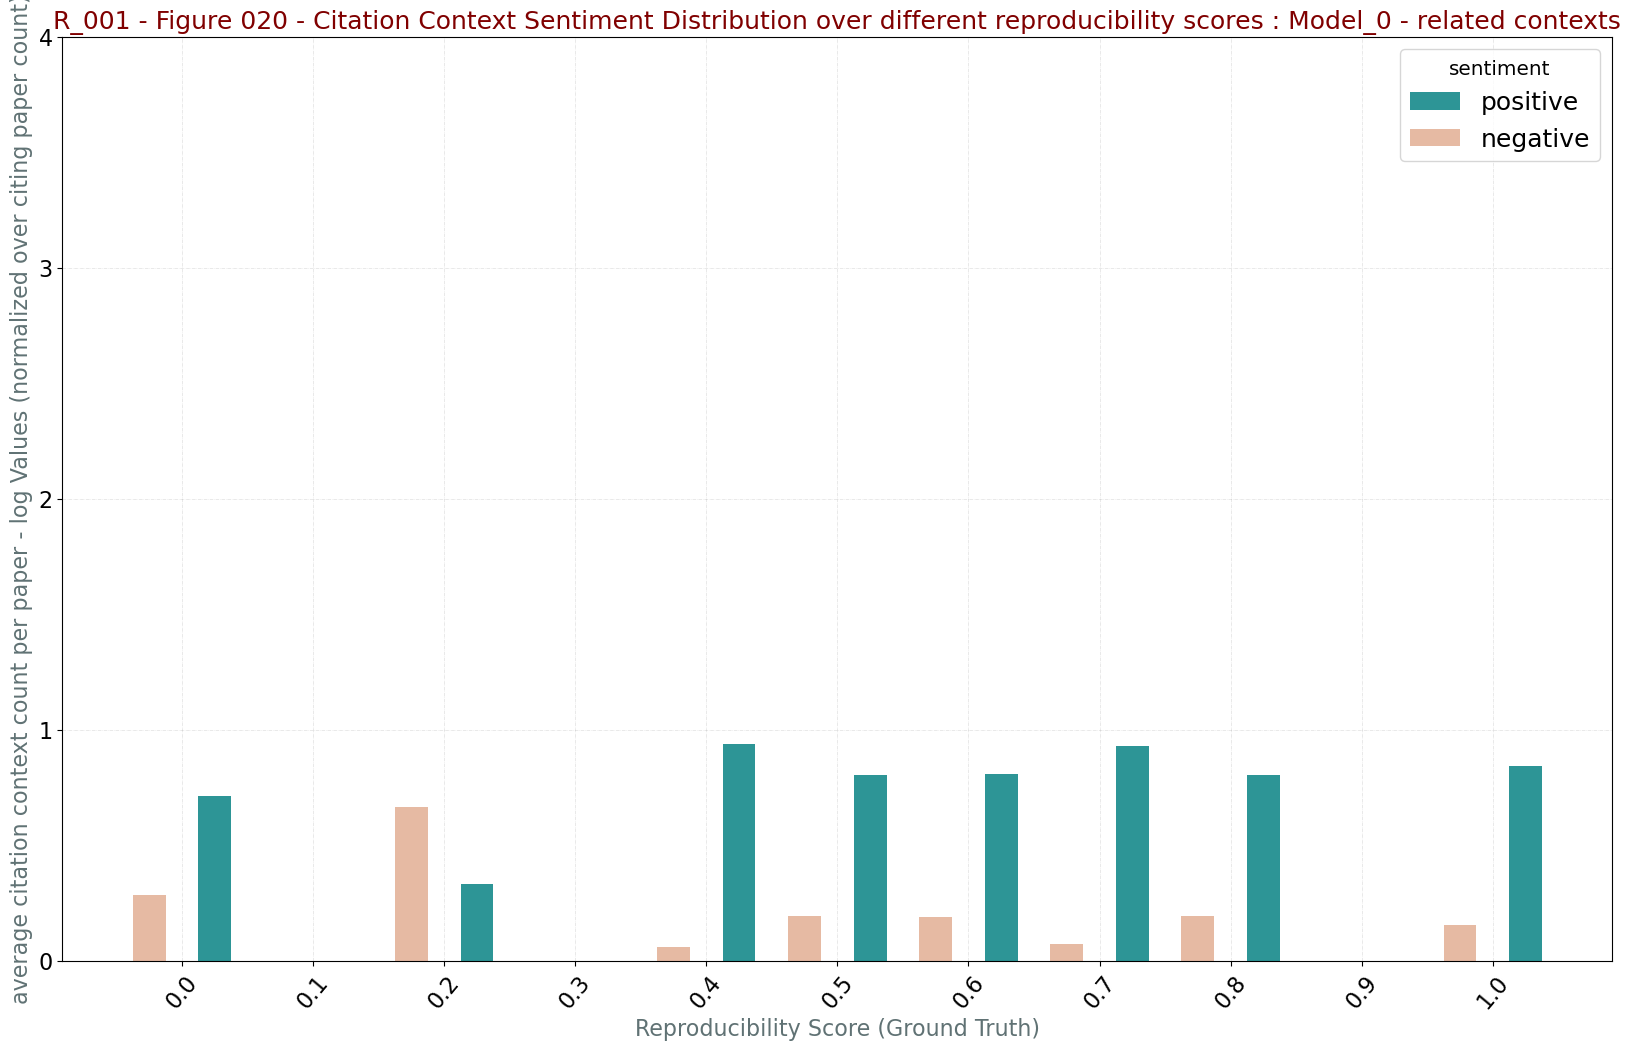

In [316]:
keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

# positives = df_citation_context_behaviour['total_positives']
# negatives = df_citation_context_behaviour['total_negatives']
# neutrals = df_citation_context_behaviour['total_neutrals']

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
# neutrals = df_citation_context_behaviour['total_neutrals_norm']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)


# plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
# plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 


plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values (normalized over citing paper count)",fontsize=16,color='#607274')

plt.title("R_001 - Figure 020 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()

# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)


plt.show() 

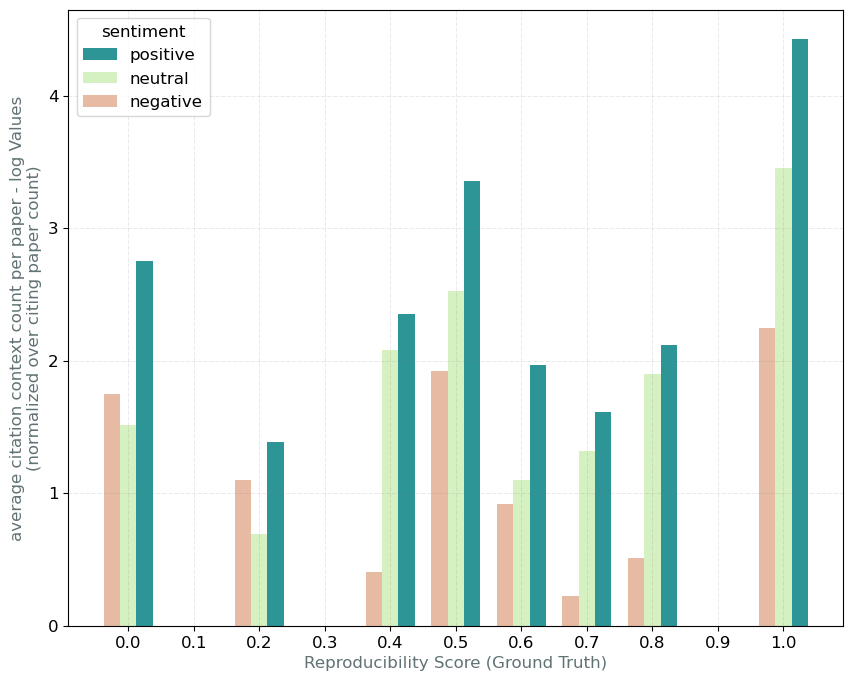

In [83]:
# figure 17 for paper


keys_ = df_citation_context_behaviour['rs_score']
keys_

# positives = df_citation_context_behaviour['total_positives_log']
# negatives = df_citation_context_behaviour['total_negatives_log']
# neutrals = df_citation_context_behaviour['total_neutrals_log']

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=0,fontsize=12)

# plt.bar(X_axis + 0.025, positives, label = 'positive', color=colors['purple'], width = 0.025)     
plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=12)
# plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='purple')
# plt.xlabel("Reproducibility Score (rs_score)",fontsize=12,color="#747264")
# plt.ylabel(f"Citation context count (log values)",fontsize=12,color="#747264")
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=12,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values\n(normalized over citing paper count)",fontsize=12,color='#607274')


# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()



  
# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="12",title="sentiment",title_fontsize="large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_017_Citation_Context_Sentiment_Distribution_majority_voting.png",pad_inches=2)


plt.show() 

In [ ]:
#negative fraction

keys_ = df_citation_context_behaviour['rs_score']
keys_
# values = list(all_files.values())

positives = df_citation_context_behaviour['total_positives_norm']
negatives = df_citation_context_behaviour['total_negatives_norm']
neutrals = df_citation_context_behaviour['total_neutrals_norm']

# _strong = list(map(lambda x: x['1'],all_files.values())) 

X = keys_

fig = plt.figure(figsize = (20, 12))
  
X_axis = np.arange(0.0, 1.1, step=0.1)

colors = {'green':(0.5, 0.8, 0.2, 0.7),
          'blue':(0.2, 0.4, 0.6, 0.7),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(np.arange(0.0, 1.1, step=0.1),rotation=50,fontsize=16)


# plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025)     
# plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
# plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 


plt.bar(X_axis + 0.025, positives, label = 'positive', color='#2D9596', width = 0.025) 
plt.bar(X_axis, neutrals, label = 'neutral', color="#D5F0C1", width = 0.025) 
plt.bar(X_axis - 0.025 , negatives, label = 'negative', color="#E6BAA3", width = 0.025) 

# plt.bar(X_axis - 0.15, _p_nr, label = '-1_P-NR', color=colors['yellow'], width = 0.15) 
# plt.bar(X_axis - 0.3, _o_nr, label = '-2_O-NR', color=colors['gray'], width = 0.15) 

 
# # creating the bar plot
# # plt.bar(keys_, counts, color=(0.2, 0.4, 0.6, 0.7),width = 0.8)

# # plt.rc('xtick', labelsize=8)

# # plt.xticks(rotation=90,fontsize=8)
plt.yticks(np.arange(0, 5, step=1),fontsize=16)
plt.xlabel("Reproducibility Score (Ground Truth)",fontsize=16,color='#607274')
plt.ylabel(f"average citation context count per paper - log Values (normalized over citing paper count)",fontsize=16,color='#607274')

plt.title("R_001 - Figure 020 - Citation Context Sentiment Distribution over different reproducibility scores : Model_0 - related contexts",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

# plt.show()

# # plt.xticks(X_axis, X,rotation=-45,fontsize=16, ha="left") 
# # plt.xticks(X_axis, X,rotation=45,fontsize=10, ha="right",rotation_mode="anchor") 
# plt.xticks(X_axis, X,fontsize=10, ha="center",rotation_mode="anchor") 

# # plt.xlabel("Groups") 
# # plt.ylabel("Number of Students") 
# # plt.title("Number of Students in each group") 
plt.legend(fontsize="18",title="sentiment",title_fontsize="x-large",fancybox=True) 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

# plt.savefig("plots/R_001_Figure_020_Citation_Context_Sentiment_Distribution_Model_0_related_only.png",pad_inches=2)


plt.show() 

In [250]:
# T test
# all 42091

import numpy as np
from scipy.stats import ttest_ind

res_142_positive = ttest_ind(df_citation_context_behaviour_all_42000['total_positives_norm'], df_citation_context_behaviour_all_42000['rs_score'])
res_142_negative = ttest_ind(df_citation_context_behaviour_all_42000['total_negatives_norm'], df_citation_context_behaviour_all_42000['rs_score'])

print("142 data points - positives vs rs_score")
print("T static: ",res_142_positive.statistic)
print("p value : ",res_142_positive.pvalue)

print("\n\n142 data points - positives vs rs_score")
print("T static: ",res_142_negative.statistic)
print("p value : ",res_142_negative.pvalue)



142 data points - positives vs rs_score
T static:  -4.778684434254536
p value :  0.00011451794887699239


142 data points - positives vs rs_score
T static:  -4.946291284622955
p value :  7.7769902451872e-05


In [256]:
# T test
# related only 12442

import numpy as np
from scipy.stats import ttest_ind

res_134_positive = ttest_ind(df_citation_context_behaviour['total_positives_norm'], df_citation_context_behaviour['rs_score'])
res_134_negative = ttest_ind(df_citation_context_behaviour['total_negatives_norm'], df_citation_context_behaviour['rs_score'])

print("134 data points - positives vs rs_score")
print("T static: ",res_134_positive.statistic)
print("p value : ",res_134_positive.pvalue)

print("\n\n142 data points - negatives vs rs_score")
print("T static: ",res_134_negative.statistic)
print("p value : ",res_134_negative.pvalue)



134 data points - positives vs rs_score
T static:  -4.552947649455803
p value :  0.00019339539425193756


142 data points - positives vs rs_score
T static:  -4.90594485749812
p value :  8.534681176194764e-05


In [453]:
# T test
# related only 12442 df_ccb_removed_data

import numpy as np
from scipy.stats import ttest_ind

res_134_positive = ttest_ind(df_ccb_removed_data['total_positives_norm'], df_ccb_removed_data['rs_score'])
res_134_negative = ttest_ind(df_ccb_removed_data['total_negatives_norm'], df_ccb_removed_data['rs_score'])

print("134 data points - positives vs rs_score")
print("T static: ",res_134_positive.statistic)
print("p value : ",res_134_positive.pvalue)

print("\n\n142 data points - negatives vs rs_score")
print("T static: ",res_134_negative.statistic)
print("p value : ",res_134_negative.pvalue)



df_ccb_removed_data

134 data points - positives vs rs_score
T static:  0.9890060857100915
p value :  0.3786469121442174


142 data points - negatives vs rs_score
T static:  -0.9890060857100912
p value :  0.3786469121442176


index  number_of_cited_papers  total_positives  total_negatives  \
0   df_sentiment_00                      11              181               72   
5   df_sentiment_05                      13              470              115   
10  df_sentiment_10                      94             9666             1771   

    rs_score  total_contexts  avg_total_contexts_per_paper  \
0        0.0             253                     23.000000   
5        0.5             585                     45.000000   
10       1.0           11437                    121.670213   

    total_positives_per_paper  total_negatives_per_paper  \
0                   16.454545                   6.545455   
5                   36.153846                   8.846154   
10                 102.829787                  18.840426   

    total_positives_norm  total_negatives_norm  pos_neg_ratio_norm  
0               0.715415              0.284585            2.513889  
5               0.803419              0.196581            4.086957  
10              0.845152              0.154848            5.457933

In [452]:
# T test
# all 42091

import numpy as np
from scipy.stats import ttest_ind

res_142_positive = ttest_ind(df_ccb_removed_data_all_42000['total_positives_norm'], df_ccb_removed_data_all_42000['rs_score'])
res_142_negative = ttest_ind(df_ccb_removed_data_all_42000['total_negatives_norm'], df_ccb_removed_data_all_42000['rs_score'])

print("142 data points - positives vs rs_score")
print("T static: ",res_142_positive.statistic)
print("p value : ",res_142_positive.pvalue)

print("\n\n142 data points - positives vs rs_score")
print("T static: ",res_142_negative.statistic)
print("p value : ",res_142_negative.pvalue)

142 data points - positives vs rs_score
T static:  -0.5803445524750458
p value :  0.5928055617734629


142 data points - positives vs rs_score
T static:  -1.4928732603496584
p value :  0.20975897492552362


In [ ]:
sentiment_analysis\inferences_5_models

In [18]:
%pwd

'C:\\Users\\Lemos\\OneDrive\\OneDrive - Old Dominion University\\Lemos_OneDrive_odu_windows\\Research_ODU\\R001_Fall_2023_AI_Reproducibility'

In [48]:
label_file_list = [i for i in glob.glob(r"sentiment_analysis/inferences_5_models/*.csv")]

df_001 = pd.read_csv(label_file_list[26])
df_001.head(10)

text m1_label  m1_score  \
0  To do this, we leverage resuls from [2], [3], ...  neutral  0.998718   
1  We also consider the popular data valuation ap...  neutral  0.999110   
2  For larger datasets, since it is impractical t...  neutral  0.998483   
3  For LC estimation, we use Monte Carlo (MC) app...  neutral  0.998909   
4  In the experiment, when we talk about the LC, ...  neutral  0.998813   
5  As a side note, the Shapley value estimated by...  neutral  0.800081   
6  We follow Yan & Procaccia (2020) and define th...  neutral  0.998843   
7  When σ = 0, Theorem 2 recovers Theorem 2 in Ya...  neutral  0.999011   
8  In this paper, when we talk about the least co...  neutral  0.998790   

   m2_label  m2_score  m3_label  m3_score  m4_label  m4_score  m5_label  \
0  positive  0.810382  positive  0.568193  positive  0.636716  positive   
1   neutral  0.997651   neutral  0.891309   neutral  0.856406   neutral   
2   neutral  0.996990   neutral  0.957657   neutral  0.742407  negative   
3   neutral  0.986107   neutral  0.955312   neutral  0.867865   neutral   
4   neutral  0.995083   neutral  0.919721   neutral  0.862674   neutral   
5  positive  0.969050   neutral  0.874789   neutral  0.464547  negative   
6   neutral  0.990816   neutral  0.974923   neutral  0.922695   neutral   
7   neutral  0.959193   neutral  0.960041   neutral  0.848683   neutral   
8   neutral  0.994669   neutral  0.915684   neutral  0.851528   neutral   

   m5_score majority_vote  
0  0.409276      positive  
1  0.623695       neutral  
2  0.631123       neutral  
3  0.591377       neutral  
4  0.609109       neutral  
5  0.527507       neutral  
6  0.647685       neutral  
7  0.525549       neutral  
8  0.609320       neutral

In [4]:
# Dr. Wu's Graph

df_excel_ = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_excel_.head()

df_excel_ = df_excel_.iloc[:133] # filtering only reproducibility challenges
df_excel_
# x = df_excel_["valid_citation_context_count"]
# x

key_for_all_RS                                           title_rs  \
0    RS_001_MLRC_2022_01  [Re] $\mathcal{G}$-Mixup: Graph Data Augmentat...   
1    RS_002_MLRC_2022_02  [Re] Exact Feature Distribution Matching for A...   
2    RS_003_MLRC_2022_03  [Re] End-to-end Algorithm Synthesis with Recur...   
3    RS_004_MLRC_2022_04  [Re] Label-Free Explainability for Unsupervise...   
4    RS_005_MLRC_2022_05  [Re] Exploring the Representation of Word Mean...   
..                   ...                                                ...   
128  RS_129_ICLR_2019_01                ICLR Reproducibility Challenge 2019   
129  RS_130_ICLR_2019_02  [Re] Meta-learning with differentiable closed-...   
130  RS_131_ICLR_2019_03                     [Re] Variational Sparse Coding   
131  RS_132_ICLR_2019_04  [Re] Learning Neural PDE Solvers with Converge...   
132  RS_133_ICLR_2019_05  [Re] h-detach: Modifying the LSTM gradient tow...   

                                            authors_rs article_type  \
0                ['Ermin Omeragic', 'Vuk ÄuranoviÄ‡']  Replication   
1    ['Mert Erkol', 'Furkan KÄ±nlÄ±', 'BarÄ±ÅŸ Ã–zc...  Replication   
2          ['Sean Michael McLeish', 'Long Tran-Thanh']  Replication   
3    ['Eric Langezaal', 'Jesse Belleman', 'Joeri No...  Replication   
4                  ['Matteo Brivio', 'Cagri Coltekin']  Replication   
..                                                 ...          ...   
128  Pineau, Joelle and Sinha, Koustuv and Fried, G...    Editorial   
129  Devos, Arnout and Chatel, Sylvain and Grossgla...  Replication   
130          la Fuente, Alfredo De and Aduviri, Robert  Replication   
131  Bardi, Francesco and {von Baussnern}, Samuel a...  Replication   
132                                   Didolkar, Aniket  Replication   

                                              keywords  \
0    ['rescience c', 'machine learning', 'data augm...   
1    ['feature distribution matching', 'style trans...   
2    ['rescience c', 'Algorithmic Reasoning', 'Deep...   
3    ['Reproducibility', 'label-free', 'unsupervise...   
4    ['BERT', 'fastText', 'embeddings', 'language m...   
..                                                 ...   
128  machine learning, ICLR, reproducibility challenge   
129  Machine Learning, Meta-Learning, Few-Shot, Dee...   
130  generative models, variational autoencoders, s...   
131    PDE, PDE Solver, Deep Learning, Python, PyTorch   
132  Machine Learning, ICLR Reproducibility Challen...   

                                              abstract  \
0    Scope of Reproducibility\nThis paper presents ...   
1    Reproducibility Summary:\n\nIn this reproducib...   
2    Scope of Reproducibility:\nIn this report, we ...   
3    Scope of Reproducibility â€” This study is an ...   
4    This report summarizes our efforts to reproduc...   
..                                                 ...   
128                         DO EXTRACT FROM review_url   
129                         DO EXTRACT FROM review_url   
130                         DO EXTRACT FROM review_url   
131                         DO EXTRACT FROM review_url   
132                         DO EXTRACT FROM review_url   

                                            pdf_url_rs  \
0    /pdf/8c87cb1e84e1482826c40a3b0c43928eaef747f3.pdf   
1    /pdf/7bcb577c2a46db29c48234a5b72368053c7ebed3.pdf   
2    /pdf/07d5d68b5873d779bd1fd8c95b9767cb57fe0bc4.pdf   
3    /pdf/7fde4f12c675150699fc376cd097d5b9dad0b4d4.pdf   
4    /pdf/78430c5af33bc892d852b49a5a6e93abeb314c6f.pdf   
..                                                 ...   
128  https://zenodo.org/record/3158244/files/articl...   
129  https://zenodo.org/record/3160540/files/articl...   
130  https://zenodo.org/record/3161734/files/articl...   
131  https://zenodo.org/record/3162890/files/articl...   
132  https://zenodo.org/record/3162114/files/articl...   

                                           code_url_rs  \
0                                                  NaN   
1

In [9]:
df_ = df_excel_[df_excel_['rs_score']!='NOT_RELEVANT'][['key_for_all_RS','rs_score','challenge_year_rs']]
df_
df_["rs_score_new"] = df_["rs_score"].apply(lambda x : 1 if float(x)>0.75 else 0)
df_

df_grouped = df_.groupby(by=["challenge_year_rs","rs_score_new"]).count()
# df_grouped = df_grouped.reset_index()

df_grouped

# df_rs_0 = df_grouped[df_grouped['rs_score_new']==0]
# df_rs_1 =  df_grouped[df_grouped['rs_score_new']==1]
# # df_rs_1

# df_grouped.reset_index()
# # df_2 = df_test.groupby('label_score').count()
# # df_2.reset_index()

# # print(df_grouped)
# # df_excel_.columns

key_for_all_RS  rs_score
challenge_year_rs rs_score_new                          
2019              0                          2         2
                  1                         12        12
2020              0                          3         3
                  1                         20        20
2021              0                          8         8
                  1                         39        39
2022              0                         12        12
                  1                         33        33

In [8]:
df_grouped.sort_values(by='rs_score_new', ascending=True)

challenge_year_rs  rs_score_new  key_for_all_RS  rs_score
0               2019             0               2         2
2               2020             0               3         3
4               2021             0               8         8
6               2022             0              12        12
1               2019             1              12        12
3               2020             1              20        20
5               2021             1              39        39
7               2022             1              33        33

In [41]:
df_ = df_excel_[df_excel_['rs_score']!='NOT_RELEVANT'][['key_for_all_RS','rs_score','challenge_year_rs']]
df_
df_["rs_score_new"] = df_["rs_score"].apply(lambda x : 1 if float(x)>0.75 else 0)
df_

df_grouped = df_.groupby(by=["challenge_year_rs","rs_score_new"]).count()
df_grouped = df_grouped.reset_index()

df_rs_0 = df_grouped[df_grouped['rs_score_new']==0]
df_rs_1 =  df_grouped[df_grouped['rs_score_new']==1]
df_rs_1

# df_grouped.reset_index()
# # df_2 = df_test.groupby('label_score').count()
# # df_2.reset_index()

# # print(df_grouped)
# # df_excel_.columns

challenge_year_rs  rs_score_new  key_for_all_RS  rs_score
1               2019             1              12        12
3               2020             1              20        20
5               2021             1              39        39
7               2022             1              33        33

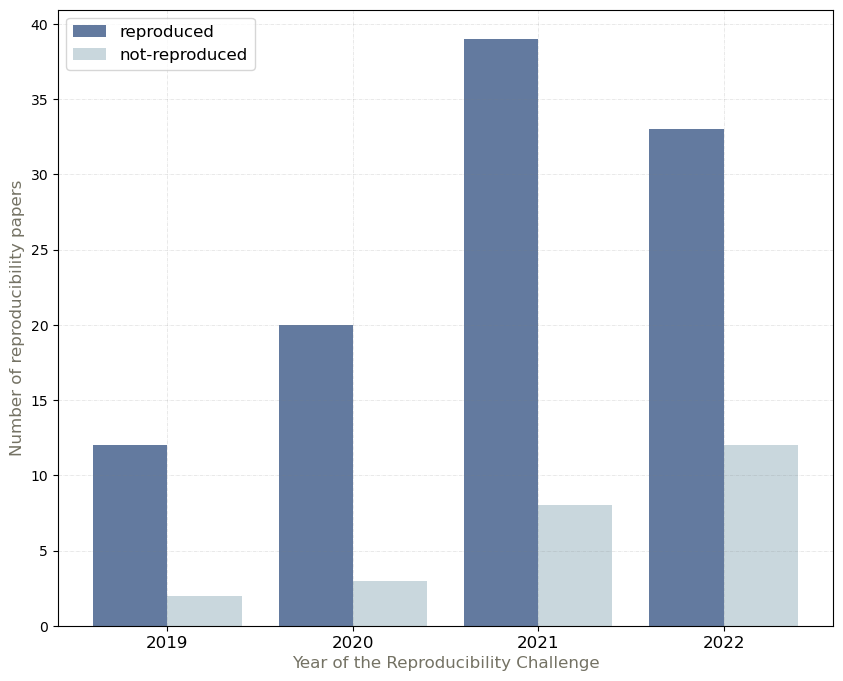

In [62]:
# figure 17 for paper


keys_ = df_rs_1['challenge_year_rs']
keys_

reproducible = df_rs_1['key_for_all_RS']
not_reproducible = df_rs_0['key_for_all_RS']

X = keys_

fig = plt.figure(figsize = (10, 8))
  
X_axis = np.arange(2019,2023, step=1)

colors = {'green':(0.31, 0.82, 0.655,0.7),
          'blue':(0.2, 0.4, 0.6, 0.5),
          'purple':(0.922, 0.129, 0.827, 0.7),
          'yellow':(1, 1, 0.169, 0.7),
          'gray':(0.431, 0.431, 0.412, 0.7),
          'red':(0.588, 0.051, 0.227,0.6)
         }

# # https://rgbcolorpicker.com/0-1

plt.xticks(X,rotation=0,fontsize=12)

plt.bar(X_axis - 0.2, reproducible, label = 'reproduced', color="#637A9F", width = 0.4)     
plt.bar(X_axis+0.2, not_reproducible, color="#C9D7DD", label = 'not-reproduced', width = 0.4)

# # plt.xticks(rotation=90,fontsize=8)
# plt.yticks(np.arange(0, 10, step=1),fontsize=12)

plt.xlabel("Year of the Reproducibility Challenge",fontsize=12,color='#747264')
plt.ylabel(f"Number of reproducibility papers",fontsize=12,color='#747264')

# plt.title("R_001 - Figure 017 - Citation Context Sentiment Distribution over different reproducibility scores : majority voting",fontsize=18,color='maroon')

plt.grid(color='gray', linestyle='-.', linewidth=0.4,alpha=0.3)
# plt.margins(x=0.01, tight=True)

plt.legend(fontsize="12",title="",title_fontsize="large",fancybox=True,loc="upper left") 

# # title_fontsizeint or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}, default: rcParams["legend.title_fontsize"] (default: None)

plt.savefig("plots/DR_WU_reprodicbility_challenges.png",pad_inches=2)


plt.show() 

In [600]:
df_excel_ = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_excel_.columns

df_excel_ = df_excel_[df_excel_['doi_org']!='NOT_RELEVANT']


# x = df_excel_["valid_citation_context_count"]

In [609]:
df_excel__ = df_excel_[['key_for_all_RS','challenge_year_rs','doi_org','venue_name_rs','s2ga_key']]
venue_names = set(df_excel__['venue_name_rs'])
df_excel__

key_for_all_RS  challenge_year_rs  \
0     RS_001_MLRC_2022_01               2022   
1     RS_002_MLRC_2022_02               2022   
2     RS_003_MLRC_2022_03               2022   
3     RS_004_MLRC_2022_04               2022   
4     RS_005_MLRC_2022_05               2022   
..                    ...                ...   
144  RS_145_ICDAR_2018_12               2021   
145  RS_146_ICDAR_2018_13               2021   
146  RS_147_ICDAR_2018_14               2022   
147  RS_148_ICDAR_2018_15               2022   
148  RS_149_ICDAR_2018_16               2021   

                                       doi_org venue_name_rs  \
0    https://doi.org/10.48550/arXiv.2202.07179          MLRC   
1                 10.1109/CVPR52688.2022.00787          MLRC   
2    https://doi.org/10.48550/arXiv.2202.05826          MLRC   
3    https://doi.org/10.48550/arXiv.2203.01928          MLRC   
4                10.18653/v1/2021.acl-long.281          MLRC   
..                                         ...           ...   
144                10.1007/978-3-030-86549-8_7         ICDAR   
145                 10.1007/s11042-021-11819-7           MTA   
146                  10.48550/arXiv.2005.00589          WACV   
147                  10.48550/arXiv.2203.06873         ESANN   
148               10.1007/978-3-030-86331-9_35         ICDAR   

                          s2ga_key  
0                              NaN  
1     10.1109/CVPR52688.2022.00787  
2                 arXiv:2202.05826  
3                 arXiv:2203.01928  
4    10.18653/v1/2021.acl-long.281  
..                             ...  
144    10.1007/978-3-030-86549-8_7  
145     10.1007/s11042-021-11819-7  
146               arXiv:2005.00589  
147               arXiv:2203.06873  
148   10.1007/978-3-030-86331-9_35  

[145 rows x 5 columns]

In [608]:
_2022_count =0
_2021_count =0
_2020_count =0
_2019_count =0
# _2022_count

dois = set()

venue_names = ['ICLR','MLRC','NeurIPS']

duplicates = {}
_2022_keys = []

for key, row in df_excel__.iterrows():
    if row['venue_name_rs'] in venue_names:
        if row['doi_org'] not in dois:
            dois.add(row['doi_org'])
            
            if row['challenge_year_rs'] == 2022:
                _2022_count+=1
                _2022_keys.append(row['key_for_all_RS'] )
            elif row['challenge_year_rs'] == 2021:
                _2021_count+=1
            elif row['challenge_year_rs'] == 2020:
                _2020_count+=1
            elif row['challenge_year_rs'] == 2019:
                _2019_count+=1 
        else:
            print(row['key_for_all_RS'],row['doi_org'])
#             if row['doi_org'] in duplicates.keys():
#                 print(duplicates[row['doi_org']]['rs_key'])
#                 duplicates.update({row['doi_org']:
#                                    {'count':duplicates[row['doi_org']]['count']+1,
#                                     'rs_key':duplicates[row['doi_org']]['rs_key'].append(row['key_for_all_RS'])}
#                                   })
#             else:
#                 duplicates.update({row['doi_org']:
#                                    {'count':2,
#                                     'rs_key':[row['key_for_all_RS'],]}
#                                   })
            
                
print(f'_2022_count : {_2022_count}')
print(f'_2021_count : {_2021_count}')
print(f'_2020_count : {_2020_count}')
print(f'_2019_count : {_2019_count}')
print(_2022_count +_2021_count +_2020_count +_2019_count+16 )
duplicates

RS_011_MLRC_2022_11 https://doi.org/10.48550/arXiv.2203.01928
RS_016_MLRC_2022_16 https://doi.org/10.48550/arXiv.2203.01928
RS_018_MLRC_2022_18 Corpus ID: 251648024
RS_024_MLRC_2022_24 https://doi.org/10.48550/arXiv.2203.01928
RS_029_MLRC_2022_29 10.1007/978-3-031-19775-8_26
RS_034_MLRC_2022_34 https://doi.org/10.48550/arXiv.2202.07179
RS_036_MLRC_2022_36 https://doi.org/10.48550/arXiv.2203.15395
RS_038_MLRC_2022_38 https://doi.org/10.1609/aaai.v36i11.21454
RS_050_MLRC_2021_05 https://doi.org/10.48550/arXiv.2101.06046
RS_072_MLRC_2021_27 https://doi.org/10.1609/aaai.v35i10.17080
RS_073_MLRC_2021_28 https://doi.org/10.24963/ijcai.2021/51
RS_077_MLRC_2021_32 Corpus ID: 235826474
RS_087_MLRC_2021_42 10.1109/ICCV48922.2021.00073
RS_089_MLRC_2021_44 10.1109/CVPR46437.2021.00018
RS_109_MLRC_2020_16 https://doi.org/10.48550/arXiv.2003.01640
_2022_count : 37
_2021_count : 41
_2020_count : 22
_2019_count : 14
130


{}

In [ ]:
set(df_excel__

In [264]:
venue_names = ['ICLR','MLRC','NeurIPS']

{'CVPR',
 'ECCV',
 'ESANN',
 'ICCV',
 'ICDAR',
 'ICLR',
 'KI',
 'MLRC',
 'MTA',
 'NeurIPS',
 'WACV'}

In [610]:
duplicates = ['RS_011_MLRC_2022_11','RS_016_MLRC_2022_16','RS_018_MLRC_2022_18','RS_024_MLRC_2022_24','RS_029_MLRC_2022_29','RS_034_MLRC_2022_34','RS_036_MLRC_2022_36','RS_038_MLRC_2022_38',
'RS_050_MLRC_2021_05','RS_072_MLRC_2021_27','RS_073_MLRC_2021_28','RS_077_MLRC_2021_32','RS_087_MLRC_2021_42','RS_089_MLRC_2021_44','RS_109_MLRC_2020_16']

In [611]:
duplicates

['RS_011_MLRC_2022_11',
 'RS_016_MLRC_2022_16',
 'RS_018_MLRC_2022_18',
 'RS_024_MLRC_2022_24',
 'RS_029_MLRC_2022_29',
 'RS_034_MLRC_2022_34',
 'RS_036_MLRC_2022_36',
 'RS_038_MLRC_2022_38',
 'RS_050_MLRC_2021_05',
 'RS_072_MLRC_2021_27',
 'RS_073_MLRC_2021_28',
 'RS_077_MLRC_2021_32',
 'RS_087_MLRC_2021_42',
 'RS_089_MLRC_2021_44',
 'RS_109_MLRC_2020_16']

In [617]:
df_excel_ = pd.read_excel('RS_ALL_IN_ONE_metadata_TEST.xlsx',sheet_name="Sheet1")
df_excel_.columns

df_excel_ = df_excel_[df_excel_['doi_org']!='NOT_RELEVANT']

df_excel_.head(20)

key_for_all_RS                                           title_rs  \
0   RS_001_MLRC_2022_01  [Re] $\mathcal{G}$-Mixup: Graph Data Augmentat...   
1   RS_002_MLRC_2022_02  [Re] Exact Feature Distribution Matching for A...   
2   RS_003_MLRC_2022_03  [Re] End-to-end Algorithm Synthesis with Recur...   
3   RS_004_MLRC_2022_04  [Re] Label-Free Explainability for Unsupervise...   
4   RS_005_MLRC_2022_05  [Re] Exploring the Representation of Word Mean...   
5   RS_006_MLRC_2022_06   [Re] Intriguing Properties of Contrastive Losses   
6   RS_007_MLRC_2022_07  [Re] Bandit Theory and Thompson Sampling-guide...   
7   RS_008_MLRC_2022_08  [Re] Hypergraph-Induced Semantic Tuplet Loss f...   
8   RS_009_MLRC_2022_09  Easy Bayesian Transfer Learning with Informati...   
9   RS_010_MLRC_2022_10            [Re] On the Reproducibility of CartoonX   
10  RS_011_MLRC_2022_11  Reproducibility Study of "Label-Free Explainab...   
11  RS_012_MLRC_2022_12  [Re] FOCUS: Flexible Optimizable Counterfactua...   
12  RS_013_MLRC_2022_13   [Re] Fairness Guarantees under Demographic Shift   
13  RS_014_MLRC_2022_14  [Re] DialSummEval - Evaluation of automatic su...   
14  RS_015_MLRC_2022_15  [Re] On the Reproducibility of â€œFairCal: Fai...   
15  RS_016_MLRC_2022_16  Reproducibility Study: Label-Free Explainabili...   
16  RS_017_MLRC_2022_17  [Re] Numerical influence of ReLU'(0) on backpr...   
17  RS_018_MLRC_2022_18  A Reproducibility Case Study of â€œFairness Gu...   
18  RS_019_MLRC_2022_19  [Re] Hierarchical Shrinkage: Improving the Acc...   
19  RS_020_MLRC_2022_20  Reproducibility study of "Joint Multisided Exp...   

                                           authors_rs article_type  \
0               ['Ermin Omeragic', 'Vuk ÄuranoviÄ‡']  Replication   
1   ['Mert Erkol', 'Furkan KÄ±nlÄ±', 'BarÄ±ÅŸ Ã–zc...  Replication   
2         ['Sean Michael McLeish', 'Long Tran-Thanh']  Replication   
3   ['Eric Langezaal', 'Jesse Belleman', 'Joeri No...  Replication   
4                 ['Matteo Brivio', 'Cagri Coltekin']  Replication   
5   ['Luca Marini', 'Mohamad Nabeel', 'Alexandre L...  Replication   
6                                    ['Luka Å½ontar']  Replication   
7                   ['Jicheng Yuan', 'Danh Le Phuoc']  Replication   
8               ['Martin Å pendl', 'Klementina Pirc']  Replication   
9   ['Robin Sasse', 'Aniek Eijpe', 'Jona Ruthardt'...  Replication   
10  ['Valentinos Pariza', 'Avik Pal', 'Madhura Paw...  Replication   
11                                 ['Kyosuke Morita']  Replication   
12  ['Valentin Leonhard Buchner', 'Philip Onno Oli...  Replication   
13  ['Patrick Camara', 'Mojca Catharina Kloos', 'V...  Replication   
14  ['Marga Don', 'Satchit Chatterji', 'Milena Kap...  Replication   
15  ['SÅ‚awomir Garcarz', 'Andreas Giorkatzi', 'An...  Replication   
16  ['Tommaso Martorella', 'Hector Manuel Ramirez ...  Replication   
17  ['Zjos van de Sande', 'Dennis Agafonov', 'Jelk...  Replication   
18               ['Domen MohorÄiÄ', 'David Ocepek']  Replication   
19  ['Alessia Hu', 'Oline Ranum', 'Chrysoula Pozri...  Replication   

                                             keywords  \
0   ['rescience c', 'machine learning', 'data augm...   
1   ['feature distribution matching', 'style trans...   
2   ['rescience c', 'Algorithmic Reasoning', 'Deep...   
3   ['Reproducibility', 'label-free', 'unsupervise...   
4   ['BERT', 'fastText', 'embeddings', 'language m...   
5   ['self-supervised learning', 'contrastive lear...   
6   ['Optimization', 'bandit learning', 'Thompson ...   
7   ['Hypergraph', 'Deep Metric Learning', 'Semant...   
8   ['transfer learning', 'Bayesian inference', 'i...   
9   ['Machine Learning', 'Artificial Intelligence'...   
10  ['Reproducibility', 'Feature Importance', 'Exa...   
11                     ['Counterfactual explanation']   
12  ['Fairness and Bias in ML', 'Fair Machine Lear...   
13  ['Reproduction', 'Evaluation', 'Dialogue Summa...   
14  ['ReScience C', 'ReScience X', 'Machine 

In [614]:
new_df = df_excel_[~df_excel_.key_for_all_RS.isin(duplicates)]

In [618]:
new_df.head(20)

key_for_all_RS                                           title_rs  \
0   RS_001_MLRC_2022_01  [Re] $\mathcal{G}$-Mixup: Graph Data Augmentat...   
1   RS_002_MLRC_2022_02  [Re] Exact Feature Distribution Matching for A...   
2   RS_003_MLRC_2022_03  [Re] End-to-end Algorithm Synthesis with Recur...   
3   RS_004_MLRC_2022_04  [Re] Label-Free Explainability for Unsupervise...   
4   RS_005_MLRC_2022_05  [Re] Exploring the Representation of Word Mean...   
5   RS_006_MLRC_2022_06   [Re] Intriguing Properties of Contrastive Losses   
6   RS_007_MLRC_2022_07  [Re] Bandit Theory and Thompson Sampling-guide...   
7   RS_008_MLRC_2022_08  [Re] Hypergraph-Induced Semantic Tuplet Loss f...   
8   RS_009_MLRC_2022_09  Easy Bayesian Transfer Learning with Informati...   
9   RS_010_MLRC_2022_10            [Re] On the Reproducibility of CartoonX   
11  RS_012_MLRC_2022_12  [Re] FOCUS: Flexible Optimizable Counterfactua...   
12  RS_013_MLRC_2022_13   [Re] Fairness Guarantees under Demographic Shift   
13  RS_014_MLRC_2022_14  [Re] DialSummEval - Evaluation of automatic su...   
14  RS_015_MLRC_2022_15  [Re] On the Reproducibility of â€œFairCal: Fai...   
16  RS_017_MLRC_2022_17  [Re] Numerical influence of ReLU'(0) on backpr...   
18  RS_019_MLRC_2022_19  [Re] Hierarchical Shrinkage: Improving the Acc...   
19  RS_020_MLRC_2022_20  Reproducibility study of "Joint Multisided Exp...   
20  RS_021_MLRC_2022_21  Exploring the Explainability of Bias in Image ...   
21  RS_022_MLRC_2022_22  Reproducibility study of 'Proto2Proto: Can you...   
22  RS_023_MLRC_2022_23  [Re] Reproducibility study of â€Focus On The ...   

                                           authors_rs article_type  \
0               ['Ermin Omeragic', 'Vuk ÄuranoviÄ‡']  Replication   
1   ['Mert Erkol', 'Furkan KÄ±nlÄ±', 'BarÄ±ÅŸ Ã–zc...  Replication   
2         ['Sean Michael McLeish', 'Long Tran-Thanh']  Replication   
3   ['Eric Langezaal', 'Jesse Belleman', 'Joeri No...  Replication   
4                 ['Matteo Brivio', 'Cagri Coltekin']  Replication   
5   ['Luca Marini', 'Mohamad Nabeel', 'Alexandre L...  Replication   
6                                    ['Luka Å½ontar']  Replication   
7                   ['Jicheng Yuan', 'Danh Le Phuoc']  Replication   
8               ['Martin Å pendl', 'Klementina Pirc']  Replication   
9   ['Robin Sasse', 'Aniek Eijpe', 'Jona Ruthardt'...  Replication   
11                                 ['Kyosuke Morita']  Replication   
12  ['Valentin Leonhard Buchner', 'Philip Onno Oli...  Replication   
13  ['Patrick Camara', 'Mojca Catharina Kloos', 'V...  Replication   
14  ['Marga Don', 'Satchit Chatterji', 'Milena Kap...  Replication   
16  ['Tommaso Martorella', 'Hector Manuel Ramirez ...  Replication   
18               ['Domen MohorÄiÄ', 'David Ocepek']  Replication   
19  ['Alessia Hu', 'Oline Ranum', 'Chrysoula Pozri...  Replication   
20  ['DaniÃ«l Van Dijk', 'Marten TÃ¼rk', 'L Busser...  Replication   
21  ['Gerson de Kleuver', 'David Matthias Bikker',...  Replication   
22  ['Walter Simoncini', 'Ioanna Gogou', 'Marta Fr...  Replication   

                                             keywords  \
0   ['rescience c', 'machine learning', 'data augm...   
1   ['feature distribution matching', 'style trans...   
2   ['rescience c', 'Algorithmic Reasoning', 'Deep...   
3   ['Reproducibility', 'label-free', 'unsupervise...   
4   ['BERT', 'fastText', 'embeddings', 'language m...   
5   ['self-supervised learning', 'contrastive lear...   
6   ['Optimization', 'bandit learning', 'Thompson ...   
7   ['Hypergraph', 'Deep Metric Learning', 'Semant...   
8   ['transfer learning', 'Bayesian inference', 'i...   
9   ['Machine Learning', 'Artificial Intelligence'...   
11                     ['Counterfactual explanation']   
12  ['Fairness and Bias in ML', 'Fair Machine Lear...   
13  ['Reproduction', 'Evaluation', 'Dialogue Summa...   
14  ['ReScience C', 'ReScience X', 'Machine Learni...   
16  ['rescience c', 'machine learning', 'dee

In [619]:
new_df.to_excel("unique_records_130.xlsx",sheet_name='Sheet_name_1')  

In [620]:
np.sum(new_df['total_context_count_for_labelling'])

41244

In [632]:
# df_sentiment = pd.read_csv(r'sentiment_analysis/sa_from_model_6_related_only_with_neutrals.csv')
df_sentiment_new = pd.read_csv(r'sentiment_analysis/sentiment_analysis_all_data_points.csv')

df_sentiment_new

df_sentiment = df_sentiment_new[~df_sentiment_new.key_for_all_RS.isin(duplicates)]

df_sentiment

df_sentiment_00 = df_sentiment[(df_sentiment['rs_score']>=0)&(df_sentiment['rs_score']<0.1)]
df_sentiment_00

df_sentiment_01 = df_sentiment[(df_sentiment['rs_score']>=0.1)&(df_sentiment['rs_score']<0.2)]
df_sentiment_01

df_sentiment_02 = df_sentiment[(df_sentiment['rs_score']>=0.2)&(df_sentiment['rs_score']<0.3)]
df_sentiment_02

df_sentiment_03 = df_sentiment[(df_sentiment['rs_score']>=0.3)&(df_sentiment['rs_score']<0.4)]
df_sentiment_03

df_sentiment_04 = df_sentiment[(df_sentiment['rs_score']>=0.4)&(df_sentiment['rs_score']<0.5)]
df_sentiment_04

df_sentiment_05 = df_sentiment[(df_sentiment['rs_score']>=0.5)&(df_sentiment['rs_score']<0.6)]
df_sentiment_05

df_sentiment_06 = df_sentiment[(df_sentiment['rs_score']>=0.6)&(df_sentiment['rs_score']<0.7)]
df_sentiment_06

df_sentiment_07 = df_sentiment[(df_sentiment['rs_score']>=0.7)&(df_sentiment['rs_score']<0.8)]
df_sentiment_07

df_sentiment_08 = df_sentiment[(df_sentiment['rs_score']>=0.8)&(df_sentiment['rs_score']<0.9)]
df_sentiment_08

df_sentiment_09 = df_sentiment[(df_sentiment['rs_score']>=0.9)&(df_sentiment['rs_score']<1.0)]
df_sentiment_09

df_sentiment_10 = df_sentiment[df_sentiment['rs_score']==1.0]
df_sentiment_10

# citation_context_behaviour_m72_with_unrelated = {}
citation_context_behaviour_unique = {}

for i in range(11): 
    df_name = f"df_sentiment_{str(i).rjust(2, '0')}"
    df_ = eval(df_name)
    print(df_)
    
    print(sum(df_['negative']))
    
    
    item = {}
    item.update({"number_of_cited_papers":len(df_)})
    item.update({"rs_score":float(i*0.1)})
    item.update({"total_contexts":sum(df_['total_contexts_count'])})
    item.update({"total_positives":sum(df_['positive'])})
    item.update({"total_negatives":sum(df_['negative'])})
    item.update({"total_neutrals":sum(df_['neutral'])})

# df_citation_context_behaviour["pos_neg_ratio_norm"] = (df_citation_context_behaviour["total_positives_norm"]/ (df_citation_context_behaviour["total_negatives_norm"])).fillna(0)


#     item.update({"number_of_cited_papers":len(df_)})
#     item.update({"number_of_cited_papers":len(df_)})
#     number_of_cited_papers = len(df_)
    
    
    citation_context_behaviour_unique.update({df_name:item})
    
    
citation_context_behaviour_unique   


df_citation_context_behaviour_unique = pd.DataFrame.from_dict(citation_context_behaviour_unique, orient='index')
# citation_context_behaviour_unique
# with open("sentiment_analysis/sentiment_analysis_model_6_related_only_count_summary.json", "w") as outfile: 
#     json.dump(citation_context_behaviour, outfile)
    
    
#     'df_sentiment_00': {'number_of_cited_papers': 11,
#   'total_positives': 0,
#   'total_negatives': 36},

           key_for_all_RS  rs_score  positive  negative  neutral  p_norm  \
127  RS_134_ICDAR_2018_01       0.0         0        12      470     0.0   
128  RS_135_ICDAR_2018_02       0.0         0         2       53     0.0   
130  RS_137_ICDAR_2018_04       0.0         0         2      135     0.0   
131  RS_138_ICDAR_2018_05       0.0         0         4      120     0.0   
133  RS_140_ICDAR_2018_07       0.0         0         0       22     0.0   
134  RS_141_ICDAR_2018_08       0.0         0         2       66     0.0   
135  RS_142_ICDAR_2018_09       0.0         0         5      124     0.0   
138  RS_145_ICDAR_2018_12       0.0         0         3       87     0.0   
139  RS_147_ICDAR_2018_14       0.0         0         4      169     0.0   
140  RS_148_ICDAR_2018_15       0.0         0         1        3     0.0   
141  RS_149_ICDAR_2018_16       0.0         0         1        3     0.0   

       n_norm  ntr_norm  total_contexts_count  
127  0.024896  0.975104                

In [633]:
df_citation_context_behaviour_unique

number_of_cited_papers  rs_score  total_contexts  \
df_sentiment_00                      11       0.0            1288   
df_sentiment_01                       0       0.1               0   
df_sentiment_02                       1       0.2              49   
df_sentiment_03                       0       0.3               0   
df_sentiment_04                       2       0.4             152   
df_sentiment_05                      12       0.5            1967   
df_sentiment_06                       5       0.6             284   
df_sentiment_07                       4       0.7             140   
df_sentiment_08                       3       0.8             161   
df_sentiment_09                       0       0.9               0   
df_sentiment_10                      89       1.0           37203   

                 total_positives  total_negatives  total_neutrals  
df_sentiment_00                0               36            1252  
df_sentiment_01                0                0               0  
df_sentiment_02                0                2              47  
df_sentiment_03                0                0               0  
df_sentiment_04                0                3             149  
df_sentiment_05                1               59            1907  
df_sentiment_06                1               36             247  
df_sentiment_07                1                7             132  
df_sentiment_08                0                7             154  
df_sentiment_09                0                0               0  
df_sentiment_10               16              835           36352

In [635]:
np.sum(df_citation_context_behaviour_unique['total_contexts'])
# np.sum(df_citation_context_behaviour_unique['number_of_cited_papers'])

41244

In [ ]:
rsity\Lemos_OneDrive_odu_windows\Research_ODU\R001_Fall_2023_AI_Reproducibility\sentiment_analysis\model_0_predictions_for_all_42000

In [637]:
df_citation_context_behaviour_unique.to_csv('test.csv')